In [1]:
# Data Review and Training

In [2]:
# Load Necessary Packages

In [3]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import re
import string
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra 

import warnings
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as plty
from tqdm.notebook import tqdm_notebook
import seaborn as sns
%matplotlib inline
from subprocess import check_output

import nltk
import gensim
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import gensim.downloader as api
import requests
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
stop_words = stopwords.words('english')
stop = set(stopwords.words('english'))
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from datasets import load_dataset, load_metric
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer 
from textblob import TextBlob
nltk.downloader.download('vader_lexicon')
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from nltk.stem.snowball import SnowballStemmer
st = SnowballStemmer('english')
import contractions

import sklearn
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.manifold import TSNE
NB = MultinomialNB()
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdstc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sdstc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sdstc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read in Data

In [3]:
DnI = pd.read_excel(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\XLSX\D&I Database - (Themes - Solutions - Schedules - Feedback) - 09.10.2020.xlsx")
ChewyLSF = pd.read_excel(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\XLSX\D&I Database - (Themes - Solutions - Schedules - Feedback) - 09.10.2020.xlsx", sheet_name="Listening Session Feedback")
EmplEngQ1 = pd.read_excel(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\XLSX\D&I Database - (Themes - Solutions - Schedules - Feedback) - 09.10.2020.xlsx", sheet_name="Emp. Engmnt. Surv. Q1")
EmplEngQ2 = pd.read_excel(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\XLSX\D&I Database - (Themes - Solutions - Schedules - Feedback) - 09.10.2020.xlsx", sheet_name="Emp. Engmnt. Surv. Q2")
SPBtakeaways = pd.read_excel(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\XLSX\SPB - Key Takeaways from Associate Utilization Discussions.xlsx")
SPBPGL = pd.read_excel(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\XLSX\SPB - PGL Utilization Analysis.xlsx")
SPBPGLcombined = pd.read_excel(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\XLSX\SPB - PGL Utilization Analysis.xlsx", sheet_name="Listening Session Notes COMBINE")
TrimbleExec = pd.read_excel(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\XLSX\Trimble Executive Interview Analysis.xlsx")
TrimbleInc = pd.read_excel(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\XLSX\Trimble Executive Interview Analysis.xlsx", sheet_name="Incidence Measure")
TrimbleGraphs = pd.read_excel(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\XLSX\Trimble Executive Interview Analysis.xlsx", sheet_name="Graphs")
TrimbleLS = pd.read_excel(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\XLSX\Trimble Listening Session - Notes Database - With Categorizations.xlsx")

In [4]:
DnI.head()

Chewy - D&I Data  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                         NaN         NaN         NaN         NaN         NaN   
1                         Tab         NaN         NaN         NaN         NaN   
2  Listening Session Schedule         NaN         NaN         NaN         NaN   
3  Listening Session Feedback         NaN         NaN         NaN         NaN   
4                Agenda - BOS         NaN         NaN         NaN         NaN   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
0         NaN         NaN         NaN         NaN         NaN          NaN   
1         NaN         NaN         NaN         NaN         NaN          NaN   
2         NaN         NaN         NaN         NaN         NaN          NaN   
3         NaN         NaN         NaN         NaN         NaN          NaN   
4         NaN         NaN         NaN         NaN         NaN          NaN   

  Unnamed: 11  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [5]:
# This file (DnI) contains multiple excel tabs and thus had to be imported a different way as seen above

In [6]:
ChewyLSF.head()

Unnamed: 0 Listening Sessions Feedback                     Unnamed: 2  \
0   Location                    Category             Conversation Topic   
1      BIPOC                   Diversity               People Practices   
2      BIPOC                   Diversity  Prioritization of D&I efforts   
3      BIPOC                   Diversity  Prioritization of D&I efforts   
4      BIPOC                   Diversity  Prioritization of D&I efforts   

   Unnamed: 3                 Unnamed: 4    Unnamed: 5  \
0  Main Theme  Sub Theme (if applicable)  D&I Related?   
1         NaN      Workforce Composition             Y   
2         NaN      Prior Work Experience             Y   
3         NaN      Prior Work Experience             Y   
4         NaN      Prior Work Experience             Y   

                                          Unnamed: 6  \
0                     Message/Question (from agenda)   
1  For those of you who have worked in other orga...   
2  For those of you who have worked in other orga...   
3  For those of you who have worked in other orga...   
4  For those of you who have worked in other orga...   

                                          Unnamed: 7  
0                                           Feedback  
1  I'm in Supply Chain and I'm speaking from the ...  
2  So um I would say that I've been on both ends....  
3  It's kind of hard for me to compare. I'm new a...  
4  I started working at Chewy in March. Purely on...

In [7]:
EmplEngQ1.head()

Question: What one thing gets in the way of doing your best work at this company?  \
0                                           LOCATION                                  
1                                                BOS                                  
2                                                BOS                                  
3                                                BOS                                  
4                                                BOS                                  

                      Unnamed: 1  \
0                       CATEGORY   
1  Deadlines (Work-Life Balance)   
2                            NaN   
3                            NaN   
4                            NaN   

                                          Unnamed: 2  
0                                  VERBATIM_ORIGINAL  
1  I feel engineers are not given enough time and...  
2  We have plenty of opportunities to do great wo...  
3  I am spread really thin-- and getting details ...  
4  everything is too rushed and sometimes seems p...

In [8]:
EmplEngQ2.head()

Question: What one thing can Chewy do to better support you during this time?  \
0                                           LOCATION                              
1                                                BOS                              
2                                                BOS                              
3                                                BOS                              
4                                                BOS                              

                                     Unnamed: 1  \
0                                      CATEGORY   
1  Allow continued work from home / flexibility   
2                                           NaN   
3                                           NaN   
4                                           NaN   

                                          Unnamed: 2  
0                                  VERBATIM_ORIGINAL  
1  Please let us continue to work from home. Plea...  
2              Extend working from home indefinitely  
3  Continue to allow flexible working hours and f...  
4     Don't rush to bring people back to the office.

In [9]:
SPBtakeaways.head()

Squire Patton B0ggs - Associate Utilization Analysis  \
0                                      Key Takeaways     
1       The Role of a PGL Needs to Be Better Defined     
2                                                NaN     
3                                                NaN     
4                                                NaN     

                                          Unnamed: 1  \
0                            Representative Feedback   
1  ...I do not feel particularly incentivized by ...   
2  It would be very useful if there was someone w...   
3  Our system incentivizes me "making it rain" an...   
4  Each partner is responsible for managing and s...   

                                          Unnamed: 2  
0                                    Recommendations  
1  Questions to consider:\n*Should the PGL's duti...  
2                                                NaN  
3                                                NaN  
4                                                NaN

In [10]:
SPBPGL.head()

Associate Utilization Discussion Schedule             Unnamed: 1  \
0                             Practice Area              Date/Time   
1                        Financial Services   4/1/2021 @ 8:00 a.m.   
2                                Litigation   4/5/2021 @ 9:00 a.m.   
3           Public & Infrastructure Finance   4/5/2021 @ 2:00 p.m.   
4                               Real Estate  4/6/2021 @ 11:30 a.m.   

        Unnamed: 2           Unnamed: 3      Unnamed: 4 Unnamed: 5  
0              PGL            TF Member      TNF Member  Completed  
1    James Barresi       Alethia Nancoo  Natalie Norfus        Yes  
2  John Burlingame  Amy Brown Doolittle   Shante Gordon        Yes  
3    Robert Labes        Alethia Nancoo   Shante Gordon        Yes  
4     John Thomas         Stacey Krumin   Shante Gordon        Yes

In [11]:
SPBPGLcombined.head()

Squire Patton B0ggs - Associate Utilization Listening Session Notes  \
0                                     Practice Group                    
1                                        Real Estate                    
2                                        Real Estate                    
3                                        Real Estate                    
4                                        Real Estate                    

            Unnamed: 1 Unnamed: 2     Unnamed: 3  Unnamed: 4  \
0                 Date   Category  Theme Covered  Sub-Theme    
1  2021-04-06 00:00:00        NaN            NaN         NaN   
2  2021-04-06 00:00:00        NaN            NaN         NaN   
3  2021-04-06 00:00:00        NaN            NaN         NaN   
4  2021-04-06 00:00:00        NaN            NaN         NaN   

                                          Unnamed: 5  \
0                                   Message/Question   
1  What is your approach to assigning work? Follo...   
2  What is your approach to assigning work? Follo...   
3  What is your approach to assigning work? Follo...   
4  What is your approach to assigning work? Follo...   

                                          Unnamed: 6  
0                                          Responses  
1  Some corporate and some tax credit do some rea...  
2  Stacy: We have 2 tools other than reaching out...  
3  Another thing we try to do is encourage associ...  
4  Client familiarity is the main factor that pla...

In [12]:
TrimbleExec.head()

Timestamp Random Letter             Name  \
0   2020/09/18 2:31:26 PM AST             A     Alain Samaha   
1   2020/09/25 4:28:22 PM AST             B    Bryn Fosburgh   
2   2020/09/21 7:22:38 PM AST             C    Chris Keating   
3  2020/09/14 10:44:33 AM AST             D  Chris Shephard    
4  2020/09/23 10:57:04 AM AST             E  Cyndee Hoagland   

                                    Full Description Date of Interview  \
0  Alain Samaha - Combo of 4 businesses focused a...        2020-09-18   
1  Bryn Fosburgh - construction (hardware/softwar...        2020-09-25   
2  Chris Keating - Was with a Google product that...        2020-09-21   
3  Chris Shephard - Oversight of JV Relationships...        2020-09-14   
4  Cyndee Hoagland - Corporate Accounts (4 busine...        2020-09-23   

  1. Based on what you know so far, what do you value most about the attention Trimble is giving to its DEI efforts?  \
0  Over the years, I have always thought that it ...                                                                   
1  More of a grassroots involvement - quite proud...                                                                   
2  The fact that we are finally taking action.  I...                                                                   
3  The fact that it is on the agenda right now is...                                                                   
4  The fact that we are doing anything and doing ...                                                                   

  2. As a leader at Trimble, what do you view as your role in making positive progress in the areas of DEI?  \
0  My role is to continue to spread message to te...                                                          
1                    Career progression for everyone                                                          
2  Executive Sponsor for ERNs - become active in ...                                                          
3  Obviously, I have to participate - not just fr...                                                          
4  Awareness of our surroundings, dialogue intern...                                                          

   3. I am comfortable speaking about topics related to diversity, equity and inclusion at work.  \
0                                                5.0                                               
1                                                5.0                                               
2                                                4.0                                               
3                                                5.0                                               
4                                                4.0                                               

  3a.  What topics are you most comfortable talking about?  \
0  Gender, religion, race - not 5s on all, but I ...         
1                                   Across the board         
2  What influences the scale here is that it does...         
3                  I am not sensitive to any topics.         
4  Depends.  Much more on diversity because of fa...         

     3b. What topics are most uncomfortable for you?  ...  \
0                                Transgender issues.  ...   
1                                               None  ...   
2  I do not have a lot of experience with diversi...  ...   
3  Not uncomfortable - but understands the limits...  ...   
4                                 Less on the LGBTQ.  ...   

   7.  What will you do to actively seek out more diverse candidates for your team?  \
0                                   Discussed above.                                  
1  Require a diverse candidate on any interview p...                                  
2  Push really hard to do what I said earlier - p...                                  
3  A lot of it starts with recruitment.  That's t...                                  
4  Actively recruiting for

In [13]:
TrimbleInc.head()

Unnamed: 0 Representation/Inclusivity Follow Through  Pathway  \
0  Top DEI Concerns                          8             12        6   
1               NaN                   0.347826       0.521739  0.26087   
2                 A                          x              x      NaN   
3                 B                        NaN            NaN      NaN   
4                 C                          x              x        x   

  Communication Accountability Managing Resistance  Internal Pipeline  \
0            12              4                    5                 8   
1      0.521739       0.173913             0.217391          0.347826   
2             x            NaN                  NaN               NaN   
3           NaN            NaN                  NaN               NaN   
4             x            NaN                  NaN               NaN   

  Recruiting Education  ... Don't Go Together  No Place in the Business  \
0         11         2  ...                12                       0.0   
1   0.478261  0.086957  ...          0.521739                       0.0   
2        NaN       NaN  ...               NaN                       NaN   
3          x       NaN  ...                 x                       NaN   
4        NaN         x  ...               NaN                       NaN   

   Unnamed: 48  Unnamed: 49 Unnamed: 50 Unnamed: 51 Reaching Out Sooner (HS)  \
0          NaN          NaN         NaN  Recruiting                        2   
1          NaN          NaN         NaN         NaN                 0.086957   
2          NaN          NaN         NaN           A                      NaN   
3          NaN          NaN         NaN           B                      NaN   
4          NaN          NaN         NaN           C                      NaN   

  Talent Acquisition Responsibility Internal Assessments  \
0                                20                  0.0   
1                          0.869565                  0.0   
2                                 x                  NaN   
3                                 x                  NaN   
4                                 x                  NaN   

   Proactive Recruiting (Networking)  
0                                  6  
1                            0.26087  
2                                NaN  
3                                NaN  
4                                NaN  

[5 rows x 56 columns]

In [14]:
TrimbleGraphs.head()

Unnamed: 0 Unnamed: 1     Unnamed: 2    Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0         NaN       Name  Comfort Level  Self-Educate        NaN        NaN   
1         NaN          A            5.0           1.0        NaN        NaN   
2         NaN          B            5.0           5.0        NaN        NaN   
3         NaN          C            4.0           4.0        NaN        NaN   
4         NaN          D            5.0           2.0        NaN        NaN   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  
0        NaN        NaN        NaN        NaN         NaN  
1        NaN        NaN        NaN        NaN         NaN  
2        NaN        NaN        NaN        NaN         NaN  
3        NaN        NaN        NaN        NaN         NaN  
4        NaN        NaN        NaN        NaN         NaN

In [15]:
TrimbleLS.head()

Session      Theme                       Category  \
0  HR Only  Inclusion  Company Programs and Policies   
1  HR Only  Inclusion  Company Programs and Policies   
2  HR Only  Inclusion  Company Programs and Policies   
3  HR Only  Inclusion         Career and Performance   
4  HR Only  Inclusion         Career and Performance   

                                    Message/Question  \
0  From the DEI survey, the question that receive...   
1  From the DEI survey, the question that receive...   
2  Natalie: Did you have any time in the office b...   
3  Natalie: [Name removed] sounds like you steppe...   
4  Natalie: [Name removed] sounds like you steppe...   

                                            Response  
0  Yes definitely. It's helpful to have a mentor ...  
1  I definitely agree. I've been here for 7 month...  
2  Yes, my first 2 weeks. First week was with Tim...  
3  It has 2 sides looking to the benefits of bein...  
4  It has 2 sides looking to the benefits of bein...

In [16]:
# Data Wrangling and Cleaning of Chewy Data except DnI

In [17]:
ChewyLSF.head()

Unnamed: 0 Listening Sessions Feedback                     Unnamed: 2  \
0   Location                    Category             Conversation Topic   
1      BIPOC                   Diversity               People Practices   
2      BIPOC                   Diversity  Prioritization of D&I efforts   
3      BIPOC                   Diversity  Prioritization of D&I efforts   
4      BIPOC                   Diversity  Prioritization of D&I efforts   

   Unnamed: 3                 Unnamed: 4    Unnamed: 5  \
0  Main Theme  Sub Theme (if applicable)  D&I Related?   
1         NaN      Workforce Composition             Y   
2         NaN      Prior Work Experience             Y   
3         NaN      Prior Work Experience             Y   
4         NaN      Prior Work Experience             Y   

                                          Unnamed: 6  \
0                     Message/Question (from agenda)   
1  For those of you who have worked in other orga...   
2  For those of you who have worked in other orga...   
3  For those of you who have worked in other orga...   
4  For those of you who have worked in other orga...   

                                          Unnamed: 7  
0                                           Feedback  
1  I'm in Supply Chain and I'm speaking from the ...  
2  So um I would say that I've been on both ends....  
3  It's kind of hard for me to compare. I'm new a...  
4  I started working at Chewy in March. Purely on...

In [18]:
# We are going to attempt to set the first row or row 0 as the column name in bold letters. Let's give it a go.

In [19]:
header_row = 0
ChewyLSF.columns = ChewyLSF.iloc[header_row]
ChewyLSF

0         Location   Category             Conversation Topic  \
0         Location   Category             Conversation Topic   
1            BIPOC  Diversity               People Practices   
2            BIPOC  Diversity  Prioritization of D&I efforts   
3            BIPOC  Diversity  Prioritization of D&I efforts   
4            BIPOC  Diversity  Prioritization of D&I efforts   
...            ...        ...                            ...   
1320  FC - Group 6  Inclusion               People Practices   
1321  FC - Group 7  Diversity               People Practices   
1322  FC - Group 7  Diversity               People Practices   
1323  FC - Group 8  Inclusion               People Practices   
1324  FC - Group 8  Inclusion               People Practices   

0           Main Theme  Sub Theme (if applicable)  D&I Related?  \
0           Main Theme  Sub Theme (if applicable)  D&I Related?   
1                  NaN      Workforce Composition             Y   
2                  NaN      Prior Work Experience             Y   
3                  NaN      Prior Work Experience             Y   
4                  NaN      Prior Work Experience             Y   
...                ...                        ...           ...   
1320  Safety Practices               Productivity             Y   
1321  Unconscious Bias                        Age             Y   
1322               NaN           Unconscious Bias             Y   
1323               NaN                     Safety             N   
1324               NaN                     Safety             Y   

0                        Message/Question (from agenda)  \
0                        Message/Question (from agenda)   
1     For those of you who have worked in other orga...   
2     For those of you who have worked in other orga...   
3     For those of you who have worked in other orga...   
4     For those of you who have worked in other orga...   
...                                                 ...   
1320  Natalie: How its been for you all, whether you...   
1321  Desi: So basically any updates at this point b...   
1322  Desi: So basically any updates at this point b...   
1323  Natalie: WFC do you see safety people walking ...   
1324  Natalie: WFC do you see safety people walking ...   

0                                              Feedback  
0                                              Feedback  
1     I'm in Supply Chain and I'm speaking from the ...  
2     So um I would say that I've been on both ends....  
3     It's kind of hard for me to compare. I'm new a...  
4     I started working at Chewy in March. Purely on...  
...                                                 ...  
1320  From the management perspective, outside of ou...  
1321  Ashley's Computer: We had an employee who appl...  
1322  Ashley's Computer: We had an employee who appl...  
1323  DFW: I am seeing the safety people walk the fl...  
1324  DFW: I am seeing the safety people walk the fl...  

[1325 rows x 8 columns]

In [20]:
ChewyLSF = ChewyLSF.drop([0])

In [21]:
ChewyLSF

0         Location   Category             Conversation Topic  \
1            BIPOC  Diversity               People Practices   
2            BIPOC  Diversity  Prioritization of D&I efforts   
3            BIPOC  Diversity  Prioritization of D&I efforts   
4            BIPOC  Diversity  Prioritization of D&I efforts   
5            BIPOC  Diversity  Prioritization of D&I efforts   
...            ...        ...                            ...   
1320  FC - Group 6  Inclusion               People Practices   
1321  FC - Group 7  Diversity               People Practices   
1322  FC - Group 7  Diversity               People Practices   
1323  FC - Group 8  Inclusion               People Practices   
1324  FC - Group 8  Inclusion               People Practices   

0           Main Theme Sub Theme (if applicable) D&I Related?  \
1                  NaN     Workforce Composition            Y   
2                  NaN     Prior Work Experience            Y   
3                  NaN     Prior Work Experience            Y   
4                  NaN     Prior Work Experience            Y   
5                  NaN       Connection to Teams            Y   
...                ...                       ...          ...   
1320  Safety Practices              Productivity            Y   
1321  Unconscious Bias                       Age            Y   
1322               NaN          Unconscious Bias            Y   
1323               NaN                    Safety            N   
1324               NaN                    Safety            Y   

0                        Message/Question (from agenda)  \
1     For those of you who have worked in other orga...   
2     For those of you who have worked in other orga...   
3     For those of you who have worked in other orga...   
4     For those of you who have worked in other orga...   
5     For those of you who have worked in other orga...   
...                                                 ...   
1320  Natalie: How its been for you all, whether you...   
1321  Desi: So basically any updates at this point b...   
1322  Desi: So basically any updates at this point b...   
1323  Natalie: WFC do you see safety people walking ...   
1324  Natalie: WFC do you see safety people walking ...   

0                                              Feedback  
1     I'm in Supply Chain and I'm speaking from the ...  
2     So um I would say that I've been on both ends....  
3     It's kind of hard for me to compare. I'm new a...  
4     I started working at Chewy in March. Purely on...  
5     I started working at Chewy in March. Purely on...  
...                                                 ...  
1320  From the management perspective, outside of ou...  
1321  Ashley's Computer: We had an employee who appl...  
1322  Ashley's Computer: We had an employee who appl...  
1323  DFW: I am seeing the safety people walk the fl...  
1324  DFW: I am seeing the safety people walk the fl...  

[1324 rows x 8 columns]

In [22]:
ChewyLSF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 1 to 1324
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Location                        1323 non-null   object
 1   Category                        1310 non-null   object
 2   Conversation Topic              1323 non-null   object
 3   Main Theme                      185 non-null    object
 4   Sub Theme (if applicable)       1323 non-null   object
 5   D&I Related?                    1323 non-null   object
 6   Message/Question (from agenda)  1323 non-null   object
 7   Feedback                        1323 non-null   object
dtypes: object(8)
memory usage: 82.9+ KB


In [23]:
# Now we will try to see how many of the conversation topics were diversity and inclusion related. We will first have to recode the number of Yes and No's recorded for that column.

In [24]:
def my_recode (series): 
    if series == "Y":
        return 1
    if series == "NaN": 
        return 0
ChewyLSF['D&I-Related?'] = ChewyLSF['D&I Related?'].apply(my_recode)
ChewyLSF

0         Location   Category             Conversation Topic  \
1            BIPOC  Diversity               People Practices   
2            BIPOC  Diversity  Prioritization of D&I efforts   
3            BIPOC  Diversity  Prioritization of D&I efforts   
4            BIPOC  Diversity  Prioritization of D&I efforts   
5            BIPOC  Diversity  Prioritization of D&I efforts   
...            ...        ...                            ...   
1320  FC - Group 6  Inclusion               People Practices   
1321  FC - Group 7  Diversity               People Practices   
1322  FC - Group 7  Diversity               People Practices   
1323  FC - Group 8  Inclusion               People Practices   
1324  FC - Group 8  Inclusion               People Practices   

0           Main Theme Sub Theme (if applicable) D&I Related?  \
1                  NaN     Workforce Composition            Y   
2                  NaN     Prior Work Experience            Y   
3                  NaN     Prior Work Experience            Y   
4                  NaN     Prior Work Experience            Y   
5                  NaN       Connection to Teams            Y   
...                ...                       ...          ...   
1320  Safety Practices              Productivity            Y   
1321  Unconscious Bias                       Age            Y   
1322               NaN          Unconscious Bias            Y   
1323               NaN                    Safety            N   
1324               NaN                    Safety            Y   

0                        Message/Question (from agenda)  \
1     For those of you who have worked in other orga...   
2     For those of you who have worked in other orga...   
3     For those of you who have worked in other orga...   
4     For those of you who have worked in other orga...   
5     For those of you who have worked in other orga...   
...                                                 ...   
1320  Natalie: How its been for you all, whether you...   
1321  Desi: So basically any updates at this point b...   
1322  Desi: So basically any updates at this point b...   
1323  Natalie: WFC do you see safety people walking ...   
1324  Natalie: WFC do you see safety people walking ...   

0                                              Feedback  D&I-Related?  
1     I'm in Supply Chain and I'm speaking from the ...           1.0  
2     So um I would say that I've been on both ends....           1.0  
3     It's kind of hard for me to compare. I'm new a...           1.0  
4     I started working at Chewy in March. Purely on...           1.0  
5     I started working at Chewy in March. Purely on...           1.0  
...                                                 ...           ...  
1320  From the management perspective, outside of ou...           1.0  
1321  Ashley's Computer: We had an employee who appl...           1.0  
1322  Ashley's Computer: We had an employee who appl...           1.0  
1323  DFW: I am seeing the safety people walk the fl...           NaN  
1324  DFW: I am seeing the safety people walk the fl...           1.0  

[1324 rows x 9 columns]

In [25]:
# While the yes answers have been recoded, the NaN values have not. So We will try another route to changing the NaN values

In [26]:
ChewyLSF['Main Theme'].fillna(0, inplace=True)
ChewyLSF['D&I-Related?'].fillna(0, inplace=True)

In [27]:
ChewyLSF

0         Location   Category             Conversation Topic  \
1            BIPOC  Diversity               People Practices   
2            BIPOC  Diversity  Prioritization of D&I efforts   
3            BIPOC  Diversity  Prioritization of D&I efforts   
4            BIPOC  Diversity  Prioritization of D&I efforts   
5            BIPOC  Diversity  Prioritization of D&I efforts   
...            ...        ...                            ...   
1320  FC - Group 6  Inclusion               People Practices   
1321  FC - Group 7  Diversity               People Practices   
1322  FC - Group 7  Diversity               People Practices   
1323  FC - Group 8  Inclusion               People Practices   
1324  FC - Group 8  Inclusion               People Practices   

0           Main Theme Sub Theme (if applicable) D&I Related?  \
1                    0     Workforce Composition            Y   
2                    0     Prior Work Experience            Y   
3                    0     Prior Work Experience            Y   
4                    0     Prior Work Experience            Y   
5                    0       Connection to Teams            Y   
...                ...                       ...          ...   
1320  Safety Practices              Productivity            Y   
1321  Unconscious Bias                       Age            Y   
1322                 0          Unconscious Bias            Y   
1323                 0                    Safety            N   
1324                 0                    Safety            Y   

0                        Message/Question (from agenda)  \
1     For those of you who have worked in other orga...   
2     For those of you who have worked in other orga...   
3     For those of you who have worked in other orga...   
4     For those of you who have worked in other orga...   
5     For those of you who have worked in other orga...   
...                                                 ...   
1320  Natalie: How its been for you all, whether you...   
1321  Desi: So basically any updates at this point b...   
1322  Desi: So basically any updates at this point b...   
1323  Natalie: WFC do you see safety people walking ...   
1324  Natalie: WFC do you see safety people walking ...   

0                                              Feedback  D&I-Related?  
1     I'm in Supply Chain and I'm speaking from the ...           1.0  
2     So um I would say that I've been on both ends....           1.0  
3     It's kind of hard for me to compare. I'm new a...           1.0  
4     I started working at Chewy in March. Purely on...           1.0  
5     I started working at Chewy in March. Purely on...           1.0  
...                                                 ...           ...  
1320  From the management perspective, outside of ou...           1.0  
1321  Ashley's Computer: We had an employee who appl...           1.0  
1322  Ashley's Computer: We had an employee who appl...           1.0  
1323  DFW: I am seeing the safety people walk the fl...           0.0  
1324  DFW: I am seeing the safety people walk the fl...           1.0  

[1324 rows x 9 columns]

In [28]:
ChewyLSF.drop('D&I Related?', inplace=True, axis=1)

In [29]:
ChewyLSF

0         Location   Category             Conversation Topic  \
1            BIPOC  Diversity               People Practices   
2            BIPOC  Diversity  Prioritization of D&I efforts   
3            BIPOC  Diversity  Prioritization of D&I efforts   
4            BIPOC  Diversity  Prioritization of D&I efforts   
5            BIPOC  Diversity  Prioritization of D&I efforts   
...            ...        ...                            ...   
1320  FC - Group 6  Inclusion               People Practices   
1321  FC - Group 7  Diversity               People Practices   
1322  FC - Group 7  Diversity               People Practices   
1323  FC - Group 8  Inclusion               People Practices   
1324  FC - Group 8  Inclusion               People Practices   

0           Main Theme Sub Theme (if applicable)  \
1                    0     Workforce Composition   
2                    0     Prior Work Experience   
3                    0     Prior Work Experience   
4                    0     Prior Work Experience   
5                    0       Connection to Teams   
...                ...                       ...   
1320  Safety Practices              Productivity   
1321  Unconscious Bias                       Age   
1322                 0          Unconscious Bias   
1323                 0                    Safety   
1324                 0                    Safety   

0                        Message/Question (from agenda)  \
1     For those of you who have worked in other orga...   
2     For those of you who have worked in other orga...   
3     For those of you who have worked in other orga...   
4     For those of you who have worked in other orga...   
5     For those of you who have worked in other orga...   
...                                                 ...   
1320  Natalie: How its been for you all, whether you...   
1321  Desi: So basically any updates at this point b...   
1322  Desi: So basically any updates at this point b...   
1323  Natalie: WFC do you see safety people walking ...   
1324  Natalie: WFC do you see safety people walking ...   

0                                              Feedback  D&I-Related?  
1     I'm in Supply Chain and I'm speaking from the ...           1.0  
2     So um I would say that I've been on both ends....           1.0  
3     It's kind of hard for me to compare. I'm new a...           1.0  
4     I started working at Chewy in March. Purely on...           1.0  
5     I started working at Chewy in March. Purely on...           1.0  
...                                                 ...           ...  
1320  From the management perspective, outside of ou...           1.0  
1321  Ashley's Computer: We had an employee who appl...           1.0  
1322  Ashley's Computer: We had an employee who appl...           1.0  
1323  DFW: I am seeing the safety people walk the fl...           0.0  
1324  DFW: I am seeing the safety people walk the fl...           1.0  

[1324 rows x 8 columns]

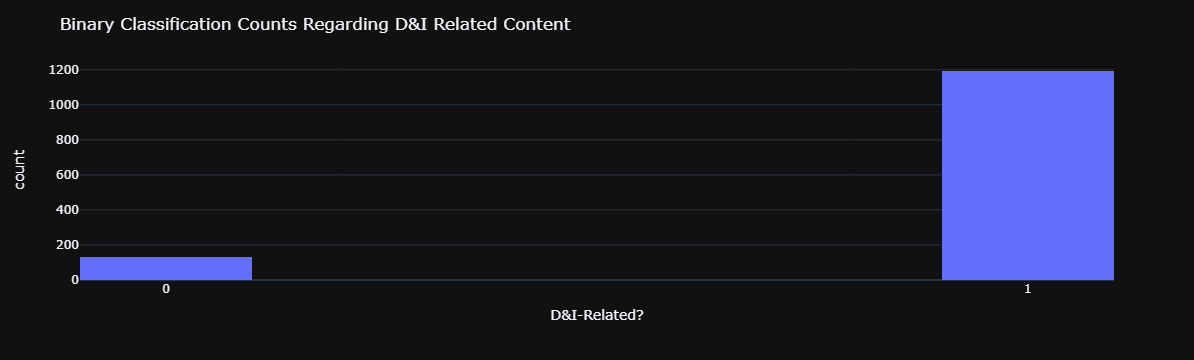

In [30]:
fig = px.histogram(ChewyLSF, x='D&I-Related?', nbins=10)
fig.update_layout(template='plotly_dark', title='Binary Classification Counts Regarding D&I Related Content', width=700, xaxis=dict(dtick=1))
fig.show()

In [31]:
# Provide a definition of what D&I means what it does not

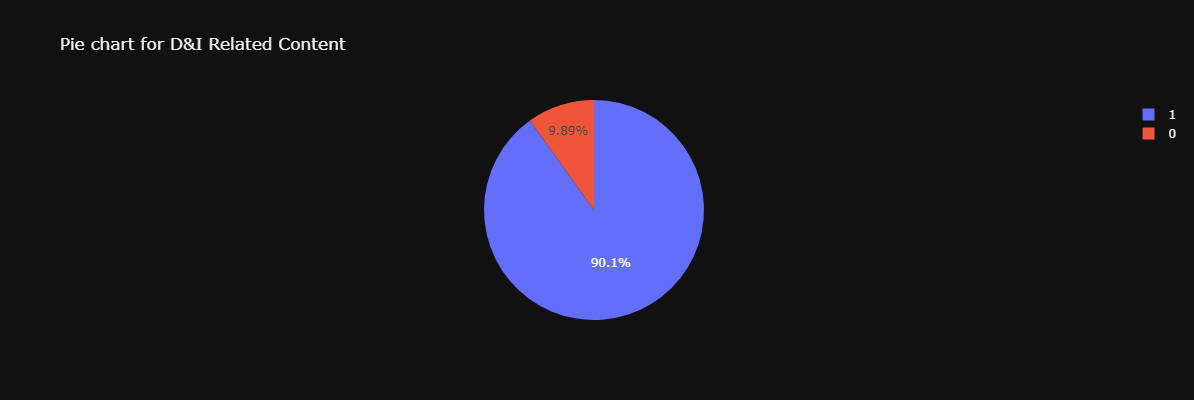

In [32]:
fig = px.pie(ChewyLSF, names='D&I-Related?', title ='Pie chart for D&I Related Content')
fig.update_layout(template='plotly_dark', width=600, height=400)
fig.show()

# According to this histogram, there are more Conversation Topics that were unrelated to Diversity and Inclusion than there were any related to Diversity and Inclusion. There were about 400 Diversity & Inclusion related topics, but twice as many topics not related to Diversity and Inclusion.

In [36]:
# Now let's examine how many instances of location were recorded in these listening sessions.

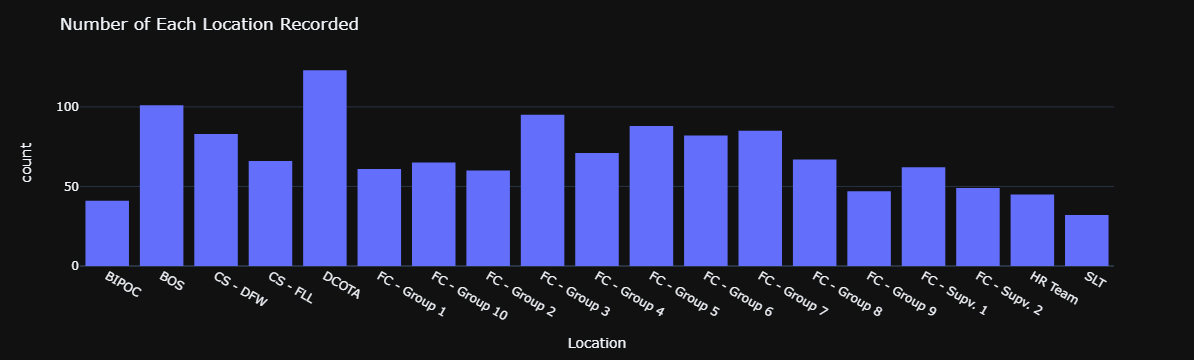

In [33]:
fig = px.histogram(ChewyLSF, x='Location', nbins=10)
fig.update_layout(template='plotly_dark', title='Number of Each Location Recorded', width=700, xaxis=dict(dtick=1))
fig.show()

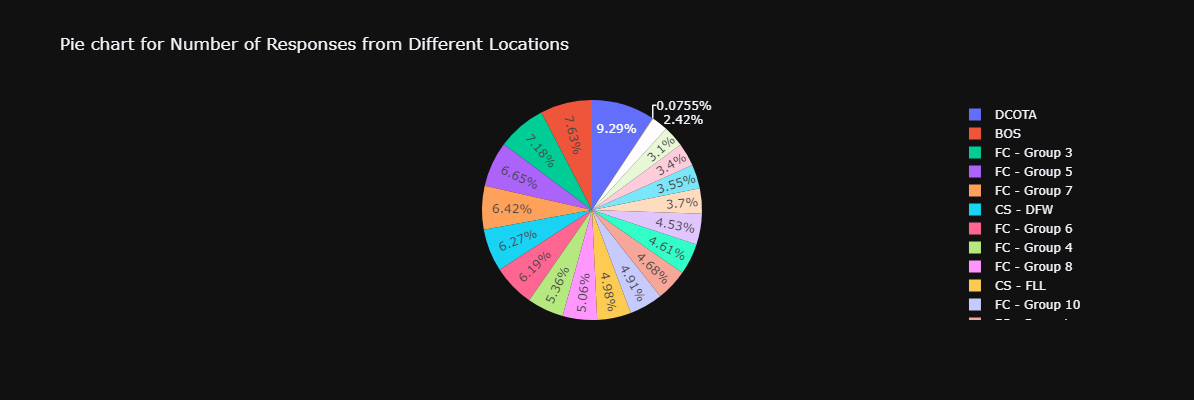

In [34]:
fig = px.pie(ChewyLSF, names='Location', title ='Pie chart for Number of Responses from Different Locations')
fig.update_layout(template='plotly_dark', width=600, height=400)
fig.show()

# This histogram shows that majority of responses came from DCOTA while the least came from SLT. As to why, we could explore more...

In [35]:
# Now we will try to visualize the data that best represents the number of diversity related vs inclusion related topics asked in this listening session.

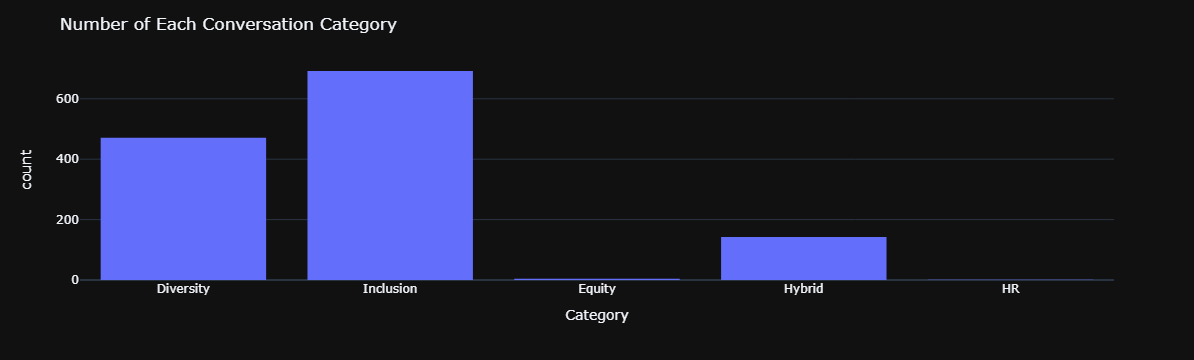

In [36]:
fig = px.histogram(ChewyLSF, x='Category', nbins=10)
fig.update_layout(template='plotly_dark', title='Number of Each Conversation Category', width=700, xaxis=dict(dtick=1))
fig.show()

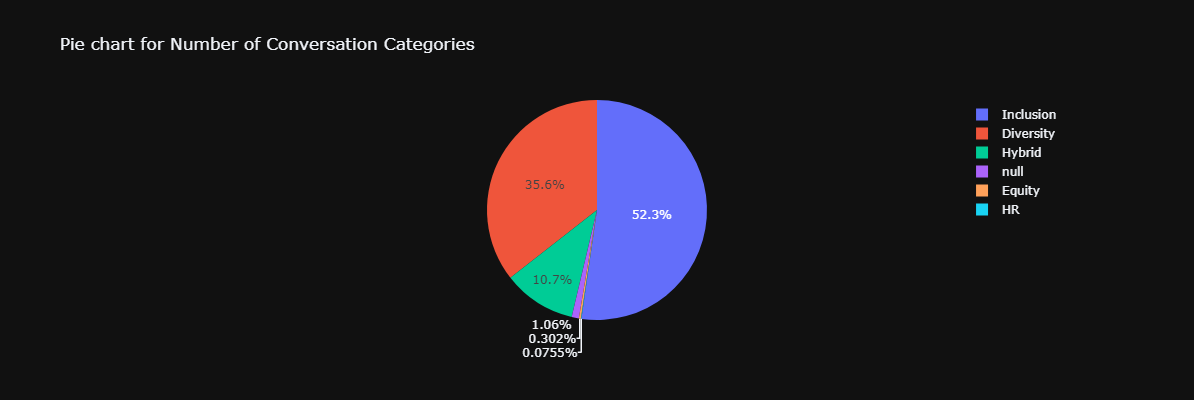

In [37]:
fig = px.pie(ChewyLSF, names='Category', title ='Pie chart for Number of Conversation Categories')
fig.update_layout(template='plotly_dark', width=600, height=400)
fig.show()

# This histogram depicts the number and variety of categories meant to describe the type of conversations that took place in the listening session.

In [38]:
# Examining Instances Varied Conversation Topics were Mentioned

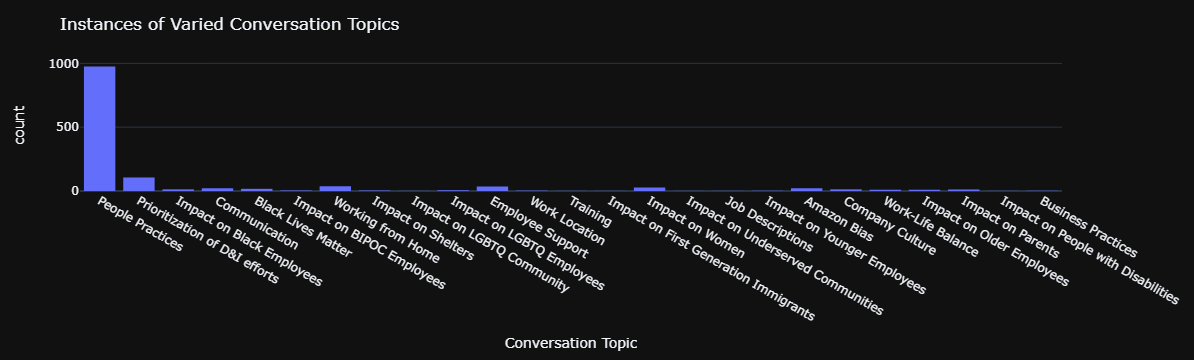

In [39]:
fig = px.histogram(ChewyLSF, x='Conversation Topic', nbins=10)
fig.update_layout(template='plotly_dark', title='Instances of Varied Conversation Topics', width=700, xaxis=dict(dtick=1))
fig.show()

# This histogram depicts the instances that each conversation topic were mentioned during the listening session. The majority of topics were centered around People Practices while plenty of topics were discussed only once.

In [40]:
# Examining Instances of Main Themes Mentioned

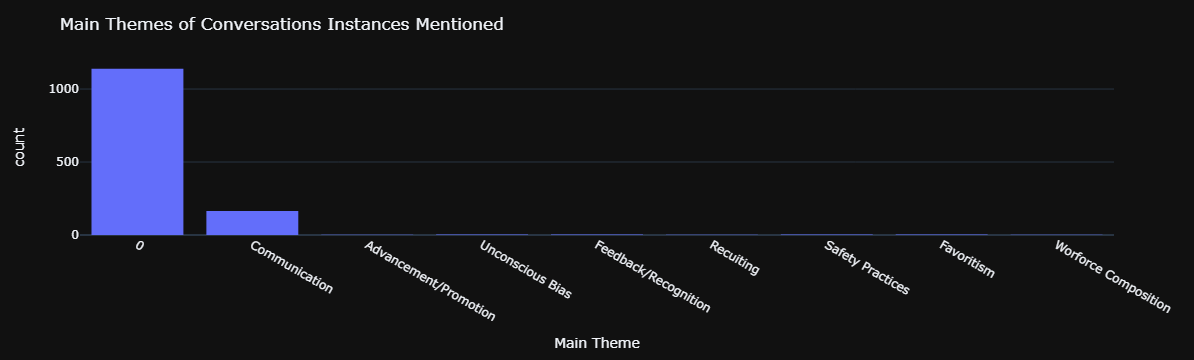

In [41]:
fig = px.histogram(ChewyLSF, x='Main Theme', nbins=10)
fig.update_layout(template='plotly_dark', title='Main Themes of Conversations Instances Mentioned', width=700, xaxis=dict(dtick=1))
fig.show()

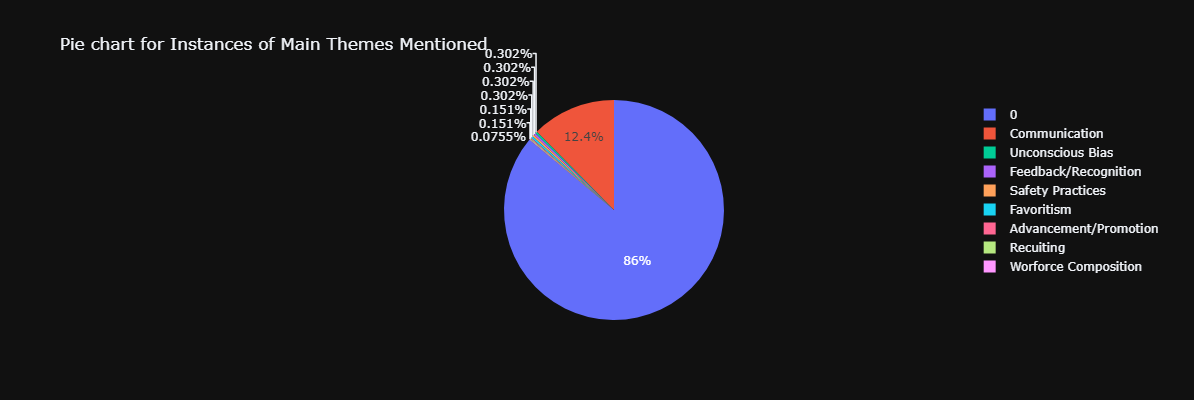

In [42]:
fig = px.pie(ChewyLSF, names='Main Theme', title ='Pie chart for Instances of Main Themes Mentioned')
fig.update_layout(template='plotly_dark', width=600, height=400)
fig.show()

# A majority of conversations did not carry a main theme, but Communication came in at a distant second place, with workforce composition perhaps being the least mentioned as depicted in this histogram.

In [43]:
# Examining Instances of Subthemes (if applicable) Mentioned

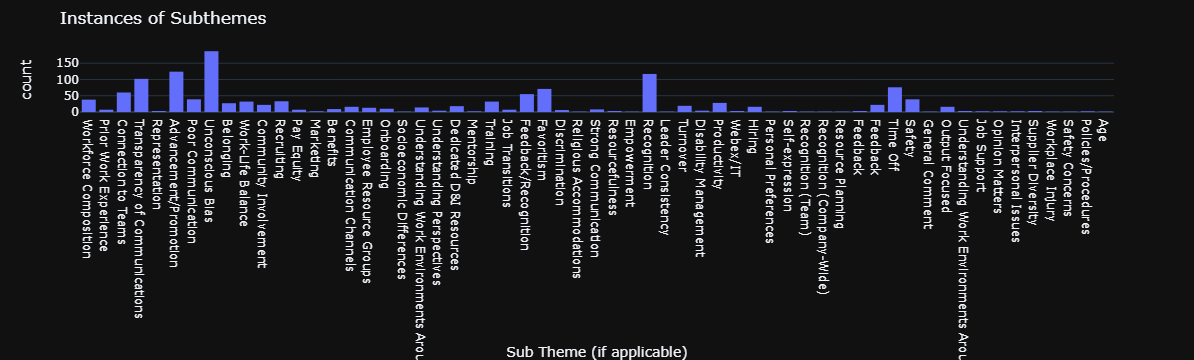

In [44]:
fig = px.histogram(ChewyLSF, x='Sub Theme (if applicable)', nbins=10)
fig.update_layout(template='plotly_dark', title='Instances of Subthemes', width=700, xaxis=dict(dtick=1))
fig.show()

# A majority of conversations with a main theme, had unconscious bias as a subtheme when discussed during this listening session.

In [45]:
# We are going to attempt to depict the sentiment of the responses as well as create a word cloud to find which phrases or words were most common. First we will recode the responses into positive or negative feedback, followed by the creation of positive phrases or keywords and negative phrases and keywords columns to which we will create a word cloud or more.

In [46]:
pip install -q transformers

Note: you may need to restart the kernel to use updated packages.


In [47]:
ChewyLSF['Feedback']

1       I'm in Supply Chain and I'm speaking from the ...
2       So um I would say that I've been on both ends....
3       It's kind of hard for me to compare. I'm new a...
4       I started working at Chewy in March. Purely on...
5       I started working at Chewy in March. Purely on...
                              ...                        
1320    From the management perspective, outside of ou...
1321    Ashley's Computer: We had an employee who appl...
1322    Ashley's Computer: We had an employee who appl...
1323    DFW: I am seeing the safety people walk the fl...
1324    DFW: I am seeing the safety people walk the fl...
Name: Feedback, Length: 1324, dtype: object

In [48]:
AllFeedback = ChewyLSF['Feedback'].str.lower()
AllFeedback

1       i'm in supply chain and i'm speaking from the ...
2       so um i would say that i've been on both ends....
3       it's kind of hard for me to compare. i'm new a...
4       i started working at chewy in march. purely on...
5       i started working at chewy in march. purely on...
                              ...                        
1320    from the management perspective, outside of ou...
1321    ashley's computer: we had an employee who appl...
1322    ashley's computer: we had an employee who appl...
1323    dfw: i am seeing the safety people walk the fl...
1324    dfw: i am seeing the safety people walk the fl...
Name: Feedback, Length: 1324, dtype: object

In [49]:
col_list = AllFeedback.values.tolist()
col_list
print(col_list)

["i'm in supply chain and i'm speaking from the supply chain side. in my department, i see a lot of diversity. i'll see different team members in meetings. not just different races, different countries, different origins with different view points. in previous companies (start-ups), i didn't see that diversity much. everyone was very similar. in supply chain we're very diverse.", 'so um i would say that i\'ve been on both ends. i worked at adp where diversity is celebrated. there\'s activism, there\'s awareness through events, through engagements. i\'ve been on the other end with small company where they would say, "we\'re diverse, we work in miami what more do you need?" adp was celebrated, we have ergs, activism, community service events hosted by ergs . what\'s cool is that if you don\'t identify with a particular group, you can still participate. if you just want to learn, you can. you can celebrate with them. at adp diversity is something taken seriously across the entire organiza

# I have created a model to calculate how positive or negative a paragraph from the feedback list created is, in terms of sentiment. I am still trying to figure out how to do this for multiple paragraphs, but for now we will be using numbers 0-1321 to discover the sentiment of each.

In [50]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

data = ["i'm in supply chain and i'm speaking from the supply chain side. in my department, i see a lot of diversity. i'll see different team members in meetings. not just different races, different countries, different origins with different view points. in previous companies (start-ups), i didn't see that diversity much. everyone was very similar. in supply chain we're very diverse.", 'so um i would say that i\'ve been on both ends. i worked at adp where diversity is celebrated. there\'s activism, there\'s awareness through events, through engagements. i\'ve been on the other end with small company where they would say, "we\'re diverse, we work in miami what more do you need?" adp was celebrated, we have ergs, activism, community service events hosted by ergs . what\'s cool is that if you don\'t identify with a particular group, you can still participate. if you just want to learn, you can. you can celebrate with them. at adp diversity is something taken seriously across the entire organization. in supply chain it\'s diverse and in it it\'s diverse, in hr not so much. it depends on what side of the business you\'re own. just look at the leaders in general. at adp the diversity in leadership is there. a lot of women, also a bigger company so more opportunity. i wouldn\'t say that chewy is terrible at diversity. i wouldn\'t say there\'s one type of person at chewy, but a lot can be done.', "it's kind of hard for me to compare. i'm new and my previous experiences are from internships. i'm starting here remote so everything has been virtual. my team is mostly people of color so i'm not in the office to see overall at the company.", "i started working at chewy in march. purely online so i haven't had the chance to meet people anyone other than online. i used to work in miami so i'm used to diversity (type, gender, etc.). both environments were very diverse. i'm used to working with a lot of south americans. i haven't had the chance to meet anyone in person as yet. i started on 3/16 which was the first day of working-from-home.", "i started working at chewy in march. purely online so i haven't had the chance to meet people anyone other than online. i used to work in miami so i'm used to diversity (type, gender, etc.). both environments were very diverse. i'm used to working with a lot of south americans. i haven't had the chance to meet anyone in person as yet. i started on 3/16 which was the first day of working-from-home.", "i come from smaller companies so walking into chewy it seemed diverse, but there is lack of diversity in c-suite. been with chewy 3 years and this is the first time this convo has happened. we don't talk about it, we don't mention it, it is what it is.", "i come from smaller companies so walking into chewy it seemed diverse, but there is lack of diversity in c-suite. been with chewy 3 years and this is the first time this convo has happened. we don't talk about it, we don't mention it, it is what it is.", "i've been at chewy for 8 months now as part of the supply chain team. in our corner of supply chain, it's quite diverse across cultures, sex, etc. where i came from (ups) being from a larger company that's been around longer, there was diversity at all levels of the company. even looking at board and c-level there, they were diverse. chewy being a younger company has an opportunity to do different things (work with hbcus, etc.). the company is taking steps to build that. if you look at leadership today it's scarce. as you keep adding talent hopefully we'll see more diversity. ", "i've been at chewy for 8 months now as part of the supply chain team. in our corner of supply chain, it's quite diverse across cultures, sex, etc. where i came from (ups) being from a larger company that's been around longer, there was diversity at all levels of the company. even looking at board and c-level there, they were diverse. chewy being a younger company has an opportunity to do different things (work with hbcus, etc.). the company is taking steps to build that. if you look at leadership today it's scarce. as you keep adding talent hopefully we'll see more diversity. ", 'i feel chewy has more diversity than my previous employer. before chewy, i worked in miami and most of the people came from latin america so after i came here i can talk to more people from different countries, different backgrounds, etc.', "representation means the world. especially growing up, you look up to people and you want to emulate them. you see a path. growing up i was maybe 1-2 other black people in classes and that went all the way though. you know you're capable but you don’t see it all the time. when you're shooting for positions you want to know it's possible. seeing someone like you signifies a shared experience. i know it's possible (something i can attain) if i want this person's job. you have to ask is the organization open to someone like me? am i starting behind the 8 ball? you don't want to walk on eggshells or think that leaders aren't going to understand you simply because you're different. sometimes people fear what they don't understand. i want to know i'll get a fair shake. again i haven't been here that long to comment.", "i can tell you. i've been here almost 4 years. as i think back, when i first came in i was the first diverse leader in fulfillment that they hired. that was a shock moment for me. at the time at corporate there weren't many of us. that was one of the first questions to the leadership team. what does that look like for us? the company has these visions. they reached out to diverse leaders and others didn't take up the call because they didn't see diversity. i took the chance. i see the desire from senior leadership but they never put anything into play with competing priorities. are we just saying things to leaders and not who we are? it's really because we are growing really fast. we haven't done things like recruit at hbcus, nsbe, etc. we haven't had leaders to weigh in there. ", "i can tell you. i've been here almost 4 years. as i think back, when i first came in i was the first diverse leader in fulfillment that they hired. that was a shock moment for me. at the time at corporate there weren't many of us. that was one of the first questions to the leadership team. what does that look like for us? the company has these visions. they reached out to diverse leaders and others didn't take up the call because they didn't see diversity. i took the chance. i see the desire from senior leadership but they never put anything into play with competing priorities. are we just saying things to leaders and not who we are? it's really because we are growing really fast. we haven't done things like recruit at hbcus, nsbe, etc. we haven't had leaders to weigh in there. ", "it became ever apparent the lack and awareness around diversity. a series of emails were sent out from leadership, but it's clear that no one has ever had the conversation. it was clear that no one has ever thought to say anything around what's going on.", "i would agree with ____ [name removed].  that was the first thought for me. i didn't expect chewy to say anything at all. i would rather they didn't send it. it was lackluster. we had 2 communications then it was business as usual. the one around juneteenth felt authentic (sumit put in his experience). prior to that it didn't feel real.", "it's funny, i thought deeply about this and understand the market we're in. for example, ben and jerry's made a big statement. like ben and jerry's, there are some companies that work for the greater good [regardless of whatever backlash they may receive from their statement]. for a company like chewy, we're growing and some people who own pets are not with this movement at all. also our competitors have not made statements. they may feel that their customers who take up the all lives matter stance [may go elsewhere]. it may hit the bottom line. personally, i may be ok with a hit if i take a stand...[trailed off]. in our team member body, there are people who are not with this movement who we work with every day. there were quite a few who don't support it. the company is looking out for its best interest and not the best interest for the country. ", "as far as chewy's concerned, i don't think that anybody should give a statement if they don't believe it. i think the lack of statement just really goes to show how our c-levels and others feel about it. i'm sure they think what happened is wrong and support blm in their own way. it also shows that it's not a passion. it took almost a month before the internal communication came out and it took a lot of asking to get that. i like that chewy's coming with a plan but how many people had to say something until upper leadership realized you have to make a change. goes back to representation. if no one is there calling it out.....", "both but yes at chewy. it's the people i'm dealing with at chewy. chewy hires people and they bring that to work. not everyone believes in the movement and these are people we have to deal with  on a daily basis. if that's what the company believes in, it has to trickle down.", "i actually work on the talent acquisition side of hr. i've been at chewy for 7 months and it doesn't seem that long. one of the key things i noticed was the lack of diversity to put it frankly. i didn't see anyone in leadership that represented of people of color. i know our new vp has recently changed. i previously came from financial services working in nyc, and one of the big pushes was diversity from recruiting (hbcus) to working with local brands and teams. the awareness around what that means has actually come to the forefront. if you don't know, you don't know. i just took it like it's not a big deal to anyone else because it doesn't affect them. i'd liked it fast-tracked. i've talked about it with colleagues. i just didn't see a plan or an initiative around it. ", "yeah, [at other companies], the push for diversity is transparent. there are metrics, there's a plan. big on diversity and inclusion there, and the leadership reflected it. it was obvious."]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[{'label': 'POSITIVE', 'score': 0.9974709749221802},
 {'label': 'POSITIVE', 'score': 0.8120450377464294},
 {'label': 'NEGATIVE', 'score': 0.9983502626419067},
 {'label': 'POSITIVE', 'score': 0.5006452202796936},
 {'label': 'POSITIVE', 'score': 0.5006452202796936},
 {'label': 'NEGATIVE', 'score': 0.9950868487358093},
 {'label': 'NEGATIVE', 'score': 0.9950868487358093},
 {'label': 'POSITIVE', 'score': 0.8807567954063416},
 {'label': 'POSITIVE', 'score': 0.8807567954063416},
 {'label': 'POSITIVE', 'score': 0.9966513514518738},
 {'label': 'POSITIVE', 'score': 0.989611029624939},
 {'label': 'POSITIVE', 'score': 0.7602208256721497},
 {'label': 'POSITIVE', 'score': 0.7602208256721497},
 {'label': 'NEGATIVE', 'score': 0.9990136623382568},
 {'label': 'NEGATIVE', 'score': 0.9986587762832642},
 {'label': 'POSITIVE', 'score': 0.5151993036270142},
 {'label': 'NEGATIVE', 'score': 0.9986096620559692},
 {'label': 'NEGATIVE', 'score': 0.9989567995071411},
 {'label': 'NEGATIVE', 'score': 0.9939333796501

In [51]:
data1 = ["for me, i feel like my view is a little different. chewy has a production studio within the company. i started off in customer service and usually that's where you see the diversity cause that's base level. i moved up to the production side and because someone remembered i was super crafty in my interview. when you get into the corporate part that's where you see less diversity. in the production studio there is more diversity just because our work is more base level.", "i am our [position removed]. i started in january and came from a vendor  that was very diverse in nyc. i've gone from a place that was not very diverse but diverse, to chewy in role that uses analytics to describe people. i remember having a conversation about diversity with a senior leader and that person said it's not something chewy focused on. there are other priorities. i'm the 2nd most senior black male in a company of 16,000 people. you wonder if your glass ceiling is pre-determined. my management style is different from others. a few times i've had to call people out pretty seriously in a way they've never had before [and they were intimidated by it]. a lot of companies in chewy's position use growth as an excuse instead of using diversity to inform their growth strategy. i've looked and see a disproportionate scale and ratio of people of color at the bottom, and then when you get to the upper ranks it falls off a cliff. i'm glad we're having the conversation. ideas of people of color are more diverse than more homogenous groups. they're bringing people of color in but it's at 1 or 2 levels and not throughout the entire organization.", "i am our [position removed]. i started in january and came from a vendor  that was very diverse in nyc. i've gone from a place that was not very diverse but diverse, to chewy in role that uses analytics to describe people. i remember having a conversation about diversity with a senior leader and that person said it's not something chewy focused on. there are other priorities. i'm the 2nd most senior black male in a company of 16,000 people. you wonder if your glass ceiling is pre-determined. my management style is different from others. a few times i've had to call people out pretty seriously in a way they've never had before [and they were intimidated by it]. a lot of companies in chewy's position use growth as an excuse instead of using diversity to inform their growth strategy. i've looked and see a disproportionate scale and ratio of people of color at the bottom, and then when you get to the upper ranks it falls off a cliff. i'm glad we're having the conversation. ideas of people of color are more diverse than more homogenous groups. they're bringing people of color in but it's at 1 or 2 levels and not throughout the entire organization.", "representation means the world. especially growing up, you look up to people and you want to emulate them. you see a path. growing up i was maybe 1-2 other black people in classes and that went all the way though. you know you're capable but you don’t see it all the time. when you're shooting for positions you want to know it's possible. seeing someone like you signifies a shared experience. i know it's possible (something i can attain) if i want this person's job. you have to ask is the organization open to someone like me? am i starting behind the 8 ball? you don't want to walk on eggshells or think that leaders aren't going to understand you simply because you're different. sometimes people fear what they don't understand. i want to know i'll get a fair shake. again i haven't been here that long to comment.", "just to echo what ____ [name removed] and ____ [name removed] said. you want to know that your glass ceiling hasn't been pre-determined and also that when you do get there will you be accepted. there aren't a lot of women ceos out there. as someone who sees herself as 2 or more races, seeing people make it that far and succeed allows you see a path. i'm a first generation college graduate and that's huge to my family. to see women of color succeed i see that there's a place for me if i decide to go through this route. diversity means diversity of thought too. when you have everyone represented you can better serve your customers. it's also important for innovation.", "and we talk about going out to nsbe or women engineers. you're dealing with hourly works vs professional workers. we haven't tapped in to leaders who can help with what tms are feeling because we're missing it. if we took the approach to diversity like we did for active military we'll see a difference. there's vast opportunity. we're competing with high volume companies and it's very challenging.", 'i\'ve actually had this conversation with one of bosses where actually 2 of my bosses, 1 is female and 1 is male (both of color). when somebody does get moved up there\'s an internal hurrah from poc like, "yes we love seeing someone get to that position." it sucks that we have to celebrate the idea that this person can actually get there. no matter how diverse, the mentality of the people who work there have a huge impact on it. it\'s like, once i get to this position, how much do i have to water myself down for everyone else to feel comfortable. i\'m very outspoken and i\'m perceived as an "angry black girl" or [they think] "she always has something to say." you get that stigma because you\'re being vocal and you\'re a person of color. if i get there, will i have to change myself for others to be more accepting. why do i have to change when that\'s what got me here in the first place?', 'i\'ve actually had this conversation with one of bosses where actually 2 of my bosses, 1 is female and 1 is male (both of color). when somebody does get moved up there\'s an internal hurrah from poc like, "yes we love seeing someone get to that position." it sucks that we have to celebrate the idea that this person can actually get there. no matter how diverse, the mentality of the people who work there have a huge impact on it. it\'s like, once i get to this position, how much do i have to water myself down for everyone else to feel comfortable. i\'m very outspoken and i\'m perceived as an "angry black girl" or [they think] "she always has something to say." you get that stigma because you\'re being vocal and you\'re a person of color. if i get there, will i have to change myself for others to be more accepting. why do i have to change when that\'s what got me here in the first place?', "both but yes at chewy. it's the people i'm dealing with at chewy. chewy hires people and they bring that to work. not everyone believes in the movement and these are people we have to deal with  on a daily basis. if that's what the company believes in, it has to trickle down.", "___ [name removed] brought up a great point. not many people have seen me in person. i weightlift a lot and body build and work in people analytics. when i'm in the office as i get in certain circles i having to water myself down. the reality of the nature of the beast for homogenous groups, a lot of coworkers and colleagues have not been integrated with people of color in their life. the times when you ascend to a certain level, if you don't speak the lingo it's obvious to separate us vs them. i believe 100% that you have to bring your true self to work. in other companies i've had to call people out for making off color comments so saying something in certain circumstances put me in certain situation. my response can be misinterpreted as some sort of malice.", 'people have even turned around and look scared when they first notice me. first excuse is "[name removed], you\'re super imposing" and i\'m like, "but i need to talk to you about something at work." i came to you very even keel so i don\'t understand. instead of going directly to someone\'s desk, i have to walk around so they see i\'m coming. they [certain types of people] always jump. i\'ve been told that based on feedback or the way i run my ship that i can be imposing. i\'m actually like a big, soft teddy bear once you get to know me.', 'when you want to get to a certain level, all of these positions already have people in them. imagine trying to rise to a certain level. [in order to get there] it will take people leaving or being demoted or having them move to a different part of the company. even if we initiate a premise like this, there can be oversaturation at the secondary level. those people in the c-suite are there for years/decades. the company might not be able to open up positions in a way that we want. there has to be an open position in order to fill it with a person of color. how do we get there in a way that makes sense?', "my step-mom is a wonderful woman of color in a senior leadership position at american airlines. we talk about this all the time. she's there and it still feels like a boy's club. she can't be her full self. they are not ready. even though they let her, in they don't let her forget that she's in a boy's club. i think about that and how i would handle that. i've been in meetings where i say something and then a man says it later and he gets the credit. ", "opportunity to try, from an inclusion perspective, not really knowing the people on your teams. i've never felt a point where i haven't felt included but times where we haven't in some capacity really gotten to know the people on our teams or their skills to help them with a path forward. how can i feel included if you haven't taken the time to understand why i'm here and where i'm going? as a leader, i've had to check myself and ask what am i doing as a leader [to be more inclusive].", "i feel like i can be myself in work in meetings. obviously i have a really thick accent but i don't think that's been an issue…from a supply chain standpoint of course.", "i kind of agree with ____ [name removed] that you have to be self conscious of how you are allowed to behave. i think it's good for any group, gender, race. many groups have preconceived an idea of how you need to behave in a work environment. i'm pretty comfortable at work, like ivan i have an accent but i make that work for me. you should make people feel comfortable. your body may react in a certain way that may come across as judging. part of it is getting to know people and how you can make people comfortable. you do have to adapt to people around you. "]
sentiment_pipeline(data1)

[{'label': 'POSITIVE', 'score': 0.9545214176177979},
 {'label': 'NEGATIVE', 'score': 0.9370136260986328},
 {'label': 'NEGATIVE', 'score': 0.9370136260986328},
 {'label': 'POSITIVE', 'score': 0.989611029624939},
 {'label': 'POSITIVE', 'score': 0.9960081577301025},
 {'label': 'POSITIVE', 'score': 0.9737901091575623},
 {'label': 'NEGATIVE', 'score': 0.9835671186447144},
 {'label': 'NEGATIVE', 'score': 0.9835671186447144},
 {'label': 'NEGATIVE', 'score': 0.9989567995071411},
 {'label': 'NEGATIVE', 'score': 0.8983169198036194},
 {'label': 'POSITIVE', 'score': 0.9903901815414429},
 {'label': 'NEGATIVE', 'score': 0.9986193180084229},
 {'label': 'POSITIVE', 'score': 0.9966524243354797},
 {'label': 'NEGATIVE', 'score': 0.9625537991523743},
 {'label': 'NEGATIVE', 'score': 0.976111650466919},
 {'label': 'POSITIVE', 'score': 0.9850548505783081}]

In [52]:
data2 = ['some people have their default in terms of how they respond to you. sometimes you have to break through to get them to take your hand and walk across the street.', 'i\'ve had a co-worker who would say "you change your hair everyday". [so what?] i\'m the same person everyday….', "i agree with ___ [name removed] on the hairstyle thing. in terms of inclusivity, i don't feel excluded. what i will say is what ___ [name removed] has said. as a female and a black female have to water down to the situation you're in. as a people [black people] we're very direct. there are certain times where there may be a trigger and you might have to water down so you can communicate in a way so that other person doesn't feel attacked.", 'yeah you don\'t want to be labeled as the "angry black person" and depending on who you\'re dealing with you\'re always treading that line.', "not in the company so far. i work for the internal audit team and we meet every day and everyone is part of the meeting. we keep everyone on the same page. we're only like 9 people so we try to be in sync. we all work together on projects. it's only been 4 months. so far seems to be working well. ", "yeah, it was definitely a transition at first. time before chewy i would work from home occasionally. i didn't have a great desk set up. i needed to get into a routine and i think i was able to figure that out. effect on mental health is definitely a challenge. i bought a new desk and a new lamp and a 2nd monitor and now it feels more regular. but it's just the reality that we're in and i'm trying to make the best. keep productive and keep a positive mindset.", 'keeping a routine. some days i start early and end early, other days start late and end late. for me getting into a routine helps from a mental health perspective.', "mostly similar challenges. building routines helps. having a set stop time is critical. it's too easy to keep working into the evening. it's important to stay connected with colleagues.", " it's been very interesting. the piece i miss most is the team connectivity, ongoing dialogue. ability to turn to the side and connect with someone. we've made adjustments, we have touchpoints throughout the day. i don't think that connection can ever be replaced. we're onboarding a bunch of new people and we need to be empathetic of starting during a pandemic. there's a big human element here that we need to be mindful of. ", "it's the human connectivity. the openness isn't there. it's inherently more difficult. also never having met people in person is challenging (new hires). no opportunity to do team-building activities (team lunches). ", "yes we keep in touch regularly, we jump on each other's calendars, we have daily standups.", "it's been a bit unique. my job is site specific so i'm required to be in the office so working from home is quite a change. still need to come in at least 1x/week. basically adapting to an entirely different job while at home has been interesting. i'm the it guy so i need to make sure everything is working properly. challenge to do that and onboard people remotely. fixing broken stuff remotely has been fun. it's worked out i guess.", "hopefully, we'll get back to normal when we're back. currently, we have to coordinate with other teams to get people onboarded because the timeframe is shortened. it's forced us to collaborate more. much smoother process now with collaboration. that would be nice to continue.", 'webex team lunches that was kind of like hanging out.', "virtual bday parties have been helpful. boston office as well as coops in other offices. it's great to connect especially for people who have onboarded since covid", "early on we were having team trivia nights and happy hours. lately that's ended. boston (as a city) is able to move around a bit (lighter restrictions re: stay-at-home orders). ", '3-4 happy hours on fridays, online games, etc.', 'yes, great to connect. ', 'that\'s a hard question to answer. going back to a public statement. i agree to an extent. some companies went too early and it blew up. but it\'s been 50 days and we haven\'t said anything. now you go on ig and you see comments saying "why haven\'t you said anything? i\'m shopping somewhere else" i understand you want to roadmap but the only action i\'ve seen chewy take is a sign in the office. we said we\'d donate to the naacp but i haven\'t received confirmation that we\'ve done anything. the frustration is that it\'s been 2 months and we haven\'t done anything.', 'it\'s three words black lives matter. you don\'t have to make this huge commitment. george floyd was murdered 3 miles away from our corporate office. just saying black lives matter is enough. we\'re not responding to these social media posts. we need to say "yeah you\'re right." our silence is an action. by us not saying anything we\'re affirming the status quo. let\'s just say black lives matter. something.', "stuff we've outlined is a good start. working with hbcus to recruit directly from there. working with black-owned shelters, or shelters and pet stores in minority communities. public outreach is awesome. we donate supplies to shelters. redirect some of those to communities of color. maybe we've done that but i don't know.", "stuff we've outlined is a good start. working with hbcus to recruit directly from there. working with black-owned shelters, or shelters and pet stores in minority communities. public outreach is awesome. we donate supplies to shelters. redirect some of those to communities of color. maybe we've done that but i don't know.", "stuff we've outlined is a good start. working with hbcus to recruit directly from there. working with black-owned shelters, or shelters and pet stores in minority communities. public outreach is awesome. we donate supplies to shelters. redirect some of those to communities of color. maybe we've done that but i don't know.", "we had town hall meeting right before you (john - hr) joined. it was about gender pay equity and its important to talk along other lines as well. 94% pay equity which means we're close. but does that mean only corporate employees or does that include hourly employees? a transparency report re: pay at various levels in the organization across various axis. sitting here as a cis white guy who probably benefits from people not knowing. ", "we had town hall meeting right before you (john - hr) joined. it was about gender pay equity and its important to talk along other lines as well. 94% pay equity which means we're close. but does that mean only corporate employees or does that include hourly employees? a transparency report re: pay at various levels in the organization across various axis. sitting here as a cis white guy who probably benefits from people not knowing. ", "…or on par 94% make the same amount of money. but it didn't seem like it tells the whole story. wasn't really clear. kind of was said and then brushed aside.", "it's a tricky subject because you want to have a diverse portfolio in your marketing, but sometimes you get called out for trying too hard. i feel like it's ok but i don't watch enough of our marketing content to have a say. our marketing doesn’t address any sort of progressive issues. i think that last commercial seems pretty diverse where everyone is working from home.", 'publicly show support in posts and content. changing the logo to the rainbow for pride month. a lot of friends are doing that at their companies. actively show a presence at events and highlight d&i unit in chewy benefits. one example is parental leave. specifically says birth mother instead of caregiver in hr benefits package. adding support for single moms or needs for surrogacy. those are specific calls to action that i notice are lacking, but it reflects a different view that i have.', 'publicly show support in posts and content. changing the logo to the rainbow for pride month. a lot of friends are doing that at their companies. actively show a presence at events and highlight d&i unit in chewy benefits. one example is parental leave. specifically says birth mother instead of caregiver in hr benefits package. adding support for single moms or needs for surrogacy. those are specific calls to action that i notice are lacking, but it reflects a different view that i have.', "yes, that’s the general concept that i'm thinking of. ", "yes, full transparency. i'm in an odd spot. i'm a team member at chewy and i am an agent of the company on the hr team. i see both sides re: a call for action and i see this need for more of a focus. i see that it is a focus and we do want to  get better at it. it's going to take time for us to do it right. people want immediate action. if we're going to do something we want to do it right. we have a lot of work to do. we can put out a statement but we want to make sure we have an internal culture that reflects those values. we acknowledge that we haven't been good and want to get better. we're devoting lots of time to listening sessions and we're showing that we want to make progress. as a team member i agree, it wasn't as much of a focus as it should have been. we just need to be patient.", "i do appreciate that we're finally talking about black lives matter in an official setting. i don't have much to add. everyone has spoken pretty eloquently on points.", "this may not be super concrete. forgive me if this isn't germane. a few things have come up. normalize talking about diversity in all areas. it shows up a more areas than people think. people don't feel they can speak up about things that happen (ex. not getting credit).", "how do people show up and talk without feeling that they will be punished? just needing the ability to  speak up. they way you communicate is deemed not effective because of implicit bias. we've always had this culture of nose to the grindstone. especially now work from home we have this fear of appearing out of the norm. ", "maybe another aspect. other organizations have groups where they can speak up [affinity groups?]. there needs to be transparency around pay equity and hiring practices because i don't know if we're going well or not. i only see what's in the office and it's skewed. in terms of statements, those are some of the rights steps but externally we haven't communicated well. from personal experience, there are smaller groups to consider [intersectionality?]. me and the children at home are different than me at work [without children]. some people may have to deal with raising kids and working. i agree that diversity is a lot more than black lives matter. what can we do? it's not originally what the movement was about. it's about stop killing people. what can you do about that? donations help. where people have been caught is saying black lives matter and then working for racial justice in their companies which is a little off. how does chewy support legal reform?"]
sentiment_pipeline(data2)

[{'label': 'NEGATIVE', 'score': 0.8810986280441284},
 {'label': 'NEGATIVE', 'score': 0.9944278001785278},
 {'label': 'POSITIVE', 'score': 0.9794228672981262},
 {'label': 'NEGATIVE', 'score': 0.939608097076416},
 {'label': 'POSITIVE', 'score': 0.9983794689178467},
 {'label': 'POSITIVE', 'score': 0.9307768940925598},
 {'label': 'POSITIVE', 'score': 0.9773656129837036},
 {'label': 'NEGATIVE', 'score': 0.9300518035888672},
 {'label': 'POSITIVE', 'score': 0.9941136240959167},
 {'label': 'NEGATIVE', 'score': 0.9982342720031738},
 {'label': 'POSITIVE', 'score': 0.9996938705444336},
 {'label': 'POSITIVE', 'score': 0.962770938873291},
 {'label': 'NEGATIVE', 'score': 0.9975456595420837},
 {'label': 'NEGATIVE', 'score': 0.9849350452423096},
 {'label': 'POSITIVE', 'score': 0.9996863603591919},
 {'label': 'POSITIVE', 'score': 0.9983086585998535},
 {'label': 'POSITIVE', 'score': 0.9969570636749268},
 {'label': 'POSITIVE', 'score': 0.9998642206192017},
 {'label': 'NEGATIVE', 'score': 0.99923181533813

In [53]:
data3 = ["maybe another aspect. other organizations have groups where they can speak up [affinity groups?]. there needs to be transparency around pay equity and hiring practices because i don't know if we're going well or not. i only see what's in the office and it's skewed. in terms of statements, those are some of the rights steps but externally we haven't communicated well. from personal experience, there are smaller groups to consider [intersectionality?]. me and the children at home are different than me at work [without children]. some people may have to deal with raising kids and working. i agree that diversity is a lot more than black lives matter. what can we do? it's not originally what the movement was about. it's about stop killing people. what can you do about that? donations help. where people have been caught is saying black lives matter and then working for racial justice in their companies which is a little off. how does chewy support legal reform? ", "so i am more a listener. i have a whole range of thoughts on what companies are doing and what chewy is doing. this may not answer your question directly but i do want to share. obviously what's going on is terrible but there are some good parts. i applaud them for the changes. sometimes i have issues with that. what are the truest intentions of the companies like uncle bens, aunt jemima, quaker oats? oh now we have to change the brand? i'm one of the old timers (3 years in at chewy). why is chewy taking action now? sometimes it takes an event for change to happen. last year we started a group to bring in more women into engineering. we were meeting weekly  and leadership was never a part of those meetings. how are you expecting to make change when you are not part of these meetings? we're not going to go anywhere. when we started this i was extremely excited but i'm also like, i'll sit back and see if we're actually going to take this somewhere. i think [name removed] l brought up working with hbcus and that would be great. i go to different schools and how come we're not visiting morehouse, howard, clark-atlantic. i've never expressed it because based on the past i learned that it won't go anywhere. ", "say out of 10 engineers that i interview, there's 1 afam. there could be other reasons why there aren't more, but in the back of my mind, what is our strategy to include more?", "say out of 10 engineers that i interview, there's 1 afam. there could be other reasons why there aren't more, but in the back of my mind, what is our strategy to include more?", "one of the major ones we recruit from is northeastern. not to say let's stop but let's diversify the pool. as a hiring manager i don't get diverse candidates at all. i would love to have a woman or a person of color to consider. ", 'start using nsbe and hispanic professional engineers. those are pipelines for 1000s of engineers.', 'we host a lot of events at chewy so it would be great to get those groups in.', "i'd like to add to ___[name removed] point. we see a weird ration. 3:12 (women to men). group on slack channel called women in tech and it's kind of dead. we all feel that if it doesn't come from the top it doesn’t seep to the bottom. even for candidates, on average the women always have a question re: ratio of women to men. chewy hasn't really done anything about that.", "i'd like to add to ___[name removed] point. we see a weird ration. 3:12 (women to men). group on slack channel called women in tech and it's kind of dead. we all feel that if it doesn't come from the top it doesn’t seep to the bottom. even for candidates, on average the women always have a question re: ratio of women to men. chewy hasn't really done anything about that.", "when people ask about the team makeup, i don't get into specific intersections. i talk about the job categories. i don't discuss race, gender, religion because those are touchy subjects. i generalize and move on.", "pretty much we don't give out the numbers but try to boost energy of excitement. promote whatever we have. of course there's room for improvement but this is what we have. it's good to be honest.", "when i first got here i create a group within chewy. i tried to create a committee for lgbtq community. opened a slack channel and made weekly meetings to create some sort of call to action and some sort of goals to report to management. tried to present a group to chewy to present to new candidates that arrive. a few times i heard from team members, candidates asking about lgbtq community within chewy and what call to actions have been made and what can be expected in terms of dei. can't say i had a lot of success. tried to work with hr.", "when i first got here i create a group within chewy. i tried to create a committee for lgbtq community. opened a slack channel and made weekly meetings to create some sort of call to action and some sort of goals to report to management. tried to present a group to chewy to present to new candidates that arrive. a few times i heard from team members, candidates asking about lgbtq community within chewy and what call to actions have been made and what can be expected in terms of dei. can't say i had a lot of success. tried to work with hr.", 'a bit more open door process in terms of management so that we could actually present our goals and what we aim (call to action). for instance: the lgbtq community has lot of events especially in tech. i think chewy could get more involved in these events. maybe even host a few in the boston office. try to get more funds to try and pass on to groups and show that we have the ability to support the community and show that we have a complete dni presence in our company.', "jumping in here about not necessarily having a ton of success. i can speak a little easier. since day 1, i've been advocating for more d&i initiatives. from day 1 it wasn't a priority. it was more about fast-paced growth. no appetite for it [dei]. there have been a few groups but they failed because there wasn't buy in from the top and at all levels. if we had them all advocating that would help. now we do have the buy-in of senior leadership. now is a good time to actually make traction. there will be buy-in. i don't know what changed.", "i'm older and come from the midwest so don’t have the same concerns. how much in terms of tier 1 recruiting, how does it work when we do technical interviews? we have data and algorithm questions in our interviews. do people like me who don't come from a tier 1 school see this thing as an impediment, or is it just me and my generation that view it as an impediment. are we scaring off or ignoring a group of people because we use 1 mechanism to filter out people. when i see people come in i see a lot of tier 1 universities. everyone from those places is focused on 1 mindset. if we expand beyond, do we need to look into our mindset on how we're filtering people? ", "i've wondered that too. women may come to tech later. are we allowing those to be considered? like do you need 5+ years of java, or can that be made up for with a little less java plus other attributes. making questions more inclusive. hbcus are great. i went to a women's college and i think improving recruiting at women's colleges helps.", "no i don't really have anything to add. generalizing, i'm very excited about what we're doing and moving forward and actually making change. [name removed] brought up how now we have this buy-in from management. it sort of makes me angry but it is what it is. why all this buy-in now? is it because you feel business is going to suffer? if we say we're going to change then just change.", "i feel you. why now, right? why did it take something like this? why didn't the other ones take off. valid questions. i try to look at it this way, that sucks but let's actually make the changes now because we have the opportunity to do so now. ", "to ____ [name removed] and _____ [name removed] point, my biggest take away is it took the murder of someone before we started talking about this. is it because people are finally seeing it? lgbtq and women's issues have gone nowhere. feel like they've been shot down by leadership. we need to answer question, why this wasn't a concern until now? it should have been a priority from day 1. ", 'i want to something before 100 days. ', "yeah, the first couple of weeks were really tough because it was hard to focus. everything was about covid. announcements were helpful because we wanted communication but it was overwhelming. it was so surreal. for me it's been challenging because i feel like i'm stuck in the house all day. i'm in meetings a lot of the time so my day starts online at 8am and by 8-9pm i'm still working (normally hours were 9am-7pm). expectations have changed. most people probably wouldn't schedule meetings at 9am or 5pm or lunch but now they are because what else are you doing?", "i have a toddler at home and daycare just started to open. that's been very difficult having a tyrant at home lol. i have to be parent, teacher, employee. i struggle with boundaries. also like ____ [name remove] there's a thing around physical separation of work and home. team members working later and starting earlier. struggle for meetings at generally odd hours.", 'i have to think about that. i don\'t know. i need to work on setting boundaries. i feel guilty that time is being taken away. productivity has dropped because i\'m not able to get as much done because i\'m juggling more things. i don\'t think i can say "hey don\'t schedule meetings between these times". i also don\'t have a baseline for what\'s working well.', "i'm not sure how much my experience is applicable since i only started 2 weeks ago. i've been remote since started. ", "from an hr perspective, it was fine. worked pretty well. sticking points is getting access to various it systems. i'm in engineering so it's been a challenge to get access. challenge is not meeting people. it was helpful when you told people to turn cameras on. seeing people's faces can be helpful."]
sentiment_pipeline(data3)

[{'label': 'NEGATIVE', 'score': 0.998608410358429},
 {'label': 'POSITIVE', 'score': 0.5532745122909546},
 {'label': 'NEGATIVE', 'score': 0.9905639886856079},
 {'label': 'NEGATIVE', 'score': 0.9905639886856079},
 {'label': 'POSITIVE', 'score': 0.9805965423583984},
 {'label': 'NEGATIVE', 'score': 0.6699577569961548},
 {'label': 'POSITIVE', 'score': 0.9984567165374756},
 {'label': 'NEGATIVE', 'score': 0.9983351826667786},
 {'label': 'NEGATIVE', 'score': 0.9983351826667786},
 {'label': 'POSITIVE', 'score': 0.9956794381141663},
 {'label': 'POSITIVE', 'score': 0.9997945427894592},
 {'label': 'NEGATIVE', 'score': 0.9884811639785767},
 {'label': 'NEGATIVE', 'score': 0.9884811639785767},
 {'label': 'POSITIVE', 'score': 0.8715735077857971},
 {'label': 'POSITIVE', 'score': 0.9511830806732178},
 {'label': 'NEGATIVE', 'score': 0.9843605160713196},
 {'label': 'POSITIVE', 'score': 0.9972711205482483},
 {'label': 'NEGATIVE', 'score': 0.9635397791862488},
 {'label': 'POSITIVE', 'score': 0.9817361831665

In [54]:
data4 = ["yea, i don't get enough meetings. i'm let to my own devices to figure it out. it works for me nut having a little direction would be more helpful. if i were in a typical office situation there'd be less spinning the wheels.", "this week is 3 year chewy anniversary. i can speak for my team on talent side. try to do our best to mimic the office. trying to talk face to face as often as possible. more team meetings. connecting to a team member you normally wouldn't interact with because you're working on different projects. i echo everyone's feedback on meeting before or after work. encourage routine. factor in commuting time as unwind time. it's easy to blur the lines and not separate work from home.", "that's lovely but they've had almost 2 months now to prepare something. something, any statement whatsoever. the fact that it's been almost several months. we still have protests on going. their best effort is we are going to think about it. it implies that they are hoping to stall until it goes away.", 'it sounds like saying we condone police brutality ', 'making a statement doesn’t preclude the effort of coming up with a plan', "any action to create a more diverse and open culture at the company. gender, religion, sexual orientation, diversity. there are different aspects to diversity. if we look at across the company. i want to see what your diversity effort is, what actions are you taking, show me your diverse board of directors, show my your diverse leadership team. it can't be about talk. we have to put action behind it.", "sentiment is there and we are trying to make well thought out decisions already. bringing someone like you on to help us make the right decision. communication to employees, transparency. can't speak to what will result but i think i can see the process, thought and sincerity behind the steps.", " i can see how if it's inauthentic and the people don't feel like it's genuine, it can do more harm than good.", "it's a clear challenge. with all the tumult and these are long not-addressed issues that need to be handled in a thoughtful way. organizationally, we are a public company and we need to be mindful that whatever position we take, there are people that are going to jump on our ass one way or another. virtue signaling is not what we need to do. we need to do real things that take into account. there's an economic component too. most of us on this call are not working in the warehouse. i see a lot of highly educated technical people here. we need to be honest on what we're doing in terms of diversity.", "it's a clear challenge. with all the tumult and these are long not-addressed issues that need to be handled in a thoughtful way. organizationally, we are a public company and we need to be mindful that whatever position we take, there are people that are going to jump on our ass one way or another. virtue signaling is not what we need to do. we need to do real things that take into account. there's an economic component too. most of us on this call are not working in the warehouse. i see a lot of highly educated technical people here. we need to be honest on what we're doing in terms of diversity.", "wife managed the warehouse. i've visited. warehouse workers are not like us in terms of the work that you do. where you're humping, humping, humping all day long for the man, keeping head down just to get by. do not think of diversity in a silos.", "worked for chewy for 4 years. can appreciate ____ [name removed] point. working in a warehouse is very different from working in an office. i've seen both worlds and it's something that needs to be taken into account. things we do in boston and in florida to progress these issues will look different in the warehouse.", "hundreds of associates on the floor. work on their own. managed at a different level. metrics they have to meet everyday. people are very different. very broad spectrum of people. people trying to move up or get experience, people needing a 2nd job. hard to get ahead because so many people. good that it's different. good learning experience for me.", 'i started in february and had a month in the office before we got "corona-ed". as far as i know, i am the only trans person in the boston office. that\'s kind of a lot to be the only of anything somewhere. mostly fine but there\'s a lot of stuff. especially when northeast people think "guys" is a gender-neutral greeting and that\'s really obnoxious. ', 'hard to say since i was only in the office for about a month. it was interesting because with the lockdown everyone is like, "i don\'t know how to be in crisis mode all the time." i\'m like "this is new to ya\'ll?" i mean it\'s gotten worse, the last month has been pretty shitty for trans folks on the internet. where would i even start to explain to anyone why i personally can\'t even feel i can maintain a presence on social media without feeling like i\'ll be ___ [unclear what was said] next week. things happen on social media have an effect on me.', "external vs internal statement. bothers me that we haven't made a statement. i understand why we haven't because we have a lot of work to do. from a recruiting standpoint i struggle with if i bring in diverse talent, how do we support them? i'm glad we're having the conversation. i would love to have employee resource groups so we have a structured space to express these concerns. we don't have unconscious bias training for our interviewers. we're not the experts. we're exclusively white women on my team. we're all passionate about it. we need to bring talent into the organization in an equitable way and who need to feel heard and valid so that that don't feel tokenized, etc.", "external vs internal statement. bothers me that we haven't made a statement. i understand why we haven't because we have a lot of work to do. from a recruiting standpoint i struggle with if i bring in diverse talent, how do we support them? i'm glad we're having the conversation. i would love to have employee resource groups so we have a structured space to express these concerns. we don't have unconscious bias training for our interviewers. we're not the experts. we're exclusively white women on my team. we're all passionate about it. we need to bring talent into the organization in an equitable way and who need to feel heard and valid so that that don't feel tokenized, etc.", "external vs internal statement. bothers me that we haven't made a statement. i understand why we haven't because we have a lot of work to do. from a recruiting standpoint i struggle with if i bring in diverse talent, how do we support them? i'm glad we're having the conversation. i would love to have employee resource groups so we have a structured space to express these concerns. we don't have unconscious bias training for our interviewers. we're not the experts. we're exclusively white women on my team. we're all passionate about it. we need to bring talent into the organization in an equitable way and who need to feel heard and valid so that that don't feel tokenized, etc.", "external vs internal statement. bothers me that we haven't made a statement. i understand why we haven't because we have a lot of work to do. from a recruiting standpoint i struggle with if i bring in diverse talent, how do we support them? i'm glad we're having the conversation. i would love to have employee resource groups so we have a structured space to express these concerns. we don't have unconscious bias training for our interviewers. we're not the experts. we're exclusively white women on my team. we're all passionate about it. we need to bring talent into the organization in an equitable way and who need to feel heard and valid so that that don't feel tokenized, etc.", "i echo ____ [name removed] also being on the recruiting side. we need more training opportunities and resources on bringing talent into the organization. we have proper skills training but we aren't thinking about someone coming from a different background. having more employee resources. groups where we can have more conversations. i don't speak up often because i need to educate myself on these issues. can i talk to my colleagues about these things in these groups?", "i echo ____ [name removed] also being on the recruiting side. we need more training opportunities and resources on bringing talent into the organization. we have proper skills training but we aren't thinking about someone coming from a different background. having more employee resources. groups where we can have more conversations. i don't speak up often because i need to educate myself on these issues. can i talk to my colleagues about these things in these groups?", "dedicated diversity and inclusion in the hr structure. there's no reason to not have dedicated structures. most of the groups were being done by employees. there wasn't any compensation. not enough to ask people to organize into ergs. there needs to be a drive from the top and actual incentive to do that. a dedicated hr structure can have that has an hr goal.", "dedicated diversity and inclusion in the hr structure. there's no reason to not have dedicated structures. most of the groups were being done by employees. there wasn't any compensation. not enough to ask people to organize into ergs. there needs to be a drive from the top and actual incentive to do that. a dedicated hr structure can have that has an hr goal.", "i want to second that. as someone working on an erg group for women in tech. it was on top of everything else i do [job] and it's been a real struggle.", "cto asked to start up the women in tech group. chewy is only a 9 year old company. we've had a great problem to solve. we've grown so rapidly but we haven't had a lot of that things in place that one would expect to see at a company of this size. trying to lay tracks and paint the caboose as the train is going 100 miles/hour. basic things like how many males vs females in tech question. no one could answer it. we started with planning events and starting a mentorship program. lots of hesitation around whether or not we should be letting it do this. hesitation on even getting it off the ground. not really getting approval no one wanting to move ahead until absolutely sure it's the right thing to do. try it and get feedback...if it works, then keep going. maybe it's not just tech, but we can roll it across other organizations. we had a lot of great people working on it. we did present to the c-suite and that helped clear the path for us. not just fulfillment but customer service groups too. we have so much diversity, we have a real need for having a diversity [hr] person on the team."]
sentiment_pipeline(data4)

[{'label': 'NEGATIVE', 'score': 0.9964438080787659},
 {'label': 'POSITIVE', 'score': 0.974092960357666},
 {'label': 'NEGATIVE', 'score': 0.9345016479492188},
 {'label': 'NEGATIVE', 'score': 0.9929594993591309},
 {'label': 'POSITIVE', 'score': 0.6022518873214722},
 {'label': 'POSITIVE', 'score': 0.9972749352455139},
 {'label': 'POSITIVE', 'score': 0.9987828135490417},
 {'label': 'NEGATIVE', 'score': 0.9996496438980103},
 {'label': 'POSITIVE', 'score': 0.9807276725769043},
 {'label': 'POSITIVE', 'score': 0.9807276725769043},
 {'label': 'NEGATIVE', 'score': 0.9947346448898315},
 {'label': 'POSITIVE', 'score': 0.9436797499656677},
 {'label': 'POSITIVE', 'score': 0.9994837045669556},
 {'label': 'NEGATIVE', 'score': 0.9933585524559021},
 {'label': 'POSITIVE', 'score': 0.8378995656967163},
 {'label': 'POSITIVE', 'score': 0.9928533434867859},
 {'label': 'POSITIVE', 'score': 0.9928533434867859},
 {'label': 'POSITIVE', 'score': 0.9928533434867859},
 {'label': 'POSITIVE', 'score': 0.9928533434867

In [55]:
data5 = ["cto asked to start up the women in tech group. chewy is only a 9 year old company. we've had a great problem to solve. we've grown so rapidly but we haven't had a lot of that things in place that one would expect to see at a company of this size. trying to lay tracks and paint the caboose as the train is going 100 miles/hour. basic things like how many males vs females in tech question. no one could answer it. we started with planning events and starting a mentorship program. lots of hesitation around whether or not we should be letting it do this. hesitation on even getting it off the ground. not really getting approval no one wanting to move ahead until absolutely sure it's the right thing to do. try it and get feedback...if it works, then keep going. maybe it's not just tech, but we can roll it across other organizations. we had a lot of great people working on it. we did present to the c-suite and that helped clear the path for us. not just fulfillment but customer service groups too. we have so much diversity, we have a real need for having a diversity [hr] person on the team.", 'i have been with chewy for a bit over 2 years. personal experience has been a little off topic. i\'m a first generation immigrant and, i never feel treated differently because of race or accent. outside of company, i do experience some things. a few months ago in a grocery store parking lot. i probably didn\'t pay attention and i almost hit a woman\'s car. i realized that. i tried to apologize to her. first words out of her mouth because she\'s very angry, "go back to your country." ', "so there's the precovid and post covid. precovid bunch of things were done in the past. post-covid is different. in the tech community we've done a lot of things on the diversity side. women in tech groups and a bunch of other things that we do.", 'i\'ve had a challenge reconciling. starting the women in tech resource group. i know a lot of the good things were going on and i know we have great intentions. i will be frank, one of the challenges, in tech there is a large perception and concern around gender inequalities. i had a developer sitting next to me one day. he was 3-4 weeks in as a new developer and says, "huh...chewy\'s not big on diversity huh?" i was like, "what do you mean"? his comment, he said, "all the women are either project managers, agile coaches, product managers." not a lot of women in developer role or qa. in the org he came from, he was shocked that [they weren\'t well represented here]. we don\'t have female leadership on the tech side. that\'s come up time and time again.', 'speaking of my experience at toast, generally speaking individual developer people are considered high value. the perception is that they possess more tech skills. then qa. closer you get to product or project management, they are less tech-oriented and more people-oriented. perception is that they are less valuable.', "recruiting on software engineering side, this year alone we've had more females decline opportunity to come work for us than males and we're looking into why. those who are female are more often to say no than those who are male. to piggy back on recruiting side we need more developers, more qa. we've made strides but haven't done enough.", 'challenge is internally. online negative things have been posted re: gender. ', 'glassdoor, indeed and blind. the one i saw was a screenshot and said "it at chewy is very sexist" (paraphrased). chain of responses like oh yeah, absolutely. there\'s a multitude of layers.', "one of our ways to foster inclusiveness. it became a catch-22 when we wanted to start a mentorship program but wanted to include males. a number of vps only wanted mentorship only for women by women. other side, if we just make it for women, we're going against what we're trying to accomplish. struggle in terms of if we roll this out, how do we make it inclusive and address the needs? from cto - if you are a woman in tech you should think of a chewy as place to go.", "part of me is sitting here with the irony as an old irishman in boston commenting on diversity issues. i do have a perspective. mentioning gender, you're right. all of the women are in admin-like positions. developers are not typically female. ", "yes. i've worked in very large organizations like microsoft and smaller consulting organizations. chewy has grown at an enormous rate. we're good at a lot of things, we could do a lot better at others. from my perspective, it's good but i know i'm coming from a privileged position. we need unconscious bias training across the organization. ", 'couple of different things. awareness and education. in boston i belong to a women\'s group and i\'ve gone to a couple of events that are eye opening. things that i didn\'t think about until i went to some of these events. only 17% of american families can afford college tuition for kids. burgeoning issue: lack of education and college degrees. cultural differences. recruitment efforts: 99% of women never apply to a job "looking for a rockstar". it\'s an education and awareness thing. i\'m not a hiring manager, i\'m not in a strategic position, and i\'m like wow, i would have never thought of that. when you know better you do better. we did an internal tech conference and we had 12 men speakers. no women presenters. people complained about it but when i asked how many volunteered, the feedback i got was that they don\'t feel like they have anything valuable to say. this is an area where you have to manage people differently. certain cultures of people won\'t volunteer they will want to be asked. sometimes you have to coach them to get them to think they have something valuable to say.', 'couple of different things. awareness and education. in boston i belong to a women\'s group and i\'ve gone to a couple of events that are eye opening. things that i didn\'t think about until i went to some of these events. only 17% of american families can afford college tuition for kids. burgeoning issue: lack of education and college degrees. cultural differences. recruitment efforts: 99% of women never apply to a job "looking for a rockstar". it\'s an education and awareness thing. i\'m not a hiring manager, i\'m not in a strategic position, and i\'m like wow, i would have never thought of that. when you know better you do better. we did an internal tech conference and we had 12 men speakers. no women presenters. people complained about it but when i asked how many volunteered, the feedback i got was that they don\'t feel like they have anything valuable to say. this is an area where you have to manage people differently. certain cultures of people won\'t volunteer they will want to be asked. sometimes you have to coach them to get them to think they have something valuable to say.', 'couple of different things. awareness and education. in boston i belong to a women\'s group and i\'ve gone to a couple of events that are eye opening. things that i didn\'t think about until i went to some of these events. only 17% of american families can afford college tuition for kids. burgeoning issue: lack of education and college degrees. cultural differences. recruitment efforts: 99% of women never apply to a job "looking for a rockstar". it\'s an education and awareness thing. i\'m not a hiring manager, i\'m not in a strategic position, and i\'m like wow, i would have never thought of that. when you know better you do better. we did an internal tech conference and we had 12 men speakers. no women presenters. people complained about it but when i asked how many volunteered, the feedback i got was that they don\'t feel like they have anything valuable to say. this is an area where you have to manage people differently. certain cultures of people won\'t volunteer they will want to be asked. sometimes you have to coach them to get them to think they have something valuable to say.', 'couple of different things. awareness and education. in boston i belong to a women\'s group and i\'ve gone to a couple of events that are eye opening. things that i didn\'t think about until i went to some of these events. only 17% of american families can afford college tuition for kids. burgeoning issue: lack of education and college degrees. cultural differences. recruitment efforts: 99% of women never apply to a job "looking for a rockstar". it\'s an education and awareness thing. i\'m not a hiring manager, i\'m not in a strategic position, and i\'m like wow, i would have never thought of that. when you know better you do better. we did an internal tech conference and we had 12 men speakers. no women presenters. people complained about it but when i asked how many volunteered, the feedback i got was that they don\'t feel like they have anything valuable to say. this is an area where you have to manage people differently. certain cultures of people won\'t volunteer they will want to be asked. sometimes you have to coach them to get them to think they have something valuable to say.', "job descriptions are abysmal. are we using language that's inclusive?", "anytime you're asking someone to put themselves out there. there are asymmetric risks involved. for me to ask the question about trans, i'm outing myself. standards people have to meet are different and it can be dangerous to put themselves out there and then to work and have themselves seen less favorably. there are a legit amount of reasons to not do it [shy away].", 'really shitty to expect the marginalized person to always advocate for ourselves. ', "one other point. we have really great people and good managers however, we don't emphasize people management at chewy. it's not something that's on the forefront. we overload managers significantly. they play multiple roles. we're getting better. performance management and review process is more formalized. need more of an emphasis on people agents. need to create a culture where managers understand people.", "it wasn't a difficult transition because i've been here for so long. if i wasn't here i would say yes i'd need more. covid played a roll. i was given support on getting me where i needed to be. if i didn't have the background it would have been challenging. i didn't go through typical onboarding process."]
sentiment_pipeline(data5)

[{'label': 'POSITIVE', 'score': 0.9883809089660645},
 {'label': 'NEGATIVE', 'score': 0.9898883700370789},
 {'label': 'POSITIVE', 'score': 0.9846770763397217},
 {'label': 'NEGATIVE', 'score': 0.990029513835907},
 {'label': 'NEGATIVE', 'score': 0.9986553192138672},
 {'label': 'NEGATIVE', 'score': 0.9949561953544617},
 {'label': 'NEGATIVE', 'score': 0.9984866380691528},
 {'label': 'NEGATIVE', 'score': 0.9095933437347412},
 {'label': 'NEGATIVE', 'score': 0.9877803325653076},
 {'label': 'POSITIVE', 'score': 0.9960731267929077},
 {'label': 'POSITIVE', 'score': 0.9986715316772461},
 {'label': 'POSITIVE', 'score': 0.6575103402137756},
 {'label': 'POSITIVE', 'score': 0.6575103402137756},
 {'label': 'POSITIVE', 'score': 0.6575103402137756},
 {'label': 'POSITIVE', 'score': 0.6575103402137756},
 {'label': 'NEGATIVE', 'score': 0.9974526762962341},
 {'label': 'POSITIVE', 'score': 0.9346787333488464},
 {'label': 'NEGATIVE', 'score': 0.9978700876235962},
 {'label': 'NEGATIVE', 'score': 0.9789152741432

In [56]:
data6 =  ["so here's my experience with being here for 1 year. i applied for team lead. no one gave me feedback. based on my experiences with another company where i was discriminated against and they called me a terrorist, i'm looking around to see where are the middle easterners here at chewy. i'm trying to move up but is it because i'm muslim? do they think i was born and raised in a different country?", "so here's my experience with being here for 1 year. i applied for team lead. no one gave me feedback. based on my experiences with another company where i was discriminated against and they called me a terrorist, i'm looking around to see where are the middle easterners here at chewy. i'm trying to move up but is it because i'm muslim? do they think i was born and raised in a different country?", "so here's my experience with being here for 1 year. i applied for team lead. no one gave me feedback. based on my experiences with another company where i was discriminated against and they called me a terrorist, i'm looking around to see where are the middle easterners here at chewy. i'm trying to move up but is it because i'm muslim? do they think i was born and raised in a different country?", 'yes it was. i did ask for feedback on my interview at chewy. the lead was like, "yeah i\'ll talk to you about it", and a few months later he was gone.', "now to make a long story short, i went through a difficult and long divorce. since then things have been dropped. for a long time i had a hard time finding work because of things popping up on my background check. eventually i got called for chewy and i was thinking that this was going to be like every other interview. i'm thankful for being given another chance and seeing me for what i can do as opposed to what they see on paper. it speaks to the diversity of the workforce. nice to see people getting a chance to make a living for their family.", "i think that the diversity aspect it comes from the fact that there's no feedback. a lot of my agents apply for different positions and never hear back and opens up for speculation. a lot would be eliminated if feedback was given after an interview.", 'feedback has gotten better though. i remember sending an email to an old manager and never got a response. it was just up in the air. i applied for another position and one of the managers reached out personally on webex with feedback. that impressed me.', "it's a lot because they were doing a wave of interviews during a transition period. at one point they were looking for deaf coaches . i had 3 agents apply. 1 got it but the others didn't. the manager left and so no one was able to give feedback before he left. i think it's just a timing thing. not enough time to give to feedback.", "i've had a couple of interviews and haven't had an issues getting feedback. i had to ask for it and eventually they got back to me. it wasn't right away but i was able to set up a 1:1 on webex. i learned a lot about my mistakes with my interview. the expectation should be you should go out and ask for the feedback. they aren't going to be monitoring interviews like how they are monitoring productivity.", 'the interview was for a lead position. we went over the questions i didn’t answer the best. we went over what they were expecting to hear. we went over the rating system for the interview and i was just below that number. i am located in dallas.', "i do have get feedback from my agents .this interview process is way better than it was before. they are getting feedback and going through the questions. this structure wasn't there late 2019.", 'yes the interview process has improved lately.', "i was under the impression that they weren't giving feedback. i was floored when a manager got back to me. he said you should always ask for feedback. i definitely will going forward.", "i've definitely seen it. it's gotten so much better. they’ve cracked down on it pretty well. i think you see it in any organization. chewy's pretty good at cracking down.", "i've seen a large range of diversity with the hiring. i haven't seen any issues with discrimination. as far as the interviews i've always received feedback. you just have to ask for it. i have seen discrimination in terms of rules and policies regarding young employees vs older employees. they tend to give the older members a little leeway. some of the older people get extra privileges the because they are older. i'm based in dallas.", "i've seen a large range of diversity with the hiring. i haven't seen any issues with discrimination. as far as the interviews i've always received feedback. you just have to ask for it. i have seen discrimination in terms of rules and policies regarding young employees vs older employees. they tend to give the older members a little leeway. some of the older people get extra privileges the because they are older. i'm based in dallas.", "i really can't say that i've seen anything really wrong. if you want to go for a leadership role, you can just go for it. now that i know you have to ask for the feedback, i'll pass that along. i had a friend going for a promotion and was denied but didn't get feedback. i wish we could do better on overall communication. even when it comes down to cs. when there are certain things going on that we need to know. some people get info before others. everyone should get the same info at the same time.", "i really can't say that i've seen anything really wrong. if you want to go for a leadership role, you can just go for it. now that i know you have to ask for the feedback, i'll pass that along. i had a friend going for a promotion and was denied but didn't get feedback. i wish we could do better on overall communication. even when it comes down to cs. when there are certain things going on that we need to know. some people get info before others. everyone should get the same info at the same time.", 'the only hard part is that people are on different work schedules. people are always going to be on different schedules. we just have to figure out for everyone to get the same information. maybe some people need the info on paper, some people may need a webex video meeting. maybe have people give options on how they prefer to receive their feedback and meeting notes.  (*respondent clarified that people receive information differently)', "yes, we get information late. sometimes it's basic information that i wasn't taught in training. it's certain things like how did you know about that? i've been here for over a year and i don't know that. basic things that aren't in the trainings like policy updates or carrier changes, etc. we need to get the information within the first week of the change.", "yes, we get information late. sometimes it's basic information that i wasn't taught in training. it's certain things like how did you know about that? i've been here for over a year and i don't know that. basic things that aren't in the trainings like policy updates or carrier changes, etc. we need to get the information within the first week of the change.", "to expand on communication, certain things in our handbook is different for different parts of the organization. sometimes it doesn’t match up with changes in another department or we'll get it later than when it was updated. it hurts the customer because we'll say something and it will be different the entire time. communication is key.", "change is too frequent and there's not enough communication about the changes that are being made.", 'i notice that there are parts of our company that have different information. people in florida get different info and they run their emails differently. people on the floor may get a policy change but when people are in the training they have the older info. basically the companion stuff is out of date.', "yes, it's kind of a favoritism thing. we technically do discriminate against single parents, families. i had 3-4 people who wanted to go for promotions. those positions required open availability. they are parents and don't have that availability. we're denying people opportunities because of familial obligations.", "yes, it's kind of a favoritism thing. we technically do discriminate against single parents, families. i had 3-4 people who wanted to go for promotions. those positions required open availability. they are parents and don't have that availability. we're denying people opportunities because of familial obligations.", "yes, it's kind of a favoritism thing. we technically do discriminate against single parents, families. i had 3-4 people who wanted to go for promotions. those positions required open availability. they are parents and don't have that availability. we're denying people opportunities because of familial obligations.", "it was a big thing on my last team. there were 12 of us and out of the 12, 6 were always trying to go out for lead. 3-4 of them were single parents and could never go out because they could never agree to the open availability. so without knowing what the schedule will be like they couldn't apply for the promotion.", "it was a big thing on my last team. there were 12 of us and out of the 12, 6 were always trying to go out for lead. 3-4 of them were single parents and could never go out because they could never agree to the open availability. so without knowing what the schedule will be like they couldn't apply for the promotion.", "there's a general understanding that when you get that development coaching for a lead, you must have a flexible work schedule or available for all hours. in general they just say, hey we're hiring for leads, and they don't know where they're going to put you so you have to be open. it can deprive good people from getting into good positions and bettering the company.", "i've always been told don't worry about the availability because chewy will be flexible and work with you.", "the lead won't get their schedule until the last day of training. why go for a position if i can't agree ahead of time on the shifts. everyone would have to rush and find arrangements for kids and everything. of course, when it gets to the last day you have to decline because of familial obligations."]
sentiment_pipeline(data6)

[{'label': 'NEGATIVE', 'score': 0.998953104019165},
 {'label': 'NEGATIVE', 'score': 0.998953104019165},
 {'label': 'NEGATIVE', 'score': 0.998953104019165},
 {'label': 'NEGATIVE', 'score': 0.9975844621658325},
 {'label': 'NEGATIVE', 'score': 0.8330985903739929},
 {'label': 'NEGATIVE', 'score': 0.9982264637947083},
 {'label': 'NEGATIVE', 'score': 0.7715970873832703},
 {'label': 'NEGATIVE', 'score': 0.9993612170219421},
 {'label': 'NEGATIVE', 'score': 0.9447030425071716},
 {'label': 'NEGATIVE', 'score': 0.9995138645172119},
 {'label': 'POSITIVE', 'score': 0.984367311000824},
 {'label': 'POSITIVE', 'score': 0.9992465972900391},
 {'label': 'POSITIVE', 'score': 0.9956455230712891},
 {'label': 'POSITIVE', 'score': 0.9966673254966736},
 {'label': 'NEGATIVE', 'score': 0.9086897969245911},
 {'label': 'NEGATIVE', 'score': 0.9086897969245911},
 {'label': 'NEGATIVE', 'score': 0.9984843134880066},
 {'label': 'NEGATIVE', 'score': 0.9984843134880066},
 {'label': 'NEGATIVE', 'score': 0.9971861243247986

In [57]:
data7 = ["the lead won't get their schedule until the last day of training. why go for a position if i can't agree ahead of time on the shifts. everyone would have to rush and find arrangements for kids and everything. of course, when it gets to the last day you have to decline because of familial obligations.", "you'll get asked for your preference but you're not guaranteed that. you get the schedule on the last day of training.", 'i expected the shift as i was going to get.', "you got lucky. that's not the norm. a lot of people won't go up because they won't know until the end.", "me personally, i had a whole lot of availability (no kids, not married). so when i told them i was available, they would put me anywhere. i understand that other people have other obligations. i've seen them tell people that they're looking for morning leads and then say it's per business needs and they switch them to afternoons. when i was applying for the lead position i was told i was working 10a-6:30p but in reality i got the 2p-10:30p shift. i told them yes but my only issue is that i can't work on saturdays because i'm 7th day adventist. my manager said we can work with that and we'll work to get your off days. she was able to be flexible there. at the end of the day, it's per business needs and unfortunately, other people can't put work first.", "me personally, i had a whole lot of availability (no kids, not married). so when i told them i was available, they would put me anywhere. i understand that other people have other obligations. i've seen them tell people that they're looking for morning leads and then say it's per business needs and they switch them to afternoons. when i was applying for the lead position i was told i was working 10a-6:30p but in reality i got the 2p-10:30p shift. i told them yes but my only issue is that i can't work on saturdays because i'm 7th day adventist. my manager said we can work with that and we'll work to get your off days. she was able to be flexible there. at the end of the day, it's per business needs and unfortunately, other people can't put work first.", "sometimes it's not that easy for everyone. i've had team members ask for sundays off because of their religion but they are still working on sundays. it depends on who's going to take the action.", "i guess for me, i didn't look around enough to see did i see people like me up there. did i see diverse group in higher positions. in any company you can always increase in having a diverse management staff. where i think there can still be improvements made? i feel like there should be more inclusion in that matter. you should be treated the same way. we should make some changes in that regards.", "i guess for me, i didn't look around enough to see did i see people like me up there. did i see diverse group in higher positions. in any company you can always increase in having a diverse management staff. where i think there can still be improvements made? i feel like there should be more inclusion in that matter. you should be treated the same way. we should make some changes in that regards.", "chewy has been here for a long time. in the beginning they put some people in positions who never had experience in that position. lot's of tech positions with no skills. i thought ok, i can move into a new position with no experience and get trained. i wanted to shadow different positions but that wasn't made available. no development opportunity.", "chewy promotes you can grow within the company, but that position has gone the other way. now they are hiring a lot of external hires when we used to look internally. that's great that you want new perspectives, but we still need 1-2 who are from chewy. we shouldn't completely remove the internal hires.", "i have a simple question. if i want to move into a different department, is there an opportunity for me to do that? i'm fairly new and i just want to know. i'm looking for either hr or marketing opportunities.", "for me, a lot of the people are younger than i am. i feel separated and past some of the things they are doing. does it bother me? i don't feel included all the time. i stay to myself. i do my work and ask questions when i need to. certain people hang with certain people. it doesn't bother me. i just noticed it.", "i think my first team was the most included i've felt. [name removed], really put forth an effort to bring us together. everyone was invited to everything. anyone who couldn't be there was because of their own reason. team-building was huge (happy hours, team dinners). it really helped. i haven't had that since.", "to be completely honest, i haven't seen any issues. the manger i have tries to include us in everything and i try to include all of my agents as well. i give them 5-10 minutes on the floor to get whatever they need off their chest. i work a different shift than some of the agents. i think it also depends on the person.", "i think to me what is an opportunity is that we don't address the perception of favoritism. the perception of people getting ahead because we're not being clear enough when people are interviewing to set specific goals. it feels like when people become leads, there isn't enough training on how to properly manage a team in being inclusive and how to make sure that we're treating everyone fairly. that's a big piece of the puzzle. leads are the most in terms of leadership in the building. we haven't been trained to understand what diversity and inclusion really means. how perceived favoritism can create an issue where communication isn't clear.", "i think to me what is an opportunity is that we don't address the perception of favoritism. the perception of people getting ahead because we're not being clear enough when people are interviewing to set specific goals. it feels like when people become leads, there isn't enough training on how to properly manage a team in being inclusive and how to make sure that we're treating everyone fairly. that's a big piece of the puzzle. leads are the most in terms of leadership in the building. we haven't been trained to understand what diversity and inclusion really means. how perceived favoritism can create an issue where communication isn't clear.", "it's noticeable when certain agents would go to lead or manager. just having a positive interaction that other people would perceive as if they're getting friendly with the person who can determine who gets the next promotion.", "it's being fair to everyone across the board. people have their favorites. that's normal. you can't show that though. you have to be fair to everyone.", 'it can be anybody (not just leads) but co-worker to co-worker. there might be some energy there that prohibits communication.', "it could. sometimes it's just people have different personalities and there are personality clashes. i have been on 5 teams and some are more inclusive than others. everyone's leadership is different too. there needs to be a core center where everyone is given the same information.", "it could. sometimes it's just people have different personalities and there are personality clashes. i have been on 5 teams and some are more inclusive than others. everyone's leadership is different too. there needs to be a core center where everyone is given the same information.", 'also in terms of workload and sharing information too. we need to have access to more information. i get a lot of questions from customers on things they may know about that i know nothing about. i need to be able to answer the questions properly.', "past month to month-1/2 there are certain promotions that customers are getting emails about that cs isn't aware of. i say overall, i agree with ____ [name removed] in terms of how things are perceived. some leads are good at communication while other leads are more dismissive. they need proper training on how to be more open about when you're busy. even if they made a 2nd person like a co-lead, that could help.", "past month to month-1/2 there are certain promotions that customers are getting emails about that cs isn't aware of. i say overall, i agree with ____ [name removed] in terms of how things are perceived. some leads are good at communication while other leads are more dismissive. they need proper training on how to be more open about when you're busy. even if they made a 2nd person like a co-lead, that could help.", "so for webex i can message someone and i have an immediate need but no one's online. it would be great to have someone else to reach out. i can reach out to my peers sometimes but in really unique situations i just give it my best shot.", "in a way. whether you want to or not, you have to figure it out. there isn't a whole lot of time to ask questions. my first couple of weeks here i was just thrown in. it was the busiest time of the year and there was no getting up and asking questions. in my experience, it's been very much like everything's on my own.", "on the lead side, working from home is unprecedented. i have an agent who is senior in the role and can assist. i can't always be there. reach out to your peers, use your resources. a lot of the questions that are asked we ones we've answered before. a lot of it, is just because we're working from home.", "i've been given basic tools for what i need to do. i am a person that goes and figures it out. i can't wait around all day. i don’t have anyone i can pick up the phone and call. we're given basic tools. anything else we figure out on our own.", "communication between teams has gotten better. it's easier to message teams on webex so i think it's improved since working from home. my team is good w/ communicating with one another. it's easier to get in contact with one another on webex. when we were in the office you weren't not allowed to talk to neighbors because you're focused on the computer, but with webex you can respond to messages.", "i'd like to 2nd that. ever since i started to work-from-home, there's been a lot more support from team member to team member. in the office it was shutdown due to socializing because it would get off topic because people are people. webex is good because there are 2-3 people that are willing to drop an answer in the chat. personally not the best situation on why we work from home, but i like that we can help each other more now."]
sentiment_pipeline(data7)

[{'label': 'NEGATIVE', 'score': 0.998760461807251},
 {'label': 'NEGATIVE', 'score': 0.9945090413093567},
 {'label': 'NEGATIVE', 'score': 0.9908934831619263},
 {'label': 'NEGATIVE', 'score': 0.5604751706123352},
 {'label': 'NEGATIVE', 'score': 0.9222009181976318},
 {'label': 'NEGATIVE', 'score': 0.9222009181976318},
 {'label': 'NEGATIVE', 'score': 0.9727867841720581},
 {'label': 'POSITIVE', 'score': 0.8088847398757935},
 {'label': 'POSITIVE', 'score': 0.8088847398757935},
 {'label': 'NEGATIVE', 'score': 0.9986981153488159},
 {'label': 'NEGATIVE', 'score': 0.8654227256774902},
 {'label': 'POSITIVE', 'score': 0.8220419883728027},
 {'label': 'NEGATIVE', 'score': 0.97882080078125},
 {'label': 'POSITIVE', 'score': 0.9994655251502991},
 {'label': 'NEGATIVE', 'score': 0.9719401001930237},
 {'label': 'NEGATIVE', 'score': 0.997590184211731},
 {'label': 'NEGATIVE', 'score': 0.997590184211731},
 {'label': 'POSITIVE', 'score': 0.9927845001220703},
 {'label': 'POSITIVE', 'score': 0.9893779158592224}

In [58]:
data8 = ["i have 1:1 with agents and they say the same. we feel more as one. we're not able to communicate with each other in the office but bringing webex in allows the agents to interact. a question is asked and someone will jump in to help. i don't necessarily need to jump in. you feel like more of a team.", "i have 1:1 with agents and they say the same. we feel more as one. we're not able to communicate with each other in the office but bringing webex in allows the agents to interact. a question is asked and someone will jump in to help. i don't necessarily need to jump in. you feel like more of a team.", 'webex should stick around as a communication tool when we do go back in the office. it does help a lot (although notifications can get annoying).', "webex has been helpful but with us hiring so many new people, we need more training. there are simple answers that everyone should know how to do. i'm not sure if it's missed in training or they are not remembering it. i'll have escalation calls because of the disconnect. agents are not getting what they need to be efficient agents.", 'i agree. we could do better in terms of recognizing agents better. there are instances where the interaction is negative. we\'re not pointing out what\'s good. for my team, i\'ll recognize them out of my pocket. it can be viewed as if not giving recognition until it\'s bad. for me, i\'ve been here 2 years and there\'s never been an employee of the month. the "thank you" is more work. which i\'ve gotten used to.', "for my personal recognition no. i can't tell you when i've receive employee of the month or anything like that.", 'my manager doesn\'t recognize us at all. says it\'s pointless and it\'s a waste of time. no kudos are given out. the only time i get recognized is when i take on an extra task. i get the "thank you, we appreciate what you do." once you do more, they thank you and then expect you to keep doing more. the recognition in my department doesn\'t happen at all.', "a lot of the recognition with my team. a lot of it, i'd use my own money to do pizza. like if they did ot i'd reward them with pizza parties. these are things coming from our paycheck. chewy is not giving us anything to help us build our teams. we have to do that. that can improve. give us more tools to recognize our teams, including using kudos.", 'i only get recognized when i do extra tasks. if i go above and beyond then they\'ll recognize you. in a way, it\'s almost manipulative. they get you to do more workload for an "atta boy".', 'those things like getting more responsibility is like getting recognition.', "there's no benefit other than more workload. everyone else on the team isn't doing as much.", "on our calls, we end up documenting warnings and things are negative, but we don't document things when associates go from team to team. it seems like they need to start again with being acknowledged. only the negative things travel with them.", 'leads and member shifts stay the same unless they change shifts. changing shifts mean changing leads.', "i'd like to mention that when we were in the office, everyone would get a reward if they did a good job. say we worked hard and certain people got ot, the whole team was acknowledged even if everyone didn't work ot.", "sometimes we move teams and don't know why. i got sick and was moved to another team and no one told me why.", "in my first 6 months i had 5 different leads. not a lot of communication with the changes. it varies with the lead you have. some leads are better at communication and others are just a bit lazy. seems like they're hiring better leads.", "in my first 6 months i had 5 different leads. not a lot of communication with the changes. it varies with the lead you have. some leads are better at communication and others are just a bit lazy. seems like they're hiring better leads.", "sometimes the leads don’t even know. they don't have the info from the managers so they can't even pass that on to the agents.", 'i came back from my day off and had a completely different team. nothing was communicated until the day of.', "they give an explanation that doesn't really justify how they went about it. i think it can be handled way better.", "i have some medical issues so this has been life changing. from being able to sleep better, having the ability to be at home, control the temperature, get water, get sunlight. i was in a cramped office so being able to do the things i do now has been life changing. day-to-day work hasn't changed. getting same support. i message them and they get back to me. it's a more comfortable environment. my doctor is surprised at how well i'm doing.", "no, that hasn't changed. we can connect via webex if we need to. at work we were at our desks all the time. that hasn't changed.", "honestly, i like people. i miss people. i like the ability to work from home. on days i'm a little sick (sniffling or stuffy nose), it's uncomfortable to be at work so it's nice to be at home. the field that i'm in, it's nice to have white boards and discussions in the office to draw up plans then move to the computer work. it hasn't thrown me off where i can't get things done. i probably get it done faster but i like people so....", "when i need to reach out to departments it's easier to get up and walk over. webex makes it a bit difficult, but i like working from home occasionally.", 'leadership has found a way to do that. virtual happy hours are ways to stay connected on a personal level while apart from each other.', "i don't know. i can acknowledge the pros and cons of working from home. it's been much better because i moved. in the beginning it was pretty rough because i lived with a roommate and her finance. it's different when you're home 24 hours a day. it caused some strain in the beginning. home became not great but once i moved it became better. i have more options where i can work (other than bedroom). cons: sometimes wifi is out, sometimes power outages. yes, that would happen in the office but at least we were in it together. as far as communication, i don't think it's better or worse. webex communication is tricky. questions go unanswered. when in office that doesn't happen cause you can just go over. we all try to communicate, it's just not the same.", 'i don\'t know if there was a discussion about it, we\'re just aware of it. we know we need to look at the chat more often but questions still go unanswered. people don\'t respond. i\'ll have questions on there and think "it\'s been too long now, i need to do something."', "i've heard team leads are making moves to improve agent webex awareness. our team runs into a lot of situations where we can't work with agents because they are not aware of what needs to happen on webex. i hear they are making moves and i hope that helps out a lot. going to see what happens.", "for me it's been great. just had a baby 3 weeks ago. leading up to it [the baby coming], it helped me a lot. when i was in the office, i needed an apple watch to always be on call in case it happens [regarding wife going into labor with 1st born baby]. now working from home has been great with the baby and wife. i understand the cons in terms of no face-to-face time. i feel way more productive at home. i can get things done faster. if i needed something, i would have to walk over and that would take 10-15 minutes to do that and get answers. now i can webex and get answers quicker.", "for me it's been great. just had a baby 3 weeks ago. leading up to it [the baby coming], it helped me a lot. when i was in the office, i needed an apple watch to always be on call in case it happens [regarding wife going into labor with 1st born baby]. now working from home has been great with the baby and wife. i understand the cons in terms of no face-to-face time. i feel way more productive at home. i can get things done faster. if i needed something, i would have to walk over and that would take 10-15 minutes to do that and get answers. now i can webex and get answers quicker.", "honestly, at first i hated it. i was going to office before i was forced to leave because i like being around people. now that i'm accustomed, i have my dogs and they keep me company. my dogs force me to go outside. i'm able to focus better at home because [in the office] you're constantly being pulled away for meetings, now i can focus.", "yes, things break all the time and you don't know when things are going to break. we have to be very reactive. i can plan my work better (get this done then go to my meeting). i can plan out days better.", "yes, because at first it was me not knowing what i had to do with myself. now i know, i join meetings, get coffee, etc. it's been really helpful in that respect.", "good experience. i'd like to go back to when you asked if there is anything chewy can do better. we've had more tech issues w/ computers not working and have really long wait times before hearing back from it. i wish chewy would add more contractors so techs can get back to us sooner. eventually i fixed it myself, but it sucked not hearing back and having to figure it out.", "it's similar. they [it] aren't 24 hours. i think more of us are having issues working from home. we submit an issue and have to wait awhile. i'm on vpn so there are more issues there. i'm on the social media team so some of them are having issues with computers running slower and still need it to look at it. hard to get work done if things are running slow. literally the only thing we can do is work on webex. we're responding to posts (inquiries from facebook, twitter, etc.). important for speed to be there and for everything to be running smoothly.", "wondering if it's because when we were in the office, we didn't call it - we'd funnel it through our lead who would resolve. now with us working from home and everyone calling it, i wonder if that's causing the backlog. i had issues a couple months ago and i think that's what's causing the problem. especially the vpn."]
sentiment_pipeline(data8)

[{'label': 'POSITIVE', 'score': 0.9899665117263794},
 {'label': 'POSITIVE', 'score': 0.9899665117263794},
 {'label': 'POSITIVE', 'score': 0.9616603851318359},
 {'label': 'NEGATIVE', 'score': 0.9996762275695801},
 {'label': 'NEGATIVE', 'score': 0.7349541187286377},
 {'label': 'NEGATIVE', 'score': 0.9931907057762146},
 {'label': 'NEGATIVE', 'score': 0.999578058719635},
 {'label': 'NEGATIVE', 'score': 0.9981166124343872},
 {'label': 'NEGATIVE', 'score': 0.9959243535995483},
 {'label': 'POSITIVE', 'score': 0.9748706817626953},
 {'label': 'NEGATIVE', 'score': 0.9997707009315491},
 {'label': 'NEGATIVE', 'score': 0.9973971843719482},
 {'label': 'NEGATIVE', 'score': 0.9961810111999512},
 {'label': 'POSITIVE', 'score': 0.9971565008163452},
 {'label': 'NEGATIVE', 'score': 0.999625563621521},
 {'label': 'NEGATIVE', 'score': 0.9996898174285889},
 {'label': 'NEGATIVE', 'score': 0.9996898174285889},
 {'label': 'NEGATIVE', 'score': 0.9991601705551147},
 {'label': 'NEGATIVE', 'score': 0.99660432338714

In [59]:
data9 = ["when i first started, i felt like there was favoritism. i feel like we've come a long way with leadership. when i started, it seemed like depending on whoever you were friends with, you got a pass sometimes.", "when i first started, i was very good yet i saw someone who was friends with a lead outside of work get promoted faster than i did because they were friends. now with the job board, you can't put in a good word for anyone. you can't recommend. we don't do that anymore.", "i've been with chewy for 3 years and i can confirm that it was like that in the beginning. i like to give myself time to master a new role. after getting really good and receiving positive feedback, i reached out and went for a higher position. i was turned down because i didn't get enough pet names. other people were promoted and bragged about not getting pet names. ", "yes, that's correct.", 'right before we started work from home, we had some agents who showed interest in becoming leads. i scheduled shadow sessions. let\'s say a handful started the process of shadowing. some received an immediate response of "you did good, work on this," etc. others would go days/months with no feedback.', "yeah, i haven't personally witnessed any kind of favoritism. not to say it doesn't happen, but hiring of outside leadership helps to equal everything out. i haven't seen it personally, but i've heard that maybe there was a relationship with friends or significant other that may have helped in the past. not so much now.", "yeah, hiring people from outside. they are a breath of fresh air in that they don't have ties coming into our location. ", "i've heard from agents that there was favoritism but typically they wouldn’t have an example that was straight forward. nothing solid to go off of.", "i've been with chewy for 4 years. maybe it was something that was prevalent in the start-up years for sure. starting up, people know each other. i was in customer service for a few years before transitioning. that was a big subject that leadership made priority. i know how sometimes perception can come across. i've been told that the reason i got promoted was for the way that i looked instead of my ability. i say the work always speaks for itself. it never stopped me from trying to prove my worth to the company and push hard.", "yes feedback/coaching could be better. a conversation should be had to get to know the person then provide feedback or change tactics to ensure the person receiving feedback understands why they are receiving it. there has to be a balance. there's good feedback and tough feedback. things have to get done and deadlines have to be met. there's personalization and then there's the point where the work has to be done.", 'um, hmm, tough subject. i am the kind of person who keeps work, work and personal, personal. i never feel any kind of personal feelings should be involved in the workplace. ', 'i\'ve had a lot of different positions before chewy and a lot of times i\'ve found the opposite [than what we have here]. we\'re very inclusive. you can see leads and supervisors with lots of tattoos. i like to dress "urban" and it\'s never been an issue. different levels of authority come with different dress codes obviously but it always felt inclusive. never felt slighted for my culture, how i dress, or how i look. but again, i never tried to cross the boundaries. if i did, it\'s been with people who allowed me to have those conversations.', "i don't think we've had an issue with it. i think when i first started (been here for 5 years)...back then we were relaxed and laid back. we could come to work in sweat pants, now we want to look a bit more professional especially with investors walking around. i think we have a good balance of making people feel welcome.", "definitely, yes we are hiring internally and bringing people in from the outside. we're good about hiring different types of people.", "i think i've seen a pretty good amount of diversity especially since i've gotten to know people in hr and on the marketing team. i feel like we have a pretty good mesh of backgrounds and things along those lines. i'd like to see a bit more diversity with the in-office therapist. the only one we have is a life coach who is a white cis-male. we don't have anyone capable of addressing the needs of everyone in the community. that can use improvement. ", 'we can be a bit more flexible in what we offer.', "beyond what ____ [name removed] said. agents said we don't feel comfortable talking to a male of his race. in terms of work, i've never seen anything like that [racism]. if it does come up, it's squashed. i've felt that at other jobs, but never had that experience at chewy.", 'agents, said racial slurs. hr was brought in quickly, leadership was brought in quickly and it was addressed.', 'yes, they move very fast.', 'yeah i had a manager back in the day [old job] who would tell us, "yeah we didn\'t want to hire this race, or this type of person, etc." when i came to chewy, it wasn\'t like that, we have managers with tattoos, i\'ve never felt uncomfortable ever.', "i've been at chewy for almost 7 years and i've never had any issues. i've never even witnessed issues like that. it's always been a big group of every race, every gender. we all hang out, all get along. never experienced anyone being rude or racist.", "in the hiring process we make sure that we are well-rounded. we make sure they [potential candidates] aren't going to come into a happy environment and start problems. they are able to weed out people.", "yeah kind of the same. i've never witnessed anything like that. there was an issue awhile back when i was on another team and i felt like it was dealt with quickly and swiftly. i see everyone of all races and genders.", "i know originally you asked us to think about any initiatives chewy had in place for certain communities. initially i thought, are there any? what do they do for blm? anything for lgbtq? i did wonder that but maybe we don't because we do pet food and we're involved in a lot of things related to pets.", 'yes', "yes, i would like to know what they're involved in. if they are currently helping we should be talking about that as well.", "there was an email sent from sumit about what organizations we’re donating to. that was the only communication that was sent. we didn't continue the conversation. didn't discuss in team meetings.", 'it gets a little bit sticky. when one org gets represented then others feel left out. everyone has organizations they are passionate about. we would have to include everything.', "i always go based on personal life experience. i'm from chicago. my mom from pr and my dad is from chicago. i don't come from a well-to-do socio-economic background. it goes back to what i was saying earlier. i always felt like i hold my own power. i have the ability to rise above based on hard work and commitment. when i'm committed and want to see it all the way through, i push past and get to work. personally, it's worked out really well for me. i just feel it's important that everybody feels empowered. i don't know if it should be reliant on the company or some other outside source, but rather from within.", 'everyone has their voice and have a right to support whoever they want. while i do agree there are certain areas and certain communities that need help, i do not feel that someone is entitled. chewy is an animal industry company. i feel they do their fair part in addressing issues like that. i came on when hurricane maria happened. chewy kept us abreast on the help they gave there. we helped pups that didn\'t have homes. i don\'t feel like it should be an obligation. it would be beautiful but i don\'t think i should come and expect an email from chewy saying we did "xyz" campaign.', "sumit did send an email saying that he is aware of everything that's happening and he was reaching out to make us feel comfortable and to let us know he's here for us. i have no opinion either way. i don't expect anything from chewy in these types of situations. ", 'absolutely and i think chewy does an excellent job on that. i went to my interview and felt over dressed lol. just showing up i felt accepted. there\'s no such thing as male/female, black/white/purple...i\'ve never felt out of place. in previous jobs i\'ve felt that. it doesn\'t matter here. for the first time i feel like i can be myself. chewy has never fed into "mean girl" culture. we really have created a beautiful culture overall.', "i've seen it before as an agent and now. it always depends on who i was working under. some leads are very good about giving feedback, positive comments and boosting me up. other leaders sometimes only met with me if something was wrong. leadership is trying to change that. now we meet to discuss general performance. it used to be when were pulled into a meeting it was something bad. now we're trying to change it so that people don't feel that way.", "if you hear a bunch of negative things then you're like, wow i'm doing a terrible job. we're changing that to give them a bunch of positives and then giving them an opportunity to improve. other agents tell me they never received positive feedback but now working with me i give both types of feedback.", "i've been off the floor for about 3 years now. i think there's inconsistent feedback due to leadership or changes within leadership. depending on their schedule, an agent can go through 4 leaders in a month. same for me. in the last year i've had 6 leadership changes. when i get feedback it's positive but i don't get anything i can work on. there's always something to work on. there's always feedback to provide ways to improve.", "yeah, it's all very high level. there's no in-depth feedback.", "i was a lead, trainer, and supervisor. i learned a lot about feedback. i made a lot of mistakes about feedback. biggest frustration is lack of consistency. when one agent goes from one lead to another and the feedback isn't consistent, it can feel like favoritism but its probably that the leads aren't on the same page. we need standard operating practices so that you don't feel like you're at 2 different companies on 2 different teams. huge variants in leadership cause people to feel bamboozled."]
sentiment_pipeline(data9)

[{'label': 'POSITIVE', 'score': 0.9409655332565308},
 {'label': 'NEGATIVE', 'score': 0.9907584190368652},
 {'label': 'NEGATIVE', 'score': 0.841733992099762},
 {'label': 'POSITIVE', 'score': 0.9997363686561584},
 {'label': 'NEGATIVE', 'score': 0.993187427520752},
 {'label': 'POSITIVE', 'score': 0.970382034778595},
 {'label': 'POSITIVE', 'score': 0.9991563558578491},
 {'label': 'NEGATIVE', 'score': 0.9993871450424194},
 {'label': 'POSITIVE', 'score': 0.6731381416320801},
 {'label': 'NEGATIVE', 'score': 0.9910725951194763},
 {'label': 'POSITIVE', 'score': 0.9967928528785706},
 {'label': 'POSITIVE', 'score': 0.9951043128967285},
 {'label': 'POSITIVE', 'score': 0.9994255304336548},
 {'label': 'POSITIVE', 'score': 0.9996359348297119},
 {'label': 'POSITIVE', 'score': 0.997050404548645},
 {'label': 'POSITIVE', 'score': 0.9771124124526978},
 {'label': 'NEGATIVE', 'score': 0.9997227787971497},
 {'label': 'POSITIVE', 'score': 0.6207281947135925},
 {'label': 'POSITIVE', 'score': 0.9998144507408142

In [60]:
data10 = ["it was more of an issue when we weren't numbers based. now we're stats based so….", "feedback sometimes can be too soft and sometimes too harsh. with the shift to more stats based [performance management], i don't know if leads were trained to give feedback that's more stats based. the process could have been transformed better with that shift in mindset.", "i think that's definitely possible. i've been with chewy for 3 years. especially before i got to social media where we're like 20 ppl as opposed to email where there were like 200 ppl. i barely got feedback...it was very inconsistent. now on social media we're experimenting with when we give feedback on a schedule to make sure no one is missed. 1 session is focused on the individual's goals (how feeling, what's going outside). the other is coaching (work, quality of work). typically something they can do better. in between we try to do additional coaching. we do meet 2x/month for every single agent. before that it was very sporadic. you never really knew if doing good.", 'one is literally based on the job description and on how well that job is being executing. the other is more free form. example: do you have ambitions outside of the team, which is ok. we want to figure out how to get you there. ', 'we do feedback through a corporate system. they set up the format. we get 2+ times a month at least. we get check up meetings weekly. we have book clubs. they are active in my development.', 'we meet 4 times a month. 2x for 1:1 and 2x for coaching. i have a 1:1 with my direct lead biweekly. ', 'it should be consistent on the floor right now. something leadership brought down to us about 1-2 months now. the only problem i see is sometimes the leadership role has a lot of workload so i may not get to all the meetings in a month.', "the experience now is much better than it used to be. i was hearing that nothing was good. getting pulled into a meeting was never good. getting called in always caused anxiety, but now over the last few years it hasn't been like that. the teams try to meet more consistently. you can expect to meet with your lead weekly. they give good feedback and ways to improve. it just takes some time to get used to that. before lead to lead was different. i used to feel blindsided. can't say how it is on the floor now, but just with my own leadership the expected/constant meetings work better. i get a gauge on how i'm doing.", "i feel like there could be more recognition on my team. i've been in meetings where leaders take recognition for team members' work and that isn't fair. some people want to know what chewy has for them whether part-time job or career [career growth].", "yeah it's great to see the company recognize really hard work. it's refreshing to see that my moral values coincide with chewy's. we give each other kudos in terms of an employee incentive program. you want that apple watch so you'll put in that extra work. i feel like taking credit from team members work can be a little selfish. ", 'yes, i agree.', 'when i became a lead, i encountered a group who had a different lead every week. they were leadless for almost a month. the only interaction they got during coaching was, "hey you did this and it wasn\'t the right way so going forward you need to this." it was discouraging for them because they wanted to know why they aren\'t being told what they need to do beforehand. [basically they would say], "we were never told we couldn\'t do this and now my score is effected and i never knew this contributed [to my score]. we have our weekly development meetings now and review. we are not where we should be as far as agent recognition. kudos at first were amazing but now agents aren\'t about it. we\'ve tightened the screws so now its like 100 kudos but t-shirts are 500 kudos. ', "when i got a team that wasn't motivated, i'd do things out of my pocket. if you are in my top 3 scores you can pick an item from my desk. for christmas the girls got a little scent or perfume/cream. men were able to compete for a mouse/gamer's mouse. it was small, but they were so about it. it was recognition but immediate. they are not about the kudos. in the beginning it was clappers and everything when you did a good job, but now it's barely anything.", "i've been with chewy for a little over 2 years. we've grown drastically in 2 years. a lot of personal and team recognition at first. just with growth that recognition subsides. i do recognize that there's been a push for recognition across the network and the company. i notice that my team goes out of the way at least monthly to call out recognitions. as of recently more initiative to recognize.", "teams were small so it was easier. with growth it got dropped but now they're doing it more.", 'on my team my direct supervisor is great about giving feedback and recognition. 1 related theme for me is if we\'re feeling constantly recognized for going above and beyond (working in "chewy time") is a sign that we need more people. it\'s not sustainable to operate at high level all the time.', 'on my team my direct supervisor is great about giving feedback and recognition. 1 related theme for me is if we\'re feeling constantly recognized for going above and beyond (working in "chewy time") is a sign that we need more people. it\'s not sustainable to operate at high level all the time.', "i agree with the fact that, yes if you're constantly being recognized for going above and beyond might mean that there needs to be more team members. specifically on my team, other than getting direct feedback from direct manager i don’t know if there's been recognition across my team for good work. also we are in a siloed bubble so whenever there are great jobs across the company it comes as an email from sumit. it would be nice to know regularly when other teams do well.", 'so for me i\'ve been at chewy for 2 years as well and like what ____ [name removed] was saying there was more recognition with smaller teams. what i\'ve been experiencing is that when we\'re going through a huge project there\'s an expectation to go above and beyond and fill in gaps where there aren\'t team members. it\'s been tough for me because a lot of work sites have been hiring a lot of people lately so we don\'t have enough help. the push for more has been tough over the last few months. my direct manager gives feedback and i know what my team is doing but i don\'t know what my extended team is working on. it would be nice to hear what other teams are doing. we do work in silos. the team has grown tremendously in the last 2 years. it\'s kind of like that "chewy time" and the push is constant. the work has really increased.', 'so for me i\'ve been at chewy for 2 years as well and like what ____ [name removed] was saying there was more recognition with smaller teams. what i\'ve been experiencing is that when we\'re going through a huge project there\'s an expectation to go above and beyond and fill in gaps where there aren\'t team members. it\'s been tough for me because a lot of work sites have been hiring a lot of people lately so we don\'t have enough help. the push for more has been tough over the last few months. my direct manager gives feedback and i know what my team is doing but i don\'t know what my extended team is working on. it would be nice to hear what other teams are doing. we do work in silos. the team has grown tremendously in the last 2 years. it\'s kind of like that "chewy time" and the push is constant. the work has really increased.', 'so for me i\'ve been at chewy for 2 years as well and like what ____ [name removed] was saying there was more recognition with smaller teams. what i\'ve been experiencing is that when we\'re going through a huge project there\'s an expectation to go above and beyond and fill in gaps where there aren\'t team members. it\'s been tough for me because a lot of work sites have been hiring a lot of people lately so we don\'t have enough help. the push for more has been tough over the last few months. my direct manager gives feedback and i know what my team is doing but i don\'t know what my extended team is working on. it would be nice to hear what other teams are doing. we do work in silos. the team has grown tremendously in the last 2 years. it\'s kind of like that "chewy time" and the push is constant. the work has really increased.', 'so for me i\'ve been at chewy for 2 years as well and like what ____ [name removed] was saying there was more recognition with smaller teams. what i\'ve been experiencing is that when we\'re going through a huge project there\'s an expectation to go above and beyond and fill in gaps where there aren\'t team members. it\'s been tough for me because a lot of work sites have been hiring a lot of people lately so we don\'t have enough help. the push for more has been tough over the last few months. my direct manager gives feedback and i know what my team is doing but i don\'t know what my extended team is working on. it would be nice to hear what other teams are doing. we do work in silos. the team has grown tremendously in the last 2 years. it\'s kind of like that "chewy time" and the push is constant. the work has really increased.', "i don't have any work life balance. i see that across my team. working 7-14 days in a row depending on what the push is. including weekends and after hours. we know it's not just our team, it's all the teams that we work with.", "me and ____ [name removed] started on same day. it has been none stop growth since we started. our rules have completely changed since we started. not that it's a bad thing. we've grown a lot. i've learned a lot. the filling in the gaps does take a toll on you. of course, there's relief in sight, but when you have to step up and don't know the plan or see the light at the end of the tunnel it's a lot. i was in agreement because i know she's a hard worker and puts in a lot of time.", "i manage several employees so i make sure they constantly receive feedback. i've been here for 4 years. i've worked for fortune 500 companies. i've instituted a quarterly feedback system. feedback both ways (me to them and them to me). i try to give feedback throughout the quarter as well. we work to develop everyone so they can keep growing and learning. the reviews need to be more than 1x a year or even 6 months. that doesn't help."]
sentiment_pipeline(data10)

[{'label': 'NEGATIVE', 'score': 0.9638761281967163},
 {'label': 'NEGATIVE', 'score': 0.9959999322891235},
 {'label': 'NEGATIVE', 'score': 0.9888258576393127},
 {'label': 'POSITIVE', 'score': 0.9916461110115051},
 {'label': 'POSITIVE', 'score': 0.9946976900100708},
 {'label': 'POSITIVE', 'score': 0.9923009872436523},
 {'label': 'NEGATIVE', 'score': 0.9848005771636963},
 {'label': 'NEGATIVE', 'score': 0.9736591577529907},
 {'label': 'NEGATIVE', 'score': 0.9068076014518738},
 {'label': 'POSITIVE', 'score': 0.9959065914154053},
 {'label': 'POSITIVE', 'score': 0.9998014569282532},
 {'label': 'NEGATIVE', 'score': 0.9979091286659241},
 {'label': 'NEGATIVE', 'score': 0.9951531887054443},
 {'label': 'POSITIVE', 'score': 0.9921820759773254},
 {'label': 'POSITIVE', 'score': 0.9940581321716309},
 {'label': 'NEGATIVE', 'score': 0.9796680808067322},
 {'label': 'NEGATIVE', 'score': 0.9796680808067322},
 {'label': 'NEGATIVE', 'score': 0.9858759045600891},
 {'label': 'POSITIVE', 'score': 0.990430057048

In [61]:
data11 = ["i think so. me and my manager meet very often. it's not that constant but when we need to meet, we do.", "it's my personal. chewy tried to do 6 month review process. i keep it casual. i send a meeting invite with the agenda. we discuss goals for the quarter, what was achieved last quarter, anything they want to work on. keeps everyone engaged.", 'thank you for putting this program together. i\'ve been here for about a year. i\'ve seen a lot of growth in the size of the company but also different verticals and revenue streams. helping chewy to grow, inevitably there\'s constant stretch. not 1 team, every single team. some of the issues are by design based on where we are in the growth cycle. we\'re very siloed. i think as manager we can help everyone understand the entire organization by understanding the "why" behind everything. i have 1:1 with all team members and ask for feedback on me. how am i supporting, anything i can do to help you grow your career. i have similar convos with my manger. he\'s very busy and sometimes he doesn\'t have the bandwidth. we\'re working from home and it\'s hard to book time on his calendar. if it\'s urgent i try to text him.', 'thank you for putting this program together. i\'ve been here for about a year. i\'ve seen a lot of growth in the size of the company but also different verticals and revenue streams. helping chewy to grow, inevitably there\'s constant stretch. not 1 team, every single team. some of the issues are by design based on where we are in the growth cycle. we\'re very siloed. i think as manager we can help everyone understand the entire organization by understanding the "why" behind everything. i have 1:1 with all team members and ask for feedback on me. how am i supporting, anything i can do to help you grow your career. i have similar convos with my manger. he\'s very busy and sometimes he doesn\'t have the bandwidth. we\'re working from home and it\'s hard to book time on his calendar. if it\'s urgent i try to text him.', "yes if we tell people what they're working towards, it can help them stay motivated. i feel like we can do better with communication. also more collaboration across teams to let everyone feel like their jobs are meaningful. when we put extra time it's not just b/c we're short on staff. reality is, yes we are, but leadership needs to communicate more.", "yes, i'm trying because we work so fast sometimes, i want to understand where we're heading too so i can prioritize and manage my team members.", "i'm aligned with what everyone else is talking about. we're extremely siloed. even with the teams we work with often, we're not aware of a lot of things that are going on.", 'a lot is attributed to the growing pains. been here for 2 years. as the teams grow, we have to talk to more people and there\'s a hierarchy. that way you know when you speak to 1 person, that info gets communicated. in the past, communication wasn\'t great. for now, we\'re working on holiday. we need to submit something by the end of this week so that we don\'t mess up deadlines for another team. i work on content and everyone is in different stages of the process and we\'ve been able to come together with 1 cohesive plan. there hasn\'t been direction from above to say this is what we\'re going to do instead of everyone just trying to figure it out. at this point we just have to submit it. the overarching plan from leadership is missing. i would say in terms of work/life balance, surprisingly things have been a bit better for me this year. i just had my 2 year anniversary in march and have had 3 different bosses and at 1 point didn\'t have a boss at all. now we have a team leader who is great at recognition. as people leave we\'ve hired more experienced people so that\'s been helpful. as far as recognition, our team does great. we\'ve seen over 200% increase to the chewy blog and i don\'t think people know how awesome that is. not sure how to tell people without being like "hey, look at us".', 'a lot is attributed to the growing pains. been here for 2 years. as the teams grow, we have to talk to more people and there\'s a hierarchy. that way you know when you speak to 1 person, that info gets communicated. in the past, communication wasn\'t great. for now, we\'re working on holiday. we need to submit something by the end of this week so that we don\'t mess up deadlines for another team. i work on content and everyone is in different stages of the process and we\'ve been able to come together with 1 cohesive plan. there hasn\'t been direction from above to say this is what we\'re going to do instead of everyone just trying to figure it out. at this point we just have to submit it. the overarching plan from leadership is missing. i would say in terms of work/life balance, surprisingly things have been a bit better for me this year. i just had my 2 year anniversary in march and have had 3 different bosses and at 1 point didn\'t have a boss at all. now we have a team leader who is great at recognition. as people leave we\'ve hired more experienced people so that\'s been helpful. as far as recognition, our team does great. we\'ve seen over 200% increase to the chewy blog and i don\'t think people know how awesome that is. not sure how to tell people without being like "hey, look at us".', 'a lot is attributed to the growing pains. been here for 2 years. as the teams grow, we have to talk to more people and there\'s a hierarchy. that way you know when you speak to 1 person, that info gets communicated. in the past, communication wasn\'t great. for now, we\'re working on holiday. we need to submit something by the end of this week so that we don\'t mess up deadlines for another team. i work on content and everyone is in different stages of the process and we\'ve been able to come together with 1 cohesive plan. there hasn\'t been direction from above to say this is what we\'re going to do instead of everyone just trying to figure it out. at this point we just have to submit it. the overarching plan from leadership is missing. i would say in terms of work/life balance, surprisingly things have been a bit better for me this year. i just had my 2 year anniversary in march and have had 3 different bosses and at 1 point didn\'t have a boss at all. now we have a team leader who is great at recognition. as people leave we\'ve hired more experienced people so that\'s been helpful. as far as recognition, our team does great. we\'ve seen over 200% increase to the chewy blog and i don\'t think people know how awesome that is. not sure how to tell people without being like "hey, look at us".', 'supply chain side is hearing a lot of the same things the team has raised. we\'ve done a few things to deal with the visibility issues. working from home makes recognition hard. instead of being in the office and everyone being able to hear "good job" it\'s now coming to 1 person via webex.', "making sure that the work that they do is not just turning the cog. 1 thing we asked our vp to do is send out a weekly email. so they send out a bulleted email to acknowledge the work that's done. the boundaries around work life balance. we've set boundaries from our leadership at 6pm stop emailing the working team. you asking a simple ask ends up being a 3 hour task. even if they know the answer they will go back and validate. now it's 6-8pm or 9pm workday that gets created from a simple question. starting from ads on up, put a delayed send on emails.", "making sure that the work that they do is not just turning the cog. 1 thing we asked our vp to do is send out a weekly email. so they send out a bulleted email to acknowledge the work that's done. the boundaries around work life balance. we've set boundaries from our leadership at 6pm stop emailing the working team. you asking a simple ask ends up being a 3 hour task. even if they know the answer they will go back and validate. now it's 6-8pm or 9pm workday that gets created from a simple question. starting from ads on up, put a delayed send on emails.", "we're getting to the point in the year where you can't take pto from an org perspective. from our side we're taking a forced friday were we rotate and take a friday off. leaders will take the work from you so you can take the day off. our leadership hasn't been good about taking time off and so we're making an effort to lead by example.", "one thing about matt from supply chain is that he deserves recognition for giving recognition. he has created a platform for us to acknowledge good work. we have supply chain all-hands and he'll go through and recognize all team members during the stand up. it's normally the same managers nominating team members. there's inconsistency because not all managers do it although there's a forum for it. it comes down to the manager's personal style in terms of feedback. consistency in leadership team in terms of executing feedback is needed.", "one thing about matt from supply chain is that he deserves recognition for giving recognition. he has created a platform for us to acknowledge good work. we have supply chain all-hands and he'll go through and recognize all team members during the stand up. it's normally the same managers nominating team members. there's inconsistency because not all managers do it although there's a forum for it. it comes down to the manager's personal style in terms of feedback. consistency in leadership team in terms of executing feedback is needed.", "i'm from the dania beach dcota division. i don't see any issues in terms of discrimination.", "i work in compensation so i look at the promotions that happen. i get presented with hard facts. resume, internal equity etc. i don't see anything abnormal about it. i look at the hard facts to see if we can justify the promotion.", "in my experience, i can't speak to black people's experience or poc, but as a woman all of my leaders are men. i think that there are some men that don't take feedback from women well and i know that when i give feedback, it's a different experience for me than when my male peers give feedback in terms of how it's received."]
sentiment_pipeline(data11)

[{'label': 'POSITIVE', 'score': 0.9983223080635071},
 {'label': 'POSITIVE', 'score': 0.998752236366272},
 {'label': 'NEGATIVE', 'score': 0.9948757290840149},
 {'label': 'NEGATIVE', 'score': 0.9948757290840149},
 {'label': 'NEGATIVE', 'score': 0.9813377857208252},
 {'label': 'NEGATIVE', 'score': 0.9421038031578064},
 {'label': 'NEGATIVE', 'score': 0.9705297350883484},
 {'label': 'NEGATIVE', 'score': 0.9937926530838013},
 {'label': 'NEGATIVE', 'score': 0.9937926530838013},
 {'label': 'NEGATIVE', 'score': 0.9937926530838013},
 {'label': 'NEGATIVE', 'score': 0.9988149404525757},
 {'label': 'NEGATIVE', 'score': 0.9959486126899719},
 {'label': 'NEGATIVE', 'score': 0.9959486126899719},
 {'label': 'NEGATIVE', 'score': 0.946108877658844},
 {'label': 'POSITIVE', 'score': 0.8486735820770264},
 {'label': 'POSITIVE', 'score': 0.8486735820770264},
 {'label': 'NEGATIVE', 'score': 0.852537214756012},
 {'label': 'NEGATIVE', 'score': 0.9556898474693298},
 {'label': 'NEGATIVE', 'score': 0.977975487709045

In [62]:
data12 = ["just deal with on a daily basis. sad that it's the state of the world, so not chewy specific. at chewy, when males give the same feedback, they still want to be buddies and i'm just seen as an employee.", "similar situation. i've been here for about 4 years. from a woman's perspective there's some inequity there. i'm not sure if it's done intentionally. it's hard to see yourself represented. c-suite there's only 1 woman and she's in legal so we don’t see representation there. if you look at the director level and above, there are no promotions of women into those positions. those that do get them are brought in from outside (ex amazon). there isn't a pass. i don't think it's blatant in the culture but if you're trying to find yourself reflected and trying to finds mentors, it's difficult to see.", 'i did not. a lot of people coming to higher roles are ex amazon, ex target.', "i think so. i've heard comments from team members when new vps are hired. i understand from a biz perspective but there's a chip there.", "yes i absolutely think so. i've been talking to my boss about a women in leadership group. not just at chewy, but in general. how do you build tools in your toolkit to advocate for yourself and over come those things that are there for women trying to work through corporate culture?", "yes i absolutely think so. i've been talking to my boss about a women in leadership group. not just at chewy, but in general. how do you build tools in your toolkit to advocate for yourself and over come those things that are there for women trying to work through corporate culture?", 'i was on the call with some members of leadership and i was the only woman on the call with 16 men and it was weird. i had that feeling of 1 point of view. no diversity of thought and i felt lonely.', 'i felt that my pov was valid on the call. it was just the pure numbers aspect.', "it may just be because of the department. i work in hr and so i'm surrounded by women. my direct manager is a women, my senior manager is a woman. just my time at chewy, on a couple of teams in hr. hr is controlled by women and i've never had the adverse effect where i've felt outnumbered or shut down.", "honestly, i've always felt included at chewy regardless. my opinion has felt valued. i've never been made to feel less than because of my opinion. the only reason i chimed in is because i wanted to bring forth another perspective is all.", "honestly, i've always felt included at chewy regardless. my opinion has felt valued. i've never been made to feel less than because of my opinion. the only reason i chimed in is because i wanted to bring forth another perspective is all.", "my team is split evenly but leadership is primarily male. in general our feedback as women isn't received as well as the men on our team.", "amazon leaders coming in have such a parallel skillset to the work we're doing. in supply chain we have a bunch of white males that are running supply chain. we talk about that. we need to find other points of view. we have a director coming in that is female and everyone is like thank god! we don't want it to be just an echo chamber for ourselves.", "amazon leaders coming in have such a parallel skillset to the work we're doing. in supply chain we have a bunch of white males that are running supply chain. we talk about that. we need to find other points of view. we have a director coming in that is female and everyone is like thank god! we don't want it to be just an echo chamber for ourselves.", "when you throw an idea out and it just comes back because you're hearing the same things from everyone.", 'i\'m in payroll and that\'s predominately female lead. director/senior directors/supervisors. we have 1 male in our department. i think he feels like he is one of the girls b/c there are so many of us. he\'ll come in and say "good morning angels" and we\'ll say "good morning charlie" lol i don\'t think we make him feel out of place. i need to go back and ask him. i think he feels fine. i\'ve been with chewy about a year. can\'t speak to what others are feeling. i\'m insulated in my department. i\'m in a bubble. that\'s the thing with chewy. i see women but i don\'t know if they\'re in leadership or not.', 'i\'m in payroll and that\'s predominately female lead. director/senior directors/supervisors. we have 1 male in our department. i think he feels like he is one of the girls b/c there are so many of us. he\'ll come in and say "good morning angels" and we\'ll say "good morning charlie" lol i don\'t think we make him feel out of place. i need to go back and ask him. i think he feels fine. i\'ve been with chewy about a year. can\'t speak to what others are feeling. i\'m insulated in my department. i\'m in a bubble. that\'s the thing with chewy. i see women but i don\'t know if they\'re in leadership or not.', 'i\'m in payroll and that\'s predominately female lead. director/senior directors/supervisors. we have 1 male in our department. i think he feels like he is one of the girls b/c there are so many of us. he\'ll come in and say "good morning angels" and we\'ll say "good morning charlie" lol i don\'t think we make him feel out of place. i need to go back and ask him. i think he feels fine. i\'ve been with chewy about a year. can\'t speak to what others are feeling. i\'m insulated in my department. i\'m in a bubble. that\'s the thing with chewy. i see women but i don\'t know if they\'re in leadership or not.', "it's nice to work with a company where there are so many women. with regard to race, i see a lot of black people and a lot of people that are hispanic. i feel like i'm working at the united nations. i'm english so i get teased for how i speak but i feel very included.", "for my team, my direct report is male but i don't feel like i'm treated any differently. i'm the only woman so they give me special treatment. for example if we're in a meeting and c-level will come down and say something, they'll worry about me and ask if i'm ok. i'm fine and was able to resolve. i feel like they're there for me.", 'yes, all of the feedback i give my direct report gets implemented right away. with my team, my voice is heard.', "i think it's been a great discussion. i am in legal and we're pretty much 1/2 maybe a little more women in the group. as far as recognition we don't have an issue there. i'm also very old school where we just do our job and don't necessarily crave the recognition. i'm a gen xer so we just do our job and get paid and don't necessarily need it.", "i've only been here about 2 months. my onboarding was mostly done on the phone because we couldn’t meet. i did go to chewy for 2 weeks to train. they give me a laptop and i went home. it's been difficult to connect because i work from home. there are 19 people on the ap team and i've only met 5. what we do is every friday we have games and talk and kind of get to know one another. as far as women, we have a female supervisor, female manager and female director. i hear what people are saying. we need diversity because it creates balance. we would feel more comfortable. i like what chewy does so far as taking care of the employees. for covid they've gone above and beyond in terms of updates. as far as directors if we come with a positive vibe, you have the room to create. i've worked in other jobs where morale is down the floor.", "i've only been here about 2 months. my onboarding was mostly done on the phone because we couldn’t meet. i did go to chewy for 2 weeks to train. they give me a laptop and i went home. it's been difficult to connect because i work from home. there are 19 people on the ap team and i've only met 5. what we do is every friday we have games and talk and kind of get to know one another. as far as women, we have a female supervisor, female manager and female director. i hear what people are saying. we need diversity because it creates balance. we would feel more comfortable. i like what chewy does so far as taking care of the employees. for covid they've gone above and beyond in terms of updates. as far as directors if we come with a positive vibe, you have the room to create. i've worked in other jobs where morale is down the floor.", "i've only been here about 2 months. my onboarding was mostly done on the phone because we couldn’t meet. i did go to chewy for 2 weeks to train. they give me a laptop and i went home. it's been difficult to connect because i work from home. there are 19 people on the ap team and i've only met 5. what we do is every friday we have games and talk and kind of get to know one another. as far as women, we have a female supervisor, female manager and female director. i hear what people are saying. we need diversity because it creates balance. we would feel more comfortable. i like what chewy does so far as taking care of the employees. for covid they've gone above and beyond in terms of updates. as far as directors if we come with a positive vibe, you have the room to create. i've worked in other jobs where morale is down the floor.", "from what i've seen, there is a lot of diversity and as a company we should take advantage of that. we need an equal balance to promote within and give opportunities. it doesn't matter if female/male, race anything. when you have diversity there's a lot of information and opinions that can move the company forward in a positive way.", "we're always trying to grow. bring the business to the next level. constantly brought up that this is our next step but in general it's an understanding of what we're trying to do. we see other teams working hard and we want to do the same.", "i would agree that the culture is oriented around growing the business and i wouldn't say there's a lot of intentional definition of what our culture is. it varies a lot team to team.", "i don't know that i've seen crazy examples of it. i've seen double standards. female director got feedback that when someone challenges her, she doesn't accept but males are better at being challenged. we have people that speak their minds in our little echo chamber. we're trying to break some of that mold. there needs to be a conversation around that."]
sentiment_pipeline(data12)

[{'label': 'NEGATIVE', 'score': 0.9812325239181519},
 {'label': 'NEGATIVE', 'score': 0.998273491859436},
 {'label': 'NEGATIVE', 'score': 0.997550904750824},
 {'label': 'POSITIVE', 'score': 0.991085946559906},
 {'label': 'NEGATIVE', 'score': 0.868578314781189},
 {'label': 'NEGATIVE', 'score': 0.868578314781189},
 {'label': 'NEGATIVE', 'score': 0.996260404586792},
 {'label': 'NEGATIVE', 'score': 0.9448774456977844},
 {'label': 'POSITIVE', 'score': 0.9934912323951721},
 {'label': 'POSITIVE', 'score': 0.9859058856964111},
 {'label': 'POSITIVE', 'score': 0.9859058856964111},
 {'label': 'NEGATIVE', 'score': 0.9957903027534485},
 {'label': 'POSITIVE', 'score': 0.9336926937103271},
 {'label': 'POSITIVE', 'score': 0.9336926937103271},
 {'label': 'NEGATIVE', 'score': 0.9864960312843323},
 {'label': 'NEGATIVE', 'score': 0.8577349185943604},
 {'label': 'NEGATIVE', 'score': 0.8577349185943604},
 {'label': 'NEGATIVE', 'score': 0.8577349185943604},
 {'label': 'POSITIVE', 'score': 0.9986684322357178},

In [63]:
data13 = ["there's definitely favoritism on my team. it's not the amazon effect but another prior company that people come from are favorited. some of the men do this because they'd rather be drinking buddies with other men than they would be with me. if you talk to all the women they'd say this across the board.", "there's definitely favoritism on my team. it's not the amazon effect but another prior company that people come from are favorited. some of the men do this because they'd rather be drinking buddies with other men than they would be with me. if you talk to all the women they'd say this across the board.", "i wouldn't say favoritism would be something i'd use to describe my experiences. it doesn't have to be overt to exist. i think some of the conversations around hustle culture is a form of favoritism because it favors people who are willing to give everything to their job.", "no, i can't think of any examples.", "no, not that i have noticed. we're all working pretty hard and as far as i can tell we get good feedback. i can't think of any favoritism or double standard.", "i would say on my team we're pretty diverse. been here a little over 2 years. when started we were a pretty small team. we've grown 3x the size from when i started. when i started we were male dominated and now we're more female dominated but i don't think it's something that impacts our daily discussions. we're all treated equally. i was surprised actually. finance is pretty good. don't think it's an issue.", "i actually started w/ chewy in december and assist 2 c-suite execs. from my previous experience coming to chewy i felt onboarding was excellent. you mentioned culture. back in december chewy culture was very customer focused. pick up after 2 rings in terms of customers. i feel like they tried to do that for the employees as well. in terms of turn around time from it or hr it's fantastic. as far as gender/diversity, this is the most diverse company i've worked for personally. all backgrounds and all areas. as far as open minded i think it's great. we've gotten a lot of questionnaires. they do a great job in terms of getting people's opinions. coming from other companies it's not like that. i feel my opinion w/ assisting c-suite, they are very open minded. the meetings have gone well. c-suite does a lot of 1:1 with direct reports, quarterly updates w/ lunch 'n learns. making sure people's voices are heard. certain people from different teams come to me if they need to speak to c-suite or a manager. they have been open to speaking to employees. i haven't felt any pressure in terms of not being heard.", "i actually started w/ chewy in december and assist 2 c-suite execs. from my previous experience coming to chewy i felt onboarding was excellent. you mentioned culture. back in december chewy culture was very customer focused. pick up after 2 rings in terms of customers. i feel like they tried to do that for the employees as well. in terms of turn around time from it or hr it's fantastic. as far as gender/diversity, this is the most diverse company i've worked for personally. all backgrounds and all areas. as far as open minded i think it's great. we've gotten a lot of questionnaires. they do a great job in terms of getting people's opinions. coming from other companies it's not like that. i feel my opinion w/ assisting c-suite, they are very open minded. the meetings have gone well. c-suite does a lot of 1:1 with direct reports, quarterly updates w/ lunch 'n learns. making sure people's voices are heard. certain people from different teams come to me if they need to speak to c-suite or a manager. they have been open to speaking to employees. i haven't felt any pressure in terms of not being heard.", "i actually started w/ chewy in december and assist 2 c-suite execs. from my previous experience coming to chewy i felt onboarding was excellent. you mentioned culture. back in december chewy culture was very customer focused. pick up after 2 rings in terms of customers. i feel like they tried to do that for the employees as well. in terms of turn around time from it or hr it's fantastic. as far as gender/diversity, this is the most diverse company i've worked for personally. all backgrounds and all areas. as far as open minded i think it's great. we've gotten a lot of questionnaires. they do a great job in terms of getting people's opinions. coming from other companies it's not like that. i feel my opinion w/ assisting c-suite, they are very open minded. the meetings have gone well. c-suite does a lot of 1:1 with direct reports, quarterly updates w/ lunch 'n learns. making sure people's voices are heard. certain people from different teams come to me if they need to speak to c-suite or a manager. they have been open to speaking to employees. i haven't felt any pressure in terms of not being heard.", "c-suite have been great! i got married in may and took a day off and everyone was very respectful. they have been very good with that. they text or ping through webex. it is a lot of work but i haven't felt swallowed by it.", "i think __[name removed] raised a good thing we're doing in supply chain. our leadership is cognizant of burnout. during the busy times it's was 24/7 and our customers always come first. when there's an opportunity to dial it back we do. we checked in with teams physically/emotionally etc. how is everyone doing? it helps.", "on my team they are in the process of doing a recognition where they give you 1/2 a day off. in the works so we're asking for feedback from the team.", "my concern is that white people are being paid more than people of color doing the same job. i believe there are bias issues when it comes to pay decisions. i've seen white colleagues ask for raises and title changes within three months", "it feels like we can't speak about it unless we're given a certain time period. i know if i want to talk about it with my supervisor i can, but it feels like we can really only talk about talent and pay situations during a certain process. it feels a little muddled and hidden.", 'yes, but my leader is a poc so i feel they were open to it.', "i would second that--i recently went through a difficult conversation about pay. i feel they are sometimes pushed to the side. there's lack of clarity on what our roles are defined as. i feel like i see a lot of new hires come in and our group is growing, but the conversation about my position change took 8 months. it was on a comp adjustment to level set my salary based on my role.", "i think chewy is very guarded and shielded from a comp standpoint. there needs to be trust and communication about the compensation levels and process. i know we're maturing, but i'd like to see that speed up and be more transparent.", "i'd like to add about feedback--i'm a photographer that depends on chewy's leadership to provide constructive criticism and feedback on how to do my job better. it feels like leadership's feedback is changing and contrary to each other, and very shallow. leaders seem to have free reign and no one keeping them accountable to good leadership.", "i identify with what he's saying--when we talk about implicit biases, it has to start with education, and protected dialogue like this. that opportunity isn't taken lightly, and also needs to be taken up a few levels. we need to be constantly training our leadership. feedback may not be directly related to protected classes, but it perpetuates biases, but also giving the perception that the person you connect with that looks like you is doing better than the people that don't.", "i identify with what he's saying--when we talk about implicit biases, it has to start with education, and protected dialogue like this. that opportunity isn't taken lightly, and also needs to be taken up a few levels. we need to be constantly training our leadership. feedback may not be directly related to protected classes, but it perpetuates biases, but also giving the perception that the person you connect with that looks like you is doing better than the people that don't.", "absolutely, i sometimes give chewy passes for being young. however, we need to be transparent with what we're being measured against, that dialogue is always open, that there should be a continuous conversation throughout the year and active actions taken to ensure people are able to have conversations effectively.", "i feel the same way, i'm often given feedback about me coming across rude, and i'm not. in my role im tasked with asking hard questions that one may not want to hear, or i call out something that was left out. and i feel like i have to put hearts and smileys to soften it, but someone who doesn't look like me doesn't have to face the same feedback if they take the same approach. and then i'm told i have to turn my camera on because my tone suggests that i may be upset, when i'm not. i'm always having to explain myself, and there aren't many black women in it org, there's a double standard. someone can be rude to me, but the minute they feel i do it, i get talked to about it and called into a room about how i come across.", "i feel the same way, i'm often given feedback about me coming across rude, and i'm not. in my role im tasked with asking hard questions that one may not want to hear, or i call out something that was left out. and i feel like i have to put hearts and smileys to soften it, but someone who doesn't look like me doesn't have to face the same feedback if they take the same approach. and then i'm told i have to turn my camera on because my tone suggests that i may be upset, when i'm not. i'm always having to explain myself, and there aren't many black women in it org, there's a double standard. someone can be rude to me, but the minute they feel i do it, i get talked to about it and called into a room about how i come across.", 'i am going to agree with that 100%. i fit into two categories, woman and older than most of my peers. i feel i have to change my approach, because i constantly get told "don\'t say it that way" and i resent that because i work cross-functionally with a ton of people and its not a universal opinion--just of my management. i also have spoken to our hrbps about my comp but i don\'t feel comfortable talking to my manager about it--we are hiring people with mbas but zero experience that are coming in at my salary. they\'re not managers, or they come in as ads leading one person. i also think there is sexual discrimation on my team in particular. i\'ve spoken to women on my team who feel we\'re treated very differently than the men on our teams, and we\'ve brought this up to hr on multiple occassions and are now starting to lose women on our team. for example, the female leader on the team is always asked to take notes and is spoken to differently by her leaders and peers. the same leader was recently late to a meeting we were all on because it fell off her calendar, and the director called her out in front of everyone but has never done that to her male colleagues.']
sentiment_pipeline(data13)

[{'label': 'NEGATIVE', 'score': 0.6695626974105835},
 {'label': 'NEGATIVE', 'score': 0.6695626974105835},
 {'label': 'POSITIVE', 'score': 0.943903386592865},
 {'label': 'NEGATIVE', 'score': 0.997829258441925},
 {'label': 'POSITIVE', 'score': 0.9962433576583862},
 {'label': 'POSITIVE', 'score': 0.9964639544487},
 {'label': 'POSITIVE', 'score': 0.9994602799415588},
 {'label': 'POSITIVE', 'score': 0.9994602799415588},
 {'label': 'POSITIVE', 'score': 0.9994602799415588},
 {'label': 'POSITIVE', 'score': 0.9987891316413879},
 {'label': 'POSITIVE', 'score': 0.5675525069236755},
 {'label': 'NEGATIVE', 'score': 0.7227989435195923},
 {'label': 'NEGATIVE', 'score': 0.9760743975639343},
 {'label': 'NEGATIVE', 'score': 0.9994480013847351},
 {'label': 'POSITIVE', 'score': 0.963335394859314},
 {'label': 'NEGATIVE', 'score': 0.9986011385917664},
 {'label': 'NEGATIVE', 'score': 0.9832420349121094},
 {'label': 'NEGATIVE', 'score': 0.9944802522659302},
 {'label': 'NEGATIVE', 'score': 0.9654759168624878},

In [64]:
data14 = ['i am going to agree with that 100%. i fit into two categories, woman and older than most of my peers. i feel i have to change my approach, because i constantly get told "don\'t say it that way" and i resent that because i work cross-functionally with a ton of people and its not a universal opinion--just of my management. i also have spoken to our hrbps about my comp but i don\'t feel comfortable talking to my manager about it--we are hiring people with mbas but zero experience that are coming in at my salary. they\'re not managers, or they come in as ads leading one person. i also think there is sexual discrimation on my team in particular. i\'ve spoken to women on my team who feel we\'re treated very differently than the men on our teams, and we\'ve brought this up to hr on multiple occassions and are now starting to lose women on our team. for example, the female leader on the team is always asked to take notes and is spoken to differently by her leaders and peers. the same leader was recently late to a meeting we were all on because it fell off her calendar, and the director called her out in front of everyone but has never done that to her male colleagues.', 'i am going to agree with that 100%. i fit into two categories, woman and older than most of my peers. i feel i have to change my approach, because i constantly get told "don\'t say it that way" and i resent that because i work cross-functionally with a ton of people and its not a universal opinion--just of my management. i also have spoken to our hrbps about my comp but i don\'t feel comfortable talking to my manager about it--we are hiring people with mbas but zero experience that are coming in at my salary. they\'re not managers, or they come in as ads leading one person. i also think there is sexual discrimation on my team in particular. i\'ve spoken to women on my team who feel we\'re treated very differently than the men on our teams, and we\'ve brought this up to hr on multiple occassions and are now starting to lose women on our team. for example, the female leader on the team is always asked to take notes and is spoken to differently by her leaders and peers. the same leader was recently late to a meeting we were all on because it fell off her calendar, and the director called her out in front of everyone but has never done that to her male colleagues.', 'i will also agree with ___[name removed] about us not valuing experience at or over degrees.', "i don't have anything to add, but i will echo what a lot of people are saying. i noticed early in my career i was paid significantly less than some of my peers and was busting my you-know-what. pay is still very hush hush, and recently i promoted someone on my team and couldn't even tell her what her promotion amount was because its only handled at the director and above level. its just off because i'd deliver the review and the good news, and then had to hand them off to a director to receive the comp information. there's no trust or visibility. i will also agree with the pay gap with people that start out of school versus people who have worked at the company and have a ton of experience--it seems people are being fairly compensated based on their work. we're throwing whatever we can at new hires and its rubbing existing people the wrong way.", "i don't have anything to add, but i will echo what a lot of people are saying. i noticed early in my career i was paid significantly less than some of my peers and was busting my you-know-what. pay is still very hush hush, and recently i promoted someone on my team and couldn't even tell her what her promotion amount was because its only handled at the director and above level. its just off because i'd deliver the review and the good news, and then had to hand them off to a director to receive the comp information. there's no trust or visibility. i will also agree with the pay gap with people that start out of school versus people who have worked at the company and have a ton of experience--it seems people are being fairly compensated based on their work. we're throwing whatever we can at new hires and its rubbing existing people the wrong way.", 'when i arrived at chewy a year ago today, i hit the ground running without any guidance. during the talent process, i was told i was "meeting expectations" but i truly thought i was "exceeding", and no one even told me what i should be striving for. i have a catalogue of things i\'ve done, but i don\'t know if it was just all expected or if i went above and beyond. i felt i should\'ve gotten more, but the expectation wasn\'t clear or ever set.', 'when i arrived at chewy a year ago today, i hit the ground running without any guidance. during the talent process, i was told i was "meeting expectations" but i truly thought i was "exceeding", and no one even told me what i should be striving for. i have a catalogue of things i\'ve done, but i don\'t know if it was just all expected or if i went above and beyond. i felt i should\'ve gotten more, but the expectation wasn\'t clear or ever set.  (*relayed by poc who raised issues re: unconscious bias)', "i'm in a different situation now--i moved from hr to legal and i do know what my expectations now with my new boss. i got kicked around between bosses a few times--i was hired and then no one knew what to do with me. i don't feel that now but i did feel that for about a year and a half.", "i'm in a different situation now--i moved from hr to legal and i do know what my expectations now with my new boss. i got kicked around between bosses a few times--i was hired and then no one knew what to do with me. i don't feel that now but i did feel that for about a year and a half.", "my manager and team, any time there is something urgent, you know its urgent. my teams communication is strong, and we're a smaller team which helps. i only really interact with 3-4 people a day which makes it easier.", "i have a distinct perspective of chewy, having been here as one of the first 15 employees. i saw it as the wild west regarding policies and processes. in 2017-18, we really took a focus on putting precedents together and building a more structured company. don't know that we did a great job at it. there was very obvious bias early on with sex and age, and to this day there is very few female leaders in the company who are admitedly very talented. supply chain needed help and brought in some great women from other departments into leadership positions, but then they were pushed into other less important projects because they were headstrong. regarding pay, i don't have a formal education and when i came on, i was entry level customer service and have busted myself to get where i am now. but i've been told i'm compensated based on my lack of degree, despite being a leader in supply chain for five years. i'd probably get paid more with a degree. people talk about their pay and i see new folks joining below me making more than me.", "i have a distinct perspective of chewy, having been here as one of the first 15 employees. i saw it as the wild west regarding policies and processes. in 2017-18, we really took a focus on putting precedents together and building a more structured company. don't know that we did a great job at it. there was very obvious bias early on with sex and age, and to this day there is very few female leaders in the company who are admitedly very talented. supply chain needed help and brought in some great women from other departments into leadership positions, but then they were pushed into other less important projects because they were headstrong. regarding pay, i don't have a formal education and when i came on, i was entry level customer service and have busted myself to get where i am now. but i've been told i'm compensated based on my lack of degree, despite being a leader in supply chain for five years. i'd probably get paid more with a degree. people talk about their pay and i see new folks joining below me making more than me.", 'my experience has been different--in marketing, my closest team is mostly women which is great, including leadership. there is more inclusion on my team. what i will say is regarding receiving feedback from our leaders--we should have more frequent formal sessions as opposed to the once a year annual review.', 'my experience has been different--in marketing, my closest team is mostly women which is great, including leadership. there is more inclusion on my team. what i will say is regarding receiving feedback from our leaders--we should have more frequent formal sessions as opposed to the once a year annual review.', "i don't feel negativity or rejection for coming from a different place. i feel my opinions and thoughts are heard, and people want to know more about where i come from.", "i'm also from another country and its one of the most positive experiences i've had at chewy. i'm part of a very diverse team and people have been very welcoming, i'm very happy about that. regarding feedback and compensation, i echo what has been said. it feels like the only time you can get a raise or promotion is during the annual process which creates a tense environment with people competing with each other for it. it'd be better if people knew how to get pay increases without a promotion since not everyone can be promoted all the time. i also feel supply chain has done a better job of getting more females into a usually male-dominated team. sometimes what i say make come across as emotional when i say it the same way as a man on my team.", "i'm also from another country and its one of the most positive experiences i've had at chewy. i'm part of a very diverse team and people have been very welcoming, i'm very happy about that. regarding feedback and compensation, i echo what has been said. it feels like the only time you can get a raise or promotion is during the annual process which creates a tense environment with people competing with each other for it. it'd be better if people knew how to get pay increases without a promotion since not everyone can be promoted all the time. i also feel supply chain has done a better job of getting more females into a usually male-dominated team. sometimes what i say make come across as emotional when i say it the same way as a man on my team."]
sentiment_pipeline(data14)

[{'label': 'NEGATIVE', 'score': 0.9974027276039124},
 {'label': 'NEGATIVE', 'score': 0.9974027276039124},
 {'label': 'POSITIVE', 'score': 0.8117169141769409},
 {'label': 'NEGATIVE', 'score': 0.9819715619087219},
 {'label': 'NEGATIVE', 'score': 0.9819715619087219},
 {'label': 'NEGATIVE', 'score': 0.9988289475440979},
 {'label': 'NEGATIVE', 'score': 0.9988808035850525},
 {'label': 'NEGATIVE', 'score': 0.9928925037384033},
 {'label': 'NEGATIVE', 'score': 0.9928925037384033},
 {'label': 'POSITIVE', 'score': 0.9995402097702026},
 {'label': 'NEGATIVE', 'score': 0.988933801651001},
 {'label': 'NEGATIVE', 'score': 0.988933801651001},
 {'label': 'POSITIVE', 'score': 0.9955072402954102},
 {'label': 'POSITIVE', 'score': 0.9955072402954102},
 {'label': 'POSITIVE', 'score': 0.996613085269928},
 {'label': 'NEGATIVE', 'score': 0.959890604019165},
 {'label': 'NEGATIVE', 'score': 0.959890604019165}]

In [65]:
data15 = ["i'm also from another country and its one of the most positive experiences i've had at chewy. i'm part of a very diverse team and people have been very welcoming, i'm very happy about that. regarding feedback and compensation, i echo what has been said. it feels like the only time you can get a raise or promotion is during the annual process which creates a tense environment with people competing with each other for it. it'd be better if people knew how to get pay increases without a promotion since not everyone can be promoted all the time. i also feel supply chain has done a better job of getting more females into a usually male-dominated team. sometimes what i say make come across as emotional when i say it the same way as a man on my team.", 'yes, i think its universal. my entire email was once discarded because it was "an emotional response"', 'we used to have reviews in the past that women got that were more about characteristics instead of our work. for example, "you\'re too reserved". but men were getting feedback based on their goals and work.', "yes i can echo that exact sentiment. even our operating principles were made to mimic amazon's, and the culture was brought in when we intentionally starting bringing a ton of them in. but it started to create a cut-throat competitive environment instead of everyone focusing on growth together. we're sometimes a mirror of what amazon does--even the c-leveling is a rip from them.", 'i\'m in ta, and usually my hiring manager is saying "i want someone from amazon". i want the best person for the job, and its discouraging when people don\'t think outside of the box and keep asking for people from amazon. i think we can be successful without having to mirror amazon. right now, i can\'t pull anyone from there with how well they\'re doing, but there are so many other talented people in other companies and thankfully marketing, who i\'m working with now, is open to that, but other verticles of the business aren\'t as open to that.', 'i\'m in ta, and usually my hiring manager is saying "i want someone from amazon". i want the best person for the job, and its discouraging when people don\'t think outside of the box and keep asking for people from amazon. i think we can be successful without having to mirror amazon. right now, i can\'t pull anyone from there with how well they\'re doing, but there are so many other talented people in other companies and thankfully marketing, who i\'m working with now, is open to that, but other verticles of the business aren\'t as open to that.', "its understandable because they're doing so well, but wanting someone from there blindly brings in some of there issues too. like lack of recognition, competitive culture. if we take it all but don't improve the things that aren't good about amazon, we are going to have to revisit conversations about culture.", 'the only way to get promoted is to be a "hero", which i believe comes from amazon. just doing a great job gets overlooked because someone else was a hero, and that heroism can be self perpetuating. and the raises and promotions and bonuses aren\'t going to the people putting in the hard work because its going to the heros putting out the fires.', 'the only way to get promoted is to be a "hero", which i believe comes from amazon. just doing a great job gets overlooked because someone else was a hero, and that heroism can be self perpetuating. and the raises and promotions and bonuses aren\'t going to the people putting in the hard work because its going to the heros putting out the fires.', 'the bonus structure, or lack thereof, is frustrating. some teams get it, some don\'t, and when you bring it up, it gets shut down "no we\'re not operating that way".', "regarding the heroes, we like to turn things into fires. everything feels like a firedrill and it’s a perpetuating cycle. you're doing the same thing every month you'd think you'd find a rhythm, but its always a fire drill. also, i was told when i started you don't get promoted into a role until you're basically performing at that level well for some time.", "chewy's culture is led by the start-up aspect. we try to fly the plane while we're putting the wings on. it stands out to me that the women have mentioned getting called out for being vocal, and that’s sad to me because that approach is usually what is encouraged at chewy. i personally make it a point that sometimes you need to get to the point or be strongly vocal to get a product out the door", "i've been here for three years, and my first week is when we were purchased by bc partners. i had a good sense of what our culture was back there, a fun family oriented, community-driven culture. we've now become mini amazon and have lost who were were. we're bringing in people from amazon, wayfair and while i understand we have to grow up, it doesn't mean we should be losing our sense of identity.", "in legal, we have a very different culture from what i'm hearing and seeing. its likely because we're a smaller team. it feels like our customers are like four different companies though (pharmacy, corporate, customer service, etc), and there's nothing that unifies us.", "i joined chewy last year from a large established company, so this was new and fresh. if you ask me, i'd say there are many different cultures, not one standard culture across the company. so i can't actually describe the culture. my first impression when i joined is that it is a young company with a lot of young employees. and everyone is doing things for the now, instead of thinking longer term. a very improvised way of acting. i work for two different teams, and i have had three different bosses in a little over a year, which is concerning from a development standpoint. the lack of a long-term relationship with a manager hurts your ability to grow.", "i joined chewy last year from a large established company, so this was new and fresh. if you ask me, i'd say there are many different cultures, not one standard culture across the company. so i can't actually describe the culture. my first impression when i joined is that it is a young company with a lot of young employees. and everyone is doing things for the now, instead of thinking longer term. a very improvised way of acting. i work for two different teams, and i have had three different bosses in a little over a year, which is concerning from a development standpoint. the lack of a long-term relationship with a manager hurts your ability to grow.", "if there were objective ways of addressing performance, then it'd be less concerning if there was leader turnover, is that right?", "correct, and for me that conversation has never happened. i can relate to what the other person was saying about not being clear on their expectations. there's also been a lot of reorgs within the teams i work with, which changes the way and shape in which your career develops. also, i am from another country as well, and i agree that i have felt comfortable here. what i don't see though, is women in higher leadership positions including the c-suite. in other employers, we had support groups for women helping women in order to emphasize female growth in the company.", "correct, and for me that conversation has never happened. i can relate to what the other person was saying about not being clear on their expectations. there's also been a lot of reorgs within the teams i work with, which changes the way and shape in which your career develops. also, i am from another country as well, and i agree that i have felt comfortable here. what i don't see though, is women in higher leadership positions including the c-suite. in other employers, we had support groups for women helping women in order to emphasize female growth in the company.", "i wanted to talk about the timelines and lack of resources for black lives matter and some of the social concerns going on. it wasn't until juneteenth that it was addressed, and then we were told we could take the day to educate ourselves but then work longer hours the following week which was inappropriate.", 'for the most part here, i work well to balance out uto and pto. some colleagues have young children and if something happens and they need to leave, it would be nice if when family emergencies come up they still get work hours due to unforeseen circumstances.', "a few colleagues. one of the children's daycare centers had a sick kid and they had to evacuate all the children. well now, both parents work. now a parent has to leave work to go pick up that child who would have otherwise been already taken care of for the day and now they're losing their out", "i have 5 kids and i had a few emergencies. i didn’t know until later that the face mask burned her face. next day needed to take her to urgent care. i had to use uto. i have a mother who's sick and i'm afraid that if i take time off then i'll use my job.", "i'm just agreeing with them. if it's a serious situation, you should be able to use it on the spot. especially if you come to work and you accrue some time. especially if you're dedicated to your work.", "i agree with what they're saying. sometimes you don't know what's going to happen. if we have accrued pto why not let us use it? we don't know what's going to happen.", "pretty much the same answer is that we have to request in pto otherwise it's uto or sick time. ", "it's one of mains concerns at dfw1. why can't we use the pto [in an emergency] is a big concern.", "in a perfect world, we'd be able to use pto in advance and pto in an emergency, but it's not a perfect world. about a year ago, one day i was sick because of some food poisoning. i had enough paid time to take the whole day but because my rent was due i couldn’t afford to leave [under uto]. because of the running back and forth to the bathroom, i was written up for time off task. i ended up with a disciplinary issue just because i was sick.", "most use a point system. you have a vacation time and you have your attendance points. the other companies, as long as it's within reason you didn't have to worry. still had to have approval for paid time off."]
sentiment_pipeline(data15)

[{'label': 'NEGATIVE', 'score': 0.959890604019165},
 {'label': 'NEGATIVE', 'score': 0.9906110167503357},
 {'label': 'NEGATIVE', 'score': 0.97573322057724},
 {'label': 'NEGATIVE', 'score': 0.9939746260643005},
 {'label': 'POSITIVE', 'score': 0.8668321967124939},
 {'label': 'POSITIVE', 'score': 0.8668321967124939},
 {'label': 'NEGATIVE', 'score': 0.9928240776062012},
 {'label': 'NEGATIVE', 'score': 0.9982779026031494},
 {'label': 'NEGATIVE', 'score': 0.9982779026031494},
 {'label': 'NEGATIVE', 'score': 0.9994029998779297},
 {'label': 'POSITIVE', 'score': 0.7816672325134277},
 {'label': 'POSITIVE', 'score': 0.9961632490158081},
 {'label': 'POSITIVE', 'score': 0.9975979924201965},
 {'label': 'NEGATIVE', 'score': 0.9854897260665894},
 {'label': 'NEGATIVE', 'score': 0.9984227418899536},
 {'label': 'NEGATIVE', 'score': 0.9984227418899536},
 {'label': 'NEGATIVE', 'score': 0.9983200430870056},
 {'label': 'POSITIVE', 'score': 0.9913425445556641},
 {'label': 'POSITIVE', 'score': 0.991342544555664

In [66]:
data16 = ["since the pandemic they've allowed us to use pto in an emergency situation. haven't had many issues.", 'for me no, but i do know people who have kids and have to leave [early without pay because of kids (daycare, kids getting sick).', "been here for 2 month and i have a heart condition. having the uto helped out a lot. i've accumulated some pto. it's been key.", "here we're also giving the opportunity to use pto. sounds like we are a bit more lenient than the company [at large] so not really an issue here.", "i'm a team lead and i give a lot of recognition to drivers. when it comes to rates and time off task, etc. and telling what they're not doing, i have to make sure they know exactly what's expected. i make sure i've answered all of their questions and made sure that going forward they know how to do the process. in terms of feedback, if i need to give them a write-up, i then ask what can i do to help get their rates up. other leads don't necessarily inquire. team members need to know what's going on. they need to make sure they are aware before leaving the meeting.", "i'm an unloader here and i'm the best one. they give me the recognition. ", "well my supervisor comes up and talks to us and let's us know. i always get positive feedback from them. ", "they are good. other people who do real good, they get their name on the wall and stuff like that. i think it's awesome.", 'i mean i do a good job so hey. i agree with the guy with the blue shirt where some people [leads] engage and others just give write-ups. ', 'yes (*note, participant explained that they have up to four leads on one shift)', "(dayton) i agree with what dfw says. it depends on how you approach people. i'd rather know the situation before i give someone a write-up. i like to know the backstory on what's going on with my people. other leads outside of the docks just give the write-up.", "sometimes they get their license taken away on the [mods?] then they'll go to the docks and say [to the dock lead] i don't know what i did wrong can you tell me? i'll ask them what they think they did wrong. i like to know what happened before i correct them. the majority of the leads just give the write-up and have them sign it and walk away.", "it's for safety. that's the biggest deal of them running stop signs and another piece of equipment comes along. it's more for the safety. it's not where you're getting demoted going to the dock. we need to get that product ready to come in, but a lot of people look at it kind of like what she was saying. [when an incident happens] you've got to get down off the equipment. [we have to] see what violations you had. [then we have to look at] is it okay to put them back on, then they have to get recertified so that can take up to 72 hours. from a driver, there has to be some paperwork, then we go over the paperwork, checking to make sure it was legit. and then, if everything was, okay we'll put them right back and train. i mean, that's what we do it here in dfw.", 'the communication is the downfall. with some it\'s way more than what they need, but i just want to make sure they understand, "hey, look, you\'re doing great, you know you\'re not fired, you know, let\'s just see what the problem is and get it taken care of" and then you won\'t get another piece of paper, you\'ll be happy.', "it's pretty good here. they recognize us. we have a postcard thing and we get gold stars. they can fix the chewy points. ", 'we stopped that awhile ago. it varies by supervisor.', "yes, they give us cards and you can go to the cabinet and get some stuff. new hires complain about the fact that they don't receive enough to get the points. they're not passing them out as much. ", "there's ups and downs to the whole system. it comes down to how each individual lead does their own thing. i'm in inventory  control. i get the front 1/2 lead and back 1/2 lead [in the week]. ok the computer says you've been off track for x amount of time. our leads say to keep a little note pad to write down any barriers to completing tasks. i've noticed that other leads don't review the details as to why. unfortunately, we've set up a culture where rate matters over safety.", "i'm in singles pack and if i had good performance, my area manager or supervisor in that area will come with a paper with chewy points letting me know i did an outstanding job. it does make you feel good that you're getting the recognition.", "what everyone's talking about is the newest policy (getting rewarded with points and the sign that says you've done well). that wasn't the standard prior to that. prior we had a leader board, employee of the month, etc.", "being a learning manager something that comes up a lot is how to address new hires on the learning curve. first week is all about learning. the numbers will come. yes on occasion there are those [leads] that push the numbers too hard. in the last 30 days we've written scripts and have done training. we talk about the why behind feedback and why that's so important.", "we used to do our stand ups in the morning, but we've gotten rid of those due to covid. every morning during stand up we'd start with the recognition awards. we do that every week. we've always done that here. vendor bucks are dollars we can use in the machines and get a coke or something . sometimes we run out of the cards/bucks. overall they're successful.", "we used to do our stand ups in the morning, but we've gotten rid of those due to covid. every morning during stand up we'd start with the recognition awards. we do that every week. we've always done that here. vendor bucks are dollars we can use in the machines and get a coke or something . sometimes we run out of the cards/bucks. overall they're successful.", "what i'm noticing is that they hired a bunch of fresh out of high school kids. the mindset is different. they want the money but they don't care. now all the old people have to pick up the slack. they need to find people who are really here to work and not just get a paycheck.", "what i'm noticing is that they hired a bunch of fresh out of high school kids. the mindset is different. they want the money but they don't care. now all the old people have to pick up the slack. they need to find people who are really here to work and not just get a paycheck.", 'yes, same thing. you have to babysit a lot of people. we have 550 boxes an hour that we have to make sure we label correctly and send out.', 'if we got anybody  a lot younger than us, we would have to help them. you know, do our job and their job.', "avp: unfortunately around the warehouse, it's taken on a negative connotation that if you have a pulse you have a job at chewy. we're an old coal mining town. not a lot of options for people. lots of high schoolers still living at home, etc. 2-3x/wk. they just take off. others, we have bills to pay, rent, and so we have to take up the slack. unfortunately , the word has spread throughout the surrounding communities that it's like this. like all go one or two towns up to a restaurant up there and they'll ask where i work. i'll tell them chewy and they'll say they hear bad things about how it's a revolving door and how people don't last very long.", "i was hired here in late feb 2018. they normally hire in groups of 16. 2 will make the year, 1 will make 2 years. 1 in every 8 people will survive 1 year at chewy. not due to the job, it's because of the inability to manage time, their laziness. they'll quit or get fired due to not managing unpaid time, etc.", "we have big hiring events. we start at 8:30am and they are lined up around the building. we have 100s of people trying to get in. we have them on tuesday/thursday. it's a revolving door because there are a lot of people that aren't a good fit. we have 4 shifts and some shifts might be hard for some people. it's typical of any business. it's our job to get that figured out. we also give them a 30 day period to learn. you can't expect someone to come in here and no everything, you have to be able to coach them.", "we don't have high schoolers. ours is more college. not really high schoolers. maybe a handful that got hired over the summer. not sure if they (recruiters) get paid per person they put it or is it just chewy just hiring [a bunch of people]. sometimes it feels like if you're breathing you have a job.", 'pretty diverse from age level and types of people. ', "dayton: our turn around rate is crazy, we'll get 42 people and by the end we're left with like 8. we have folks just out of high school and some 80-year-olds driving fork lifts. we kind of just hire people left and right.", "it depends on what part of the business you're working in. on inbound you have to be more with it. on outbound you're just shipping. on outbound you have to chase people down for doing dumb things. today i had a kid riding around in circles in the staging area where the buffer is for no reason. that happens with young people anywhere.", "i've been with chewy for 4 years. i think you hit it on the head earlier. recruiters talk to new team members and we give them a perception [of the job], and it's not until they get here that they get the reality of what the job is. i don't think we sell the job in the right way. you're told a lot in 10 hours that you're going to forget [in training]. i think we sell chewy one way but i think the reality isn't talked about, even the videos that they show the new people. it's not young vs old, it's do you understand what a work ethic is?", "i've been with chewy for 4 years. i think you hit it on the head earlier. recruiters talk to new team members and we give them a perception [of the job], and it's not until they get here that they get the reality of what the job is. i don't think we sell the job in the right way. you're told a lot in 10 hours that you're going to forget [in training]. i think we sell chewy one way but i think the reality isn't talked about, even the videos that they show the new people. it's not young vs old, it's do you understand what a work ethic is?"]
sentiment_pipeline(data16)

[{'label': 'NEGATIVE', 'score': 0.9785571694374084},
 {'label': 'NEGATIVE', 'score': 0.9267734289169312},
 {'label': 'NEGATIVE', 'score': 0.5766362547874451},
 {'label': 'NEGATIVE', 'score': 0.9879657626152039},
 {'label': 'POSITIVE', 'score': 0.8465961217880249},
 {'label': 'POSITIVE', 'score': 0.9998267292976379},
 {'label': 'POSITIVE', 'score': 0.9996289014816284},
 {'label': 'POSITIVE', 'score': 0.9998810291290283},
 {'label': 'POSITIVE', 'score': 0.997890293598175},
 {'label': 'POSITIVE', 'score': 0.9885077476501465},
 {'label': 'POSITIVE', 'score': 0.9362810254096985},
 {'label': 'NEGATIVE', 'score': 0.9993287324905396},
 {'label': 'NEGATIVE', 'score': 0.995469331741333},
 {'label': 'POSITIVE', 'score': 0.9993478655815125},
 {'label': 'POSITIVE', 'score': 0.9998680353164673},
 {'label': 'NEGATIVE', 'score': 0.9931572079658508},
 {'label': 'NEGATIVE', 'score': 0.9987585544586182},
 {'label': 'NEGATIVE', 'score': 0.9964932799339294},
 {'label': 'POSITIVE', 'score': 0.99982208013534

In [67]:
data17 = ["welcome to chewy fitness. at chewy you're required to lift 60lbs of boxes. you don't know what getting yourself into. you can't visualize what it's like. people can visualize 10 football fields instead of the distance they're being told.", "your carts are up over 1000 pounds, most of the boxes are between 16 pounds. if you're a loader, on the dock you are doing that for 10 to 12 hours, and to be honest, a lot of people think that a 12 hour shift sounds good. three days at 12 hours/day is great, but a 12-hour day is long. and believe it or not, people will show up to work on day one with no water, no lunch, and they don't realize, especially during the summertime. they're going to wear out faster because people come in here and do that all the time, and by day 3 they are exhausted.", "your carts are up over 1000 pounds, most of the boxes are between 16 pounds. if you're a loader, on the dock you are doing that for 10 to 12 hours, and to be honest, a lot of people think that a 12 hour shift sounds good. three days at 12 hours/day is great, but a 12-hour day is long. and believe it or not, people will show up to work on day one with no water, no lunch, and they don't realize, especially during the summertime. they're going to wear out faster because people come in here and do that all the time, and by day 3 they are exhausted.", "avp: when i was hired at the company, i was still presenting as michael. now, i'm presenting as claire. the company has been very supportive. the team members in the warehouse have been supportive. as long as you're willing to put in the work for the job, everyone welcomes you with open arms. it's a big plus of this particular building.", 'we have the same. all genders. we ask what do you want to be recognized as and then we go with it. whatever you say is what it is. ', "it plays out in uto, pto and vto (voluntary time off). some tms always want to go home. some people who don't have major bills or whatever want to be in the rotation to go home. some people feel there's favoritism there.", "in our department we try to rotate names but there are some who go home all the time and i know how that can seem like favoritism. i don't know the whole story. i tell the tm go talk to them (leads) and ask what's going on? i tell them, go to that person (lead) and ask why isn't i offered vto. usually, they are told it's a rotating system and the lead can only send 5 ppl home but we have 10 who want to go. if i don't know the answer, i have to find them (other leads) [to find out].", 'no favoritism but the vto is random so they are supposed to do a random selection.', "avp: vto isn't a big thing here. if you have an interest here then there's a sign up sheet. if there's not enough vto then the names go into a randomizer on the supervisor's computer and the computer will randomly select. having worked in outbound, some leads will look for certain employees and ask if they want vto.", 'thinking the supervisor doesn\'t like them or maybe there\'s another relationship there. i\'ve heard the supervisor tell them, "look you can only vto 1x this week," but then other folks have vto multiple times per week. i encourage them to go talk. ', "i've heard people say there's favoritism especially with vto and it's usually the same people when working for inbounds. in outbound i always have the same people who want it but i ask everyone and randomize.", "i think a lot of it is perception. it does come up when someone doesn't get promoted and they think they should. a lot o f the reason is confidential. ", "since covid, yes that’s a concern. more around when the pandemic started. we got a lot of overflow from surrounding warehouses. i'd love to come to work but i can't bring my kids with me so what do i do?", "instead of building the game room, why can't ya'll build a daycare? i've never been to the game room so why can't we set up a temp daycare. it would be of more use if folks had a daycare center for the kids.", "definitely in dayton. when this situation just started, we were missing 1/3 of our staff on outbound because they didn't know what to do with their kids. moms come back for a day then something happens with kids and they have to leave.", "for the most part we get a lot of questions about pto and time off. we're pretty quick to respond. there are a lot of questions around cautionary leave. what the policies are and when to take it and what happens for testing around covid.", "in pharmacy our leads change so frequently that it's impossible for anyone in leadership to get to know us because they change so frequently. only time i hear from them is when they're giving us coaching. big problem is no one has time to get to know us. working from home since march and i've had 5-6 people i report to.", "also mirror what she's saying in sdf2. as it happens today is my 1 year anniversary and in 12 months, i've had 19 different team leads. every 2 weeks i have another leader. that is very problematic to be able to develop relationships to address issues.", "not really. things change quickly. there aren't comfortable channels to voice these issues.", "not really. things change quickly. there aren't comfortable channels to voice these issues.", 'i feel like i get enough recognition. i try to do my job to the best of my ability. i don’t have any complaints about it. i get "good job" or chewy points. i get recognized in general. they recognize the good job you do.', "wfc: i am a lead in wfc, personally the feedback that comes to me is from my supervisor. if my staff performs highly then i get feedback. it's not on a consistent basis. if we're failing in certain areas of course we give feedback. it happens when we need to address something or we're doing extremely well. as a lead i get kudos. it's not a large volume.", "dfw1: i get recognized when i do a good job. i have chewy points but some people say they don't mean anything. is there something to that?", "yes ma'am i get good recognition. i'm always in a different department. being able to try different areas is how i'm being recognized.", "i've received chewy points and a certificate for perfect attendance. i work on the movex and got a certificate for doing a good job for picking and having a good record.", "dayton: i'm a senior business partner & hr specialist. we have the chewy points so any time a team member goes above and beyond we give them chewy points and kudos.", "avp: i've been here 2 years. as far as recognition, they’ve been doing a good job on inbound. as far as my production, i get top performer and i'm recognized well.", "i'm in outbound and today is first day as a lead. i was working in do1/doa area. we had a smaller team and we received a lot of recognition sent from hr to the mods. lead of the area started tracking rates and tried to help w/ decreasing barriers to help members achieve rates. there've been a slew of new rules that dramatically lowered the rate.", "i'm in outbound and today is first day as a lead. i was working in do1/doa area. we had a smaller team and we received a lot of recognition sent from hr to the mods. lead of the area started tracking rates and tried to help w/ decreasing barriers to help members achieve rates. there've been a slew of new rules that dramatically lowered the rate.", "i'm in outbound and today is first day as a lead. i was working in do1/doa area. we had a smaller team and we received a lot of recognition sent from hr to the mods. lead of the area started tracking rates and tried to help w/ decreasing barriers to help members achieve rates. there've been a slew of new rules that dramatically lowered the rate.", "it was an internal promotion. it opened up and they said hey we think you'd be a good fit. i didn't get it initially but i was inclined so i ended up with it.", "it was an internal promotion. it opened up and they said hey we think you'd be a good fit. i didn't get it initially but i was inclined so i ended up with it.", "phx2: i started my work in 2018. in 2 months it will be 2 years. i have always been recognized by my supervisors whenever i did an outstanding job on the fulfillment job or pharmacy side. i've been given chewy points. i've been through many warehouses and so far chewy is the best for me so far. i've been recognized and my supervisors give me good feedback. i'm well satisfied and i'm happy with how things are running. the only dissatisfaction i have is i transferred from warehouse to pharmacy. there were some lead roles available that i wanted to apply for but i didn't qualify. they said you have to be in pharmacy for 3 months to qualify. in my head, pharmacy and warehouse were the same. leads explained that it was different and that i needed to be here for 3 months.", "phx2: i started my work in 2018. in 2 months it will be 2 years. i have always been recognized by my supervisors whenever i did an outstanding job on the fulfillment job or pharmacy side. i've been given chewy points. i've been through many warehouses and so far chewy is the best for me so far. i've been recognized and my supervisors give me good feedback. i'm well satisfied and i'm happy with how things are running. the only dissatisfaction i have is i transferred from warehouse to pharmacy. there were some lead roles available that i wanted to apply for but i didn't qualify. they said you have to be in pharmacy for 3 months to qualify. in my head, pharmacy and warehouse were the same. leads explained that it was different and that i needed to be here for 3 months.", "i've been here from day 1. i started off in outbound and i started closer to launch so we weren't getting a lot of recognition back then. since then i have seen improvement. they're giving a lot more chewy points. the way i got recognized was through promotions. we have chewytopia of the month for the entire facility. it's chosen through managers in different departments.", "i've been here from day 1. i started off in outbound and i started closer to launch so we weren't getting a lot of recognition back then. since then i have seen improvement. they're giving a lot more chewy points. the way i got recognized was through promotions. we have chewytopia of the month for the entire facility. it's chosen through managers in different departments."]
sentiment_pipeline(data17)

[{'label': 'POSITIVE', 'score': 0.9943192601203918},
 {'label': 'NEGATIVE', 'score': 0.9981964230537415},
 {'label': 'NEGATIVE', 'score': 0.9981964230537415},
 {'label': 'POSITIVE', 'score': 0.9998281002044678},
 {'label': 'POSITIVE', 'score': 0.9920949339866638},
 {'label': 'NEGATIVE', 'score': 0.9629634618759155},
 {'label': 'NEGATIVE', 'score': 0.9985692501068115},
 {'label': 'NEGATIVE', 'score': 0.9994206428527832},
 {'label': 'NEGATIVE', 'score': 0.9991150498390198},
 {'label': 'POSITIVE', 'score': 0.9926831126213074},
 {'label': 'NEGATIVE', 'score': 0.998953104019165},
 {'label': 'NEGATIVE', 'score': 0.9558213353157043},
 {'label': 'NEGATIVE', 'score': 0.9262692928314209},
 {'label': 'NEGATIVE', 'score': 0.9992330074310303},
 {'label': 'NEGATIVE', 'score': 0.9971457123756409},
 {'label': 'NEGATIVE', 'score': 0.9903751015663147},
 {'label': 'NEGATIVE', 'score': 0.9958692193031311},
 {'label': 'NEGATIVE', 'score': 0.975337564945221},
 {'label': 'NEGATIVE', 'score': 0.99825829267501

In [68]:
data18 = ['cfc: i\'ve been with chewy for 3 years. the am and team lead have been with me the entire time so i get feedback/recognition all the time. "good work" "great rate" etc. i don\'t really get any negative feedback.', 'cfc: i mostly see bark buddies get promoted to team lead. there have been a few times when other team members were promoted. we have outside people come in as am. only 2 people i know of who have been promoted to am internally.', "i don't think they see it (team members) on the computer online. everyone that's been promoted deserves it.", "avp: i can't really say about inbound. in outbound higher positions more lean towards caucasian males, but there's diversity among team leads and tms.", "inbound side, as far as leads on my shift since the time i've been here (2 years), i've had the same managers and leads.", "i haven't had any inconvenience with leads or supervisors.", 'dfw: been here 2 months. seen 2 tms promoted to bark buddy.', "i haven't seen anyone in movex move up in the 6 months i've been here.", "yeah there are some that look like me, but i'm not sure what they have to go through to be that leader.", "pharmacy: i can say that every lead i've had has been white and under 27. there are definitely some leads of color but there aren't that many.", "like i mentioned earlier, it's just the changing assignments having a new lead every week. i see diversity and inclusion across the board. they all seem very well qualified. it's just hard to develop a relationship with someone in a short period of time. not sure why that situation changes as often as it does.", "dayton - ok so when i first started i was front 1/2 nights we had a few managers of color. back 1/2 nights everyone in leadership is caucasian. i would speak to members across the org and they said they would put in for it but would never get called for it. they would see another white team member get it. that was before i came into hr. i brought it up to my higher up's attention and asked why is it that i'm the only person of color on my shift in leadership? i don't feel like we've made enough changes.", "yes they have been improving at giving that feedback back to them. they are giving more poc the opportunity to get those interviews but i haven't seen them actually getting the job.", 'i know that they speak to me a poc differently. they speak to the white colleagues with respect as opposed to demanding.', "dfw: i haven't had a manager speak to me disrespectfully.", "dfw: i haven't had any problems.", "avp: i'm good over here. i have strong relationships with people. we've been together for awhile and we built a bond.", "i do what i'm told and i know what my responsibly is as a reach truck driver on inbound.", 'i have heard some stories (rumors), but from my own experience it seems like leads treat everyone the same. they see them based on the task that they do. in outbound at least.', "wfc: as long as i've been here i've had the same leads and bark buddies. i come to work and i try to be good with everybody. do my job and keep it at that. we communicate real well and we're always on the same page.", "wfc: i don't have much to add to that. leadership is very diverse. for ams its hard to see leadership promote from within. it's rare but not seen. usually external hire. other than that, it's pretty solid.", "wfc: i don't have much to add to that. leadership is very diverse. for ams its hard to see leadership promote from within. it's rare but not seen. usually external hire. other than that, it's pretty solid.", "it's refreshing when someone that we've worked with gets elevated. it lets the team know that you can always move up. demoralizes the team when you see folks brought into the fc from outside.", "cfc: yes, we see people promoted in certain positions from outside instead of from within. a lot of ams are hired from outside sources. they claim there's opportunity but there's really not.", 'avp: our leadership has tendency to turn a lot. every single one of our ams has come from outside the company. we had 1 am that was promoted from within. 2 months later got switched to outbound.', 'avp: our leadership has tendency to turn a lot. every single one of our ams has come from outside the company. we had 1 am that was promoted from within. 2 months later got switched to outbound.', "seems like they're all coming from 1 company. amazon. they do have a tendency to grasp things a bit quicker when they come from that facility. the systems are similar and the work is similar. there is some jealousy on the floor because you see that you can't move up to am or ops manager. it's a perceived rule. they apply to a position and don't hear a response .", "seems like they're all coming from 1 company. amazon. they do have a tendency to grasp things a bit quicker when they come from that facility. the systems are similar and the work is similar. there is some jealousy on the floor because you see that you can't move up to am or ops manager. it's a perceived rule. they apply to a position and don't hear a response .", "dayton: we actually hire a lot of ams from outside. the transition is easier. it's a good cultural fit.", "yes, we're working on talent development. have ams give 1:1/coaching to get candidates ready for next opportunity. working to get action items in place to track steps.", "yes, we're working on talent development. have ams give 1:1/coaching to get candidates ready for next opportunity. working to get action items in place to track steps.", "yes they are all coming from the outside. i have not seen 1 tm that has become an am. the highest i've seen them go is here in hr or a lead or hra. higher ups usually come from external instead of internal.", "i would say a ton are promoted to lead. i applied for lead once and no one told me why i didn't get it. from lead there's not many places to go. management and training department are very low turnover. everyone gets stuck in management. any higher than that, people are brought in from outside. no one has moved up from lead to manger from what i've seen and i've been her for a year.", "i would say a ton are promoted to lead. i applied for lead once and no one told me why i didn't get it. from lead there's not many places to go. management and training department are very low turnover. everyone gets stuck in management. any higher than that, people are brought in from outside. no one has moved up from lead to manger from what i've seen and i've been her for a year.", 'the pharmacy is a mess. people come in from outside and try to make changes without knowing the system. gets wildly frustrating and the metrics change a lot and not a lot of communication or understanding.', 'the pharmacy is a mess. people come in from outside and try to make changes without knowing the system. gets wildly frustrating and the metrics change a lot and not a lot of communication or understanding.', "i would just say that generally speaking, in terms of the metrics, they are so unreliable and i don't know how many times i've had a lead say we know these numbers are not right. we're trying to develop new systems. techs just keep their head down and do the job.", "i don't have any kids but i was able to take uto/pto as needed for an emergency.", 'cfc: same. if i needed to leave i have uto/pto.', "wfc: my daughter is back with her mom so i'm all good in that department.", "i'm guardian to my brother and sister, and the company is pretty flexible with me. i have family that can support and step in.", 'i have a few who have kids and for the most part hr is helping. this fc has done a great job catering to the parents that are here?', "dayton: we're ever changing. we had a bunch of requests come in recently. parents are trying to prepare for back to school. as long as there's communication we do our best to provide that time off. we want them to have that work/life balance.", 'i think the one thing that has always bothered me in phoenix is that we have trans folks and non-binary folks, and the call center is terrible at seeking in non-gendered ways. no one goes out of the way to learn pronouns. not a lot of opportunity for folks to not be mis-gendered.', "i don't know, i'm cis so i don't care how i'm gendered. i have no idea.", "i mean every time i use it, i plan so i don't have to use it last minute.", "yes, pto has been good. i use it in place of uto. i keep a nice amount in case i need it. if i need a day off or i'm going out of town or i take off early, just keep a good supply so i can use it.", "no, i haven't had any emergencies. vto is available when they to cut back staff or send people home. depending on what the volunteering is, i may take it.", "i have not. i had an emergency when my son's school shut down due to covid. i had a decent amount of pto and sick time but i ended up having to use my uto. it would have been great to use pto but i wasn't really concerned with it.", "i didn't. i'm always here so when that situation came up, they just told me to take care of what i took care of. i also didn't make an issues of it so i didn't have a real big concern at the time.", "during the pandemic i have to say no, i haven't had any issues either way. prior to the pandemic, the thing that sucks is that out of a 5-member household, i have the only source of income. my son has a compromised immune system and i live about an hour away. i had to go [tend to him one day] and so i wanted to get paid but because it was fast notice and it wasn't 24 hour notice, i had to use uto but i wanted pto because i have the only source of income. they changed that recently though.", "you can use pto or uto. they want you to request pto but they are more flexible now. if there's a situation that should occur, they let you go. if you want to be paid and you have those hours then you can use them.", "haven't had any issues or problems. i can use pto as i need to in emergency.", 'really no issues. it works really well here. people understand the differences between pto and uto, and the employees are pretty educated on that. no problems utilizing benefits.']
sentiment_pipeline(data18)

[{'label': 'POSITIVE', 'score': 0.9923427700996399},
 {'label': 'NEGATIVE', 'score': 0.9931120276451111},
 {'label': 'NEGATIVE', 'score': 0.9970983266830444},
 {'label': 'POSITIVE', 'score': 0.6917135715484619},
 {'label': 'NEGATIVE', 'score': 0.9860563278198242},
 {'label': 'NEGATIVE', 'score': 0.9920935034751892},
 {'label': 'NEGATIVE', 'score': 0.9905015230178833},
 {'label': 'NEGATIVE', 'score': 0.9877681136131287},
 {'label': 'NEGATIVE', 'score': 0.9943069815635681},
 {'label': 'NEGATIVE', 'score': 0.9943556785583496},
 {'label': 'POSITIVE', 'score': 0.8896690011024475},
 {'label': 'NEGATIVE', 'score': 0.9840360283851624},
 {'label': 'NEGATIVE', 'score': 0.9946735501289368},
 {'label': 'POSITIVE', 'score': 0.9914974570274353},
 {'label': 'NEGATIVE', 'score': 0.9968540072441101},
 {'label': 'POSITIVE', 'score': 0.9430854916572571},
 {'label': 'POSITIVE', 'score': 0.9998667240142822},
 {'label': 'POSITIVE', 'score': 0.9687497019767761},
 {'label': 'POSITIVE', 'score': 0.993708848953

In [69]:
data19 = ["it's working out pretty good. they keep us informed. the pto/uto works pretty well. they give us the option. go to an area manager or hr and they will take it from there. we're one of the lucky few fcs without cases (mechanicsburg, pa)", 'yeah, everything is going good. i thought pto/uto can be used anytime. when i got an appt or anything else, i can take the paper and fill it out for how many hours i need and i can get it when i need it.', "ours have been out so we haven't been able to redeem our points for like 3 months.", "lead or managers give feedback either way. i think we're recognized here. i don't we have an issue with that. i would like chewy swag with my points though.", "on the recognition part, certain managers that you develop a relationship with you'll get more positive feedback from them. in the line of recognition you feel like you're in between a rock and a hard place. goes back to being a forklift driver. if i follow the rules no one tells me i'm doing a good job for following them. they will tell you you're doing a bad job for not making numbers. if i follow the rules and don't have accidents, i should be recognized.", "i am a bark buddy and model employee. i am a reach truck driver on inbound. that's not going to put me on the top of any performance chart. people who cheat the system are rewarded for production. its frustrating.", "if you have someone ignoring the rules and not being held accountable, on paper they will look like a much better employee and producer but it doesn't tell the whole story.", "just to talk about the safety. i get not passing so you're trying to squeeze past another reach driver in a tricky situation. the driver may or may not be able to do that without hitting someone or the pole. i shouldn't assume but i guess that's why. it does cause people's rates to drop. sometimes folks are waiting 30-40 min and then you're off task for awhile. in terms of employee recognition, the people inside the building would be ideal for an upper level position. i worked for a another big company and almost everyone promoted like 90% from within. i worked there during an internship. morale goes up. you're willing to go the extra mile because you see that it will be rewarded down the line. here, you can come from amazon and have an archeology degree so....", "just to talk about the safety. i get not passing so you're trying to squeeze past another reach driver in a tricky situation. the driver may or may not be able to do that without hitting someone or the pole. i shouldn't assume but i guess that's why. it does cause people's rates to drop. sometimes folks are waiting 30-40 min and then you're off task for awhile. in terms of employee recognition, the people inside the building would be ideal for an upper level position. i worked for a another big company and almost everyone promoted like 90% from within. i worked there during an internship. morale goes up. you're willing to go the extra mile because you see that it will be rewarded down the line. here, you can come from amazon and have an archeology degree so....", "just to talk about the safety. i get not passing so you're trying to squeeze past another reach driver in a tricky situation. the driver may or may not be able to do that without hitting someone or the pole. i shouldn't assume but i guess that's why. it does cause people's rates to drop. sometimes folks are waiting 30-40 min and then you're off task for awhile. in terms of employee recognition, the people inside the building would be ideal for an upper level position. i worked for a another big company and almost everyone promoted like 90% from within. i worked there during an internship. morale goes up. you're willing to go the extra mile because you see that it will be rewarded down the line. here, you can come from amazon and have an archeology degree so....", 'and you have people out of college with no managerial experience (no idea how to mentor) so they don\'t know about positive feedback or giving feedback at all. they just know that their department needs to be at this standard or meet a number. they don\'t know the positive reinforcement on "hey you did a good job" or "hey i appreciate you kicking it into gear" they just don\'t\' know that.', 'and you have people out of college with no managerial experience (no idea how to mentor) so they don\'t know about positive feedback or giving feedback at all. they just know that their department needs to be at this standard or meet a number. they don\'t know the positive reinforcement on "hey you did a good job" or "hey i appreciate you kicking it into gear" they just don\'t\' know that.', "we have a guy here who does the work. he may have 40 years experience but they won't look at that. i'd rather work for someone with experience than someone with a book", "we have a female here who runs the show. everyone goes to her. she's applied to am 3x and i don't think she's received the interview. never got feedback until she asked, 1st time can i get feedback and she got some but the other times there was nothing. there's also a gentleman who's been here since the facility opened. outstanding guy, great person, everyone knows they can go to him. yet and still he hasn't gotten any interviews and he's applied for 4 positions. everyone talks and sees this thing. i don't know why they don't see it.", "i've actually had quite a few opportunities to move up to a lead or opportunity that was going to open up that they suggested me to apply for but i'm not in a position for that. my husband wants to work here and i have one car and i can't be his boss. i love the fact that the young lady has a text that comes up. i would love something like that for other positions within the warehouse.", "yes, there's good variety in the faces we have here (dfw1). not sure how often they have the opportunity to promote those who feel deserving. here the diversity is good which helps with communication. diversity is good because you can communicate w/ different team members.", "when you have people from different backgrounds, speak different languages, understands in different ways. it's good to have managers who can break those things down. sometimes when you don’t have managers who don't know how to communicate [to different types of people], there's a breakdown in communicating what's expected.", "when you have people from different backgrounds, speak different languages, understands in different ways. it's good to have managers who can break those things down. sometimes when you don’t have managers who don't know how to communicate [to different types of people], there's a breakdown in communicating what's expected.", "when you have people from different backgrounds, speak different languages, understands in different ways. it's good to have managers who can break those things down. sometimes when you don’t have managers who don't know how to communicate [to different types of people], there's a breakdown in communicating what's expected.", "yes in a way, rule is as a forklift driver you're not allowed to pass anyone in the aisle. you can get written up if don't meet numbers but sometimes it's impossible to meet numbers if you can't get past. you have to wait for them to finish before you can get past to get back. if you don't meet certain numbers in an hour you get written up. some managers understand there's a block but you still have to figure out a way to get it done. you have to understand either productivity will suffer or safety is at risk. outbound cares about safety, inbound cares about numbers . not trying to hear that you hit a [bottleneck]. if you going to come up with a system you have to understand what's going to work and what doesn't work. you want integrity to be good and you want to do the right thing. however you have to balance it out.", "(avp) i would like to jump in. the young man who was just speaking now about the lifts and driving. yes that is going to happen, we have to take precautions. if you don't look, they will kill you. the way they are behaving and driving. we all have to make picks, we still have to be careful.", 'sometimes they waste a lot of time. you want to make your picks and the lifts are just there wasting time. they will have a fit on you if you say something.', "i understand what she's saying. you definitely have to be serious about your job and serious about getting the job done. we are diversity with age, race and different ethnic classes. when you really look at it, as far as the point in terms of wasting time. it goes to type of employees you want to hire. if you hire kids that don't have responsibilities then they are not serious (that's true from a lot of people). if they get fired, they don't have to worry about where they will sleep. when you have kids or families your level of commitment is more serious. when you let them know this is not the time to play, now you have to deal with their attitude and you're 1/2 my age. i don't have time to get upset.", "yes a whole lot. they live at home with their parents and don't look at this job as a career. they do whatever they want to do. you try and explain and they want to get an attitude. adds more work to the pile because i take my job seriously. we can retrain. you can lead a horse to water but can't make them drink. it gets frustrating on all levels.", "(cfc) i'm kind of looking at it as wow, diversity. different economic backgrounds, different perspectives, different attitudes. how much compassion or tolerance or patience? that's a personal development type of thing. if you're taking care of yourself and concerned about your own well being it depends on where you're putting your focus.", "i go back to culture. we're trying to breed a specific type of culture throughout the company. if you don't have individuals who have the experience to deal with those issues (mentor people, manage the process and procedures). if you have people coming in with a range of experience to deal with those issues. if you have a person coming in who lives with parents and maybe wasn't shown the value of hard work or responsibly. as a mentor you can hone in and develop them."]
sentiment_pipeline(data19)

[{'label': 'POSITIVE', 'score': 0.9998037219047546},
 {'label': 'POSITIVE', 'score': 0.9989609718322754},
 {'label': 'NEGATIVE', 'score': 0.9971936345100403},
 {'label': 'NEGATIVE', 'score': 0.806199312210083},
 {'label': 'NEGATIVE', 'score': 0.8058695197105408},
 {'label': 'NEGATIVE', 'score': 0.9964609742164612},
 {'label': 'NEGATIVE', 'score': 0.998723566532135},
 {'label': 'NEGATIVE', 'score': 0.9427499771118164},
 {'label': 'NEGATIVE', 'score': 0.9427499771118164},
 {'label': 'NEGATIVE', 'score': 0.9427499771118164},
 {'label': 'NEGATIVE', 'score': 0.9985968470573425},
 {'label': 'NEGATIVE', 'score': 0.9985968470573425},
 {'label': 'NEGATIVE', 'score': 0.9961561560630798},
 {'label': 'POSITIVE', 'score': 0.7010684609413147},
 {'label': 'POSITIVE', 'score': 0.9966979026794434},
 {'label': 'POSITIVE', 'score': 0.999782383441925},
 {'label': 'POSITIVE', 'score': 0.682091236114502},
 {'label': 'POSITIVE', 'score': 0.682091236114502},
 {'label': 'POSITIVE', 'score': 0.682091236114502},

In [70]:
data20 = ["i go back to culture. we're trying to breed a specific type of culture throughout the company. if you don't have individuals who have the experience to deal with those issues (mentor people, manage the process and procedures). if you have people coming in with a range of experience to deal with those issues. if you have a person coming in who lives with parents and maybe wasn't shown the value of hard work or responsibly. as a mentor you can hone in and develop them.", "i don't know what the culture is? i'm still trying to figure it out. have to start with the grassroots of that and build upon that. i don't know what it is and i've been here for almost 2 years.", "i think part of the culture is that we have to have a flexible work force and fluidity. sometimes you need a lot of people on the floor and sometimes you don’t. i think chewy is tolerant and hires all sorts of people and some people just want to pick up a check or 2. you're going to have some transients. i'm not sure if hiring to promote a certain culture is possible in this environment.", "ok so, this example is going on. escalation specialist just got let go. they came to me for a consideration. i've only been here for a certain period of time. i know someone else who's been here longer who should get it but she's not being considered….she does some of everything. she's covering for someone. not sure why. this lady already knows how to do the position so i'm not sure why they aren't looking at her. good that they are coming to me though. of course, i'm going to try to take it but i don't want to step on anybody's toes and especially this lady since she already knows the position.", "so, as far as once you get past leads. on lead level it's pretty much 50/50. as you move to area manager level, it starts to transition into a more male-dominated position and it continues that way. shift leads are more males (i don't think there's 1 shift lead that's female - except on 2nd shift, there's 1). as we go into ops it's more males than females.", "as we are in the hourly positions, there is a huge mixture between men/women and between ethnicities. when you go to leads, more european dominate with the leads and then am there's more european dominance and same things as we go higher in phx1.", "i don't think ppl talk about that part of it. i think as they bring people on, within any company the way to have a strong culture is to breed managers from within. that's not the case. the case here is that it's what they perceive due to their schooling. it doesn't even matter if those individuals have the schooling in warehousing or retail or management, it's just that they have that degree.", "i don't think ppl talk about that part of it. i think as they bring people on, within any company the way to have a strong culture is to breed managers from within. that's not the case. the case here is that it's what they perceive due to their schooling. it doesn't even matter if those individuals have the schooling in warehousing or retail or management, it's just that they have that degree.", 'yeah, also it seems like they are hiring their buddies. like if they worked together at amazon they are bringing them over.', 'yes, like our blue vests are bringing their people over.', "(cfc): you know we were sitting here talking about that. we see it's very male-dominated at least in this facility. reasons why, i don't know. just from a surface level it is male-dominated leads.", "(cfc) we feel it is male-dominated. not equal how they promote. i think we have 3 females throughout the whole facility. i don't think it's fair. maybe they are more educated or whatever. i don't see us (women) being promoted from within.", "we were also talking about communication of job openings. communication and awareness of jobs should be made more available. i shouldn't have to dig through stuff. it should just be on a wall.", "it's very discouraging. i come in at 5pm and leave at 3:30am. i have all this stuff we have to do.", 'some of these people know about these positions. some how they are getting the information.', 'some of these people know about these potions. some how they are getting the information.', "honestly for time i've been here, they've been giving out info for you to apply for positions. it's up to anyone. as far as i see, there's no difference to who wants to apply.", "(efc3) well we find out about jobs when they post it on the resource board and where the time managers are. some people have an inside track. when it gets posted they pretty much know who they want in the position. i work outbound days. i've been here for a year. i've trained 6 new am, european (white) male. it's about the degree. they come in with no experience. we have no afam leads. none and you have some managers who can't communicate with other tms. tms get frustrated, they early out,. we have 1 black female am she's been here 2 weeks. ops manager is black.", "(efc3) well we find out about jobs when they post it on the resource board and where the time managers are. some people have an inside track. when it gets posted they pretty much know who they want in the position. i work outbound days. i've been here for a year. i've trained 6 new am, european (white) male. it's about the degree. they come in with no experience. we have no afam leads. none and you have some managers who can't communicate with other tms. tms get frustrated, they early out,. we have 1 black female am she's been here 2 weeks. ops manager is black.", "yes. i'm a bark buddy (someone who trains tms). we have to train ams to learn the processes. i've even trained senior hr. it's a diversity issue. if there was more everyone would be more comfortable.", "as far as diversity, one of the things i've expressed, that's the one good thing at our location, you can be young, older, middle-aged. as far as race goes, there's more whites but that just reflects the area. i can't say that's the reason why. there are more whites vs other nationalities. we have diversity in all positions. i say they hire everyone (tattoos, piercings etc.). it's can you do the job. i'm proud to say that chewy is very diverse. i like that i see all types of people. i do want to touch on as far as being promoted from within. well, i will just say that when i first came to chewy and i gave them my resume even though they didn't ask. they just glanced at and then put aside. that bothered me because i have tons of experience within hr and i was applying for a position in hr but i don't have the degree. i have opportunities to move up in the warehouse. i didn't push hr but i did find out that main requirement is education. i have close to 20 years experience but it is what it is.", "as far as diversity, one of the things i've expressed, that's the one good thing at our location, you can be young, older, middle-aged. as far as race goes, there's more whites but that just reflects the area. i can't say that's the reason why. there are more whites vs other nationalities. we have diversity in all positions. i say they hire everyone (tattoos, piercings etc.). it's can you do the job. i'm proud to say that chewy is very diverse. i like that i see all types of people. i do want to touch on as far as being promoted from within. well, i will just say that when i first came to chewy and i gave them my resume even though they didn't ask. they just glanced at and then put aside. that bothered me because i have tons of experience within hr and i was applying for a position in hr but i don't have the degree. i have opportunities to move up in the warehouse. i didn't push hr but i did find out that main requirement is education. i have close to 20 years experience but it is what it is.", 'i would add to that (avp) for me, this is a new experience. i know nothing of this field. what i can say, along with any field, you would have to have some knowledge (education) along with experience. everyone should take into consideration to develop themselves.', "if you're here or a longer period of time than you have a lot of experience. if you have the experience they'll hire [promote] if you've been here for awhile.", "just in my experience in this particular subject, since i've been here you hear from certain leads that they want to move up but they ultimately end up training someone who doesn't have the experience but has the education to be their boss. my only concern is it's important to have someone who can do the job. also, it's important for the company to recognize those who you have doing the job. lots of times you know the job the manager is doing but you don't have the education. it's deflating to see team leads who are good and productive and have others come in from the outside and set up without knowing what to do. in my particular situation that's the drawback to apply for a team lead. you don't know if it's going to go anywhere.", 'phoenix: i never really ran into that problem myself.', "dog pound: well i have had situations where i was able to use pto on the spot due to me having to leave so i think it's a good situation them allowing us to do that. some don't have as much uto as they would like. i think it's good that they allow us. i don't think it should be abused but really convenient with emergencies.", "week or 2 ago. i'd forgotten to put in pto. i like to build up my uto. it was a time i was lucky enough to have emergency pto.", "sdf: i think it's fine. very flexible. i haven't had to use much pto or sick pay. i know if you have a doctor's note you can get the day taken care of.", "dayton: i have no concerns. everything is good. i'm a learning coordinator and i haven't heard any complaints.", 'mixed. a lot falls on the team. some of the team is not understanding that the 24 hour rule is not in effect if the manager gives the ok then can use pto on the spot. others are enforcing the 24 hours in advance. hr team needs to be on the same page.', 'mixed. a lot falls on the team. some of the team is not understanding that the 24 hour rule is not in effect if the manager gives the ok then can use pto on the spot. others are enforcing the 24 hours in advance. hr team needs to be on the same page.']
sentiment_pipeline(data20)

[{'label': 'POSITIVE', 'score': 0.9952521324157715},
 {'label': 'NEGATIVE', 'score': 0.9955266118049622},
 {'label': 'NEGATIVE', 'score': 0.9358389973640442},
 {'label': 'NEGATIVE', 'score': 0.9965963959693909},
 {'label': 'NEGATIVE', 'score': 0.9239683747291565},
 {'label': 'NEGATIVE', 'score': 0.9471637606620789},
 {'label': 'NEGATIVE', 'score': 0.97944176197052},
 {'label': 'NEGATIVE', 'score': 0.97944176197052},
 {'label': 'POSITIVE', 'score': 0.7652149796485901},
 {'label': 'POSITIVE', 'score': 0.9987107515335083},
 {'label': 'NEGATIVE', 'score': 0.9353352189064026},
 {'label': 'NEGATIVE', 'score': 0.9991044402122498},
 {'label': 'NEGATIVE', 'score': 0.9971379041671753},
 {'label': 'NEGATIVE', 'score': 0.9954113364219666},
 {'label': 'POSITIVE', 'score': 0.9399634599685669},
 {'label': 'POSITIVE', 'score': 0.566382646560669},
 {'label': 'NEGATIVE', 'score': 0.7902204394340515},
 {'label': 'NEGATIVE', 'score': 0.9964407086372375},
 {'label': 'NEGATIVE', 'score': 0.9964407086372375}

In [71]:
data21 = ['yes, it is a communication thing.', "cfc: well we have a pick and pass in the pit. it slows down our rate. not that i've had that issue. hearing it from others. a double jack will take up the aisle and be there for awhile. we'll have to wait for them to finish. i get that we want people to be safe but it also slows us down. pit equipment, double jacks, reach truck, forklift drivers.", 'yes, i get good feedback', "most definitely, good or bad, they'll let you know.", "dayton: absolutely. the blue vest lets me know if i'm doing good. if i need to correct something he'll let me know. communication is great.", "avp1: we get feedback, they tell us when we do good and bad. everything is going good. i'm a reach driver. i put away or unload containers.", 'reach trucks yeah but not for container.', 'reach trucks yeah but not for container.', "we can't pass pit so we have to wait for them to move. other than that it's been running smooth.", "feedback is great. they give us good or bad. i'm mainly on the dock stocking. i don't have to meet a rate. i have to do the trailers before 2 hours.", 'phx: positive on both sides. more recently i was getting more feedback on everything. i operate the reach.', "i bust my butt. they are constantly always positive, but they don't really give a negative or what you need to do. you just push everything through. it's all about numbers.", "no. we have a counter on our machines to let us know how many boxes we've done. i was the only one on line 1 tape line (busiest line). in 1 hour i pushed out over 900 boxes on my own. i pulled my shoulder that day. asked for help but never got any.", "no. we have a counter on our machines to let us know how many boxes we've done. i was the only one on line 1 tape line (busiest line). in 1 hour i pushed out over 900 boxes on my own. i pulled my shoulder that day. asked for help but never got any.", "with the lead that i have, she's not very nice. very rude. i asked her if i could be in staging instead of on the tape line. basically to switch with someone who wants to be on tape. her response was, no you go where i put you.", "sdf: i'm a pharmacy tech on the mail team. i scan the mail from ppl sending in prescriptions. i typically work with 3 other ppl on mail team. the only time we're recognized is if, let's say we have a ton of mail and we get it done by the end of the night. we're required to stay late to get it done. for example my shift is 3-11pm. sometimes i don't leave until 2:45am. only time it's recognized if we're staying late is if we stay really late.", "no we're not getting the same recognition.", 'no, they just focus on the work. i work in the area that focuses on data entry.', 'just recently, me and a coworker got 2000 kudos. sometimes we just get a "thank you" and sometimes we don\'t get that.', 'yes, we have a lot of new members. anyone over 6 months is working from home. it\'s free to be nice, like say "you all or killing it." just acknowledge that people are showing up and getting it done.', "when i first started at chewy (almost a year), you could be promoted to almost any position. lately, as far as being promoted, on a fairness level, anyone can be a lead if they wanted to. as far as managers, they hire from outside but a lot say its qualifications. having degrees and stuff. there are a few of us who have degrees and chewy wasn't our first job and we'd like to be promoted. besides lead there's no room to go. they are fair picking leads.", "when i first started at chewy (almost a year), you could be promoted to almost any position. lately, as far as being promoted, on a fairness level, anyone can be a lead if they wanted to. as far as managers, they hire from outside but a lot say its qualifications. having degrees and stuff. there are a few of us who have degrees and chewy wasn't our first job and we'd like to be promoted. besides lead there's no room to go. they are fair picking leads.", "when i first started at chewy (almost a year), you could be promoted to almost any position. lately, as far as being promoted, on a fairness level, anyone can be a lead if they wanted to. as far as managers, they hire from outside but a lot say its qualifications. having degrees and stuff. there are a few of us who have degrees and chewy wasn't our first job and we'd like to be promoted. besides lead there's no room to go. they are fair picking leads.", 'only becca but she came from florida and been with chewy for a long time.', "i don't think they give us techs the opp to submit. we come into work and there are new people. i think there's a lot of turnover because when you're new they tell you you can grow but when you only see tech to lead it's hard to believe that.", "i don't think they give us techs the opp to submit. we come into work and there are new people. i think there's a lot of turnover because when you're new they tell you you can grow but when you only see tech to lead it's hard to believe that.", "usually if they are hiring they'll send an email but it's just for lead or workforce.", "i don't know where they are posted but our manager will tell us in the stand-up. they'll tell us what's available but don't tell us where to apply. maybe mention a website but don't tell us anything else but lead, bark buddy (trainers) and safety people but that's all. they don't tell us about anything else.", "one of our managers was a lead and transferred to a manager but i've only seen 1 person. she's not here. don't know where she is but she hasn't been here for a few weeks.", "literally myself and kim started off as regular inbound team members. you come into work and work. here you have the possibility of going to the top. they have a cork board to tell you what's available.", "recruiting isn't great at keeping it up to date. word of mouth ends up at my desk.", 'my job is fielding most of that.', 'it depends on how well tm has developed relationships with managers. some of the tms are very quiet, do job and go home.', 'overall, very good. our am has stand-ups every day. am will update on openings in the warehouse. we also have a board that we can go to. personally, no complaints with how info is passed along re: promotional opportunities. very encouraging to get you to try and apply.', 'overall, very good. our am has standups every day. am will update on openings in the warehouse. we also have a board that we can go to. personally, no complaints with how info is passed along re: promotional opportunities. very encouraging to get you to try and apply.', 'overall, very good. our am has standups every day. am will update on openings in the warehouse. we also have a board that we can go to. personally, no complaints with how info is passed along re: promotional opportunities. very encouraging to get you to try and apply.', "not much complaints either. they are good about communicating. it's good to keep eyes open.", 'avp: so i really only seen one text about being a bark buddy. other than that nothing else.', 'avp: so i really only seen one text about being a bark buddy. other than that nothing else.', 'yeah they do. i just come to work and go home.', "we got them on the board and on the computer. our managers love us so they let us know what's going on.", "it's a different type of energy inbound. managers treat us with respect cause they were in our position before. i can't vouch for outbound or other areas.", "both, we've had tms move up and others come in externally.", "both, we've had tms move up and others come in externally.", 'no', "dfw1: i just want to make sure you all know we're on the call. here at dfw1 we are racially and ethnically diverse however i don't feel our leadership reflects that diversity. and every time there's a new manager that person does not reflect the situation that exists at this warehouse. our members are kind, hardworking, etc. our management should reflect that diversity. it creates a weird dynamic. we have a few that are hispanic and afam. when a new manager is hired that person does not reflect the look. our team leads reflect because promoted from within mostly tms who were promoted up. managers are sought elsewhere and i spoke to an am and that was because mostly white people apply for the positions. i know lots of poc apply and they are never hired. we have 1 new manager who is afam.", "dfw1: i just want to make sure you all know we're on the call. here at dfw1 we are racially and ethnically diverse however i don't feel our leadership reflects that diversity. and every time there's a new manager that person does not reflect the situation that exists at this warehouse. our members are kind, hardworking, etc. our management should reflect that diversity. it creates a weird dynamic. we have a few that are hispanic and afam. when a new manager is hired that person does not reflect the look. our team leads reflect because promoted from within mostly tms who were promoted up. managers are sought elsewhere and i spoke to an am and that was because mostly white people apply for the positions. i know lots of poc apply and they are never hired. we have 1 new manager who is afam.", 'creates a weird dynamic. if every manager is white and every tm is hispanic and black or some mix, it creates a weird dynamic in personal opinion.', "i will say in terms of diversity, we at dsf1 we achieve that in general. tms and bark buddies. when we get to leads it's very diverse but ams come from everywhere else. i've spoke to the leads and sometimes they don't even know when am positions are open. surprised when see a new am and no one has seen their face before.", "i will say in terms of diversity, we at dsf1 we achieve that in general. tms and bark buddies. when we get to leads it's very diverse but ams come from everywhere else. i've spoke to the leads and sometimes they don't even know when am positions are open. surprised when see a new am and no one has seen their face before.", "yes exactly. i have applied to other positions and i have never heard anything back once i apply. however they do hire other people from the outside to come into these positions. i like to think of myself as a very assiduous person. i know how to do many things. i'm a multi-faceted employee. every time i ask to do something above, i'm moved someplace else. if a person performs well they want to keep you stuck in a certain position."]
sentiment_pipeline(data21)

[{'label': 'POSITIVE', 'score': 0.9922780990600586},
 {'label': 'NEGATIVE', 'score': 0.9992732405662537},
 {'label': 'POSITIVE', 'score': 0.9998629093170166},
 {'label': 'POSITIVE', 'score': 0.9995294809341431},
 {'label': 'POSITIVE', 'score': 0.9998155236244202},
 {'label': 'POSITIVE', 'score': 0.997610330581665},
 {'label': 'NEGATIVE', 'score': 0.9381772875785828},
 {'label': 'NEGATIVE', 'score': 0.9381772875785828},
 {'label': 'NEGATIVE', 'score': 0.9400520324707031},
 {'label': 'NEGATIVE', 'score': 0.9500773549079895},
 {'label': 'POSITIVE', 'score': 0.998955488204956},
 {'label': 'NEGATIVE', 'score': 0.8860787153244019},
 {'label': 'NEGATIVE', 'score': 0.9986799359321594},
 {'label': 'NEGATIVE', 'score': 0.9986799359321594},
 {'label': 'NEGATIVE', 'score': 0.9997653365135193},
 {'label': 'NEGATIVE', 'score': 0.9987421631813049},
 {'label': 'NEGATIVE', 'score': 0.9982345104217529},
 {'label': 'POSITIVE', 'score': 0.9531797170639038},
 {'label': 'POSITIVE', 'score': 0.83698886632919

In [72]:
data22 = ["yes exactly. i have applied to other positions and i have never heard anything back once i apply. however they do hire other people from the outside to come into these positions. i like to think of myself as a very assiduous person. i know how to do many things. i'm a multi-faceted employee. every time i ask to do something above, i'm moved someplace else. if a person performs well they want to keep you stuck in a certain position.", "yes exactly. i have applied to other positions and i have never heard anything back once i apply. however they do hire other people from the outside to come into these positions. i like to think of myself as a very assiduous person. i know how to do many things. i'm a multi-faceted employee. every time i ask to do something above, i'm moved someplace else. if a person performs well they want to keep you stuck in a certain position.", "i never hear anything back from anyone. that's 100% correct", "sdf i applied for the trainer position (3 available). heard back from hr rep. saying at this time you aren't a fit for this but don't be discouraged from applying for other positions. but after that there weren't other positions other than lead. didn't interview just got the email.", 'correct. we hired 3 trainers for within. i would have enjoyed feedback. because did they get trainers because of favoritism? i want to know why.', "dfc: usually when there's a job opening they post it on the board and the supervisors promote it around. they throw it out and it's up to you to take it up or not.", "yes but i've never received anything about job postings. mostly covid-related.", 'it depends. i work everywhere in the warehouse except outbound. i get a little but really nothing.', "no same leads that i'm dealing with. they bounce me around instead of keeping me in the same spot.", "i feel like i'm doing well but they just keep putting me places. i ask why do i keep switching? they just let you do your work and you're good to go. occasionally you get chewy points and kudos.", "my situation is a little different, i really have no complaints other than that i see my co-workers not getting feedback. i get a ton of feedback and a ton of kudos. my leads give me kudos all the time. i have ridiculous amounts of chewy points built up. however she is correct, i don't see a lot of feedback for colleagues. i am a dock stocker and i unload trucks in inbound.", 'probably not, i probably get more kudos than anybody working alongside me so therefore i try to compensate and give them kudos for what they are doing.', "phoenix: in staging they're called the degreasers. i'm in the middle towards the front where i'm doing the heavier items. i'll ask them if they can throw something and they are like oh we don't do that. why are you here? they just stand around talking. i'm like busting my butt and trying to get numbers out and are they hanging around. i think it happens because they are friends. they will come back late from lunch but then they get on us for coming in 1 minute late.", "dog pound: there's favoritism. you can see it. cat litter area when the lead is down there they pick and choose who are down there. some of us are injured and it's easy stuff to do but they don't choose them. you can definitely tell.", "dog pound: there's favoritism. you can see it. cat litter area when the lead is down there they pick and choose who are down there. some of us are injured and it's easy stuff to do but they don't choose them. you can definitely tell.", 'to me all the leads are all friends and then they group together and pick and choose.', "i'm afraid to say it but yes, i am a favorite. i have to agree. i do see favoritism. i'm not offended by it. i understand that the leads talk at the beginning of the shift to see who's in their respective areas. i know they want good people by them when there's a lot of product. yes there is favoritism and yes i am a recipient of it from time to time.", "cfc: i usually hear more than i see. a lot of friends tell about who don't deserve to be leads. you see it but it's not as often as i should say. it's here and there.", "avp: so i work in container. everyday i'm a favorite. they want it done, we get it done quick.", "yeah. it's not a problem.", "i don't see favoritism. me personally. we all work as one. leads get involved, sometimes managers get involved. favoritism is strong. we don't have it here.", 'every gets treated like a team. no one is above anyone. everyone is treated equally. and everyone understands. i see what outbound goes through. no one works together. at the staging line it gets intense. a lot of work, non-stop and i see where what the lady means in terms of favoritism.', "dsw1: so i would say here, i don't know if they are high school students who take the job thinking the job it's going to be easy and they don't have to put in the efforts. there's also people feeling stagnant in a position. the feel frustrated and leave. for us that's the reason why there's such high turnover.", "i was told pretty frankly what the job entails so i understood from the beginning. i don't think many people fully understand though although it was clearly explained. i don't think they fully understood the level at which performance will be gauged.", "regarding turnover, with most of the new people if this is their first job, they are not used to the high demand that this job entails. when i read the job online i didn't expect this. i asked my dad and he told me it was very physical. after the first week my back was hurting and i was like i might just quit. ended up staying. most people if they've been here trying to move up and not getting the opportunity and they know the are qualified, they leave. they don't feel appreciated for the work they are doing.", "absolutely. when they come to work they expect it to be a little bit easier. they're not pulling their weight and others work 2x as hard to make sure everything gets done.", "it does but i've gotten used to it. but yeah it makes it hard. i think you're idea of having them come in for a day. i think it's an excellent idea.", "it does but i've gotten used to it. but yeah it makes it hard. i think you're idea of having them come in for a day. i think it's an excellent idea.", 'give them a tour and let them know what the job is really like.', "yeah it depends on what area you're in.", "this ties to what everyone is saying. it starts with recruitment. they tell you that you can get promoted within a year or 6 months. they push promotion, promotion, promotion. training is different from when you hit the floor after 2 weeks of trainings. we should be shadowing. we should be able to walk on the floor. you can't really see the facility until you actually finish your training.", "this ties to what everyone is saying. it starts with recruitment. they tell you that you can get promoted within a year or 6 months. they push promotion, promotion, promotion. training is different from when you hit the floor after 2 weeks of trainings. we should be shadowing. we should be able to walk on the floor. you can't really see the facility until you actually finish your training.", "yeah, they don't explain it. they don't explain that you're picking up kitty litter and you have to work. people think it's a country club.", "avp: for the first 2.5 years of the warehouse turnover was very high. as i've been here the turnover ratio leveled itself out. i just love avp1.", "dsw1: i have a suggestion because i'm thinking back to my first day here. i was originally placed on a mover and got shifted to packing. i had one bark buddy who didn't know packing and one was ok with it. suggestion for new hires is once they get assigned to an area, speak to tms that are doing what you're going to be doing and find out exactly what's going to happen.", "dsw1: i have a suggestion because i'm thinking back to my first day here. i was originally placed on a mover and got shifted to packing. i had one bark buddy who didn't know packing and one was ok with it. suggestion for new hires is once they get assigned to an area, speak to tms that are doing what you're going to be doing and find out exactly what's going to happen.", "bark buddies break down rules but tms reinforce it. tms give a full image of what's going on. sometimes they (trainers) glamorize it. if it's not what it seems why stay?", 'efc: no. not at all. i hate to be so straight with it. all they do is come up with the negative parts. none of the positive parts. never help you in terms of, "hey this may help you." it\'s a percentage number for them and not for us. safety vs productivity. today safety matters then tomorrow is doesn\'t. that\'s what we struggle with.', "efc: i don't have an issue on feedback. it's not enough room for all the people they have running around here.", "efc: too much stuff. can't park, can't move.", 'wfc2: me, myself i get positive and negative feedback. i don’t have an issue here. the traffic floor in the mod has slowed us down but they expect productivity to stay up.', 'wfc2: me, myself i get positive and negative feedback. i don’t have an issue here. the traffic floor in the mod has slowed us down but they expect productivity to stay up.', "puts more pressure on you because you're not able to move.", "yes, i'm getting recognized. feedback is none existent. recognition somewhat but feedback no, i don't get any.", "kind of, i have a sense. it's all based on numbers. no real feedback.", "avp: i don't get the recognition or the feedback. they can work on that. communication counts. let me know.", "avp: i'll get chewy points. they'll give you a paper with what you did and a few chewy points. we're stocked.", "cfc: i feel that i've gotten a lot of good feedback. i'm a trainer and so the feedback is from lead and training managers. so i've gotten feedback re: my position and where i am.", "cfc: there's some stuff we need to change in working. safety vs. productivity issues. we need to review a lot of stuff."]
sentiment_pipeline(data22)

[{'label': 'POSITIVE', 'score': 0.989318311214447},
 {'label': 'POSITIVE', 'score': 0.989318311214447},
 {'label': 'POSITIVE', 'score': 0.9993966817855835},
 {'label': 'NEGATIVE', 'score': 0.9801836609840393},
 {'label': 'NEGATIVE', 'score': 0.9655535817146301},
 {'label': 'POSITIVE', 'score': 0.9106919765472412},
 {'label': 'NEGATIVE', 'score': 0.9953519105911255},
 {'label': 'NEGATIVE', 'score': 0.9959061145782471},
 {'label': 'NEGATIVE', 'score': 0.9973850846290588},
 {'label': 'POSITIVE', 'score': 0.999679684638977},
 {'label': 'NEGATIVE', 'score': 0.9857683777809143},
 {'label': 'NEGATIVE', 'score': 0.9950148463249207},
 {'label': 'NEGATIVE', 'score': 0.9930470585823059},
 {'label': 'NEGATIVE', 'score': 0.9828008413314819},
 {'label': 'NEGATIVE', 'score': 0.9828008413314819},
 {'label': 'POSITIVE', 'score': 0.999599277973175},
 {'label': 'POSITIVE', 'score': 0.9990979433059692},
 {'label': 'NEGATIVE', 'score': 0.9289072155952454},
 {'label': 'POSITIVE', 'score': 0.826933741569519}

In [73]:
data23 = ["it's a lack of communication, consideration and productivity on the floor. it's horrible to feel like that. feel unsafe, that you can be poked or badly injured.", "it's a lack of communication, consideration and productivity on the floor. it's horrible to feel like that. feel unsafe, that you can be poked or badly injured.", 'what is our goal? they need to talk about the safety guidelines and how they impact our ability to make rate.', "there's been this push to alert. when you're entering an aisle and you know a forklift is on the other side, you have to be 2 bays away. i agree with the safety aspect. there are some people who are not communicating as well as they should be. it works but it doesn't.", "dayton: i feel like i get recognized every now and then for some of the things i've done. however, as far as knowing what you need to do to move up, i haven't gotten that feedback. i get recognized if i've done something to help the team member, i get verbally recognized. i don't get chewy points or kudos. i have been able to get swag though outside of that.", "i have been recognized a few times, written and verbally by supervisor that we had but he left. since he's been gone, no. i don’t know about anywhere else but here, they have certain people that they recognize, that they give chewy points to, that they compliment. pretty much always the same people.", "i notice it's gender. it's friends of a higher up person or family member or someone of the same color.", 'white people get recognized more', 'men', 'yes', 'phoenix: i think the site managers do a good job of giving feedback. both positive and negative.', "the feedback we get is based on numbers. then again we're coming from the pharmacy and not the fc. our managers can talk to us personally.", 'our managers in pharmacy are good about giving feedback. some folk in pharmacy say there is favoritism', 'our managers in pharmacy are good about giving feedback. some folk in pharmacy say there is favoritism', "some people would say it's all about numbers. there's a team member who's filled 1000 prescriptions and hasn't been recognized.", "clc: pretty good all around i'll say. i've had 2 bosses at this point but they've been good. current boss is very direct and very fair. overall i haven't heard that many complaints re: favoritism. the gm is very good. he pulls team members aside and gives feedback. i'd be lying if i hadn't heard anything about favoritism. they get investigated. seen very positive feedback on boards.", "sdf: speaking on recognition and feedback, specifically recognition, it's so far on both ends. it's either someone has entered the most emails in 1 month or they are about to be written up. in customer service for pharmacy we don't get the feedback unless it's extremes.", "coming from a leadership standpoint (been with pharmacy for 2 years). no recognition until yesterday when i got a review after 2 years of being there. i get recognition from peers. very rare from managers. from tech standpoint as well, managers don't have a good relationship with techs on the floor.", "coming from a leadership standpoint (been with pharmacy for 2 years). no recognition until yesterday when i got a review after 2 years of being there. i get recognition from peers. very rare from managers. from tech standpoint as well, managers don't have a good relationship with techs on the floor.", "flow of communication. them not taking time to go on the floor. normally you don't even know who the managers are until something is wrong.", "flow of communication. them not taking time to go on the floor. normally you don't even know who the managers are until something is wrong.", "i can see the managers table and they are doing the same job. she got the recognition although i helped her unload so she can make those numbers. i've hardly seen chewy points and i've been here 4 years.", "dfw: i don't see favoritism but as a bark buddy i'd like to get recognized more. i train everyone (including managers). at least give us the recognition. like the other people have been talking about safety issues. people don't use the flags. they need to stay on them to do it. don't have the flag if you're not going to enforce it. other than that i don't have any major issues.", "dfw: i don't see favoritism but as a bark buddy i'd like to get recognized more. i train everyone (including managers). at least give us the recognition. like the other people have been talking about safety issues. people don't use the flags. they need to stay on them to do it. don't have the flag if you're not going to enforce it. other than that i don't have any major issues.", "i am tech 3 maintenance. new to this department, new to chewy. been here 4.5 months. i recognize safety issues and come from osha and safety alliance council. there are concerns with maintenance facility upkeep, engineering, safety, battery pick area, etc. we try to initiate safety concerns. try to inform the drivers that they need to use safety pole because hey i'm on the mover lifting stuff up please don't cross.", "accountability. some people don't want to accept it. sometimes when you call people out it can be vague. it can be corrective and their concern is i wasn't told this but let's go speak to someone over me and get more training. everyone has to accept their accountability and actions.", "we're everywhere in this facility. sometimes we catch ourselves, hey you're not supposed to do this. and they are like i wasn't told that. no, no let's go back. cause there are very specific trainings. we go to managers and confirm what they are trained on.", "i've been here 3 years, training for 2.5 i have a lot of team members who come up and say, why aren't they saying this to you. if it's a concern then talk to the area manager or team lead. if can't be resolve then go to the supervisor. why are others being put in positions when i should be. no favoritism should exist. vest has changed and it's not noticeable and doesn't acknowledge those who are trainers. i've had a few team members ask if i was a trainer like you. it's not as noticeable. the green vests set us apart. i feel like a zebra with my stripes removed. need to be recognized as trainers.", "i've been here 3 years, training for 2.5 i have a lot of team members who come up and say, why aren't they saying this to you. if it's a concern then talk to the area manager or team lead. if can't be resolve then go to the supervisor. why are others being put in positions when i should be. no favoritism should exist. vest has changed and it's not noticeable and doesn't acknowledge those who are trainers. i've had a few team members ask if i was a trainer like you. it's not as noticeable. the green vests set us apart. i feel like a zebra with my stripes removed. need to be recognized as trainers.", "i appreciate that my voice is being heard. i've been here almost 4 years. i've done a lot for this company. i use my mind. you have to check on what is the good that this person is doing and consider that.", "i wouldn't mind being a lead here but why should i apply if i'm already leading folks to do their job? i went from a regular tm to a bark buddy but instead of promoting me higher, they hire someone from the outside. they should give us the opportunity as well without making us apply for it.", "i wouldn't mind being a lead here but why should i apply if i'm already leading folks to do their job? i went from a regular tm to a bark buddy but instead of promoting me higher, they hire someone from the outside. they should give us the opportunity as well without making us apply for it.", 'if you want me to be in the wild all day then give me that vest and make me the lead. i get a lot of respect and i help. if you want me to stand back here for 10 hours then give me the vest give me the position.', "there is a lot of recognition that this one man should get as far as seniority. he has been a great asset to the maintenance department. it's a lot of by the book. i've asked him a lot of questions but the drive has been sucked out of him. you tell him, you should be higher above because with out you it would be harder. everyone goes through different trainings. we are the go-to guys when people need things fixed.", 'lack of recognition. it\'s probably something personal (in my own opinion). if i want to move up, i don\'t want to move up in an area where i have to fight. i come up from sun up to sun down and go up against folks who don\'t want to do it b/c it\'s "not their job" so if i mention i want to get a little raise i don\'t think i should get push back. we\'re here to do our job. if i\'m doing my job and doing it well, i still understand we have to go through a process, review, meetings, sit downs, i don\'t want to fight.', "dfw: yes i used to have the green vest and now i have this one and it doesn't feel the same.", "wfc: i feel like there's favoritism in all aspects. it's gotten better in the 4 years i've been here. i believe there is a lot of outside hiring. people get passed over for someone with a degree. sometimes that doesn't make sense. these people don't understand what it's like to be in the mod.", "wfc: i feel like there's favoritism in all aspects. it's gotten better in the 4 years i've been here. i believe there is a lot of outside hiring. people get passed over for someone with a degree. sometimes that doesn't make sense. these people don't understand what it's like to be in the mod.", "i am a straight talker. i call people out when needed. i probably won't move up here (bad rep). i've applied for bark buddy. never heard nothing, never got an interview. pretty sure that thing just went right in the garbage.", "avp: i see favoritism here. i've seen it a lot. it's not what you know, it's who you know. if you know 1 higher up you're going to get it just because.", "we knew about open positions and were clear about who can apply. i know sometimes people from fulfillment don't feel that way."]
sentiment_pipeline(data23)

[{'label': 'NEGATIVE', 'score': 0.9998102784156799},
 {'label': 'NEGATIVE', 'score': 0.9998102784156799},
 {'label': 'NEGATIVE', 'score': 0.9915112853050232},
 {'label': 'NEGATIVE', 'score': 0.9901919364929199},
 {'label': 'NEGATIVE', 'score': 0.9822524785995483},
 {'label': 'POSITIVE', 'score': 0.9877223968505859},
 {'label': 'POSITIVE', 'score': 0.9850400686264038},
 {'label': 'POSITIVE', 'score': 0.988532304763794},
 {'label': 'POSITIVE', 'score': 0.9864527583122253},
 {'label': 'POSITIVE', 'score': 0.9997805953025818},
 {'label': 'POSITIVE', 'score': 0.9976736903190613},
 {'label': 'NEGATIVE', 'score': 0.9920052886009216},
 {'label': 'POSITIVE', 'score': 0.9984512329101562},
 {'label': 'POSITIVE', 'score': 0.9984512329101562},
 {'label': 'NEGATIVE', 'score': 0.9993403553962708},
 {'label': 'POSITIVE', 'score': 0.9996248483657837},
 {'label': 'NEGATIVE', 'score': 0.9849596619606018},
 {'label': 'NEGATIVE', 'score': 0.9845440983772278},
 {'label': 'NEGATIVE', 'score': 0.9845440983772

In [74]:
data24 = ["sdf: that is actually something we do really well. we have a mix of all ethnicities across leadership. a lot of the stuff i'm agreeing with the fc. while their concern is safety, we do pretty well, but with the favoritism i agree with happens here as well as everything else really. one big example that immediately came to my head is we have this tech that wins a lot of employee of the month. while they may be service avoiding, but still getting the recognition because it's relationship based. no one is checking to see if these people actual deserve the recognition.", "sdf: that is actually something we do really well. we have a mix of all ethnicities across leadership. a lot of the stuff i'm agreeing with the fc. while their concern is safety, we do pretty well, but with the favoritism i agree with happens here as well as everything else really. one big example that immediately came to my head is we have this tech that wins a lot of employee of the month. while they may be service avoiding, but still getting the recognition because it's relationship based. no one is checking to see if these people actual deserve the recognition.", "i guess like friends or like who you know doubles with even longevity like there's people here who have been here for awhile. i've only been here six months so i'm on a newer scale. there are people who've been here longer than me who hang up on customers but according to the report they're getting the numbers.", "i guess like friends or like who you know doubles with even longevity like there's people here who have been here for awhile. i've only been here six months so i'm on a newer scale. there are people who've been here longer than me who hang up on customers but according to the report they're getting the numbers.", "the accountability aspect is very poor. were are a pharmacy and whether it's a call center or a fc, we are still healthcare providers, and our work that we're pushing out seems to be more quantity than quality. it just feels like my peers aren't putting accountability on techs to make sure pet parents and pets get the right medication.", "i've only been here six months, but the discussion early on is that they hire people in with degrees. i have a degree. i'm still a pharmacy tech, but what i see is everywhere i work, there's a process to getting that promotion. here i just see a site wide email go out if you're interested then apply, and then they'll pick.", "one of the biggest issues i've had. being a team lead at chewy pharmacy is that it's not a job for everyone. our job is very hard but when they are picking people it's because they interview well and not necessarily because they can do the job.", "one of the biggest issues i've had. being a team lead at chewy pharmacy is that it's not a job for everyone. our job is very hard but when they are picking people it's because they interview well and not necessarily because they can do the job.", "mcl: as far as feedback and recognition, we receive negative and positive. being in a lead level position i don't feel like i get recognized but the counters on my it team they do get chewy points for accuracy.", 'actual my title is it analyst so i will review large adjustments, random defects to see what can get fixed in the warehouse. we do whatever falls in our queue. it just has to be researched. not a set amount, just have to make sure the work is completed by end of week. some people in lead level positions get kudos or chewy points.', 'actual my title is it analyst so i will review large adjustments, random defects to see what can get fixed in the warehouse. we do whatever falls in our queue. it just has to be researched. not a set amount, just have to make sure the work is completed by end of week. some people in lead level positions get kudos or chewy points.', "people that are picked get recognized. folks doing trucks don't get recognized. they focus on a set amount of people.", "yes, it's based on who you know.", 'i see a lot of stuff on doc board about favoritism. in my department the lead was favoring particular employees and the department head dealt with.', 'some people have been here for awhile and get recognition. some of the bark buddies don’t get a chance to be in a position where they can show their skills.', "i've been at chewy for 5 years and worked at 2 different warehouses. seen it time and time again people with tenure are passed over so those great employees end up quitting. there should be some type of mentorship. if you're not military or worked at amazon you're getting passed on.", "i've been at chewy for 5 years and worked at 2 different warehouses. seen it time and time again people with tenure are passed over so those great employees end up quitting. there should be some type of mentorship. if you're not military or worked at amazon you're getting passed on.", 'there are leads that should have been given a chance to show what they can bring to the table.', "dfw: i've been here 3 years since we opened. it comes up quite a bit even before i moved up. different individuals get special privileges. leaders try to be fair across the board but it still comes up occasionally. certain areas are hard based on what department you're in. the dock is the last one to get out early (vto) because of where they are.", "dfw: i've been here 3 years since we opened. it comes up quite a bit even before i moved up. different individuals get special privileges. leaders try to be fair across the board but it still comes up occasionally. certain areas are hard based on what department you're in. the dock is the last one to get out early (vto) because of where they are.", 'reach drivers never get vto.', "one thing is the drivers. if there are too many on a day, we'll start vtoing. the drivers we'll keep because we don't have enough drivers to work specific areas. only way that they can leave early is if that department is clear or they are moved to other areas.", "dayton: so 1 example that we've seen was when our sorter went down and tm had to do manual sorting. it appeared that the tms getting heavier boxes were non-white while white tms were getting lighter loads. crisis in a way. was an opportunity to get together as a team. visible divide in labor and who was getting what task.", "thing about vto, they sign up for it and if they have to leave early they don't have to use their own time. we moved to a randomizer here. if as a lead we lose half the tms on the floor since we're trying to be fair, we try to train more so that it's a bit more balanced.", 'cfc: vto here, they pick and choose who they like. i get it multiple times in a week and those guys in the dock never get it. they need those guys more so they kind of get screwed over.', 'cfc: vto here, they pick and choose who they like. i get it multiple times in a week and those guys in the dock never get it. they need those guys more so they kind of get screwed over.', "they say vto goes by how long you've been here and how long you've used it. i'm new here and i'll get it over a guy who's been here 6 months. i think i get it because i'm really likeable.", 'i agree with what he said.', "labor isn't fairly distributed. like if you go to the dock then you're never going to move.", "a few people want to go to the dock for a few hours, then go back to picking. they won't let you go back once you go to the dock.", "avp1: yeah they do pick and choose in here as well. i'm one of the original people who opened the place up so i have licenses for everything in here. the fairness for swapping people is the same. 2 types of people: job security for 1 is more endangered than others. 1 set just sits around, another set has to go out everyday and work hard because their job is endangered. it should be rotated.", "it's because i do everything in here. i won't get vto because i can do everything. there are some days when people come in and are sick and want vto but everyone else gets it. end up using uto because you have to leave.", "it's because i do everything in here. i won't get vto because i can do everything. there are some days when people come in and are sick and want vto but everyone else gets it. end up using uto because you have to leave.", "i work outbound ic, seasonal maintenance. what i've seen. i've only gotten vto 2x in 1 year. when outbound gets vtoed (60% of staff). they'll poll from ic and inbound to give the folks from outbound a chance to break. why would someone who transferred to ic want to go back out to outbound. we labor share in ic so hey you got to do that. doesn't make sense but i'm the wrong colored vest for that.", "i work outbound ic, seasonal maintenance. what i've seen. i've only gotten vto 2x in 1 year. when outbound gets vtoed (60% of staff). they'll poll from ic and inbound to give the folks from outbound a chance to break. why would someone who transferred to ic want to go back out to outbound. we labor share in ic so hey you got to do that. doesn't make sense but i'm the wrong colored vest for that.", "sdf: not really. originally when we started vto they said doing seniority and that created an issue. then whatever shift starts first gets to vto. last time they did it, it was random. felt like, if you knew the right people you'd get the right to go. my issue is mostly between us as techs and actual pharmacists. they are held way higher than we are. they get smart and get away with things. who holds them accountable. i'm sure there are color and gender things but i haven't been susceptible.", "sdf: not really. originally when we started vto they said doing seniority and that created an issue. then whatever shift starts first gets to vto. last time they did it, it was random. felt like, if you knew the right people you'd get the right to go. my issue is mostly between us as techs and actual pharmacists. they are held way higher than we are. they get smart and get away with things. who holds them accountable. i'm sure there are color and gender things but i haven't been susceptible."]
sentiment_pipeline(data24)

[{'label': 'POSITIVE', 'score': 0.998696506023407},
 {'label': 'POSITIVE', 'score': 0.998696506023407},
 {'label': 'NEGATIVE', 'score': 0.9754864573478699},
 {'label': 'NEGATIVE', 'score': 0.9754864573478699},
 {'label': 'NEGATIVE', 'score': 0.9997460246086121},
 {'label': 'NEGATIVE', 'score': 0.952258288860321},
 {'label': 'NEGATIVE', 'score': 0.9993211030960083},
 {'label': 'NEGATIVE', 'score': 0.9993211030960083},
 {'label': 'POSITIVE', 'score': 0.9850903749465942},
 {'label': 'NEGATIVE', 'score': 0.9994624257087708},
 {'label': 'NEGATIVE', 'score': 0.9994624257087708},
 {'label': 'NEGATIVE', 'score': 0.9754378199577332},
 {'label': 'POSITIVE', 'score': 0.9967143535614014},
 {'label': 'POSITIVE', 'score': 0.8581202030181885},
 {'label': 'NEGATIVE', 'score': 0.9913405776023865},
 {'label': 'NEGATIVE', 'score': 0.9981495141983032},
 {'label': 'NEGATIVE', 'score': 0.9981495141983032},
 {'label': 'NEGATIVE', 'score': 0.9989029169082642},
 {'label': 'NEGATIVE', 'score': 0.989356815814971

In [75]:
data25 = ["sdf: not really. originally when we started vto they said doing seniority and that created an issue. then whatever shift starts first gets to vto. last time they did it, it was random. felt like, if you knew the right people you'd get the right to go. my issue is mostly between us as techs and actual pharmacists. they are held way higher than we are. they get smart and get away with things. who holds them accountable. i'm sure there are color and gender things but i haven't been susceptible.", "personally i don't heavily utilize the vto. been here since august 2018. i vtoed 1x on a friday afternoon when i had a vacation coming. i can't speak to the fairness of it. if there's a call, they put it out generally. we experience the other direction where they call to ot. do people have an issues with how ot is dolled out? no, they are very clear about first come first basis. they make it clear that once we have the hours, we turn off ot. i haven't experienced any unfairness with how vto or ot is distributed.", "personally i don't heavily utilize the vto. been here since august 2018. i vtoed 1x on a friday afternoon when i had a vacation coming. i can't speak to the fairness of it. if there's a call, they put it out generally. we experience the other direction where they call to ot. do people have an issues with how ot is dolled out? no, they are very clear about first come first basis. they make it clear that once we have the hours, we turn off ot. i haven't experienced any unfairness with how vto or ot is distributed.", "wfc: i'm an ic specialist and we don't get vto. i think in the last year we had 1 because they felt guilty but we don't get it due to being in inventory. we have to be there for them.", 'yes, just like the other man was saying, if a lot of pickers get vto they call us to take their place.', 'so initially i came in as an hr specialist. while there i did see some factors that have been expressed already. what we do at wfc is we get a list of everyone clocked in and we run a generator (randomizer). no one decides anything.', 'correct. we noticed that even in that system, there were the same individuals on the list. as far as roles on the floor, there are core team members on the floor that the ops teams likes to use based on performance. that has been brought up as a concern from tms. not being able to move everyone equally is a concern.', "phx1: i don't se a problem with it. i've seen a lot of people promoted to lead. people who showed up and did the work and cooperated.", "i think if we were to see any prejudice it would be military (or ex military or retired) seem to be people in leadership roles. as far as race, religion, sex it's pretty fair across the board. the tms who want to grow, keep higher rates etc. get promoted", "yes, i'm currently working for a promotion and my ops manager is working to get me prepared for my interviews and knowing what to expect in the position.", "avp1: well yeah. the promotions from here are no problem when male/female and whatever race. being promoted to a lead they look at how you work but then when you get the position the interview process is how you get the position. people who are qualified to do the work they don't get it at all. the person with the better interview gets the job not that they know how to do the job.", "i've seen a lot of jobs posted. lots of people interview and i've seen a lot of people from outside get hired and take those positions. we have a lot of people who are more than willing to step forward and work. there are a few ppl who are leads but not leaders (more do as i say and not as i do).", "to tell you the truth i don't have experience except for the 1 year i have here. it's a new experience for me but seeing if you work for amazon then you will work for chewy because you will basically walk into a lead position. that's how i see it.", "i feel like most people they hire for from the outside because they don't know anyone in here. if you look at me, i have relationships with people so why would you put me in a lead position. i feel like they won't put me in because they feel like i'll show favoritism.", "no. it's what i think. i used to be a bark buddy but i don’t want the higher position. once you get there all your experience gets thrown out the window.", "dfw1: the most i've heard is that when they do get the position, their attitude changes. i don’t know why. i've seen it. i've been here 3 years. i am a picker and i'm fine where i'm at.", "dfw1: the most i've heard is that when they do get the position, their attitude changes. i don’t know why. i've seen it. i've been here 3 years. i am a picker and i'm fine where i'm at.", "we have quite a few folks from amazon as well. we have quite a few that come in from the outside and don’t know what each department does. they come in and try to change everything without knowing how everything works. i just moved up about 1-1/2 years ago (from the dock). i moved up and now i'm back there as a supervisor. a lot of people don't want to move up because they see how we get treated and don't want it. the way i do it, is i treat them i wanted to be treated. you have to remember when you were in that position.", "we have quite a few folks from amazon as well. we have quite a few that come in from the outside and don’t know what each department does. they come in and try to change everything without knowing how everything works. i just moved up about 1-1/2 years ago (from the dock). i moved up and now i'm back there as a supervisor. a lot of people don't want to move up because they see how we get treated and don't want it. the way i do it, is i treat them i wanted to be treated. you have to remember when you were in that position.", "to a certain extent, yes. they try to change what you've done or what you know works. you explain it to them and they don't know it. they don't take time to say show me how this is run.", "to a certain extent, yes. they try to change what you've done or what you know works. you explain it to them and they don't know it. they don't take time to say show me how this is run.", "to a certain extent, yes. they try to change what you've done or what you know works. you explain it to them and they don't know it. they don't take time to say show me how this is run.", 'yes', 'cfc: i feel like if you were in the military or just got out of college then you have more opportunity to become a lead or work yourself up.', "yes. so everyone starts out picking. if you're a pretty girl you get moved to easier spots in like a week. they are supposed to wait like 4 weeks before moving anyone. but it you're pretty you get moved quick. i also agree re: military. lots of times managers can't fold a box and they ask me and they are supposed to be running the building", "yes. so everyone starts out picking. if you're a pretty girl you get moved to easier spots in like a week. they are supposed to wait like 4 weeks before moving anyone. but it you're pretty you get moved quick. i also agree re: military. lots of times managers can't fold a box and they ask me and they are supposed to be running the building", "dayton: it has come up in conversation amongst tms. a lot of our senior ops team is very white. but in between there's a bit more color between leads, area managers, ops managers. the thought is, i can get to a certain level and that's it because i don’t fit.", "sdf: there is a lot of diversity in the entry level. once it gets to the leads we lose our diversity. there aren't that many poc in that position. not sure if its because they aren't applying. even office jobs aren't diverse. seems like it's kind of hard. they put it out there like we can apply and get the interview but after that you are left hanging. i was told i couldn't get a position for a reason and then the person who got the job had 1 foot out the door. i was never told blatantly why i didn't get it so i started to feel like it was my color because no one can give me a straight answer. right now we have 2 black leads and the rest are all caucasian. in terms of higher up position there's only 1 lady that has something that might be not white about her.", "sdf: there is a lot of diversity in the entry level. once it gets to the leads we lose our diversity. there aren't that many poc in that position. not sure if its because they aren't applying. even office jobs aren't diverse. seems like it's kind of hard. they put it out there like we can apply and get the interview but after that you are left hanging. i was told i couldn't get a position for a reason and then the person who got the job had 1 foot out the door. i was never told blatantly why i didn't get it so i started to feel like it was my color because no one can give me a straight answer. right now we have 2 black leads and the rest are all caucasian. in terms of higher up position there's only 1 lady that has something that might be not white about her.", "here's what i would say about our leadership team. so when i came on almost 2 years ago, we had our pharmacist in charge and as the operation has expanded all leadership team were staff pharmacists. i feel like that process was very fair. they put the call out and gave job details. any of the pharmacists on staff would have had the opportunity to apply and be considered.", "efc: so i'm a lead at efc and at the lead level there is a fair amount of diversity in gender/race. am category is very white-washed. 20 ams in outbound and only 2 are women. large % of military, ex-amazon and men. i am a lead and i was a lead at other companies. i was perturbed because of the emphasis on amazon and military. they will even talk in amazon terms. this is chewy, talk chewy. makes difficult for someone who is not military or ex-amazon.", "wfc: i am military, ex-military and also went to college but at efc i don't see discrimination very much except for maybe age. i am an ic specialist i've tried for other positions and i'm always let down. i see them lean more toward college than military. i do believe there's an age discrepancy there. they'd rather have younger than older. there's a lot of us that talk about that because we've put in for it and it seems like the younger generation gets it. i know when we went to college, the 70s was a long time ago. we still have the college background, we have the know how."]
sentiment_pipeline(data25)

[{'label': 'NEGATIVE', 'score': 0.9913456439971924},
 {'label': 'NEGATIVE', 'score': 0.5049716830253601},
 {'label': 'NEGATIVE', 'score': 0.5049716830253601},
 {'label': 'NEGATIVE', 'score': 0.9940106272697449},
 {'label': 'POSITIVE', 'score': 0.8764838576316833},
 {'label': 'NEGATIVE', 'score': 0.9991055130958557},
 {'label': 'NEGATIVE', 'score': 0.9847877025604248},
 {'label': 'NEGATIVE', 'score': 0.9862382411956787},
 {'label': 'POSITIVE', 'score': 0.771093487739563},
 {'label': 'POSITIVE', 'score': 0.9404460787773132},
 {'label': 'NEGATIVE', 'score': 0.9809079170227051},
 {'label': 'POSITIVE', 'score': 0.9828161597251892},
 {'label': 'POSITIVE', 'score': 0.8452705144882202},
 {'label': 'NEGATIVE', 'score': 0.9972959160804749},
 {'label': 'NEGATIVE', 'score': 0.9994518160820007},
 {'label': 'POSITIVE', 'score': 0.9993010759353638},
 {'label': 'POSITIVE', 'score': 0.9993010759353638},
 {'label': 'NEGATIVE', 'score': 0.9039227366447449},
 {'label': 'NEGATIVE', 'score': 0.9039227366447

In [76]:
data26 = ["wfc: so i was an hr specialist for about 3 years, i worked hard to get to hra level so i was forced to learn both roles. my colleagues were hr specialists. i think they hired 3 after me and they have been promoted with doing less work than i am. common background is that they are all female. leadership is all white. not sure if it's factor, just an observation. even in current state, i still need to do 2-3x the work to don't get noticed compared to colleagues. i am latino and gay.", 'sdf: a lot of the leads will come around and give you verbal recognition here and there. it\'s not like what it used to be site wide. i started august of last year. when i first started they\'d give kudos. now you have to go to the extreme (finish your work and 2 other people\'s work) and all you get is a "good job bro." there\'s no middle. either you have done the work of 6 people or bro you\'re messing up. i don\'t know how to find a middle here. with covid and some being home and some being in the office. i came back into the office because my feedback wasn\'t being heard and i wasn\'t being recognized. working from home i felt like i was completely ignored. if you\'re in their face you\'ll get what you need. if you\'re just doing your job they over look you.', 'sdf: a lot of the leads will come around and give you verbal recognition here and there. it\'s not like what it used to be site wide. i started august of last year. when i first started they\'d give kudos. now you have to go to the extreme (finish your work and 2 other people\'s work) and all you get is a "good job bro." there\'s no middle. either you have done the work of 6 people or bro you\'re messing up. i don\'t know how to find a middle here. with covid and some being home and some being in the office. i came back into the office because my feedback wasn\'t being heard and i wasn\'t being recognized. working from home i felt like i was completely ignored. if you\'re in their face you\'ll get what you need. if you\'re just doing your job they over look you.', "cfc: here is if you're just doing good and not great, they will yell and tell you you need to do better. if you're doing great they just hand you chewy points and walk away. if you're having a bad day they'll just yell at you instead of trying to find out what's wrong.", 'i agree. they only really talk to you if you mess up. sometimes i\'ve done 700 picks and you\'ll get "oh good job." if i\'m not making rate then they\'re like "oh you need to work harder."', "dfw1: we doing good. we get chewy points and they only bother you if you aren't doing what you need to do. i would like to get more acknowledgement.", "dfw1: we doing good. we get chewy points and they only bother you if you aren't doing what you need to do. i would like to get more acknowledgement.", "it was more of a team in the past. now it's just numbers, numbers, numbers. if you make your quota they don't recognize you. some expect it all the time but it's like 360 here. it used to be where everyone was trying to push each other and now it’s not.", "first of all management. i've been here 3 almost 4 years. i'm a good picker and by the end of the day i pick 500-600 picks. if i slow down, they ask what's going on. hey i'm just having a slow day.", "yeah, they only say anything then. it's so many new people in and out of this place it's ridiculous [in terms of manager changes]. the one we have now listens. the other ones didn't listen.", "a lot of it is from just in the last 1-1/2 years we've had a lot of changes. they haven't been well-groomed from bottom to the top. they try to change things when they don't understand. there's more criticism than rewards.", "phx: i feel like before all of this happened with covid that we had our morning stand downs, top pickers and top packers, we tried to recognize folks who did good. as far kudos goes they used to give out vendor bucks and those are gone. even managers complain that we don't have chewy points to give out. as far as chewy points we don't have the products that people want to purchase. that has made the chewy points not as valuable as they used to be. since we're not having stand downs, people aren't being recognized so it has become more of a negative environment. we've onboarded so many people when backlog was so high. we hired anyone who could pass a background and drug test. lots weren't good workers (only wanted a paycheck). we had to reprimand a lot so we lost sight of our good employees. they felt like they were getting ignored and trouble makers were getting all of the attention.", "phx: i feel like before all of this happened with covid that we had our morning stand downs, top pickers and top packers, we tried to recognize folks who did good. as far kudos goes they used to give out vendor bucks and those are gone. even managers complain that we don't have chewy points to give out. as far as chewy points we don't have the products that people want to purchase. that has made the chewy points not as valuable as they used to be. since we're not having stand downs, people aren't being recognized so it has become more of a negative environment. we've onboarded so many people when backlog was so high. we hired anyone who could pass a background and drug test. lots weren't good workers (only wanted a paycheck). we had to reprimand a lot so we lost sight of our good employees. they felt like they were getting ignored and trouble makers were getting all of the attention.", "phx: i feel like before all of this happened with covid that we had our morning stand downs, top pickers and top packers, we tried to recognize folks who did good. as far kudos goes they used to give out vendor bucks and those are gone. even managers complain that we don't have chewy points to give out. as far as chewy points we don't have the products that people want to purchase. that has made the chewy points not as valuable as they used to be. since we're not having stand downs, people aren't being recognized so it has become more of a negative environment. we've onboarded so many people when backlog was so high. we hired anyone who could pass a background and drug test. lots weren't good workers (only wanted a paycheck). we had to reprimand a lot so we lost sight of our good employees. they felt like they were getting ignored and trouble makers were getting all of the attention.", "yeah they don't give out chewy points, but that’s not a big deal. doesn't make a difference to me. out of the week you'll have 1 bad day where rate is lower. you don't always feel comfortable explaining the reason why (bad equipment, backups, etc.). something happened on the docks when got busy and they did show us they appreciated our work. some leads and managers are not as friendly. our ops manager (chris) is pretty communicative.", "yeah they don't give out chewy points, but that’s not a big deal. doesn't make a difference to me. out of the week you'll have 1 bad day where rate is lower. you don't always feel comfortable explaining the reason why (bad equipment, backups, etc.). something happened on the docks when got busy and they did show us they appreciated our work. some leads and managers are not as friendly. our ops manager (chris) is pretty communicative.", 'they did have some issues on the docks and there were a lot of us who had to pull containers off the conveyers. so chris did go and purchase pizza for everyone who worked on the dock and staging so folks could have a nice break.', "so yes, i feel like we're recognized. our leadership does a good job of conveying to us when we're doing good things. i've received great feedback on the job that i'm doing. pharmacist are good at supporting each other and helping out. we have a bunch of webex channels. a pharmacist will post a question and get a cascade of answers .we get a nice mix of peer to peer and leadership recognition on pharmacist side.", "cfc: we're laughing about how we wish we worked at the phoenix one. they seem a lot better than the other ones.", "yeah but you have to pay for them. they'll give you chewy points every now and then. maybe after you'll get like $5 for your chewy points", "avp: our facility has gotten a little better in recognizing and giving out chewy points. every week they give out to the top 5-10% but there are so many people so i don't know what they give out. outbound alone has like 300 ppl. some managers are more giving of feedback than others. inbound team is 80 something + people. since been in inbound i have like 30,000 something points. they give some good feedback then give you come coaching. i was feeling good, now i'm feeling bad lol. depending on where you are, the managers may not see you.", "i honestly don’t know. i haven't seen a chewy point until you all gave us the tablets to fill out the survey. vendor points sound good but we don't have that here. i was in ic so long. they did a top performer and it was the same person every week. they don't look at steady workers who make rate. not everybody's going to hit it out of the park. if someone does 450 and then does 460 they should be recognized. just for normal person on the floor, recognize the people who are doing a good job. goes a long way for the bottom tier. people on the floor need to know they are worth something. don't just get on us when we do something wrong.", "i honestly don’t know. i haven't seen a chewy point until you all gave us the tablets to fill out the survey. vendor points sound good but we don't have that here. i was in ic so long. they did a top performer and it was the same person every week. they don't look at steady workers who make rate. not everybody's going to hit it out of the park. if someone does 450 and then does 460 they should be recognized. just for normal person on the floor, recognize the people who are doing a good job. goes a long way for the bottom tier. people on the floor need to know they are worth something. don't just get on us when we do something wrong."]
sentiment_pipeline(data26)

[{'label': 'NEGATIVE', 'score': 0.9984052777290344},
 {'label': 'NEGATIVE', 'score': 0.9959139227867126},
 {'label': 'NEGATIVE', 'score': 0.9959139227867126},
 {'label': 'NEGATIVE', 'score': 0.9976557493209839},
 {'label': 'POSITIVE', 'score': 0.9952775239944458},
 {'label': 'POSITIVE', 'score': 0.99798583984375},
 {'label': 'POSITIVE', 'score': 0.99798583984375},
 {'label': 'NEGATIVE', 'score': 0.9953238368034363},
 {'label': 'NEGATIVE', 'score': 0.9930970072746277},
 {'label': 'NEGATIVE', 'score': 0.9979053735733032},
 {'label': 'NEGATIVE', 'score': 0.9988548755645752},
 {'label': 'NEGATIVE', 'score': 0.9995519518852234},
 {'label': 'NEGATIVE', 'score': 0.9995519518852234},
 {'label': 'NEGATIVE', 'score': 0.9995519518852234},
 {'label': 'NEGATIVE', 'score': 0.9900970458984375},
 {'label': 'NEGATIVE', 'score': 0.9900970458984375},
 {'label': 'NEGATIVE', 'score': 0.9928253889083862},
 {'label': 'POSITIVE', 'score': 0.9996219873428345},
 {'label': 'POSITIVE', 'score': 0.9257753491401672

In [77]:
data27 = ['yeah negative feedback comes quick. positive feedback is sparse. they don’t try to understand when something goes bad.', "dfw1: it's caused a lot of issues with the drivers. op drivers, reach drivers trying to do what they need to do. the double walkie and movex don’t give them the same respect. the ops and reaches can't pass the movex. effects the rates. the drivers are having a lot of the issues going up and being safe about it.", "dfw1: it's caused a lot of issues with the drivers. op drivers, reach drivers trying to do what they need to do. the double walkie and movex don’t give them the same respect. the ops and reaches can't pass the movex. effects the rates. the drivers are having a lot of the issues going up and being safe about it.", "some of it is tot (time off task). it's all numbers here. when it comes to drivers, they are trying to move their job and go up in the air.", "dayton: 1 of our biggest pain points. you can pass movex as long as the driver is off the machine and behind it. biggest pain point is communicating those changes and giving it time to process. again we don't have standups so its harder to discriminate that information. usually that was what standups were for. at dayton we have mini-standups daily but it's not consistent and it doesn't hit every team member everyday. communication of processes are not good and decisions are being made in a silo (no tm feedback).", "dayton: 1 of our biggest pain points. you can pass movex as long as the driver is off the machine and behind it. biggest pain point is communicating those changes and giving it time to process. again we don't have standups so its harder to discriminate that information. usually that was what standups were for. at dayton we have mini-standups daily but it's not consistent and it doesn't hit every team member everyday. communication of processes are not good and decisions are being made in a silo (no tm feedback).", "not having the opportunity to having meetings and it's causing problems. some people know and some people don’t which leads to arguments in the mod.", "wfc: it's working really good on our floor. everyone is courteous. we're all dealing with the flag issues. not one fight or one issue. everybody knows we're passing. the big equipment they have to hold up. we get out of their way", "wfc: it's working really good on our floor. everyone is courteous. we're all dealing with the flag issues. not one fight or one issue. everybody knows we're passing. the big equipment they have to hold up. we get out of their way", "communication has always been a problem here since day 1. tot is biggest issue. everyone is scared of it. no is trying to be safe because of it. they say tot is just a way to see what barriers are but tot can get you fired. everyone is about that tot. as far as communicating, you talk to the managers and they don't care. they hear the same excuse everyday but don't look into it.", "communication has always been a problem here since day 1. tot is biggest issue. everyone is scared of it. no is trying to be safe because of it. they say tot is just a way to see what barriers are but tot can get you fired. everyone is about that tot. as far as communicating, you talk to the managers and they don't care. they hear the same excuse everyday but don't look into it.", "there is no care given. get those picks done. all i hear is tot, tot. a little training goes a long way. you're not going to get safety and rate at the same time at this company. too many people and not enough space. from a safety standpoint it's horrific. i saw 7 people running stop signs in a row. we call it the california roll. just roll through, barely look left and right.", "there is no care given. get those picks done. all i hear is tot, tot. a little training goes a long way. you're not going to get safety and rate at the same time at this company. too many people and not enough space. from a safety standpoint it's horrific. i saw 7 people running stop signs in a row. we call it the california roll. just roll through, barely look left and right.", "there is no care given. get those picks done. all i hear is tot, tot. a little training goes a long way. you're not going to get safety and rate at the same time at this company. too many people and not enough space. from a safety standpoint it's horrific. i saw 7 people running stop signs in a row. we call it the california roll. just roll through, barely look left and right.", "for vto, i would say that we only know when they put the board up. the communication isn't that well put out. but at the same time, they usually put up the vto on our boards in the morning. and it would get filled up really quickly and it would get taken down really quickly. so for those of us out there in the mods it would often be too late before we got there.", 'well, just in regards to people not knowing when vto is up. a lot of people talking about like "oh vto is up!" and not really getting there in time. but in regards to it being fairly given, that\'s not a problem.', "i don't think vto is a real problem in this facility. i know a lot of people in this facility, from hr to new hires. they gravitate around me. but i don't see a problem with vto being given out. because once it gets out that vto is up it spreads like wildfire with people coming out trying to grab it. but normally it stays out in front of the building and we ask people if they want it at the beginning of the shift. so i didn't really see it as a favoritism problem. i do want to add one thing though. it is a narrative here where i am that people look out for their own kind of people. i call it the bottleneck effect. because there is normally one kind of lead or mananger where people can go to to express themselves or get something off their chest, or they will put someone in a role because they're similar to them.", "i don't think vto is a real problem in this facility. i know a lot of people in this facility, from hr to new hires. they gravitate around me. but i don't see a problem with vto being given out. because once it gets out that vto is up it spreads like wildfire with people coming out trying to grab it. but normally it stays out in front of the building and we ask people if they want it at the beginning of the shift. so i didn't really see it as a favoritism problem. i do want to add one thing though. it is a narrative here where i am that people look out for their own kind of people. i call it the bottleneck effect. because there is normally one kind of lead or mananger where people can go to to express themselves or get something off their chest, or they will put someone in a role because they're similar to them.", "all of the above. also like if you have someone from spanish descent or culture, they should be able to go to a lead of spanish descent or culture. because they are more comfortable relating to them. but at the same time i think it should spread out and people should also reach out to people they haven't really reached out to before and reach over.", 'yes.', 'yes.', 'yes.', "no actually, but when they put out vto, they only allow movexx, other equipment doesn't get to take vto. with the people looking out for people who are like them issue, its not like that this much here. here and there it is, but its not like a very big problem here.", "no actually, but when they put out vto, they only allow movexx, other equipment doesn't get to take vto. with the people looking out for people who are like them issue, its not like that this much here. here and there it is, but its not like a very big problem here.", "i mean i ain't never had no problem with nothing like this.", 'yeah that is true when it comes to communication, it isn\'t really handled correctly. they go about it in a way that they have a higher authority, so they\'ll say "go there" just because they can, because they have authority. they don\'t really listen to or appeal to our issues or needs.', 'or there will be consequences.', 'nah, not really, i mean i said - ', "yeah, that its not really being listened to or implemented. and they're implementing policies and not really telling us about it. and we don't even know its a policy until the write up comes. so we don't even know if theres a rule before we get a write up a lot of the time.", "when i was new, just started, it was way better. but it's slowly gotten worse.", "the management that was here when i first started, only one or two are still here. totally new mangement. and they come in thinking that they know everything that they're gonna do because they're coming in in that leadership position. but i feel like i know more about the process than they do. but they're over us, and they don't really listen.", 'yes.', "i don't have no problems. i've been here over 3 years, and so i just come to work and do my job.", "its just that the vto process in dfw1, the policy is first come first serve. but they don't really do that. if you're on the equipment you're stuck here, even if you don't have any work to do. and then they come to you that your numbers are low.", 'yeah, and then they tell us "you aren\'t meeting rate" but that\'s just because there isn\'t enough to do.', 'yeah thats true. the equipment drivers always stay here while the movexx get to go.', "i don't know they just say they'd rather do movexx, that thats just the way they do things.", "uhm, i mean.. we're pretty diverse here. i understand them with what they're saying - there are people who band together. but its often just people who your comfortable with. but i haven't seen that really lead to promotions or anything along those lines.", 'for me its like, the people feel comfortable because i am a lead and they can express and deliver that message to me and i will understand, so people come to me. but sometimes i will not feel comfortable going to someone else because they might not understand what i say. so i go to someone who might understand what i say.']
sentiment_pipeline(data27)

[{'label': 'NEGATIVE', 'score': 0.9966867566108704},
 {'label': 'NEGATIVE', 'score': 0.9982426166534424},
 {'label': 'NEGATIVE', 'score': 0.9982426166534424},
 {'label': 'NEGATIVE', 'score': 0.9875491857528687},
 {'label': 'NEGATIVE', 'score': 0.9988862872123718},
 {'label': 'NEGATIVE', 'score': 0.9988862872123718},
 {'label': 'NEGATIVE', 'score': 0.9992089867591858},
 {'label': 'POSITIVE', 'score': 0.9936842322349548},
 {'label': 'POSITIVE', 'score': 0.9936842322349548},
 {'label': 'NEGATIVE', 'score': 0.9962803721427917},
 {'label': 'NEGATIVE', 'score': 0.9962803721427917},
 {'label': 'NEGATIVE', 'score': 0.9993115663528442},
 {'label': 'NEGATIVE', 'score': 0.9993115663528442},
 {'label': 'NEGATIVE', 'score': 0.9993115663528442},
 {'label': 'NEGATIVE', 'score': 0.999497652053833},
 {'label': 'POSITIVE', 'score': 0.9940270185470581},
 {'label': 'NEGATIVE', 'score': 0.9978206157684326},
 {'label': 'NEGATIVE', 'score': 0.9978206157684326},
 {'label': 'POSITIVE', 'score': 0.8782422542572

In [78]:
data28 = ["it's for different issues, all kinds of people come to me. white, black, spanish. different races.", "no, i would just go to talk to someone who i know would fix it. like i would go to hr. but if [name removed] doesn't help me, i will go to [name removed]. all the time things get escalated. there are diverse opinions on what we think. sometimes it takes time to escalate it and ask. sometimes they don't know the answer at the moment so you need to take time to find the answer.", "yes, if you feel comfortable talking to someone that is a good thing. because if you don't even understand what someone is saying or if you want to make a private or confidential comment you don't need to go to tell everyone what is going on.", 'yes.', "for vto, the way i see it, it is randomized, that's how we do it. it also just goes along with business needs so....", "as far as pto, you just accrue it every week. so the computer just does that. for vto they need to sign up when they come to the time clocks. and when you go online it will show up there. my lead will come up and will just give it to people as they get in. the only othe thing that i have noticed - well since i never really take it - i heard my lead say on the radio that he had to give it to people in order of how much they take it. so since i never take it, if i wanted it, i'd get it like this [snap]. but other people might have a harder time, and people who go home a lot won't get it. as far as race and everything like that, my managers are pretty fair when it comes to that. i feel that people just naturally for no other reason than how we are, we feel more comfortable for talking to people of our race or gender or who have shared similar experiences and i think that sometimes can bleed over into how you communicate with others, and for managers that can be a real barrier. and part of their job is getting around that barrier and seeing their employees as just employees. they are all employees and treat them all like employees regardless of other factors.", "as far as pto, you just accrue it every week. so the computer just does that. for vto they need to sign up when they come to the time clocks. and when you go online it will show up there. my lead will come up and will just give it to people as they get in. the only othe thing that i have noticed - well since i never really take it - i heard my lead say on the radio that he had to give it to people in order of how much they take it. so since i never take it, if i wanted it, i'd get it like this [snap]. but other people might have a harder time, and people who go home a lot won't get it. as far as race and everything like that, my managers are pretty fair when it comes to that. i feel that people just naturally for no other reason than how we are, we feel more comfortable for talking to people of our race or gender or who have shared similar experiences and i think that sometimes can bleed over into how you communicate with others, and for managers that can be a real barrier. and part of their job is getting around that barrier and seeing their employees as just employees. they are all employees and treat them all like employees regardless of other factors.", 'my experience on vto is that for two weeks i got in on a tuesday and wednesday. but on friday its less likely that i get it, cause i took it earlier. which i think overall is fair.', "on that note it is harder for me to say. i'm an antisocial person. i do my work and go home. if i have an issue, i will go over and say something to that person respectfully but i don't really get into things too much.", "something i would like to say about vto for sdf4, it seems like most of the same people get the vto. its like i've been here for 5 months and i've barely seen some people work a full shift. and some people have certain people in their pocket with certain issues. so when a certain issues comes up, it gets swept under the rug.", 'friendships. certain things get taken into consideration.', "yeah so my first week here two white people ganged up on me. and when someone said something about it, it got swept under the rug. and this person kept causing more and more problems for other people. and i felt like they should've been terminated. but it kept getting swept under the rug.", "i had made a mistake and because that's how they'd told me to do something when i had been trained, so i didn't know i had made a mistake at all. and they ganged up on me and told the lead about it and yadayadayada.", "yeah, and multiple people had issues with the same person and i thought they should've gotten terminated. and they're still here and i don't know how. and another thing - i feel like there just aren't enough black managers in this warehouse.", 'i just want to say - to the gentleman who said that he just comes in and he’s antisocial, and he just comes in here to do the work and go home. i don’t mean to come at you or anything but i just wanna say that you can’t wonder about getting vto or pto or anything like that if that’s the attitude that you’re coming in with -', "i do that for a reason. i have a mental illness which i take seriosuly or otherwise it would affect my job, so that's what i do to make sure things don't affect my job.", "i don't want to cut you off, but hes probably doing good at something... like if i was his area manager, i could go to him and find out how to help him process -", 'yeah. at our facility we have black supervisors and leads.', "at this job i haven't really had to worry about it. i'm sorry they are going through that.", "i just wanted to say like, in my current situation here, my lead is a white male, the dude over the whole department is from the indian subcontinent. we don't even call him by his real name cause we can't pronounce it. the operations manager is a white lady. in outbound my lead was a white male, but his boss was a black female. so i'm used to having a lot of diversity in my managers. in one of my previous jobs a lot of people above me were hispanic and they actually looked down on me because i wasn't. that was in a different company. here it is a lot better than in other companies.", "i just wanted to say like, in my current situation here, my lead is a white male, the dude over the whole department is from the indian subcontinent. we don't even call him by his real name cause we can't pronounce it. the operations manager is a white lady. in outbound my lead was a white male, but his boss was a black female. so i'm used to having a lot of diversity in my managers. in one of my previous jobs a lot of people above me were hispanic and they actually looked down on me because i wasn't. that was in a different company. here it is a lot better than in other companies.", "there are very few black people. everyone gravitates towards me because of it. so there is a lead position that i'm highly recommended for. if i get it i'll be the first black female lead in this warehouse, and i think it will lighten things up and help with people's tensions.", "there are very few black people. everyone gravitates towards me because of it. so there is a lead position that i'm highly recommended for. if i get it i'll be the first black female lead in this warehouse, and i think it will lighten things up and help with people's tensions.", "as far as vto and pto, i haven't seen anything. they just throw it out. but we use webex, and we're all just working at our stations, so i guess its more fair because we just all see it at the same time. for the leads, managers, and directors, i was counting it up, the people that i know. there are 7 either managers or area directors that are hispanic. and 3 are african american. i was just going through my webex and looking at the people i go to when i have a problem. and there are some that are hispanic and african american.", "as far as vto and pto, i haven't seen anything. they just throw it out. but we use webex, and we're all just working at our stations, so i guess its more fair because we just all see it at the same time. for the leads, managers, and directors, i was counting it up, the people that i know. there are 7 either managers or area directors that are hispanic. and 3 are african american. i was just going through my webex and looking at the people i go to when i have a problem. and there are some that are hispanic and african american.", "our area director definitely is. there is diversity. so it just depends what part of the building you are in. i don't know everybody, but those i do know are diverse.", "well theres this thing at dallas - when we give vto its mainly to movexx. nobody else gets it. the dog people don't get it, induction doesn't get it, etc. so its like favoritism a little bit, that i see. movexx get hit hard on vto. but it is a voluntary situation. someone that doesn't volunteer, they can't say that they don't get it, because its voluntary. for diversity in management... we do have favoritism here, because they do already know who they want for a lead position when there is one available. you can go in and interview and be hopeful but like, they already know who is gonna get it.", "i've noticed it in a few places, yeah, but it doesn't really bother me. our managers are whatever. they're african american, they're white, whatever. i don't have a problem going to any management if they aren't a white person. i'm comfortable with everyone i talk to as long as they are respectful.", "yes. and as far as vto concerns, uh, i haven't been here for a long time but i understand that the multipickers normally get their vto. i understand that because i'm a picker as well, and i often see the vto offers, it ends up being the pickers, i don't really see other departments. as far as management goes, i think i can talk to just about anyone in general.", "uh, i genuinely hate the new safety rules. they seem like its just busy work to just catch people. i don't see what its doing.", "almost three years i've been here altogether, and when it comes to stop signs and stuff, people are just gonna be people - its hit or miss. doesn't matter how many time you say it... people just do a california roll or don't even bother."]
sentiment_pipeline(data28)

[{'label': 'POSITIVE', 'score': 0.9933450222015381},
 {'label': 'NEGATIVE', 'score': 0.9992460012435913},
 {'label': 'POSITIVE', 'score': 0.9935821890830994},
 {'label': 'POSITIVE', 'score': 0.9998062252998352},
 {'label': 'NEGATIVE', 'score': 0.9192476272583008},
 {'label': 'NEGATIVE', 'score': 0.9941219687461853},
 {'label': 'NEGATIVE', 'score': 0.9941219687461853},
 {'label': 'NEGATIVE', 'score': 0.9931393265724182},
 {'label': 'NEGATIVE', 'score': 0.9978665709495544},
 {'label': 'NEGATIVE', 'score': 0.9981250166893005},
 {'label': 'POSITIVE', 'score': 0.9965921640396118},
 {'label': 'NEGATIVE', 'score': 0.9984297156333923},
 {'label': 'NEGATIVE', 'score': 0.9837100505828857},
 {'label': 'NEGATIVE', 'score': 0.9995101690292358},
 {'label': 'NEGATIVE', 'score': 0.8172070980072021},
 {'label': 'NEGATIVE', 'score': 0.9985817670822144},
 {'label': 'POSITIVE', 'score': 0.9989529848098755},
 {'label': 'NEGATIVE', 'score': 0.9212803840637207},
 {'label': 'NEGATIVE', 'score': 0.999233007431

In [79]:
data29 = ["some people don't even look at all. i get the reason, cause its a fast paced environement. one of the new rules has to do with the 5 strikes (?) and its not that noticeable. so i haven't even noticed it sometimes. ", "but we have bigger flags now. they used to use a strobe light at the end of the aisles, but it didn't work that well, because it was the same pattern with the lights on movexxs so its not that noticeable. the cone is a lot better in my opinion. its hard to miss. and most people are looking down anyway. i see what all these new safety rules are for because we also want to be safe. i'm fine with them, but its becoming a lot to remember, because like i took a year and a half off from here, so i'm trying to remember the rules from before and adjust to the new ones. its a lot to comprehend.", 'it could be that they are emphasizing, but it could be a lot better with making sure that people are understanding and all of this stuff. they have in the bathroom stalls these paper guidelines to show the new rules. but a lot of people dont pay attention to those.', 'it could be that they are emphasizing, but it could be a lot better with making sure that people are understanding and all of this stuff. they have in the bathroom stalls these paper guidelines to show the new rules. but a lot of people dont pay attention to those.', "it's like emphasis without consequence. i've been on both day and night shift. the safety coordinators for night have been there for less than a month. on the day shift they've been there like 5 months. we have a lot of changeover in our warehouse. and because of that we implement a lot of new safety rules, but there aren't a lot of consequences when people break them. a new rule is that equipment can't pass other equipment in the mods. but its not necesary, because we have so much training for those of us on the equipment and we are equipped to do a safe passing. whereas with movexxs its makes more sense to have a lot of safety rules because its a lot of new people with the influx in the warehouse who are on the movexx.", "also it just goes down to that everyone isn't keeping each other accountable as much. a lot of the issues i've dealt with are self inflicted. i cause it myself. but i also have reported stuff i see for other people. its just a matter of having everyone kept accountable for everyone. that's just the issue there. a lot of people are hush hush about things or they don't really care.", "as far as the new safety rules, hr and management aren't really transparent about it because we don't have stand ups anymore due to covid. we get written up for rules we don't even know are rules. so you learn about it last minute when you get a write up basically.", "no there isn't anywhere at all that lists all of the rules.", 'its both. sometimes i drive the op and sometimes i run uoms. so we deal with both. so if they give the word that pit can\'t pass pit, it spreads like wildfire. so my friend will come over and tell me the new rule like "you cant pass movexxs." so i\'m made aware. and sometimes the leads will walk around and give the new rules. and they\'ll show you a paper and make you sign it to make sure they told you about it. to jump in with the new rule - i just was out in the mods before i came here, and sometimes, like, the movexx drivers, they know the new rules. order pickers can\'t pass movexxs. so what they do is, a movexx driver will go in front of you knowing that you can\'t pass them. and then you\'ll get surrounded by them and end up in this never-ending loop of movexxs and you can\'t get in. so you need to tell the movexxs to let you in and let you do your thing.', 'its both. sometimes i drive the op and sometimes i run uoms. so we deal with both. so if they give the word that pit can\'t pass pit, it spreads like wildfire. so my friend will come over and tell me the new rule like "you cant pass movexxs." so i\'m made aware. and sometimes the leads will walk around and give the new rules. and they\'ll show you a paper and make you sign it to make sure they told you about it. to jump in with the new rule - i just was out in the mods before i came here, and sometimes, like, the movexx drivers, they know the new rules. order pickers can\'t pass movexxs. so what they do is, a movexx driver will go in front of you knowing that you can\'t pass them. and then you\'ll get surrounded by them and end up in this never-ending loop of movexxs and you can\'t get in. so you need to tell the movexxs to let you in and let you do your thing.', "yes. and sometimes if people see you attempting to pass, they'll let you. but if you get slowed down, you get tot.", "yeah i hear people say this all the time, that they can't make rate because of the movexxs.", "i don't have too much to say because i do problem solving. the rules may be excessive but the purpose of them is to keep everyone safe. you have to follow the rules. if people are compaining about the rate, as a company they should be able to adjust the rate to account for being stuck in the aisles.", "i don't think anyone disagrees with that. i think the rate needs to be adjusted to the rule.", "i wanna chime in real quick. i guess right now they are just testing the temperature of it. the narrative that i am hearing over here is that they are actually not stressing the rate. they're saying the focus should be safety. they are testing the temperature in avp1, seeing what the outcome will be. i don't hate the new safety rules! i don't want anyone to hit me.", "i just wanted to say that i am a problem solver too and i came over just now from inventory control. and we've talked about safety control, and what keeps happening is that they come up with a lot of different rules that keep on getting more complex. i just want safety to be more transparent with why the rules are how they are. because people will get a bunch of tot following the rules, so the attitude is that they just gotta do what they gotta do. and they start picking up the wrong items or leaving them in the wrong places. so it becomes a problem solver issue.", 'transparency would help in the transition to the new rules. because they just throw them at us. but it would help more if they just tell us. instead of everyone just gossiping about it.', 'it feels like a telephone game. a lot of people will say "a lead didn\'t tell me the new rule, so i\'m gonna do what i did beforehand." there\'s poor communication before there\'s an issue. for example, there\'s a new rule that every pallet has to be wrapped at least once. but a lot of people didn\'t know that and we\'e throwing on pallets that weren\'t wrapped. we would audit people who didn\'t wrap their pallet, but they didnt even know that was a thing.', "in indiana, i'm a safety coordinator. the gossip that i'm hearing about, that seems like its a leak from the source. we get network changes that come to us, but a source seems to be leaking. that shouldn't happen. and what have you done to escalate finding out why the rules are what they are? have you tried to escalate it?", 'another change is that for backing up into an aisle it used to be two bays. i see that you only need to back into one bay. when another driver saw me go up in a second bay she was like "you\'re facing the wrong way" and i said they changed the rule. and we both went to a lead. and he confirmed that what i did was right. and she also got confirmed that she was right. but a lot of people don\'t really escalate well.', "as far as diversity in day1, we are very diverse. we have people from all kinds of different places and ethnicites, and whatever. i feel that we don't have any of those problems that you guys spoke about, at least on my front. like, jimmy, two offices down, might not have a problem. i think we've been very fair and i think were going in the right direction.", "from the management perspective, outside of our launch team, i've onboarded probably 80% of our ams. there is everything from this color to that color, to this gender to that gender, to this age to that age. i've never had any issues, they've all been personable. tms don't seem to have had a problem. it seems that for whoever you are, people can go to them. but for the new safety rules - fom my perspective, having new people, i see a lot of people hitting rate and following the new safety rules in the first week. so i think its a lot of people not liking change, not liking the new rules.", "from the management perspective, outside of our launch team, i've onboarded probably 80% of our ams. there is everything from this color to that color, to this gender to that gender, to this age to that age. i've never had any issues, they've all been personable. tms don't seem to have had a problem. it seems that for whoever you are, people can go to them. but for the new safety rules - fom my perspective, having new people, i see a lot of people hitting rate and following the new safety rules in the first week. so i think its a lot of people not liking change, not liking the new rules.", 'that hits the nail on the head. our learning manager and safety coordinator are very good about safety actually being communicated. we have our bark buddies and leads go out with a sign up sheet or an excell spreadsheet everytime they go and talk to someone about safety to make sure every message gets communicated to everyone. now, not having stand ups due to covid, it is a lot harder to get that transparency out, to get all of those people knowing the same thing. but from upper leadership to our team, not being able to get everyone together, that has been the biggest barrier to commuication.', 'i would agree that when people make mistakes on a regular basis and there has been a lot of opportunity to retrain or coach, those opportunities have been missed... i\'m not in charge of that. but with my peers, the pharmacists, sometimes the communication isn\'t there. i do feel comfortable going to another pharmacist saying "we are supposed to do it this way, if you have another idea you should ask our manager." but there are a lot of missed opportunities for feedback, for sure.']
sentiment_pipeline(data29)

[{'label': 'NEGATIVE', 'score': 0.9974607229232788},
 {'label': 'NEGATIVE', 'score': 0.6220484972000122},
 {'label': 'NEGATIVE', 'score': 0.997253954410553},
 {'label': 'NEGATIVE', 'score': 0.997253954410553},
 {'label': 'NEGATIVE', 'score': 0.9769870042800903},
 {'label': 'NEGATIVE', 'score': 0.9965819716453552},
 {'label': 'NEGATIVE', 'score': 0.9911182522773743},
 {'label': 'NEGATIVE', 'score': 0.9993054866790771},
 {'label': 'NEGATIVE', 'score': 0.9278725385665894},
 {'label': 'NEGATIVE', 'score': 0.9278725385665894},
 {'label': 'POSITIVE', 'score': 0.886221170425415},
 {'label': 'NEGATIVE', 'score': 0.9469994306564331},
 {'label': 'NEGATIVE', 'score': 0.9984169006347656},
 {'label': 'NEGATIVE', 'score': 0.997996985912323},
 {'label': 'POSITIVE', 'score': 0.9833567142486572},
 {'label': 'NEGATIVE', 'score': 0.9987046718597412},
 {'label': 'NEGATIVE', 'score': 0.9706935286521912},
 {'label': 'NEGATIVE', 'score': 0.9996128678321838},
 {'label': 'NEGATIVE', 'score': 0.9995342493057251

In [80]:
data30 = ["so, when i started at the company over 6 months ago, my first job was in multipicking and i was constantly under rate, and the reason was because 95% of the time i was following the safety rules, whereas my coworkers were hearing them on training and weren't doing them, and they were doing 50% more work than i was. never once have i heard about someone getting written up for a safety violation. i heard of something where a bunch of people got fired befrore i got here but nothing since then. and i come from a school of hard knocks when it comes to this sort of thing. if they want people to follow the rules they should write them up, and if they still don't follow them, they should fire them.", "wfc: the only thing i have about pto is it feels like when you hit your anniversary date you should get a little extra pto. every other job i've worked, you get 40 hours paid vacation based on how long you've been there. there's nothing that signifies that you been here for 2 years or 4 years or whatever.", "quarter raise. every 6 months everyone gets the same raise. doesn't seem like there's any merit raises or anything for longevity.", "you earn so many hours for uto and so many for pto. it's not bad but when you're here 3 or 4 years and someone else has been here for 6 months getting the same thing you're getting.", 'brent computer: here at 5 years you do get additional pto and uto.', "wfc dog pound: i've been here for almost 6 years so when people are coming in and just getting hired and get the same time then there's no reward for continued employment at chewy. at wfc we have a backlog on both sides of the building. they offer overtime and we can't always do that if we have children and other obligations. and another issue we have is that we don't have enough equipment to handle the amount of product coming in the building.", "yes, you get a pin that you wear on your vest for every year. that's the only acknowledgement you get for an anniversary.", "correct. but having children can sometimes inhibit you from being able to participate in that because you have other conflicting priorities. a lot of people are in my situation with small children that they have to homeschool. so what happens if they don't get enough volunteers? then they're going to make it mandatory and then what do we do? i still have to go home and school my children for 4-5 hours a night.", "dayton: most of the schools are going to reopen or have plans to reopen. not sure if they are going to be online or in person. tms are concerned because both parents work. what are you going to do re: daycare and some places aren't going to open.", "wfc: no, it's all been voluntary. what happens when not it's voluntary. are you going to make us choose between our families and our jobs?", "i think we're she's headed is that we're grooming for peak season. when it's peak season it's mandatory. what do i do if you home school? do you use your job? let's be honest, we need the jobs and the overtimes, but we have to take care of our families.", 'nope. they hit the nail on the head when it hits peak season. either household or jobs and we all need our jobs. what do we do? no one is talking about this. i have to leave every day 30 min before my shift is over because i have to get my daughter because daycare hours have been cut. i lose either way because i have to lose. if i have to homeschool what do we do?', "all talk is amongst each other as far as our leadership. we're all in the same boat. if they don't have an answer for what they are going to do then they don't have an answer for us.", "people that are in management and are salaried, they still get paid. but my team member has to leave 30 min early so she loses out on 2-1/2 hours per week. what happens when she runs out of uto? she no longer has employment. why? because of a virus out there that she cannot control. that's not fair.", "techs that i have are very adamant of their lives outside. we have a challenge that a lot of people just like to up and leave during the middle of their shift. they will just get up and go without any regard of uto/pto. i have workers that take off so much i'm surprised they still have a job. other than that, i feel like a lot of the people who spoke that say there's no incentive for being a good worker or diligent worker. maybe we can get more pto for working more often. there's no acknowledgement.", "i think the only thing we can do is focus on tph and make what we have work efficiently. we run up against the weekly goal and now we have this overtime that nobody signs up for because we can't event get them to do their regular schedule.", "on the inbound side, how do we account for people who don't show up because we have truck drivers sitting outside. we can't just leave people in their trucks out there because no one came in to work. if their wheels aren't turning, they don't make any money. have to push through and get it done and that's where the overtime comes in.", "it's hard to motivate people in general. if your paycheck isn't enough to come to work, its hard to be like here's this random thing to try and get them to work hard. we're here to work. we don’t do anything hard (at least at pharmacy). it's just tedious and i have a hard time keeping up on rates and getting people to show up.", 'jack jones computer: 6-7 months ago hr would do raffles for perfect attendance, staying on shift, etc. we did chewy points, vendor bucks, t-shirts just because.... we completely stopped that. no one goes around and pats someone on the back and say "good job." it\'s not just about the paycheck, it\'s the appreciation that goes along with that. the warehouse is a hard job, it\'s manual labor. a little acknowledgement goes a long way. i ask tms all the time to do things and the first thing they ask is, "can we get chewy points?" well if hr doesn\'t give me the points, i don\'t have any to give.', 'all: it just stopped', "wfc: we have large turnover in our facility. we have tesla right next door. the pay is what ultimately keeps people. per say, if we're making $14 and tesla is paying $16 they're going to leave. if we're not doing anything to keep people here they're going to leave. i've seen many good people walk because of pay.", "phx: recognition is rare in facilities and it always has been, so we don't expect much from day one.", "wfc: when i started 6 years ago, we used to get t-shirts, t-shirts for christmas, etc. i have box of t-shirts from my 1st three years. since we've gone to wfc2 we have nothing. i know business has grown and we have more employees but why can't you kick out something to us. it's hot in the warehouse, can we get some water? it doesn't have to be monetary but if your leadership is down in the dumps and leaders aren't positive then the team isn't positive. need to invest in training so that leaders can have better attitudes.", "wfc: when i started 6 years ago, we used to get t-shirts, t-shirts for christmas, etc. i have box of t-shirts from my 1st three years. since we've gone to wfc2 we have nothing. i know business has grown and we have more employees but why can't you kick out something to us. it's hot in the warehouse, can we get some water? it doesn't have to be monetary but if your leadership is down in the dumps and leaders aren't positive then the team isn't positive. need to invest in training so that leaders can have better attitudes.", "everything is about customer service and we as employees are somebody's customer at chewy. we treat our customers very well. but we're someone's customer too. they need to treat us well. the chewy points are a nice idea but at our facility, i ordered something back in october and i received it 3 weeks ago. you don't get anything immediately.", 'if you get something of large monetary value with your chewy points you have to pay taxes on it now.', 'big ticket items we use kudos. we use chewy points for tickets, bracelets, smaller things.', 'i bought 2 tvs at christmas time. it shows up as taxable on paystub but chewy eats those taxes.', "someone how it's taken care of. i don't pay the taxes on it.", "it's a little different in the pharmacy than in warehouses. we tend to do performance based like spin the wheel type of things. we also get kudos. it's turned into a monthly dump. i'm going to give all of my friends the kudos. it's not even a reward system any more. it's just something they do. for the spin the wheel it's always the same people. never anyone different.", "i've been here for almost 1-1/2 years and i only have 250 chewy points. lots of turnover and the reason is the pay and how team members are treated. they should be treated like they are important to the business. i do my job as if the customer was standing right in front of me. it's frustrating to do these jobs and see people who don't care, and it's people who have been here for awhile and they get away with it. so we're wasting money to fix something that wasn't done correctly the first time. people need to value their jobs. recognition is a big thing. even if it's a pat on the back (verbal acknowledgement). i have one manager/team leader who tells me that on a daily basis. it's the little things that build up to big things.", "i've been here for almost 1-1/2 years and i only have 250 chewy points. lots of turnover and the reason is the pay and how team members are treated. they should be treated like they are important to the business. i do my job as if the customer was standing right in front of me. it's frustrating to do these jobs and see people who don't care, and it's people who have been here for awhile and they get away with it. so we're wasting money to fix something that wasn't done correctly the first time. people need to value their jobs. recognition is a big thing. even if it's a pat on the back (verbal acknowledgement). i have one manager/team leader who tells me that on a daily basis. it's the little things that build up to big things."]
sentiment_pipeline(data30)

[{'label': 'NEGATIVE', 'score': 0.9985740184783936},
 {'label': 'NEGATIVE', 'score': 0.9988272786140442},
 {'label': 'NEGATIVE', 'score': 0.9994891881942749},
 {'label': 'NEGATIVE', 'score': 0.9495263695716858},
 {'label': 'NEGATIVE', 'score': 0.985773503780365},
 {'label': 'NEGATIVE', 'score': 0.9993903636932373},
 {'label': 'NEGATIVE', 'score': 0.9750056266784668},
 {'label': 'NEGATIVE', 'score': 0.994204580783844},
 {'label': 'NEGATIVE', 'score': 0.9973733425140381},
 {'label': 'NEGATIVE', 'score': 0.9973278045654297},
 {'label': 'NEGATIVE', 'score': 0.9585421681404114},
 {'label': 'NEGATIVE', 'score': 0.9993022680282593},
 {'label': 'NEGATIVE', 'score': 0.992960512638092},
 {'label': 'NEGATIVE', 'score': 0.9997304081916809},
 {'label': 'NEGATIVE', 'score': 0.9950651526451111},
 {'label': 'NEGATIVE', 'score': 0.9982378482818604},
 {'label': 'NEGATIVE', 'score': 0.999488353729248},
 {'label': 'NEGATIVE', 'score': 0.9991255402565002},
 {'label': 'NEGATIVE', 'score': 0.9983124732971191

In [81]:
data31 = ['you can get more done if you stroke people\'s ego. you tell people "know one can do that like you" then you\'ll have people that keep want to work. they want to keep hearing the praise. our team lead is pretty good about telling us and thanking us but that\'s about it.', 'one things for recognition, for an annual thing, instead of a raise, they may want to give stock options. use that as a form of recognition on anniversary.', "(mco): i feel that for great performance it's more likely to get recognized by team members other than managers or team leads. it seems like you have to chase them down to get acknowledgment. there have been many situations where i've over exceeded the expectations by a large margin. never have i been approached by leaders and managers to say good job. when you're recognized as a good person they want to keep you in that position instead of grooming you to move up.", 'yes they do it in a heartbeat, and they often talk to you in front of everybody. they are getting talked to right in the mod. they said they have to do it that way because they only have so many minutes to get to the person, write them up and move on.', "i've been here for 2 years. for the first 8 months if you did a good job there would be some paperwork or something stating you did a good job. now, there's only paperwork when it's more disciplinary.", "in order to receive a copy you'd have to write that you'd like a copy. manly, it's just entered into the system and goes on record but if you want a copy you can request it.", "phx: as you just defined diversity, i don't have problems. i feel included. i don't feel like i can't come to work and be myself.", 'phx: speaking towards diversity and inclusion? we don’t have any problems from my perspective.', "jack jones computer: i work outbound singles and we make a lot of changes. we should go to our tms to get more involved in improving processes. we need to take everyone's input instead of someone from up here who's not on the floor making the decisions without knowing what's involved. any decisions that effect how we work, we should have a say in. it comes off as no appreciation because you're making these changes without anyone's feedback because someone up the line thinks it's a better idea to do it that way.", "i've been here 6 years. i know what works and what doesn't. we just changed the whole inbound dock. i've been though many managerial changes. i know what works from being one of the few people who's been here that long. i know what's best for the situation. how does corporate know what works when they haven't stepped foot in this location?", "yes, i do agree we just had a major change. i was running around where we receive fedex and ups and we received a large amount of shipment. they did a major change and didn't ask any of us workers and i don't think it's going to work. i really don't want to tell the manager that i don't think it's going to work because she's really positive that it's going to work. she didn't ask for any feedback. this is not my first factory job. i'm a retiree from general motors so i know about change. i just went along with it.", "yes, i do agree we just had a major change. i was running around where we receive fedex and ups and we received a large amount of shipment. they did a major change and didn't ask any of us workers and i don't think it's going to work. i really don't want to tell the manager that i don't think it's going to work because she's really positive that it's going to work. she didn't ask for any feedback. this is not my first factory job. i'm a retiree from general motors so i know about change. i just went along with it.", "no. she was just like this is what it is, this is how it's going to be.", "brent's computer: in this facility as well. they just make changes without asking for people's input.", "we went to from 12 to 20 box carts and my rate is down 100 picks a day since we went to 20 box carts. you can't park. you can't do anything. you go from 12 to 20. tough, deal with it.", "with some leads, with others no. instead of investigating why the rate went down, they'll write you up for poor performance. you can't give them the feedback. they'll say, hey it's network standard. it's what we have to go through. what works for one facility doesn’t always go for every facility.", "with some leads, with others no. instead of investigating why the rate went down, they'll write you up for poor performance. you can't give them the feedback. they'll say, hey it's network standard. it's what we have to go through. what works for one facility doesn’t always go for every facility.", "what works for one doesn't work for the other. unless you build all the buildings identically you can't really have network standards on certain things.", "varies from day to night as well. what works for nights doesn't necessarily work for days. a lot of times it's one shift battling another shift.", "it's a little bit of both. chewy has a lack of communication from the top to the bottom. if you want to know something you have to hear it from the grapevine. even as it comes to covid. how many cases have you had at wfc? we don't know. and that's not fair to some of us because i have immuno-compromised people at home. yes, it's a privacy thing but they should let you know if you were in close contact with somebody in your department who went out on cautionary leave. we don't want to compromise our families.", "it's a little bit of both. chewy has a lack of communication from the top to the bottom. if you want to know something you have to hear it from the grapevine. even as it comes to covid. how many cases have you had at wfc? we don't know. and that's not fair to some of us because i have immuno-compromised people at home. yes, it's a privacy thing but they should let you know if you were in close contact with somebody in your department who went out on cautionary leave. we don't want to compromise our families.", "jack jones's computer: someone came in and said they had covid and it was about 2 weeks ago. we went the entire shift until about 5:30pm until they decided to shut down the building. and still had to come in the next day. it should be our choice to decide if we're going to stay. how do i know they are taking the precautions necessary. i was there 6-7 hours before i knew. ok now i've touched everything (shared space) she touched.", "jack jones's computer: someone came in and said they had covid and it was about 2 weeks ago. we went the entire shift until about 5:30pm until they decided to shut down the building. and still had to come in the next day. it should be our choice to decide if we're going to stay. how do i know they are taking the precautions necessary. i was there 6-7 hours before i knew. ok now i've touched everything (shared space) she touched.", "pharmacy: diversity-wise we do not have an issue. as far as being informed. i was exposed to someone, i got tested and hr followed up with me. as long as you're out for covid you're fine pay wise. there's a benefit to staying away and finding out for sure.", "right. and in the same aspect, if you're holding out on telling me for 8 hours that someone at my workstation could possibly have it, that's not fair to me or my family if they know and haven't disclosed.", "right. and in the same aspect, if you're holding out on telling me for 8 hours that someone at my workstation could possibly have it, that's not fair to me or my family if they know and haven't disclosed.", "dayton: through covid they've have done a pretty decent job in terms of communication. i feel safe here. i have to commend the gm on this one.", 'all: ours is pretty diverse all the way around.', "wfc: you apply if you know. they already know who they are going to promote. they start grooming them before so that when the position opens up and they interview, they automatically fit that mold, because they've already molded them into that position.", "wfc: you apply if you know. they already know who they are going to promote. they start grooming them before so that when the position opens up and they interview, they automatically fit that mold, because they've already molded them into that position.", 'it\'s favoritism thing. there are some benefits if you work hard but it\'s more of a, "hey you\'re my buddy so i\'m going to help you become a lead."', "jack jones's computer: lots of favoritism. chewy should hire within and instead we do a lot of outside hiring. we don't give the people who've been here so many years and know all that they know, a chance in that position.", "jack jones's computer: lots of favoritism. chewy should hire within and instead we do a lot of outside hiring. we don't give the people who've been here so many years and know all that they know, a chance in that position.", "we used to be made aware in stand-up meetings, can't have face to face meetings because of covid. they post stuff up on the boards and you're expected to read it and know it and follow up.", "basically by the time clock and on the tvs around the facility. also in the breakrooms but i don’t go in the breakroom. i take my breaks outside. that's my 5 minutes of quiet time.", "dfw: also word of mouth and we get text messages. but it goes back to if you're my friend you're going to get it. if you don't fit within our little click, forget about it.", "dfw: also word of mouth and we get text messages. but it goes back to if you're my friend you're going to get it. if you don't fit within our little click, forget about it.", "ashley's computer: we had an employee who applied for a lead position in it. went to college and finished training. the way she found out she didn't get the job was because the person who got job was her friend on fb. she found out on fb. she didn't even hear from hr. she was here for 3 years and is no longer here. the person they chose wasn't qualified but they were young. feels like a lot of young people move up here."]
sentiment_pipeline(data31)

[{'label': 'POSITIVE', 'score': 0.9978930354118347},
 {'label': 'NEGATIVE', 'score': 0.991378903388977},
 {'label': 'NEGATIVE', 'score': 0.9933899641036987},
 {'label': 'NEGATIVE', 'score': 0.9442547559738159},
 {'label': 'NEGATIVE', 'score': 0.9972143769264221},
 {'label': 'NEGATIVE', 'score': 0.9865989685058594},
 {'label': 'POSITIVE', 'score': 0.9782680869102478},
 {'label': 'POSITIVE', 'score': 0.998281717300415},
 {'label': 'NEGATIVE', 'score': 0.9990484118461609},
 {'label': 'POSITIVE', 'score': 0.5880316495895386},
 {'label': 'NEGATIVE', 'score': 0.9904552102088928},
 {'label': 'NEGATIVE', 'score': 0.9904552102088928},
 {'label': 'POSITIVE', 'score': 0.9996532201766968},
 {'label': 'NEGATIVE', 'score': 0.8871861696243286},
 {'label': 'NEGATIVE', 'score': 0.9985816478729248},
 {'label': 'NEGATIVE', 'score': 0.9992196559906006},
 {'label': 'NEGATIVE', 'score': 0.9992196559906006},
 {'label': 'NEGATIVE', 'score': 0.9996445178985596},
 {'label': 'NEGATIVE', 'score': 0.97847878932952

In [82]:
data32 = ["ashley's computer: we had an employee who applied for a lead position in it. went to college and finished training. the way she found out she didn't get the job was because the person who got job was her friend on fb. she found out on fb. she didn't even hear from hr. she was here for 3 years and is no longer here. the person they chose wasn't qualified but they were young. feels like a lot of young people move up here.", "ashley's computer: we had an employee who applied for a lead position in it. went to college and finished training. the way she found out she didn't get the job was because the person who got job was her friend on fb. she found out on fb. she didn't even hear from hr. she was here for 3 years and is no longer here. the person they chose wasn't qualified but they were young. feels like a lot of young people move up here.", "mco: i've been here a year as of july 13. there is no area manager who is still here when i was hired. they all left. leads-wise only 2 that are still here. that's a problem. you're not growing from within. there's no room for advancement. you're getting people who don’t know what they're doing and upsetting the ones who are here trying to make the place better. they call it chew-topia but it's more like dystopia. there's a lot of negativity. our shift is from monday - thursday. guaranteed after that 2nd break on thursday we are lucky to have 14 pickers left from the top of the shift.", "mco: i've been here a year as of july 13. there is no area manager who is still here when i was hired. they all left. leads-wise only 2 that are still here. that's a problem. you're not growing from within. there's no room for advancement. you're getting people who don’t know what they're doing and upsetting the ones who are here trying to make the place better. they call it chew-topia but it's more like dystopia. there's a lot of negativity. our shift is from monday - thursday. guaranteed after that 2nd break on thursday we are lucky to have 14 pickers left from the top of the shift.", "most of time, they use uto. they leave and get pto for virus. there aren't enough people trained. most of our ams spend their whole time with their face in computer. they do not see what's going on. leads are the same, they don't see what's going on.", "most of time, they use uto. they leave and get pto for virus. there aren't enough people trained. most of our ams spend their whole time with their face in computer. they do not see what's going on. leads are the same, they don't see what's going on.", "most of time, they use uto. they leave and get pto for virus. there aren't enough people trained. most of our ams spend their whole time with their face in computer. they do not see what's going on. leads are the same, they don't see what's going on.", "some (4) ams have worked in fulfillment from what i've been told. we haven't had a full time gm here pretty much the entire time i've been here. we don't have concrete leadership here (mco). it's more like, hey let's wait and someone will get there at some point.", "wfc has had 4 gms. if you can't keep upper management. how do you expect people to stay?", 'i feel like feedback is a big part of people\'s career here. you might be on a successful path and then 1 day you have a bad day and you\'re caught "slipping". hearsay can go up to managers and that can hinder your progress in the company.', 'i feel like feedback is a big part of people\'s career here. you might be on a successful path and then 1 day you have a bad day and you\'re caught "slipping". hearsay can go up to managers and that can hinder your progress in the company.', 'there is no soliciting input. they just take what they hear as the truth.', 'there is no soliciting input. they just take what they hear as the truth.', 'i personally have not had any negative experiences regarding diversity & inclusion at sdf2. as a trans man, i have felt overwhelming support and respect from members in every role in my workspace. however, i have witnessed some appalling things happen to others. while there is a good balance of people from all walks of life, some employees are less tolerant of people who are different than themselves. our site director, who has recently resigned, had an employee who was a well-known favorite, and she made racist slurs to a coworker and proceeded to assault her with a chair, in the middle of the office.. when the victim went to hr, she was promptly terminated. there was no investigation, no questions asked. at sdf2, there was a huge "cult" feeling surrounding former site director charles lee and a majority of our hr department. they have all worked together, very closely, at different companies before, and they protect one another over anyone else - even if this means making unethical decisions. ', 'i personally have not had any negative experiences regarding diversity & inclusion at sdf2. as a trans man, i have felt overwhelming support and respect from members in every role in my workspace. however, i have witnessed some appalling things happen to others. while there is a good balance of people from all walks of life, some employees are less tolerant of people who are different than themselves. our site director, who has recently resigned, had an employee who was a well-known favorite, and she made racist slurs to a coworker and proceeded to assault her with a chair, in the middle of the office.. when the victim went to hr, she was promptly terminated. there was no investigation, no questions asked. at sdf2, there was a huge "cult" feeling surrounding former site director charles lee and a majority of our hr department. they have all worked together, very closely, at different companies before, and they protect one another over anyone else - even if this means making unethical decisions. ', 'i personally have not had any negative experiences regarding diversity & inclusion at sdf2. as a trans man, i have felt overwhelming support and respect from members in every role in my workspace. however, i have witnessed some appalling things happen to others. while there is a good balance of people from all walks of life, some employees are less tolerant of people who are different than themselves. our site director, who has recently resigned, had an employee who was a well-known favorite, and she made racist slurs to a coworker and proceeded to assault her with a chair, in the middle of the office.. when the victim went to hr, she was promptly terminated. there was no investigation, no questions asked. at sdf2, there was a huge "cult" feeling surrounding former site director charles lee and a majority of our hr department. they have all worked together, very closely, at different companies before, and they protect one another over anyone else - even if this means making unethical decisions. ', "wfc: not sure if it's because they are good friends or they just like each other.", "when i'm receiving i have a lead that talks to certain people and then when i talk to my co-worker then i'm asked what i'm doing.", 'friendships for sure', "no, not really. i haven't noticed. i'm in facilities and maintenance so i see all the different departments and all the people.", "sdf4 pharmacist: yeah, i guess you're right. for us it's different so i don't necessarily see that in this case.", 'sdf: it seems pretty fair. even females/males we have people of all different races here.', "wfc2: well we have these sheets where we can sign up to learn new things. i've signed up 3 times and i've seen other people who haven't signed up and they get trained and i haven't.", "wfc2: well we have these sheets where we can sign up to learn new things. i've signed up 3 times and i've seen other people who haven't signed up and they get trained and i haven't.", 'you can get training on unloading or problem solving and i saw someone who never signed up and he was asked to join the training.', 'you can get training on unloading or problem solving and i saw someone who never signed up and he was asked to join the training.', 'wfc: i signed up to learn how to operate the reach truck and they forgot about me for 3 months.', "no, we just let it be. no point in asking if you know it won't get resolved. also, it may backfire.", 'no, i don\'t care. some managers are more uptight and other ones are also laid back and don’t care. like the other day i had a problem and i went to a lead and he was like, "oh i don\'t know" and walked away.', "phoenix: i've been here for 2-1/2 years. i came from amazon. at amazon i saw a lot of favoritism. i don't see that here.", 'i was a pharmacist at a grocery store. i was with the company for 2 years. you have to have a license to work in this position. i don’t see where to grow from here.', "it's the same. you have all different mixtures of everyone. i don't see any favoritism.", "no, as long as everyone is treated fairly there shouldn't be a problem.", 'wfc: just getting training on this stuff. you have people who want to do more here than just drive. people are interested in growing.', "we keep getting told that they're not keeping people in the same place but when i ask to be some place else i'm told no. if you say you're going to train people here and there, you need to stick with it.", 'yeah, not many people are like that and i want to know everything so i can help.', "phoenix: within our department no (favoritism). we hire anyone who's qualified. it doesn't matter age, race, gender, sexual orientation. some have worked out and some haven't. everyone gets a fair shot.", "wfc: it's all about numbers, numbers, numbers, and sort of about safety. we get in trouble if don't hit the numbers.", "wfc: it's all about numbers, numbers, numbers, and sort of about safety. we get in trouble if don't hit the numbers.", 'wfc: we have the warm-ups. we split the shifts up so that not everyone is there at the same time.', "a lot of movex don't follow the rules. outbound doesn't follow the rules.", "a lot of movex don't follow the rules. outbound doesn't follow the rules."]
sentiment_pipeline(data32)

[{'label': 'POSITIVE', 'score': 0.853415310382843},
 {'label': 'POSITIVE', 'score': 0.853415310382843},
 {'label': 'NEGATIVE', 'score': 0.9950719475746155},
 {'label': 'NEGATIVE', 'score': 0.9950719475746155},
 {'label': 'NEGATIVE', 'score': 0.9992324113845825},
 {'label': 'NEGATIVE', 'score': 0.9992324113845825},
 {'label': 'NEGATIVE', 'score': 0.9992324113845825},
 {'label': 'NEGATIVE', 'score': 0.9981250166893005},
 {'label': 'NEGATIVE', 'score': 0.9967231154441833},
 {'label': 'NEGATIVE', 'score': 0.9986310601234436},
 {'label': 'NEGATIVE', 'score': 0.9986310601234436},
 {'label': 'NEGATIVE', 'score': 0.9967740178108215},
 {'label': 'NEGATIVE', 'score': 0.9967740178108215},
 {'label': 'NEGATIVE', 'score': 0.9576963782310486},
 {'label': 'NEGATIVE', 'score': 0.9576963782310486},
 {'label': 'NEGATIVE', 'score': 0.9576963782310486},
 {'label': 'NEGATIVE', 'score': 0.9873533248901367},
 {'label': 'POSITIVE', 'score': 0.8614054918289185},
 {'label': 'POSITIVE', 'score': 0.99974387884140

In [83]:
data33 = ["they roll out the new rules out but they don't enforce them immediately. they allow people to get used to them before they start writing people up and getting nasty. the way they do it here is fair. i see their point in the dog pound where people stop in the aisles and others can't get by and how that effects their rate.", "dfw: i think the new rules that have been implemented are fair. when you have new hires you have to have patience. here in inbound you have to have safety first. the best idea was sticking out the flags. with proper training and proper technique i teach the new hires and tms that you have to be patient. you have to get used to the warehouse. the space is limited in the warehouse. when you're waiting it seems longer than it is. i think it's great that the safety team is walking the floor all the time. their first interaction is not to write you up. it's do you know that this is wrong. they make sure you know the rules. i think they go above and beyond here.", "dfw: i think the new rules that have been implemented are fair. when you have new hires you have to have patience. here in inbound you have to have safety first. the best idea was sticking out the flags. with proper training and proper technique i teach the new hires and tms that you have to be patient. you have to get used to the warehouse. the space is limited in the warehouse. when you're waiting it seems longer than it is. i think it's great that the safety team is walking the floor all the time. their first interaction is not to write you up. it's do you know that this is wrong. they make sure you know the rules. i think they go above and beyond here.", "dfw: i think the new rules that have been implemented are fair. when you have new hires you have to have patience. here in inbound you have to have safety first. the best idea was sticking out the flags. with proper training and proper technique i teach the new hires and tms that you have to be patient. you have to get used to the warehouse. the space is limited in the warehouse. when you're waiting it seems longer than it is. i think it's great that the safety team is walking the floor all the time. their first interaction is not to write you up. it's do you know that this is wrong. they make sure you know the rules. i think they go above and beyond here.", "i teach the 2 bay rule and the green flag. sometimes the drivers forget their flag and the forklift is gone. it's a new rule so they have to get used to it like we do. week over week it gets better.", 'no, we see leads walking occasionally, but no, you hardly see any leads out on the floor. they are cooped up in their offices.', "dfw: i'm 2g.we have 2-3 safety people walking the floor at all times. bark buddies implement the safety procedures as well. we want you to go home in the same way you came in.", "dfw: i'm 2g.we have 2-3 safety people walking the floor at all times. bark buddies implement the safety procedures as well. we want you to go home in the same way you came in.", "dfw: i am seeing the safety people walk the floor. if there is an issue it's when the change off from nights to days. it's not as heavy as it could be on the floor. there are people but it's not like the beginning or middle of shift. i am an op driver and its about trying to find that balance of safety and accuracy. for the most part, i'm on outbound and i've done some inbound. you have to make sure you're accurate with the count and moving fast enough so those people behind you can get to their items as well.", "dfw: i am seeing the safety people walk the floor. if there is an issue it's when the change off from nights to days. it's not as heavy as it could be on the floor. there are people but it's not like the beginning or middle of shift. i am an op driver and its about trying to find that balance of safety and accuracy. for the most part, i'm on outbound and i've done some inbound. you have to make sure you're accurate with the count and moving fast enough so those people behind you can get to their items as well.", "here in dallas we have the employee of the month board. i should be there every month but i want it to be fair (chuckle). i know there's one employee here who does an excellent job and he should be employee of the month at least 1x but he's being overlooked. david (only lead at night), he works butt off and he should be employee of the month or employee of the day or something.", "i personally feel like it gets less diverse the higher you go up in race and gender. leadership is primarily male driven. we have a lot of males who are poc. i've only been here a year but most of the people i have seen that have been higher ups haven't been promoted from the facility itself. outside hires.", "i personally feel like it gets less diverse the higher you go up in race and gender. leadership is primarily male driven. we have a lot of males who are poc. i've only been here a year but most of the people i have seen that have been higher ups haven't been promoted from the facility itself. outside hires.", "yes seems like mostly white men. when you first walk in there's a wall of all the seniors and what i say is 1 black male and 1 other poc but the others seem to be white.", "dfw: me personally i don't care who runs the show. as long as the job is done well i don't care. i've been approached for a lead position and i turned it down. i don't want to learn the computer and i don't want to put 25 miles on my feet walking through chewy. i'd rather drive the forklift. i've seen a black woman get promoted. when you bring someone into the company from the outside they are going to flex their authority around instead of getting to know who you are. they are too aggressive.", "dfw: me personally i don't care who runs the show. as long as the job is done well i don't care. i've been approached for a lead position and i turned it down. i don't want to learn the computer and i don't want to put 25 miles on my feet walking through chewy. i'd rather drive the forklift. i've seen a black woman get promoted. when you bring someone into the company from the outside they are going to flex their authority around instead of getting to know who you are. they are too aggressive.", 'dfw: i try to look at it from different angles. my thing is, i\'m coming in and don’t know a person. you have to go with the chewy way instead of the amazon way. they come in like, "i have an orange vest and i know"… i mean we see you but hey, i always introduce myself. we have one guy that\'s always pointing out what\'s going wrong. he doesn\'t ask how do we help you make rate, how do we make it better?', 'dfw: i try to look at it from different angles. my thing is, i\'m coming in and don’t know a person. you have to go with the chewy way instead of the amazon way. they come in like, "i have an orange vest and i know"… i mean we see you but hey, i always introduce myself. we have one guy that\'s always pointing out what\'s going wrong. he doesn\'t ask how do we help you make rate, how do we make it better?', "dfw: i personally work in singles and it's pretty stagnant in terms of new people coming in. personally i feel that if someone is promoted within the company it's easier for the associates to respect that person. when that person is coming to reprimand you, you're able to take it better. when someone is scolding you and i don't have a knowledge of you past the position that you have right now, we are at heads with each other. have to find that balance of the approach.", "dfw: i personally work in singles and it's pretty stagnant in terms of new people coming in. personally i feel that if someone is promoted within the company it's easier for the associates to respect that person. when that person is coming to reprimand you, you're able to take it better. when someone is scolding you and i don't have a knowledge of you past the position that you have right now, we are at heads with each other. have to find that balance of the approach.", 'you don’t have to necessarily get to know someone, you have to know how to approach people.', "it's not the leads. it's the people above the leads. they are coming down on people that just started in terms of making rate. you have to give them time to learn.", "wfc: ya know, we have a brand new manger from the outside but he doesn't talk. he doesn't interact with us. so i don't put in the effort to talk to someone if they aren't going to put in the effort to talk to me. they have managers etc. coming from outside instead of training us to do the job.", 'yes. we do things one way and they think they know better just because they worked someplace else.', 'they should work on supervisors. supervisors should be better at doing their job. as far as writing us up, have the stuff doesn’t even make sense.', 'they should work on supervisors. supervisors should be better at doing their job. as far as writing us up, have the stuff doesn’t even make sense.', "i feel like they are more quick to hire someone that's outside of the facility as opposed to inside. my goal is to get promoted. the closer you get to team members the less likely they are to promote you because they feel like you won't be able to discipline them. the ones who have been promoted it's been need-based as opposed to merit-based. that aspect can be improved.", "i feel like they are more quick to hire someone that's outside of the facility as opposed to inside. my goal is to get promoted. the closer you get to team members the less likely they are to promote you because they feel like you won't be able to discipline them. the ones who have been promoted it's been need-based as opposed to merit-based. that aspect can be improved.", "phoenix: i agree 100% with what they say about hiring from the outside. it takes 2 months to de-amazon them and get them to understand the chewy way. when they hire a new area manager or blue vest, they think it should be done like amazon, target or home depot. it doesn't work that way. our system is very basic and it does what it needs to do. we constantly have these new managers from the outside and they want to put a star by their name by coming up with some new fangled way that we know won't work. they let them try it anyway and we waste a considerable amount of money and time to make it work and it doesn't change. stop trying to reinvent the wheel, just build on what we have now. also i can tell you for sure departments are happier when they hire an am from inside than outside. it's a whole different culture from outside. chewy is a happy friendly place to work. the ones from the outside have no clue and couldn't do the tm job if they had to."]
sentiment_pipeline(data33)

[{'label': 'POSITIVE', 'score': 0.8929793834686279},
 {'label': 'NEGATIVE', 'score': 0.993497371673584},
 {'label': 'NEGATIVE', 'score': 0.993497371673584},
 {'label': 'NEGATIVE', 'score': 0.993497371673584},
 {'label': 'NEGATIVE', 'score': 0.9963698387145996},
 {'label': 'NEGATIVE', 'score': 0.9973383545875549},
 {'label': 'NEGATIVE', 'score': 0.6334689259529114},
 {'label': 'NEGATIVE', 'score': 0.6334689259529114},
 {'label': 'NEGATIVE', 'score': 0.6007570028305054},
 {'label': 'NEGATIVE', 'score': 0.6007570028305054},
 {'label': 'NEGATIVE', 'score': 0.9891297817230225},
 {'label': 'NEGATIVE', 'score': 0.9937076568603516},
 {'label': 'NEGATIVE', 'score': 0.9937076568603516},
 {'label': 'NEGATIVE', 'score': 0.9936636686325073},
 {'label': 'NEGATIVE', 'score': 0.9995298385620117},
 {'label': 'NEGATIVE', 'score': 0.9995298385620117},
 {'label': 'NEGATIVE', 'score': 0.965264081954956},
 {'label': 'NEGATIVE', 'score': 0.965264081954956},
 {'label': 'NEGATIVE', 'score': 0.9600623250007629}

In [84]:
data34 = ["phoenix: i agree 100% with what they say about hiring from the outside. it takes 2 months to de-amazon them and get them to understand the chewy way. when they hire a new area manager or blue vest, they think it should be done like amazon, target or home depot. it doesn't work that way. our system is very basic and it does what it needs to do. we constantly have these new managers from the outside and they want to put a star by their name by coming up with some new fangled way that we know won't work. they let them try it anyway and we waste a considerable amount of money and time to make it work and it doesn't change. stop trying to reinvent the wheel, just build on what we have now. also i can tell you for sure departments are happier when they hire an am from inside than outside. it's a whole different culture from outside. chewy is a happy friendly place to work. the ones from the outside have no clue and couldn't do the tm job if they had to.", "phoenix: i agree 100% with what they say about hiring from the outside. it takes 2 months to de-amazon them and get them to understand the chewy way. when they hire a new area manager or blue vest, they think it should be done like amazon, target or home depot. it doesn't work that way. our system is very basic and it does what it needs to do. we constantly have these new managers from the outside and they want to put a star by their name by coming up with some new fangled way that we know won't work. they let them try it anyway and we waste a considerable amount of money and time to make it work and it doesn't change. stop trying to reinvent the wheel, just build on what we have now. also i can tell you for sure departments are happier when they hire an am from inside than outside. it's a whole different culture from outside. chewy is a happy friendly place to work. the ones from the outside have no clue and couldn't do the tm job if they had to.", "phoenix: i agree 100% with what they say about hiring from the outside. it takes 2 months to de-amazon them and get them to understand the chewy way. when they hire a new area manager or blue vest, they think it should be done like amazon, target or home depot. it doesn't work that way. our system is very basic and it does what it needs to do. we constantly have these new managers from the outside and they want to put a star by their name by coming up with some new fangled way that we know won't work. they let them try it anyway and we waste a considerable amount of money and time to make it work and it doesn't change. stop trying to reinvent the wheel, just build on what we have now. also i can tell you for sure departments are happier when they hire an am from inside than outside. it's a whole different culture from outside. chewy is a happy friendly place to work. the ones from the outside have no clue and couldn't do the tm job if they had to.", "completely ignored and they're going to do it anyway. 1/2 a dozen instances where they do the exact same thing that we've tried before that didn't work. yet and still they still want to try it again. like our induction area they've tried it 5-6 times but it's back to where it was when the building first opened. they should have left it alone.", "completely ignored and they're going to do it anyway. 1/2 a dozen instances where they do the exact same thing that we've tried before that didn't work. yet and still they still want to try it again. like our induction area they've tried it 5-6 times but it's back to where it was when the building first opened. they should have left it alone.", "wfc: basically we have a lot in common. everyone here is numbers, numbers, numbers and a little sprinkle of safety. we need to get this, this and this done even if it doesn't look good or isn't wrapped right. they want it done.", "wfc: basically we have a lot in common. everyone here is numbers, numbers, numbers and a little sprinkle of safety. we need to get this, this and this done even if it doesn't look good or isn't wrapped right. they want it done.", 'the way we give feedback is to write it down on the big white board. give it 24-48 hours and someone from hr will address is…or else they will forget.', "dfw: i've only seen 1 thing we tried that failed. the grooming area. they wanted to make it so tms would groom their own carts. in doing that they made it so packed that they'd block so many aisles. other than that, i haven't seen anything that hasn't worked.", "i know we were getting it with a lot of bulk because people were trying to stock and save. i'm in charge of bulk singles. it's a redundant process that i didn’t think would work. the blue vest was adamant. if he knew how to pack he would know the numbers would have been unattainable. me as a yellow vest i can't tell the blue vest what not to do. then now you put me in charge of a process that i knew wasn't going to work and now it's a reflection on me. but because of that dynamic it makes it hard to say, hey this isn't going to work.", "i know we were getting it with a lot of bulk because people were trying to stock and save. i'm in charge of bulk singles. it's a redundant process that i didn’t think would work. the blue vest was adamant. if he knew how to pack he would know the numbers would have been unattainable. me as a yellow vest i can't tell the blue vest what not to do. then now you put me in charge of a process that i knew wasn't going to work and now it's a reflection on me. but because of that dynamic it makes it hard to say, hey this isn't going to work.", "i know we were getting it with a lot of bulk because people were trying to stock and save. i'm in charge of bulk singles. it's a redundant process that i didn’t think would work. the blue vest was adamant. if he knew how to pack he would know the numbers would have been unattainable. me as a yellow vest i can't tell the blue vest what not to do. then now you put me in charge of a process that i knew wasn't going to work and now it's a reflection on me. but because of that dynamic it makes it hard to say, hey this isn't going to work.", 'i have had that said to me, but a lot of people in my facility know i have a strong work ethic and i am very team oriented. i worked hard to get recognized.', "i'm originally from west africa, and i don't see favoritism--i'm also recognized for my hard work. i've been chosen as worker of the month.", "i haven't noticed it while i work from home, but i have been here for two years and noticed a lot of people that are newer are getting promoted lately rather than those more experienced and at chewy longer.", "i've been at chewy two years, and i don't see a lot of favoritism. i've worked at two different fcs, and didn't see it at the other either. that isn't to say favoritism doesn't happen, but what i've seen is that those that have been promoted is because they've worked hard. team members get treated fairly and the same way.", "i'd say its more of the state we live in--we just don't have a heavy black population here. you're right, we don't have black leaders because it’s a somewhat communist state and penn has been this way for over 400 years, so its not a personal thing for chewy.", "i agree exactly with what he said. and regarding favoritism, it does feel like with vto for example, its always the same people who get to go home early. its usually people who are friends with the leads. they said its random but i don't believe that--ive seen people get it four times in a row.", "to touch on favoritism, i don't see it in our facility, but it does feel like the same people get to go home and some people don't get the chance to go home early.", "i used to work on the floor and i did get a promotion. you need to come to work every day, learn the process. some people fail to realize that you don't get a promotion if you don't want to show up to work and learn. i do see myself being here for a while.", "we have job openings that are posted, but people will make excuses that they don't see it or didn't get a chance but they're not taking initiative.", 'yes it is clear, because we are told and we tell people, "show up to work, work hard, and you will get recognized and possibly promoted" but some people think they deserve a promotion because they\'ve been around a while.', "yeah but its also knowing information and when to execute in your area and learning other areas. a person could come to work every day and work hard, but may not have the qualifications needed for a role. and we tell team members to do research and knowledge-seeking on what they're applying for. if they apply and get good or bad feedback, they should at least know where its coming from and why.", "i was asked to be a bark buddy, and it was considered negative to be that. fail and you're going to lose your shirt. i wouldn't say recognition is strong though.", "i'm outbound, and i hand out chewy points and recognition opportunities every day, but from a pay scale we have to look at how much people are paid by site.", 'certain departments definitely. i personally think the forklift drivers should make more than multipickers because their job is more complex and physical.', "the recognition is great here, i don't think its an issue here. for promotions, you have to seek it out and if an opportunity opens up you have to go for it.", "the recognition is great here, i don't think its an issue here. for promotions, you have to seek it out and if an opportunity opens up you have to go for it.", "yes, we know when we're doing wrong because they come around, but when we're doing good, they aren't coming around.", "i agree that when you're doing good, they don't say anything but they definitely will when you're not. its all about numbers--if you're not pushing the units or meeting numbers, they're stressing you out. otherwise they say nothing.", "dock loaders need a pay increase, they make sure things get to where they're supposed to get to on time.", "i just got an award recently for something i didn't even know i was doing. we're just getting the basic wage, but we're on the front lines processing all these orders and we just get taken for granted because they think we're just answering phones. a lot of times they don't know whats going on with our systems and we sometimes get nasty calls."]
sentiment_pipeline(data34)

[{'label': 'NEGATIVE', 'score': 0.675994873046875},
 {'label': 'NEGATIVE', 'score': 0.675994873046875},
 {'label': 'NEGATIVE', 'score': 0.675994873046875},
 {'label': 'NEGATIVE', 'score': 0.9968147873878479},
 {'label': 'NEGATIVE', 'score': 0.9968147873878479},
 {'label': 'NEGATIVE', 'score': 0.8025439977645874},
 {'label': 'NEGATIVE', 'score': 0.8025439977645874},
 {'label': 'NEGATIVE', 'score': 0.9979189038276672},
 {'label': 'NEGATIVE', 'score': 0.9976951479911804},
 {'label': 'NEGATIVE', 'score': 0.9992107152938843},
 {'label': 'NEGATIVE', 'score': 0.9992107152938843},
 {'label': 'NEGATIVE', 'score': 0.9992107152938843},
 {'label': 'POSITIVE', 'score': 0.9995002746582031},
 {'label': 'POSITIVE', 'score': 0.9987252354621887},
 {'label': 'POSITIVE', 'score': 0.9511203169822693},
 {'label': 'NEGATIVE', 'score': 0.987139880657196},
 {'label': 'NEGATIVE', 'score': 0.9815309047698975},
 {'label': 'NEGATIVE', 'score': 0.960811197757721},
 {'label': 'NEGATIVE', 'score': 0.9919503927230835}

In [85]:
data35 = ["at the end of the day, i do think it falls back on the employee though if they want to show initiative for the job they want. in my first few weeks, i told my leaders that i wanted feedback often to allow me to understand how i need to improve my performance to grow. but some people just think they're supposed to get promoted because they've been around.", "no, i think if you work hard, you get rewarded. if you don't work hard, you don't get rewarded.", "we get kudos, that's about it, or a spin-the-wheel. those of us working from home haven't gotten anything lately though. and going back to the schooling topic, it'd be great for chewy to invest back in their team members, like pharmacy techs, to get an education and grow into a pharmacist for example.", "we have chewy points but they don't do anything for us. the prizes are a ton of points though, so you can't get anything anytime soon.", "this goes back to favoritism--you'll see new team members getting t-shirts and stuff that we've been earning points forever to get.", 'its taken me 1 year to earn 20,000 points and then its not usually for stuff that’s useful to me.', "most team members don't want them because they feel like they're working really hard and the chewy points don't feel impactful for them. for example, right now its over 96 degrees here which means 120 in the trucks, and i'm trying to get things for my team that means more to them like sweat bands, an ice machine nearby..", "i agree that we see new people coming in with a ton of new chewy stuff, and those of us that have been around don't get them. and we also haven't provided hazard pay during these times, which is hard for people like those with children and newborns that are putting themselves on the line.\nalso i ordered something with my points three months ago and still haven't gotten it.", 'we get chewy points and we can redeem them for gift cards and such. i do personally get enough to use them for stuff.', 'yes i do get them and i use them.', "a lot of times, my site used to feed us they'd bring food on site, but now that we're working from home, we don't get anything anymore.", "when you're working from home, the recognition seems to be lacking or you're not experiencing it.", "you need to learn who you're talking to before you talk to them. i've seen it firsthand, they just want you to work. they need to get to know who is working for them so they know how to approach people.", "i agree. some of them have military background and have more expectations than the average person. they need to stop and think who they're talking to.", "i agree. i was in his fc since day 1, and there was a strong military hire and they sometimes come at you a certain kind of way because of their background. but if i approached someone that way, it wouldn't be a positive situation. that said, in this location, i've never seen a racial thing--we live in a state where you don't want to show that. people here just know to come and do their work. and my team members know whats expected of them and i'm jumping in to sweat with them, but theres a need to build that with your team and treat everyone the same.", 'i\'ve had situations with leads in which i see someone is coming to grab something and a lead says "you take the next one". its sometimes degrading, its like highschool. i\'m 59 years old, this isn\'t my first job. and i don\'t think its racial, i just think its a power struggle.', "the managers know how to talk, but the leads are the ones that change when they move from being like us to getting lead status. then they start having an attitude and throwing every body's day off. not all of them, but some of them don't know how to talk to people.", "i'm from inbound and its different--the leaders and managers know how to communicate, and they care. or for example theres a lead in my area that went to the area manager and lied that i didn't do my work and took two breaks, i don't know what he was trying to prove.", "i'm from inbound and its different--the leaders and managers know how to communicate, and they care. or for example theres a lead in my area that went to the area manager and lied that i didn't do my work and took two breaks, i don't know what he was trying to prove.", "that's correct some times people get promoted from team member or bark buddy to lead and it blows up their head. you do learn in bark buddy a few elements of what it takes to be a lead, and when you start going from lead to am, it does change you. there are things you see in new roles that you didn't see before. i think it also depends on who you are. but sometimes there are people who get swept under the rug and keep the team member thought process but get put into leadership roles.", "we have some bark buddies that go around chastizing people though because they got their green shirt. they think they're above everybody and start questioning you.", 'we have the chewy points and vendor bucks. i agree with the dock incentives and the equipment drivers.', 'the people that did have kids, they did take care of us well here. they allowed us to stay home with our kids if we had to without penalities, or arriving late or leaving early.', "they've been very flexible with us, especially hr. my county has been shut down completely and they've been great with me.", "our daycares here are closed, i have seven kids and i'm 40 years old and have no where to go sometimes. so i have to use pto to cover days that i have to be out to take care of them. it would be amazing if we had some support or location that they could have their kids. its terrible when someone comes in saying they need help and there's nothing we can do.", "i agree, we have to use our uto or pto if we have to care for our children. the only time it doesn't count against us is if they have to clear the building for coronavirus. we should be able to call in without penalty or use of our hours when it has to do with our kids. other jobs don't do that to you, that's why we have high turnover here--we can't keep people.", "i have heard that some facilities have sick time in addition to their uto and pto. i don't understand why some places get more benefits than others. shouldn't we all have the same?\n\n**avp", "i don't deal with it hands on, i direct them to hr. we explain cautionary leave to be a week long and explain what it means.", 'uto you can use unapproved but pto is available too. we use on a case by case bases. the hr team is pretty accommodating.', "we have really high turnover so we're trying to accommodate as much as possible when a team member is going through something.", "i would say from a team member standpoint it's not much of an issue. it's not like a 24 hour period that we had pre-covid with the uto and pto. in most cases there's just not enough of it and they feel they just want more. just to give you an example, team members can have up to 300 instances of early outs in a year timeframe. i think we've been a little bit more aggressive around how much time you're taking off in the week so if they have four times or more in a 30 day period that they leave, or respectively that affects the business we do give out attendance stops for that. i would say from a leadership perspective, especially around the working mothers, i do hear a lot of concern around, is my job going to be protected when i come back, or if i leave for my child being sick is it going to be held against me. is it a guilt free day if i have to call out due to childcare issues. so i think that from a team perspective more is never good enough, and then from a leadership perspective being that it's unlimited it's like [can be tough]. most people want to know it is okay if i take time if my child gets sick. i hear a lot from exempt leadership on that as well. i would say from exempt leadership, from the fathers, especially any fathers dealing with custody battles or issues, it's more of i have a court date but i can't take off because i'm worried about my team  those are the kinds of things i hear from both team members and the exempt leadership level.\n", "i feel like we're very consistent with offering leave. i think that when it comes to communication and understanding the different types of leaves, i believe the hr department communicates that and leadership does communicate that to the team members. we do a follow up where their balance is negative, and they're facing a termination. we do consult them before we proceed with that termination and see if there's something that we can offer them. so i think that we're very good in that aspect.", "well from a non-exempt perspective, everyone who reports to me is non-exempt. we're have quite a few covid-related issues. uto/pto doesn't apply. we have the unlimited time off policy. there may have been some initial questions on covid and doctor's notes.", "from non-exempt perspective, yes it's come up. on my team, as long as i'm made aware and the local site is aware, there haven't been any issues.", "i don't think there's any direct concern. i think the only things tms are confused about is not always knowing what the new policy change is. with covid we were very good about reacting on the outside but that came along with changes on internal policies. with quick changes, tms would always ask more and more questions. that was the only bad thing we saw from non-exempt employees.", 'no, as of right now our tms appreciate that they can leave and not have pto affected, especially if they are feeling ill. no concerns right now (stf - louisville)', "as far as i'm aware no. whenever we have those kind of things we're always working with hr, but we have not had any concern. we're more concerned about people losing their jobs because of extended periods of time off rather than taking time to go get tested for covid.", "yes especially if we're telling people if you don't feel 100%, don't come in. if they call in they use uto but it's not counted against their uto balance. i haven't heard concerns about not getting enough pto. "]
sentiment_pipeline(data35)

[{'label': 'NEGATIVE', 'score': 0.9942830204963684},
 {'label': 'NEGATIVE', 'score': 0.9941999912261963},
 {'label': 'POSITIVE', 'score': 0.9965425133705139},
 {'label': 'NEGATIVE', 'score': 0.9823906421661377},
 {'label': 'POSITIVE', 'score': 0.8863548040390015},
 {'label': 'NEGATIVE', 'score': 0.9981259703636169},
 {'label': 'NEGATIVE', 'score': 0.999115526676178},
 {'label': 'NEGATIVE', 'score': 0.9924524426460266},
 {'label': 'POSITIVE', 'score': 0.9927252531051636},
 {'label': 'POSITIVE', 'score': 0.9977461695671082},
 {'label': 'NEGATIVE', 'score': 0.9975334405899048},
 {'label': 'NEGATIVE', 'score': 0.9997643828392029},
 {'label': 'NEGATIVE', 'score': 0.7109744548797607},
 {'label': 'POSITIVE', 'score': 0.9968408346176147},
 {'label': 'NEGATIVE', 'score': 0.7600443959236145},
 {'label': 'NEGATIVE', 'score': 0.9986843466758728},
 {'label': 'NEGATIVE', 'score': 0.9960208535194397},
 {'label': 'POSITIVE', 'score': 0.9883424639701843},
 {'label': 'POSITIVE', 'score': 0.9883424639701

In [86]:
data36 = ["we have no control over that. if you say you're not feeling well, it's an executed time off and doesn't count against uto. makes more difficult is if we're expecting 85% of our workforce and only 60% show up.", "we're doing the best we can. we keep a tracker of tm outs and when they are supposed to come back. we don't know if they'll need to extend that though. they'll come back for 1 or 2 days and then they're back out again. we don't really know how long we're going to have them.", "no we're still holding that same level for team members and we're doing a good job of maintaining that.", "i work in finance and i'm siloed in my position. i'm still on the floor sometimes. we do have a board for the tms. i'm hearing the same feedback that everyone has shared. everyone would like more time and that appears to be a challenge. for the most part folks have a hard time managing uto.", "i'll say directly as it relates to feedback. where i see we can certainly improve, i've heard comments around interviewing to move upward for promotions. people apply and either don't receive feedback on whether or not they are inclined to move forward in the process. they are left in limbo. even those who move through, they interview and feedback should be given to everyone who went through that process and that's not always the case. ", "it boils down to making certain we follow the process. ok once everything is completed, let everyone know the status. if not inclined tell them why and let that person know who's moving forward. where we miss is when we need individuals in leadership roles and there's a push to get them in. you may not be able to give non-inclined feedback to individuals face-to-face and it falls through the cracks.", "in my position i have the luxury of monthly 1:1s and being able to touch base [whenever needed]. it's a smaller group and so it’s a little easier.", "for the most part it's about scheduling 1:1 w/ manger and making sure they are available. you have to make the time with the manager. ", "yup, the best kind of feedbacks are the ones you seek upwards yourself. also from the perspective of salaried managers as well, it's best to reach out to make sure they're being scheduled.", "i don't manage teams directly, but i form the partnerships with various teams. the teams have been doing pretty well on getting feedback scheduled. we tell everyone to reach out and managers make themselves available.", "recognition could be more evenly distributed. i believe we do well with positive recognition. where we can do better is recognizing team members working in roles that can't be tracked in the system. we have to manually go in and recognize. the same people are always recognized so we could do better to make sure everyone is recognized. recognition needs to have a more standardized procedure. it's also very subjective.", "for example in inbound unloaders. you have team members who are problem solvers. in those instances where you can't track output it is dependent on the manager to acknowledge when people are doing good work. managers aren't always consistent with that. ", 'yeah there are too many variables.', "absolutely! leadership teams have 1:1 with team members. there's lots of real time recognition. we also have top performers for each team. we have employee of the month. we give shout outs for customer compliments (kudos, hi-5s). generally a good system for recognizing when they are doing well. ", "some of our team members really love like the chewy blankets and things like that, unfortunately, those always seem to sell out or shirt sizes aren't available that they want. they would like a little bit more diversity. i've been chewing for about five years. kudos used to have things like gas cards. things that really help the employee out in their personal life. we had like $50 chewy orders so it's like hey chewy will pay for $50 order of your pet food and supplies, and team members really enjoyed that because it helped them save money in the long run.", "i get regular feedback from my leaders. positive and of course, areas of opportunity. i'm very appreciative of that. it's not like i'm waiting once a month to find out how well i'm doing or something i could do better. it's very real time. and of course we still have a regular 1:1 for that as well. i get very consistent feedback.", "typically, we have the kudos program. especially for tms going above and beyond, we give them kudos daily especially. any suggestions or concerns regarding their job, we like to give them the opportunity to speak up on any concerns. chewy pharmacy has only been around for 2 years. when we started we only had 1 now we're up to 3...[lost sound]. for people who go above and beyond, we will make sure to interview internal candidates for promotions. we want to expand from within.", "yeah definitely. even if a tm isn't ready for a job, we encourage them to apply so they can get practice. we want to promote from within instead of going out. we want to give everyone one the opportunity. everyone who applies from within is given the opportunity to interview. ", "yes, i've rotated around and yes i've received pretty good feedback. one piece that needs more is when tms apply for internal promotions, do well in the interview are  considered inclined, a few weeks later we bring in someone for the outside and those team members never got a sit down to discuss why.", "potentially good for job (considered).  inclined is like you're on the bench. inclined can signal that someone is ready to be promoted. ", "a little but more so they want to know why they weren't considered.", "1 more thing re: leadership. when those job reqs come up. anyone can apply but sometimes the direct manager doesn't feel like they are ready but that information does not get communicated. no feedback is given in terms of why they are not ready and no action plan is put in place.", "i don't think we're completely aligned. from the hr perspective you need to gain support to say whether or not you can apply. if it's from exempt to non-exempt they should have an idea before they apply whether or not they are eligible. from a tm to lead there is a time requirement. we ask them to gain support from a lead or mentor. a lot of feedback i receive is that we don't really give a lot of feedback to the folks in the middle. if team members are week over week top performers but then have a disciplinary action then they are like wait, i've been doing well so know way, this can't be right. they don't understand that even though they're doing well, you can still receive feedback that there are areas to improve.", "not really. we're pretty diverse as a team.", "i don't think there's an issue with who's getting promoted based on diversity. ", 'most of the turnover is at the tm level. recruiting is trying to get the best of the best. unfortunately a lot of things changed for a lot of people. some of this is natural given covid. don’t see any particular issue tied to diversity. ', 'most of the turnover is at the tm level. recruiting is trying to get the best of the best. unfortunately a lot of things changed for a lot of people. some of this is natural given covid. don’t see any particular issue tied to diversity. ', "i think we're a pretty diverse organization. i haven't heard any comments about it being an issue. ", 'i have heard comments. i am an afam male so some people may be more comfortable coming to me. i have heard it a couple of times.', 'i have heard comments. i am an afam male so some people may be more comfortable coming to me. i have heard it a couple of times.', "general, do you think i'll be given an opportunity? expressing concern of whether or not they'll be given the same opportunity.", 'exactly. by default being a black male in a leadership position, i get a lot of those comments.', 'looking at tms they are 60% afam. i get comments on [the need for] more representation into the promoted positions.', 'also not a lot of representation for afam leadership on the floor. ', "i have the same mind as the gentleman who just spoke. i do get those same conversations. people feel more comfortable speaking to me. especially with everything going on  the outside. especially with the newest interns and some of the mass hires that leadership brought into the building. there wasn't a lot of representation with people of color. tms or managers coming me to see why. other than that we are pretty diverse working in the facilities. once you get to a certain level, some leaders feel like there isn't as much diversity as there should be given how many people of color we have on the floor.", "i have the same mind as the gentleman who just spoke. i do get those same conversations. people feel more comfortable speaking to me. especially with everything going on  the outside. especially with the newest interns and some of the mass hires that leadership brought into the building. there wasn't a lot of representation with people of color. tms or managers coming me to see why. other than that we are pretty diverse working in the facilities. once you get to a certain level, some leaders feel like there isn't as much diversity as there should be given how many people of color we have on the floor.", "not that i've heard of. we have a pretty diverse group of managers (black, mexican, men, women). as far as i'm concerned, there no real concerns that i'm aware of. ", "i'm just trying to think as it relates to diversity specifically...i don't know if we do a good job at that. i don't think of anything we do that specifically looks at that.", "i'm just trying to think as it relates to diversity specifically...i don't know if we do a good job at that. i don't think of anything we do that specifically looks at that.", 'yeah, when i look at what do we support, it revolves around animals and rightfully so. donating to shelters and such. maybe personally, i work with some of the homeless shelters in the area and it would be nice to see the company put effort forth in developing those relationships.']
sentiment_pipeline(data36)

[{'label': 'NEGATIVE', 'score': 0.9775515198707581},
 {'label': 'NEGATIVE', 'score': 0.9959930181503296},
 {'label': 'POSITIVE', 'score': 0.9995562434196472},
 {'label': 'NEGATIVE', 'score': 0.9891968369483948},
 {'label': 'NEGATIVE', 'score': 0.9981629252433777},
 {'label': 'NEGATIVE', 'score': 0.9986644983291626},
 {'label': 'POSITIVE', 'score': 0.9953961968421936},
 {'label': 'NEGATIVE', 'score': 0.9911094903945923},
 {'label': 'POSITIVE', 'score': 0.9930952191352844},
 {'label': 'POSITIVE', 'score': 0.9993784427642822},
 {'label': 'NEGATIVE', 'score': 0.992306649684906},
 {'label': 'NEGATIVE', 'score': 0.9993103742599487},
 {'label': 'NEGATIVE', 'score': 0.9977993369102478},
 {'label': 'POSITIVE', 'score': 0.9997225403785706},
 {'label': 'POSITIVE', 'score': 0.9981479644775391},
 {'label': 'POSITIVE', 'score': 0.9995781779289246},
 {'label': 'POSITIVE', 'score': 0.9908507466316223},
 {'label': 'POSITIVE', 'score': 0.9980158805847168},
 {'label': 'NEGATIVE', 'score': 0.8809893727302

In [87]:
data37 = ['from my perspective, it would be homeless people in general. more community outreach, not so much the pet/animal aspect pertaining to it. although i understand why we do it. ', "we have 10 fulfillment centers, corporate offices in ft. lauderdale and boston. i'm hoping there are more initiatives in the corporate office cities. as far as the fcs, i haven't heard of any at my fulfillment center. i don't want to make any assumptions but i'd imagine there's probably not much going on.", "certainly. wherever we can get involved and roll up our sleeves for the underserved, underprivileged or under resourced. wherever we can give resources. yes, i'd love to get involved.", "we are very involved when it comes to shelters in the area and where we're donating food. we're very connected to the pet owner community. do i know anything about community involvement otherwise? no, not really. i think having a bigger outreach just to share what we do would have a big impact on sharing how diverse we are.", "all i know is that we're very involved in shelters. it would be great to do more things for the people around the community.", "i am aware that we donate significant quantities of pet food and pet supplies to pet shelters that work with us. that becomes a part of the community outreach. we had pet adoption initiatives a few months ago. one of our interns is starting to help us drive towards community outreach. community outreach exists but i don't think it's prevalent to the point that we can say we do a good job in supporting the communities we are a part of. ", "i think overall chewy does a good job donating to shelters. me as an individual, i come from a poverty background and i have a disability. i'd love to see more support for pet parents or general community support for people with disabilities or people with support animals. do more for them. in kentucky, a fair share of our community is disabled and have support animals. even in low income communities providing opportunities for dogs and cats to get shots or proper medicine. would love to see more of that.", "when i sign onto our dashboard, they let us know how much food is donated. i feel like i'm pretty well informed. ", 'yes, we get feedback from tms that they want to know. the partnership with ellen was big for morale. it makes them feel better about working for chewy.', "i've read comments on the doc board. however, given the sheer number of tms in fulfillment centers, that could be hard to execute, but yes i've heard the comment.", 'yes, in dayton our daycares were shut down and it did have an impact on attendance. just not as much as expected. ', "i transitioned to recruiting manager, but i have a lot of experience from other roles. there are a lot of issues about fairness that you hear. i think a systematic approach would be helpful. there's a very tight timeline about vto, etc. we don't alway have the time available to make sure that those checks and balances are there. we have to keep a manual list, we have to track a high volume amount. but even for other things, like for chewy points, some are more visible than others. so i think a tracking system would be helpful, because there are a lot of people who don't feel recognized. we dont really have the resources that we need to see that everything is accurately and fairly managed. i don't know if they have the resources on the floor to track so many employees. but i've seen and heard this response before. it is clearly important to the team members. i think a little fairness would go a long way.", "yeah its those same issues we see with gimbot (?). but we don't hear from 99% of team members. even with voice of chewtopians. it has a very limited scope. we don't see how most people are feeling until we do those engagement surveys. i feel like there are a lot of people who get lost. it impacts morale. its at the discretion of a lot of operational leaders in terms of recongition/vto/mot. on the forntline of mangement in fcs the leads have a lot of impact. i think training for them in terms of d&i would help, but also having some ta driven initiatives to have representation in different conversations.", 'yes, i do.', 'the chewy provided system. and my job is to make sure that its given out fairly.', "so i can speak to a little bit of it. i come from fll3 and i've been here for a year. i think we've put into place pretty good incentives. we do it based on seniority here in the rare cases we use it. the management applies it well and understands it. but a lot of tms don't know that thats how vto is chosen so they think it has to do with favoritism.", 'its site specific, but yeah. so we need a better way of communicating to them, since they arent understanding, we need to do a better job in having them understand why.', 'i used to oversee the overnight team here at pharmacy. they have voiced a lot of times that they feel left out, not included, they get communications last. since the bulk of our leads are in the daytime, they feel excluded a lot in terms of recognition, including for growth.', "i have heard similar displeasures. i think chewy sdf does a really good job of that. we do kudos, employee of the months, happy hours etc. but i don't think that middle tier leadership really gets that. they only have leader of the month. the only thing that leads between frontline and management gets is a pat on the back from their managers", "yes, we don't hire from outside.", "well, we do a lot with data. so people can know if they are hitting their numbers. but the leadership doesn't really have set goals or mile markers that they can hit. they don't have bonus incentives, kudos incentives, theres no clear path for the next step.", "yes i've been hearing that. that has been solved in phoenix. we have had conversations with the senior teams to make sure we are consistent in those regards.", "everyone leading teams sat down to figure what eachother was doing. we sat down with all the ops managers, to ensure that we're doing it fairly across the board, using a randomizer.", "we use it in a simple excel spreadsheet and do it totally randomly generated so its not the same person always getting it. we still see occasional comments about it on voc boards. there are peaks and valleys in our flow, so getting an hourly team member to undrstand that is hard sometimes. we're transparent about how we do these processes with the teams. on our site i believe with 95% confidence that we are doing this randomly and fairly.", "i'm also in phoenix and i think there is fairness in how it is allocated. there's a huge divide between fairness and perceived fairness. we were in a situation a few months ago with constant vto status. and a lot of people started to think that this benefit was a given that they could count on. so when they don't receive it again they believe that they are being treated unfairly. in phx there are few tms that think its unfair and those who are receiving those benefits the most are the ones who think that it is the most unfair. that comes from them not understanding the business needs of a fulfillment center. i think we can do a better job in giving insight as to why we make those decisions and what an fc does to the tms. a lot of decisions that are made are lost in communication because there isn't that base knowledge in what the business is.", "i think there's a lot of room for improvement. i've been with the team for a little over 2 years. there aren't a lot of women or poc when you look at the am level. it's not for lack of merit and skill. but when you start to think of who is up at the top in leadership, or you see who leader mentor, relate with, network with, they are doing this with people who are similar to them. it's not with who leadership doesn't relate to. i have been told consistently that i am doing a great job and exceeding expectations. but it has taken me over two years to get a chance to promote and its not for lack of trying. for vto/pto/uto, as well as the chances we give to promote to leadership level, we make certain decisions based on scrutiny. and this is based in part on racial bias. i think we need to take the opporutnity to do racial bias training. this prejudice, its done subconsciously, people aren't doing this overtly. but if you look at the leadership team, you ask yourself why we dont have any women or poc at the top. at avp if you look at the blocker to see who is at the bottom, its all women and poc. and we have to ask ourselves why are we not mentoring and not training these people. we say that we stand for d&i, but until we are practicing it out on the floor we can't say we are doing that.", "not myself personally, but there have been overt racist instances in the recent weeks. about 2 weeks ago we had 5 nooses hung up in a 5 day period. we started an investigation but it never came to fruition and we never found the culprit. it was concerning to minority members on the floor. so a lot of people came to me because i'm the only woman of color on the floor. with everything going on right now in the country, tensions are high, but we haven't had these issues before. regarding recognition though, we need to mentor and lead for diverse talent. only in the most recent six months have i actually been trained and taken into account for promotion. its not for lack of skill and trying. i wasn't givent the chance until recently someone decided to train and mentor me. so ive just been advocating for myself.", 'i feel i am getting feedback to continue to grow and develop. from a diversity standpoint, i do think there is an opporutnity in ensuring that we have all different groups represented in the top. i can definitely say that as we look at diversity, one thing that i have valued in my past and currently, is that as we are diverse we must highlight our shared epxeriences to create that bond. in my past, concerning who i mentor and who has mentored me, it has often been military individuals. regardless of other factors. so that shared exerience is not really highlighted enough in how it brings about the unity and camaraderie that you want.']
sentiment_pipeline(data37)

[{'label': 'NEGATIVE', 'score': 0.9904414415359497},
 {'label': 'NEGATIVE', 'score': 0.9995152950286865},
 {'label': 'POSITIVE', 'score': 0.9979767203330994},
 {'label': 'POSITIVE', 'score': 0.9861571788787842},
 {'label': 'POSITIVE', 'score': 0.9895913004875183},
 {'label': 'POSITIVE', 'score': 0.9655950665473938},
 {'label': 'POSITIVE', 'score': 0.9959123730659485},
 {'label': 'POSITIVE', 'score': 0.9998034834861755},
 {'label': 'NEGATIVE', 'score': 0.6496341824531555},
 {'label': 'POSITIVE', 'score': 0.9142943620681763},
 {'label': 'NEGATIVE', 'score': 0.9988685846328735},
 {'label': 'NEGATIVE', 'score': 0.5583913922309875},
 {'label': 'POSITIVE', 'score': 0.8973367214202881},
 {'label': 'POSITIVE', 'score': 0.9997188448905945},
 {'label': 'POSITIVE', 'score': 0.9967155456542969},
 {'label': 'POSITIVE', 'score': 0.9902935028076172},
 {'label': 'NEGATIVE', 'score': 0.9996471405029297},
 {'label': 'NEGATIVE', 'score': 0.9974678754806519},
 {'label': 'NEGATIVE', 'score': 0.995433628559

In [88]:
data38 = ['i feel i am getting feedback to continue to grow and develop. from a diversity standpoint, i do think there is an opporutnity in ensuring that we have all different groups represented in the top. i can definitely say that as we look at diversity, one thing that i have valued in my past and currently, is that as we are diverse we must highlight our shared epxeriences to create that bond. in my past, concerning who i mentor and who has mentored me, it has often been military individuals. regardless of other factors. so that shared exerience is not really highlighted enough in how it brings about the unity and camaraderie that you want.', 'yes.', 'yes and i think that would be good to highlight. and also to highlight the shared chewy experiences.', 'yes, exactly.', 'several things occur. chewy is in the usa so everything that is true in the us is true in chewy. i am gonna lean toward inclusion in my comments. chewy does a fair job at looking like the world. but in terms of inclusion there are several layers, one of which is new to me. amazon is our de facto feeder group. a lot of people coming from amazon leave a big imprint on chewy. for bias training, i think there is a clear opportunity for differentiation about who chewy is as an organizaiton. to clarify that we aren\'t amazon. because we kind of are. a lot of people left amazon because they did not like the management practices there. but a lot of people are taking those management tactics here. the business of differentiating from amazon is important. i also want to build on ____ [name removed] point. the business of opportunities for promotion does have to do with presumptions and projections. my experience that i have had most loudly here than in most places i\'ve ben is that most white guys get a presumption of competence. i do a new leader feedback for everyone that comes in, and my own fc and what i hear from others is that in week 1 and 2 there is commentary about promotability for some folks, while for others they say they are limited in potential. the "watch out" factor is an issue, if someone seems to presume that there are issues of competence with people of a certain race.', 'several things occur. chewy is in the usa so everything that is true in the us is true in chewy. i am gonna lean toward inclusion in my comments. chewy does a fair job at looking like the world. but in terms of inclusion there are several layers, one of which is new to me. amazon is our de facto feeder group. a lot of people coming from amazon leave a big imprint on chewy. for bias training, i think there is a clear opportunity for differentiation about who chewy is as an organizaiton. to clarify that we aren\'t amazon. because we kind of are. a lot of people left amazon because they did not like the management practices there. but a lot of people are taking those management tactics here. the business of differentiating from amazon is important. i also want to build on ____ [name removed] point. the business of opportunities for promotion does have to do with presumptions and projections. my experience that i have had most loudly here than in most places i\'ve ben is that most white guys get a presumption of competence. i do a new leader feedback for everyone that comes in, and my own fc and what i hear from others is that in week 1 and 2 there is commentary about promotability for some folks, while for others they say they are limited in potential. the "watch out" factor is an issue, if someone seems to presume that there are issues of competence with people of a certain race.', 'sure. some of it has to do with familiarity or perceived familiarity. a senior manager is comfortable going into a meeting with someone who is looking like me. but what i get a lot of from senior managers here is that they ask "did you ride your motorcycle in today?" but i do other things, i have a family, i go on vacation. the perception of me as a one note player is more pronounced here. also, i am repsonsible for 72 bark buddies. two of them are being asked to be removed. they are the only black men. when i look at their scores, their scores are excellent. their manager said they were seen talking to other people when they should have been training. but if you already have a bias towards them, you see that, even if their peers are also doing that.', "i feel pretty good about being included. i don't feel excluded. i think there can be some improvement on our whole organizational level on building action plans for leadership members of every level. its the same with the team members. it's a lack of transparency- the lack of transparency in giving us the ability to know objective goals and understanding why we aren't receiving a promotion as a leader. i feel good but i think there's definitely a lack of structure at a company level. just in making sure we are doing the right thing for every employee and we are consistent and it has nothing to do with other things... it is i mean... i can see other peoples perception. most of us have been in other fcs. the industry that we are in is largely made up of young white males. so it can feel intimidating. but we try to just remember its about how well i do my job.", 'i think so. i think that its pretty consistent across the board. anyone that works for chewy or any other company. there would be less concern about diversity and fairness as long as we are consistent.', 'yeah i\'d like to add. im the senior ops manager at efc. i came in as an am. ive been here for 2 and a half years. ive been promoted twice. in regards to diversity, it is a very diverse workforce at all levels. i don\'t see an issue with diversity or any type of prejudice in our fc. but for inclusion, specifically with amazon and the leadership coming down from amazon- out of 8 senior leaders i am one of two that hasn\'t worked at amazon. so i feel like i have to remind we aren\'t amazon. and the amazon thing goes up the chain. but we don\'t look at what\'s going to be successful for chewy. for people on the floor, we only really look at two points- the "how" and the "what". if someone has a lot of positive remarks from their team, but they aren\'t hitting the numbers- the "what" - they show up as "poor" or "needs improvement". if someone has a lot of good n but their engagnement isn\'t great, their rating will still look great.', 'yeah as a senior leader i feel like i have to put in a lot of energy to make the same change whereas someone from amazon will always look like its the right thing to do.', 'yes. the "what" is the most important. 75% of your review is based on that. 25% only is the "how".', "to interject, at the tm level and lead level, chewy does a great job at being diverse. but for inclusivity, especially for senior teams.. when we see diversity and inclusion we think race, but how many women are in the senior teams? at avp we have 1 woman. we do have a lot of white men in the industry and men in general, but its not that i would promote diversity for the sake of being diverse. you start to get women and people of color in more senior roles, you will see more perspectives at the table that will improve the business. its not that they aren't as qualified, they just aren't being given a seat. as you start to put more women and people of color higher up, you will see differnt perspectives and improvements and it will trickle down. these people who have been silenced can come forward and help improve the business. we need to include gender, age, sexual orientation...", "to interject, at the tm level and lead level, chewy does a great job at being diverse. but for inclusivity, especially for senior teams.. when we see diversity and inclusion we think race, but how many women are in the senior teams? at avp we have 1 woman. we do have a lot of white men in the industry and men in general, but its not that i would promote diversity for the sake of being diverse. you start to get women and people of color in more senior roles, you will see more perspectives at the table that will improve the business. its not that they aren't as qualified, they just aren't being given a seat. as you start to put more women and people of color higher up, you will see differnt perspectives and improvements and it will trickle down. these people who have been silenced can come forward and help improve the business. we need to include gender, age, sexual orientation...", "yeah, i feel very strongly about this. from cs, it probably stands alone in terms of that everywhere along the way in terms of leadership, everyone ticks some kind of diveristy box. but inclusivity, especially in pharmacy, is a major pain point. it is a huge pain point for me. none of our senior leadership have been at amazon but they were all tied to the senior leader. they all have that one person in common. so promotion seems inaccessible. identifying how to take my next step in my career, for managers in cs it seems impossible to figure out how to work towards the next step. we only hear about missed opportunities. but there is no celebration of succees. because we don't know what success looks like, we don't quanitfy it.", "i would add that my personal experience is that with the senior leadership here, we all have a call center experience and we all connect in that expeirence. i see how others would feel excluded in that. for me, i don't see any diversity issue because i'm a manager here who is african and a woman, so there is representation. the inclusion piece is real though. down to our sight (site?). for pharmacy, when we are trying to implement a lot of processes and work flows, it gets stopped at a certain level. and is it because we are just pharmacy? a lot of things we implement get stopped, so we just give up. but we cannot grow and improve when we are not seeing approval or anything. so we are just stuck. and the inclusion goes beyond individual and sightline as well.  (later tied this comment to amazon bias).", "yeah, we run into the amazon wall as well. if it doesn't follow with what amazon would do, it doesnt go through."]
sentiment_pipeline(data38)

[{'label': 'NEGATIVE', 'score': 0.8797443509101868},
 {'label': 'POSITIVE', 'score': 0.9998062252998352},
 {'label': 'POSITIVE', 'score': 0.9988394379615784},
 {'label': 'POSITIVE', 'score': 0.9998200535774231},
 {'label': 'NEGATIVE', 'score': 0.9759450554847717},
 {'label': 'NEGATIVE', 'score': 0.9759450554847717},
 {'label': 'POSITIVE', 'score': 0.9595252275466919},
 {'label': 'NEGATIVE', 'score': 0.9771865606307983},
 {'label': 'POSITIVE', 'score': 0.9788177609443665},
 {'label': 'POSITIVE', 'score': 0.9899184107780457},
 {'label': 'POSITIVE', 'score': 0.9787821173667908},
 {'label': 'NEGATIVE', 'score': 0.7925833463668823},
 {'label': 'NEGATIVE', 'score': 0.9842973351478577},
 {'label': 'NEGATIVE', 'score': 0.9842973351478577},
 {'label': 'NEGATIVE', 'score': 0.9970961809158325},
 {'label': 'NEGATIVE', 'score': 0.9436320662498474},
 {'label': 'NEGATIVE', 'score': 0.9990873336791992}]

In [89]:
data39 = ['to add, we have this thing called "ageing percent", which isn\'t that relevant to pharmacy, but they keep on placing importance on it. even though it doesnt really apply to us. i took on a role as quality and compliance manager. so building that role and the departments we need here is a struggle. because people don\'t understand what qa is for a call center. even though we mapped out a proposal and got it to a vp level, somehow it is paused.', "yeah, if it isnt amazon thinking, it doesn't fit into the direction.", 'i can just confirm that the experiences that some leaders see is alike across networks. i have a scope across all networks in my role and i see these same experiences.', "yeah, i definitely relate to the the amazonian thing - for being excluded for not coming from that management. it can be because you don't have the same verbage, thought process etc. i have felt excluded for those reasons. and i have had to learn those things to be heard. from a diversity standpoint, i haven't really had barriers, which mostly had to do with my own efforts. i do think there were instances at the beginning where i was originally overlooked and others may have progressed first. so somethings have been a little bit more difficult. but i have felt as though from a credential standpoint, tenure, or my cultural background, these things have caused me to have extra hoops to jump through or its taken longer to get somewhere. i also think departments within the organization have some issues with inclusion. in recruiting, we reference ourselves as the red-headed step child. we aren't included in a lot of decidsons. we have a color coding system with vests to show which department we are from. that can be agood thing, but it also creates an internal hierarchy and a members only club situation. if you aren't a blue vest you are not seen as someone who can make high level decisions. recently someone pushed for managers in different departments to hold blue vests, but not for recruiting. so i dont feel like recruiting is heard the same way or considered as important when we are in meetings.", "yeah, i definitely relate to the the amazonian thing - for being excluded for not coming from that management. it can be because you don't have the same verbage, thought process etc. i have felt excluded for those reasons. and i have had to learn those things to be heard. from a diversity standpoint, i haven't really had barriers, which mostly had to do with my own efforts. i do think there were instances at the beginning where i was originally overlooked and others may have progressed first. so somethings have been a little bit more difficult. but i have felt as though from a credential standpoint, tenure, or my cultural background, these things have caused me to have extra hoops to jump through or its taken longer to get somewhere. i also think departments within the organization have some issues with inclusion. in recruiting, we reference ourselves as the red-headed step child. we aren't included in a lot of decidsons. we have a color coding system with vests to show which department we are from. that can be agood thing, but it also creates an internal hierarchy and a members only club situation. if you aren't a blue vest you are not seen as someone who can make high level decisions. recently someone pushed for managers in different departments to hold blue vests, but not for recruiting. so i dont feel like recruiting is heard the same way or considered as important when we are in meetings.", "yeah, i definitely relate to the the amazonian thing - for being excluded for not coming from that management. it can be because you don't have the same verbage, thought process etc. i have felt excluded for those reasons. and i have had to learn those things to be heard. from a diversity standpoint, i haven't really had barriers, which mostly had to do with my own efforts. i do think there were instances at the beginning where i was originally overlooked and others may have progressed first. so somethings have been a little bit more difficult. but i have felt as though from a credential standpoint, tenure, or my cultural background, these things have caused me to have extra hoops to jump through or its taken longer to get somewhere. i also think departments within the organization have some issues with inclusion. in recruiting, we reference ourselves as the red-headed step child. we aren't included in a lot of decidsons. we have a color coding system with vests to show which department we are from. that can be agood thing, but it also creates an internal hierarchy and a members only club situation. if you aren't a blue vest you are not seen as someone who can make high level decisions. recently someone pushed for managers in different departments to hold blue vests, but not for recruiting. so i dont feel like recruiting is heard the same way or considered as important when we are in meetings.", 'i agree with everything, and i see both sides of the story with the vests. i did want to go back and talk about other points. i\'ve done diversity work as well in other companies. one unusual diversity category that matters to me is that none of the senior leaders here have kids. i have some guesses that there is an anticipation that those folks will be able to work more hours without interruption. and i want to build on your point about my own life here. one thing i have not seen anywhere else - i talked to one of my senior managers and i asked what the path forward was for me, if there was a path forward for me. and my senior manager said "no." just no. that was a unique experience. i also have the same credentials to one of our managers and superior credentials to one of our hr managers. but i am consistently disregarded when i speak in those streams. and i have a feeling i know why.', 'i agree with everything, and i see both sides of the story with the vests. i did want to go back and talk about other points. i\'ve done diversity work as well in other companies. one unusual diversity category that matters to me is that none of the senior leaders here have kids. i have some guesses that there is an anticipation that those folks will be able to work more hours without interruption. and i want to build on your point about my own life here. one thing i have not seen anywhere else - i talked to one of my senior managers and i asked what the path forward was for me, if there was a path forward for me. and my senior manager said "no." just no. that was a unique experience. i also have the same credentials to one of our managers and superior credentials to one of our hr managers. but i am consistently disregarded when i speak in those streams. and i have a feeling i know why.', 'i agree with everything, and i see both sides of the story with the vests. i did want to go back and talk about other points. i\'ve done diversity work as well in other companies. one unusual diversity category that matters to me is that none of the senior leaders here have kids. i have some guesses that there is an anticipation that those folks will be able to work more hours without interruption. and i want to build on your point about my own life here. one thing i have not seen anywhere else - i talked to one of my senior managers and i asked what the path forward was for me, if there was a path forward for me. and my senior manager said "no." just no. that was a unique experience. i also have the same credentials to one of our managers and superior credentials to one of our hr managers. but i am consistently disregarded when i speak in those streams. and i have a feeling i know why.', "i would say that it doesnt have to do with younger per se, but i think it has to do with demographics. this is something i touched upon. the level of scrutiny, suspicion, judgement, for poc, for women, is not equal across the board. this travels all the way up the chain. personally, i am guilty of it as well. the conversation that ___ [name removed] was talking about before with the bark buddies who had tot - we had similar situations where we scrutinized our diverse candidates with a maginfying glass rather than their peers who fly under the radar. that's why my solution is two fold. you need implicit bias training for the leadership team, but you also need a mentorship program that is intentionally diverse and inclusive to pair up people who might not usually get the chance to network.", "i would say that it doesnt have to do with younger per se, but i think it has to do with demographics. this is something i touched upon. the level of scrutiny, suspicion, judgement, for poc, for women, is not equal across the board. this travels all the way up the chain. personally, i am guilty of it as well. the conversation that ___ [name removed] was talking about before with the bark buddies who had tot - we had similar situations where we scrutinized our diverse candidates with a maginfying glass rather than their peers who fly under the radar. that's why my solution is two fold. you need implicit bias training for the leadership team, but you also need a mentorship program that is intentionally diverse and inclusive to pair up people who might not usually get the chance to network.", "i don't think so. for the most part i think that for frontline tms we have pretty consistant expectations for our teams, i don't think we have any issues with younger, older, whatever. i don't think that whats allowed is different here in wfc.", "there could definitely be that perception, when we choose people for critical roles, like bubblewrapping, problem solving - it can be challenging getting the right people in the right roles. and we're not very transparent about who or why they are picked for particular roles. so, for myself, when issues are brought up to me, people will say they are concerned that they haven't been places somewhere or had the opportunity to train, we will sit down and talk about it and look at their performance. if they are performing well i will give them the opportunity to cross train. but sometimes we aren't great at communicating that. there's probably, especially with our leads, who build our assignment boards, issues with those lead level members choosing someone they like a little bit more."]
sentiment_pipeline(data39)

[{'label': 'NEGATIVE', 'score': 0.9972660541534424},
 {'label': 'NEGATIVE', 'score': 0.9997566342353821},
 {'label': 'POSITIVE', 'score': 0.9956657290458679},
 {'label': 'NEGATIVE', 'score': 0.9909164309501648},
 {'label': 'NEGATIVE', 'score': 0.9909164309501648},
 {'label': 'NEGATIVE', 'score': 0.9909164309501648},
 {'label': 'NEGATIVE', 'score': 0.8230847120285034},
 {'label': 'NEGATIVE', 'score': 0.8230847120285034},
 {'label': 'NEGATIVE', 'score': 0.8230847120285034},
 {'label': 'NEGATIVE', 'score': 0.9893143177032471},
 {'label': 'NEGATIVE', 'score': 0.9893143177032471},
 {'label': 'NEGATIVE', 'score': 0.9335886836051941},
 {'label': 'NEGATIVE', 'score': 0.9818782210350037}]

In [90]:
data40 = ["i would like to touch on those issues about placement. in recruiting we have a rating system about tm's experience with certain places, with green indicating that they have a lot of experience. i have seen green candidates who walk out because they are being overworked, because if they're doing good in a certain spot, supervisors will keep them there. some people are also chosen for tasks based on build and other factors. we can have an opportunity to put in mechanisms to make this more fair. when they are hired, we take them around the floor and tell them they can be rotated out and crosstrain. and we have people coming around telling us they aren't being rotated out. what they are asked to perform everyday isn't consistent with what they are told when we hire them.", 'i understand what everyone is talking about. i agree that there are great opportunities out there. in phoenix we are doing a great job at indentifying and addressing those concerns. when we hire people we look with blinders on. we look at performance, not issues of color, gender, etc. i see that there are bias issues though, and if there is something we can do to improve on that i am absolutely on board for that. please include me in those conversations. i hear you, i believe you, i want to help you as a culture to improve this.', "i've had a pretty vocal population that has expressed dissatisfaction with how this has gone. the extent that people are happy they don't raise their hand. people feel that we've been slow to act. it should be non-controversial to say racism is bad and why haven't we don't that. our response to those questions has felt very corporate because we've had a limited set of talking points for leaders so they feel like they're hearing the same thing from everywhere. there's an authenticity issue. we've talked about showing our vulnerability and being transparent. there's a limit to how we can do that. i think we should push the boundaries for employees so they feel we're authentic.", "struggle points for me are the touch points where i want to go in guns blazing for some of the things the team members ask for, but i am limited based on capacity/resources. wanting to do more and knowing where we are organizationally are the challenges there. us in this community, we're passionate and want to move things forward but stuck as a result of resources/bandwidth.", "when i started my role i was in a people analytics lead role. i was the only people analytics person at the time. i started researching this topic around diversity and inclusion on my own. the imitative and drive is there but sometimes the corporate job is different. a new person may want to come in and try to inspire change but they're not able to because it's not seen as a priority at the time.", "i was writing the vision statement for the company and i included language on diversity and was encouraged to move away from that word. the truth is, this is the first time we're having these conversations.", "from the tm experience it's coming from the bottom up. tms are trying to engage but there's no capacity/it's not on the roadmap. it will never be acceptable to tms to hear not yet. there's never been a good answer. we've never said yes to any material support. they've heard individually, we support but we haven't come together as leaders.", "the fcs are a little more challenging. our leaders are getting direct feedback from c-suite and i am put in a bad spot having to deal with team members. they perceive racism or some sort of discrimination because we haven't set an agenda. i share my personal stance but what should we as an organization represent in these difficult conversations?", 'we\'ve had team members and employees with a lot of energy banding together and trying to make efforts around whatever social cause is acceptable to them. "not yet" also comes across as squashing the activity. a good number of team members feel that suppression. when new team members come up with ideas, there\'s pushback from the old team members saying the company is not going to support that. there\'s confusion in what we do from an organizational cultural perspective.', "i was shocked to learn there weren't any diversity or inclusion policies in place. not only that, the feedback is that team members feel very included. still, i'm very shocked that people feel included and we don't have that piece in place. separately in cs, folks feel comfortable being in their own skin at work. they only thing that comes up is that we only celebrate pride. we're making an effort to celebrate other diversity months on our own in the cs department. as the leadership team we want to hire best people, but how do we caste a larger net to make sure everyone is represented at all levels. as a company we need more efforts here.", 'i remember a time when there was a group of people in boston who were very energetic in trying to drive diversity issues. prior higher up were adamant about "not right now". to be direct, i think we were scared to start acting. downstream we kind of shut people down.', 'so it\'s funny because given that i\'m fairly new (6 months) and some of the team member body seem to be a bit more comfortable speaking to me candidly because i am a black male in leadership at chewy. i was really getting the real in your face sentiment regarding the emails that were sent out. it\'s the same song and dance communication. if you talk to the homogenous group they\'re like "oh, this is great" but the black employees said "this is completely tone deaf" to the point that they\'re surprised this is the same company they work for. they realize that there are people they work with day to day that don\'t agree with the movement. that first email came off as very much "all lives matter". the email didn\'t even mention george floyd\'s name and it came a month after his murder. when it came out, it came across as managers didn\'t know how to deal with them. speaking as a member of the poc community, they don\'t realize what we deal with that every day. when you have a body of the population who are trying to outperform just to be seen equally at work and then on top of that, you get that email, it was seen as a slap in the face. we know what happened to mlk, he was a huge advocate and he was killed. companies have to take an anti-racist stance in order to be taken seriously.', "i've been put in a very unique position in the organization. i didn't get the same feedback on the statement. i got feedback on, what are we going to do? what's going to happen next? i got some challenging feedback after a session, and asked so what happens next with you? who do you go to when you're having these conversations? where do you go? gave me a few examples with that he's witnessed of uncomfortable interactions. it put me in a position to say, i don't know. i trust the leadership team but do they understand what it really means when i share my experience. are the actions you take as a company going to recognize what i'm saying to you or are you just going to say she feels like this because he's a black female leader or black leader period.", "just because you hired me as a black employee you can't say we're done just because i'm here now. in conversations, i get excited when i talk but it's perceived as you're assertive or you're aggressive. you're giving me that feedback but you're not giving my peers that same feedback even though they are responding the same way.", '____ [name removed] and i have had tons of conversations and she\'s been a great sounding board for me early on as we\'ve advocated for a diversity and inclusion point of view as an organization. we need to view it just like we do covid. we don\'t have a choice to decide where other not this is an option. i thought ______ [name removed], your point of view is always amazing to me and to hear your perspective and the reaction to sumit\'s letter and the point of it being tone deaf was eye opening to me. i really appreciate that feedback. i think from my perspective, the risk to leaping forward with an organization that doesn\'t know what it\'s point of view is, is stupid and insensitive and even though we tried not to do that, that\'s what happened. in my mind, there\'s a lot of emotion, rightfully so. it was helpful to hear from team members as to right action before we went down on a particular course. it\'s one of those things where it\'s difficult to say, "we need to hear from our team members" and delay our point of view (even though we as an organization should have a point of view). these sessions are important.', "the feedback i've been getting on the fc side is a lot of appreciation that they're involved and their voices are being heard. i think everyone's right. what is chewy's vision? we don't know. like you said earlier, it's a different time. we're getting there. as chewy has been growing, we haven't done a great job in developing our leaders and more work can be done. we're heading in the right direction, we have a long way to go.", "couple of things to add on. shout out to _____ [name removed] who has been a great spokesperson and leader through this on my team specifically and the organization as a whole. thank you for helping us learn. 2nd on the basics comment, one thing we struggle with is how can we create awareness using our data. there's been this reluctance from a risk profile perspective to even discover where we are. one thing i hope we can get is alignment on what we can and can't do with our data and how freely we can use it, analyze it, etc. there was guidance given to only look at data in a very limited way. there are some companies that put diversity stats out in a public way. can we get to there?", 'wayfair is the same as here. pockets of people who are interested in doing something but never a corporate push to incorporate a policy.', "it didn't effect me. as a latino male, i've never looked for my company to support me in that way. i come from a background that's never really benefitted from d&i efforts. also, i've never experienced discrimination or systemic racism. i never really thought about why hasn't my company gotten behind this...it didn't effect me. as a latino male, i've never looked for my company to support me in that way. i come from a background that's never really benefitted from d&i efforts. also, i've never experienced discrimination or systemic racism. i never really thought about why hasn't my company gotten behind this..."]
sentiment_pipeline(data40)

[{'label': 'NEGATIVE', 'score': 0.9953981041908264},
 {'label': 'POSITIVE', 'score': 0.9991474151611328},
 {'label': 'NEGATIVE', 'score': 0.9986120462417603},
 {'label': 'NEGATIVE', 'score': 0.994999885559082},
 {'label': 'NEGATIVE', 'score': 0.9931408762931824},
 {'label': 'POSITIVE', 'score': 0.987758457660675},
 {'label': 'NEGATIVE', 'score': 0.9993921518325806},
 {'label': 'NEGATIVE', 'score': 0.9981380701065063},
 {'label': 'NEGATIVE', 'score': 0.9989657402038574},
 {'label': 'NEGATIVE', 'score': 0.9765216708183289},
 {'label': 'NEGATIVE', 'score': 0.9991647005081177},
 {'label': 'NEGATIVE', 'score': 0.9976164102554321},
 {'label': 'NEGATIVE', 'score': 0.9496304392814636},
 {'label': 'NEGATIVE', 'score': 0.9911561012268066},
 {'label': 'POSITIVE', 'score': 0.9959422945976257},
 {'label': 'POSITIVE', 'score': 0.9958963394165039},
 {'label': 'NEGATIVE', 'score': 0.9398828744888306},
 {'label': 'NEGATIVE', 'score': 0.9778828620910645},
 {'label': 'NEGATIVE', 'score': 0.99385470151901

In [91]:
data41 = ["last company came from, i was in an office in detroit, mi and one push was to hire women software engineers. it got to the point where the ceo brought in a c--level executive to open up a software engineering school that brought in all these different backgrounds. they were good at executing in key areas. being in detroit where it's a very diverse population yet the office was predominately white males and there was no push there. they did well in key areas but when got to different branches, it would disappear. i thought it was awkward that it never trickled down.", "i've seen some companies not do it and i've seen others do it quite well. makes me sad that we haven't embraced this as yet. personally, in working through the trainings, i've become so aware of my own subconscious bias. people are surprised about my passion until they learn that my family is diverse/mixed race. we have an obligation to teach them to make them better leaders regardless of their backgrounds or beliefs.", 'i\'ve been in companies where they are so old it\'s naturally ingrained. i used to work for a company called _______. it was a 400 person company so every month the executive board would meet and stream the meeting into every office. they had an "ask me anything" executive team and there was one session where an executive team member compared diversity to domestic abuse. it was the most insensitive thing he could have ever done. but what it did was cause the diverse population to almost revolt against the company to the point where if you don\'t address this now, we\'re not coming to work. from that process we were able to build ergs and brought in a d&i consultant. going back to ___ [name removed] point where people don\'t see the need for themselves. when people don\'t see it for themselves, they don\'t see it for the people they support. the reason i come back to that is because i hear from employees, a feeling that their managers don\'t understand them. it ties into ____ [name removed] point about the need for essential training. it\'s for people who may not see it for themselves because they have that thinking of well i got it by myself and didn\'t need to look to someone else to support my initiative. if you now have an employee who feel\'s that there\'s a glass ceiling, how would someone with that perspective respond to that employee?', 'i\'ve been in companies where they are so old it\'s naturally ingrained. i used to work for a company called _______. it was a 400 person company so every month the executive board would meet and stream the meeting into every office. they had an "ask me anything" executive team and there was one session where an executive team member compared diversity to domestic abuse. it was the most insensitive thing he could have ever done. but what it did was cause the diverse population to almost revolt against the company to the point where if you don\'t address this now, we\'re not coming to work. from that process we were able to build ergs and brought in a d&i consultant. going back to ___ [name removed] point where people don\'t see the need for themselves. when people don\'t see it for themselves, they don\'t see it for the people they support. the reason i come back to that is because i hear from employees, a feeling that their managers don\'t understand them. it ties into ____ [name removed] point about the need for essential training. it\'s for people who may not see it for themselves because they have that thinking of well i got it by myself and didn\'t need to look to someone else to support my initiative. if you now have an employee who feel\'s that there\'s a glass ceiling, how would someone with that perspective respond to that employee?', "my personal lack of need for that, i believe it does not affect the level of empathy for other people. i've heard stories from my dad who emigrated from one of the poorest countries in the world and made it through, not speaking english to become a surgeon in the united states. i heard the stories my siblings shares about the discrimination they experienced in central missouri. it's not that i don't have empathy for that type of struggle, my point is i've never looked for my company to solve that. i've looked to people around the world to be a part of that. to your point, i'm sure there are people there who say i don't need it, so why do you need it? there's absolutely an education there that has to happen.", "one thing that became apparent is the burden that poc have to take on when trying to educate. we as an organization have to take this on so that they don't have to.", "one of the challenges is leaders who don't know what they don't know, and leaders who think they do know but don't actually know. there's a consciousness piece and a lack of understanding of the subconscious piece. if we can crack that nut, we'll be able to address a lot of this. we have to put our listening ears on in a different way and that's going to take a mind shift of from our leaders. we need the most hardcore subconscious bias trainings were leaders can look at themselves and we make them cry....", "one of the challenges is leaders who don't know what they don't know, and leaders who think they do know but don't actually know. there's a consciousness piece and a lack of understanding of the subconscious piece. if we can crack that nut, we'll be able to address a lot of this. we have to put our listening ears on in a different way and that's going to take a mind shift of from our leaders. we need the most hardcore subconscious bias trainings were leaders can look at themselves and we make them cry....", 'i asked ____ [name removed] when poc are looking for a company to take a stand or do an initiative or push the ball forward down the field, what are they looking for? what is that piece that people are looking to fit here? she said it\'s not so much that it\'s \'x\'% of board is going to be diverse or \'y\' amount of people are going to be hired from hbcu or other campus programs. she said, "i want the company to make me feel like i can show up as myself every day." i thought that was fascinating. that\'s where i think i\'m on the education curve. it seems to be a different barometer for what they want a company to do.', 'i asked ____ [name removed] when poc are looking for a company to take a stand or do an initiative or push the ball forward down the field, what are they looking for? what is that piece that people are looking to fit here? she said it\'s not so much that it\'s \'x\'% of board is going to be diverse or \'y\' amount of people are going to be hired from hbcu or other campus programs. she said, "i want the company to make me feel like i can show up as myself every day." i thought that was fascinating. that\'s where i think i\'m on the education curve. it seems to be a different barometer for what they want a company to do.', "the question you asked about employee advocacy groups. this is the first company i worked at that didn’t have an established program. the benefit we miss out on is it keeps the conversation going. d&i is an ever changing landscape. if you're not constantly having these discussions we get behind on the conversation and we find out selves in the situation we're currently in where something blows up in the world and we don't have a stance on it or we have a stance that is outdated because we haven't had it evolve. as we come out of this, one thing i'm concerned about is what are our next steps? we didn't have a stance or d&i strategy ready to go. the majority saw it as a drop the ball moment, and if we go through all of this and come out with one strategy that we're not going to revisit or constantly evolve, is even more problematic.", "i've been listening a lot because i can gravitate towards _____ [name removed] comment. growing up female and latino so i don't necessarily relate but i've felt it in different ways. it's hard at chewy because most of us come from places where this work was is already done. it's exciting but it's scary.", "i think we're a company that prides ourselves on is moving really quick. the boston team has been bringing it up for two years and we haven't moved quick on this. it leads to distrust in areas where we could have made meaningful change. we need trainings on proper use of pronouns. we have no resources to provide to managers. how do we get from awareness to appreciation?", "i think we're a company that prides ourselves on is moving really quick. the boston team has been bringing it up for two years and we haven't moved quick on this. it leads to distrust in areas where we could have made meaningful change. we need trainings on proper use of pronouns. we have no resources to provide to managers. how do we get from awareness to appreciation?", "i think we're a company that prides ourselves on is moving really quick. the boston team has been bringing it up for two years and we haven't moved quick on this. it leads to distrust in areas where we could have made meaningful change. we need trainings on proper use of pronouns. we have no resources to provide to managers. how do we get from awareness to appreciation?", "i've done a lot of listening. i'm not an hr partner and i've only been on 1 session besides today. i've been with other organizations that were much more mature and established. i've felt that many organizations weren't all that successful regardless of having a plan or approach in a formalized way. my feelings are you need to be deliberate and a plan. we want to get to a place where you are considering the impacts of our actions. we have to look at everything... recruiting, hiring, how does this affect other groups in this organization? inclusion and diversity should be part of what we do as opposed to after the fact. we go really fast and we don't always do things thoughtfully. we need to be conscious of a forward looking statement. i don't want to do something that's empty and isn't going to really move the needle. we want people to be able to come to work as they are. feel included, accepted, not feel marginalized and being treated fairly. i don't know how to get there. it's just very near and dear to me. we need to make the proper investments in actually doing it and taking the time to focus and give people the time to spend on crafting a real approach that resonates and feels that we're doing the right thing and not just paying lip service to it."]
sentiment_pipeline(data41)

[{'label': 'NEGATIVE', 'score': 0.9441708922386169},
 {'label': 'POSITIVE', 'score': 0.9883372187614441},
 {'label': 'NEGATIVE', 'score': 0.9976415634155273},
 {'label': 'NEGATIVE', 'score': 0.9976415634155273},
 {'label': 'NEGATIVE', 'score': 0.634607195854187},
 {'label': 'NEGATIVE', 'score': 0.9808118343353271},
 {'label': 'NEGATIVE', 'score': 0.9991313815116882},
 {'label': 'NEGATIVE', 'score': 0.9991313815116882},
 {'label': 'NEGATIVE', 'score': 0.9933182001113892},
 {'label': 'NEGATIVE', 'score': 0.9933182001113892},
 {'label': 'NEGATIVE', 'score': 0.9492319822311401},
 {'label': 'POSITIVE', 'score': 0.966253399848938},
 {'label': 'NEGATIVE', 'score': 0.9881556034088135},
 {'label': 'NEGATIVE', 'score': 0.9881556034088135},
 {'label': 'NEGATIVE', 'score': 0.9881556034088135},
 {'label': 'POSITIVE', 'score': 0.9819896221160889}]

In [92]:
data42 = ["this concept of a culture at an organization is something that i struggle with. everyone should act or speak similarly because it feels exclusive and archaic to say that everyone needs to fit this one way. i think this point of the amazon culture has caused some exclusion. it's causing us to miss out in having a diverse organization and diverse group of people.", "maybe this is just me but a big elephant in the room is that in the last 6 months we haven't prioritized what we're doing. we're trying to get ahead of the work and establish standards and we're doing so many things at once. how do we make it a priority when we can't prioritize everything else we're doing?", "i've been with chewy for 6 years now. i think that chewy is very diverse. i am older and my hr background as been in small organizations where d&i wasn't really anything more than hiring diverse candidates. the problem i have is that we've grown so fast and for the longest time hr didn't have any labor. i just feel like we didn't have the bandwidth. i'm actually excited because we've seen stuff with ____ [name removed] and employee engagement and _____ [name removed] building out the full team. we're just stating to get the labor to address these issues.", "i know we want to see something in action. we need to put effort into talking to our leaders about how to approach it. most of the escalations i see come down to the leader and the team member don't understand each other and the team member walks away with the impression that it's happened because of a difference (race or gender). we do need to educate our leaders on what differences mean. you can put all the programs and groups together in the world but if you don't teach our leaders about proper communication, identifying differences and how to work with them, all the work goes out the door because the manager will say something stupid or the tm feels unheard and then makes assumptions. we have to equip our leaders with the ability to have difficult conversations. those situations that are happening, especially in fulfillment are a result of bad communication, lack of understanding, and a lack of awareness on how to move forward together.", "i know we want to see something in action. we need to put effort into talking to our leaders about how to approach it. most of the escalations i see come down to the leader and the team member don't understand each other and the team member walks away with the impression that it's happened because of a difference (race or gender). we do need to educate our leaders on what differences mean. you can put all the programs and groups together in the world but if you don't teach our leaders about proper communication, identifying differences and how to work with them, all the work goes out the door because the manager will say something stupid or the tm feels unheard and then makes assumptions. we have to equip our leaders with the ability to have difficult conversations. those situations that are happening, especially in fulfillment are a result of bad communication, lack of understanding, and a lack of awareness on how to move forward together.", 'we haven\'t really talked about our personal experiences and i think that\'s important. i personally feel like i\'ve experienced a more gendered environment than any place else. i\'ve been talked down to, i\'ve heard people say "a man\'s work is never done or women make better marketing leaders." it is incredibly painful for me. i\'m a senior executive and i don\'t report to these people so i can only imagine what it\'s like to be a junior engineer.', "i came from target and i happened to be there right when d&i just started to pick up. it was cool to see how our teams felt when given the tools, resources and training that empowered them to be their best self at work. the fact that we have none of that here is crazy but i know we're trying to be a bit more intentional.", "i've agreed with a lot of what's been said. i liked that we talked about the definition of diversity. we struggle with the fact that diversity is so many things. i think taking that convo to the team members will be very empowering and enlightening. i come from a target and i have an amazon background so it's good that we're talking about this. i agree that leaders need tools. one thing we didn't touch on was how do each of us have the uncomfortable convos and not look for ways to be offended? how do we become ok with being uncomfortable?", "i worked with ____ [name removed] at target. before chewy i was at target for 6 years. they had a really well built out d&i platform. they openly list their goals. i've been with chewy for 3 years. i think this is a step in the right direction. i think this is step one. i think they are going about it in the right way. i think we're trying to be thoughtful and intentional about what we deliver. we have a very diverse workforce. part of where we struggle is we don't have a great database to highlight how diverse we are. natalie you spoke about amazon and they openly post different demographics. this is a great step in the right direction.", "i think having a diverse workforce among 13,000 hourly team members is important, don't get me wrong. we need to make sure we're diverse in all levels and functions of the organization. that's a big problem. people need to see that there's an opportunity for them. as an organization, i don't think we have that in place today.", "1 thing has come up in my 1:1s with directors and a is a few individual contributors on my team. there was some amount of anguish on chewy not taking a vocal stand very early on. i explained why we don't and we focus on action-oriented approach vs coming out into the public very quickly.  (*later clarified that this comment related to blm)", "i think you're right. because there's been a clear articulation of the plan to have listening sessions then what's the outcome? we have to take a thoughtful pragmatic approach to d&i and black lives matter. now there's always this emotion that says, i want to know faster..and that's ok. we all have the shared view that this is the process. as long as people know the process then expectations can be managed.", "interestingly enough, not a lot has come up at all in my 1:1s so it's interesting hearing other people's perspectives. my team is pretty diverse. there are a lot of women and the team is very international. maybe that's why it hasn't come up? i do want to address one point that you brought up. it's prudent to point out that a lot of people give the feedback that this is the first time we're are having the d&i convo at chewy. as leaders we should remind folks and point out that we're a very young company (less than 10 years old). for a company who's still growing and super young, we don't really ask anyone anything related to d&i stuff when we onboard them. yes it's fine, this is how companies grow. i don't think there's an inherent bias in how we're bringing people on and how we're treating them. we are truly a meritocracy, and just know that there's an evolution in every company. as you mature as an organization, things like this come up and you can put processes in place. it's a journey. if you haven't had the conversation before that's fine, it's good to have them now.", "it's not the latter, it's the former. my point isn't we're nine years old and now the time is right to listen to you. my point is, in the evolution of the company there were many things we didn't have at the start (401k, maternity leave, etc.). all things when look at in isolation. it's not to say that people didn't care, it's just that when you're a startup you slowly tackle things as they come up. it is important, it needs to come up and we will address. i am a double minority (woman and non-white) and i'm saying that as a leader in the organization. take a look at our hiring practices. we just want to see if people are qualified for the job and it doesn't matter to us, man/woman, work remotely, etc., so there has always been a value of d&i although it may not have been formalized. there will be things that are not formalized because we are a young company.", "i think a big part is the formality of it. we may not have communicated it out. every one of our review sessions with my leadership team we have a discussion about diversity at least particularly in supply chain. we do reasonably well on racial diversity but not well on gender and so we've had a big focus on that.", "i'm not sure how forcible intentional it is. we talk about it in our review sessions. we go and look at our teams and look at ourselves in the mirror and say what can we do better here? i think we've had a big improvement over the last couple of months to bring in more female leaders into out team but i'm not sure that we've really purposely driven it so i'm interested in that feedback.", "i've had similar conversations as to what's chewy's response and why is it this? each time it comes up we have a pretty healthy discussion around what we could and should be doing. i think the team appreciates the response so far. i'm really interested in the survey results. you mentioned being data driven so i'd love to see data on this. like ____ [name removed] said, we're really young, it's not something we focused on before. i would love to see where we stand. i feel like we're relatively racially diverse but not gender diverse. i don't know that for sure so it would be nice to see where we stand.", "thank you so much for doing this. i think its huge that we're doing this. i came in 3-1/2 years ago and this conversation has come up, and if anyone says it hasn't, it has. when boston came online, we tried to hire a company to help find people of various backgrounds to help to build a diverse organization. however at the time to play we had to spend $250,000. there was no budget for this. there are some things we had to wait for like what ____ [name removed] was saying. obviously we did other things but that's just one that's significant to mention. chewy has gone and tried to do many things and it's never enough in my opinion, but regardless it's never been thought out. people have asked. some people in my organization have asked about a variety of things. what i'm finding is there are people that are willing to talk about these types of issues and are comfortable talking about the sharpness of the discussion. some asking to be left out because they are uncomfortable. some are saying please don't single me out because i'm a man of color and i don't want to be signed out for some other reason. or they come from a culture where this isn't a thing and they don't want to deal with it. it's come up many different ways in a variety as ways. also the gender bias as well. in some ways we have relatively senior managers who appropriately address this when this comes up. glad we're doing this and glad we're coming up with a strategy. when people ask me why we haven't addressed this in the past, i say we haven't had enough staffing. until someone is dedicated to be able to do something about this, it won't work."]
sentiment_pipeline(data42)

[{'label': 'NEGATIVE', 'score': 0.9990980625152588},
 {'label': 'NEGATIVE', 'score': 0.9806022644042969},
 {'label': 'NEGATIVE', 'score': 0.9530954957008362},
 {'label': 'NEGATIVE', 'score': 0.9988939166069031},
 {'label': 'NEGATIVE', 'score': 0.9988939166069031},
 {'label': 'NEGATIVE', 'score': 0.9950478672981262},
 {'label': 'NEGATIVE', 'score': 0.5615049004554749},
 {'label': 'POSITIVE', 'score': 0.9993919134140015},
 {'label': 'POSITIVE', 'score': 0.9974783062934875},
 {'label': 'NEGATIVE', 'score': 0.6041532754898071},
 {'label': 'NEGATIVE', 'score': 0.9471883773803711},
 {'label': 'POSITIVE', 'score': 0.9968774318695068},
 {'label': 'POSITIVE', 'score': 0.9986339211463928},
 {'label': 'POSITIVE', 'score': 0.9850024580955505},
 {'label': 'NEGATIVE', 'score': 0.9733566045761108},
 {'label': 'NEGATIVE', 'score': 0.9785791039466858},
 {'label': 'POSITIVE', 'score': 0.997376561164856},
 {'label': 'NEGATIVE', 'score': 0.9789278507232666}]

In [93]:
data43 = ["i started a week after george floyd's death so it was the height of it all. i held a team meeting a few days later and it was definitely a hot topic. people chimed in and there was high appetite from the recruiting team to understand how we play a role. how can we get better at this? the recruiting team admitted that we haven't had goals and we're taking a look at how that's impacted the organization. the one observation i've made is depending on who's speaking, we speak in absolutes. as leaders we need to be careful not to assume one way of the other. i'll give you an example. i've seen people with good intentions associate an ethnic group as always underserved, or because you're latina doesn't mean that you speak a second language, doesn't necessarily mean that because you're black you're poor. so in my mind we need to look at diversity as a competency just like any other. i can tell you that the recruiting team is very immature at understanding diversity as a collective group. how do they approach looking for a diverse candidate who is an executive who also happens to be black? like that familiarity and comfortability isn't there yet and i'm sure that's the case across chewy. there's high eagerness and passion to help, be they also need help in how to do it.", "i started a week after george floyd's death so it was the height of it all. i held a team meeting a few days later and it was definitely a hot topic. people chimed in and there was high appetite from the recruiting team to understand how we play a role. how can we get better at this? the recruiting team admitted that we haven't had goals and we're taking a look at how that's impacted the organization. the one observation i've made is depending on who's speaking, we speak in absolutes. as leaders we need to be careful not to assume one way of the other. i'll give you an example. i've seen people with good intentions associate an ethnic group as always underserved, or because you're latina doesn't mean that you speak a second language, doesn't necessarily mean that because you're black you're poor. so in my mind we need to look at diversity as a competency just like any other. i can tell you that the recruiting team is very immature at understanding diversity as a collective group. how do they approach looking for a diverse candidate who is an executive who also happens to be black? like that familiarity and comfortability isn't there yet and i'm sure that's the case across chewy. there's high eagerness and passion to help, be they also need help in how to do it.", "so one side topic adjacent to gender and race that i've had are ways of working and respecting different personality types. for instance, introvert vs extrovert. that has actually come up on my teams as well when we're talking about expanding. it's more than just fitting in, just making room for folks who could be great at their job but don't necessarily fit the mold that is celebrated.", "i'm from amazon and i've not heard that. it's very interesting. as you said, it's probably true. people aren't telling me but still it's something we need to guard against because in a way it's a lack of diversity and inclusion in opinions and viewpoints. i'm glad you said that because it hadn't occurred to me until you said it that is a way we're inadvertently stifling opinions.", "it's 100% true. here's this amazon term that we don't have time to explain but we're gonna use it. it sure makes you feel like your views don't matter because you don't know the lingo to participate in the conversation. it is definitely a thing that gets talked about a lot.", "let me offer one perspective because i've watched this over the past three years. there are a few people who are ex-amazonians who have been here over the last three years and there are others who have been here for the last six months to a year. i think the perception is true in pockets and it was more true in the past but it is getting diluted very quickly. that doesn't mean that we've completely overcome the perception. i can see that coming up with myself and a few other senior leaders where we'll use terms that we all know from a previous life that haven't yet been incorporated at chewy. we're not trying to be insensitive, it's just our lingo. i can see ____ [name removed] feedback being accurate. with that said, it springs from a place of, as we continue to grow and mature, we hold up people from different areas of expertise and backgrounds but it's getting diluted very quickly. we now have folks from wayfair, best buy, facebook, google, target, ulta, dell, etc. yes, a few years ago if you were recruiting for leaders you'd look for someone from amazon just to maximize efficiency and so while we purposefully double downed on a few companies. in boston it's staples or booking.com. so while i think it's real, i don't think it's punitive yet. we just need to be mindful about it.  and where that perception comes from, and we're fighting hard to overcome it is, the founding team members took bezos's first letter to shareholders and operating principles and rolled them in. they took bezos's playbook and asked employees to emulate everything from that book. when i came in 3 years ago i made it clear that we want to take best practices but don't want that to become like a secondary culture. i think we've actually purposefully evolved and created a culture which we believe is going to be reflected in our operating principles. so this amazon effect has been embedded in the psyche of the people but we're fighting hard to to change that to a culture that allows people to do amazing work and become a world class institution in the process.", "you go a few years back and it was definitely a lot more folks from amazon. amazon is a massive employer and when we think about scaling up we gravitate towards people with e-commerce experience and that comes from amazon. mba and undergrad pipeline is generating full-time offers that we didn't have. military hiring is a massive focus. we see more target and walmart e-commerce getting into the mix. i think there's some perception to it that we need to address, but i think we're also making a concerted effort to make sure we bring in really excellent talent from various different pipelines so that we can run the business effectively.", "yeah in the pieces around the jargon, we conversate using lingo that we've used in the past. that will change over time. the first 4-5 years i was using military jargon because that's where i came from. one of my colleagues grabbed me and said you have to stop calling everybody sir. it gets in your dna and that's just the way you are so i don't think it's going to be easy to change going forward.", "i start by looking at my own department. we're fairly diverse. i don't hear a lot about diversity because at least in the legal department we do have a regard for diversity. at the end of the day, we're a meritocracy. the best applicants are what we're looking for. we have 2 latino attorneys, 1 gay attorney. we don't talk about it a lot. i certainly hear around the halls the need specifically for black leadership in the senior level. i think that's the most impactful area to start with but it is a challenge. i always look for the best person for the job and in our case it's resulted in a fair amount of diversity. that's based on qualifications not based on a search to increase d&i overall.", "i start by looking at my own department. we're fairly diverse. i don't hear a lot about diversity because at least in the legal department we do have a regard for diversity. at the end of the day, we're a meritocracy. the best applicants are what we're looking for. we have 2 latino attorneys, 1 gay attorney. we don't talk about it a lot. i certainly hear around the halls the need specifically for black leadership in the senior level. i think that's the most impactful area to start with but it is a challenge. i always look for the best person for the job and in our case it's resulted in a fair amount of diversity. that's based on qualifications not based on a search to increase d&i overall.", "i think we need a clear point of view that all leaders can emulate and adopt around flexibility with work. feedback that i've received from my recruiters is that particularly females candidates with recent child births or other familial obligations may need for flexibility in their work and the general answer is no. i find it hard to believe that we don't accommodate reasonable requests so i think it's more giving the right terms lie, we are an office culture because we encourage collaboration however work with your manager to come up with an arrangement. so we need to teach out leaders how to flex in those conversations.", "i think we need a clear point of view that all leaders can emulate and adopt around flexibility with work. feedback that i've received from my recruiters is that particularly females candidates with recent child births or other familial obligations may need for flexibility in their work and the general answer is no. i find it hard to believe that we don't accommodate reasonable requests so i think it's more giving the right terms lie, we are an office culture because we encourage collaboration however work with your manager to come up with an arrangement. so we need to teach out leaders how to flex in those conversations.", "i will +1 that. if this is coming up we need to address that at the c-suite level. while we don't have policies at the global level that address work/life balance we are a company that respects boundaries.", "there's probably some history to overcome. when i came in years ago, way before sumit's time, the culture was never remote, never flexible, never take vacation, never leave the office. i have been a little guilty of that myself. the majority of my team is female. some asked for more flexibility and i didn't provide that. it's forced me to open my eyes. i've had to get a perspective on that by using other lawyer groups, mom groups, etc. to broaden my perspective. going through covid i have more sensitivity around team members needing more flexibility."]
sentiment_pipeline(data43)

[{'label': 'POSITIVE', 'score': 0.8397127985954285},
 {'label': 'POSITIVE', 'score': 0.8397127985954285},
 {'label': 'POSITIVE', 'score': 0.9979652166366577},
 {'label': 'POSITIVE', 'score': 0.9636871218681335},
 {'label': 'POSITIVE', 'score': 0.9960513710975647},
 {'label': 'NEGATIVE', 'score': 0.9887079000473022},
 {'label': 'POSITIVE', 'score': 0.9970107078552246},
 {'label': 'NEGATIVE', 'score': 0.9908566474914551},
 {'label': 'POSITIVE', 'score': 0.9945787191390991},
 {'label': 'POSITIVE', 'score': 0.9945787191390991},
 {'label': 'NEGATIVE', 'score': 0.9863150119781494},
 {'label': 'NEGATIVE', 'score': 0.9863150119781494},
 {'label': 'POSITIVE', 'score': 0.9988996982574463},
 {'label': 'NEGATIVE', 'score': 0.9823845028877258}]

In [94]:
data44 = ["the flexibility for people to commute remote, which actually helps with schools. i noticed one of my women leaders who expressed the challenges of being a professional and a mom and dealing with covid. she is confidant and she can be expressive but for others they may not feel like they can voice their opinion. for us, we need to change our curriculum to be more inclusive. we can support them better. that's one area we can express upon. the other one is the pay gap. 2-1/2 years at chewy and i've noticed the trend in shrinking the gap. almost everyone is paid at their level. women and poc are paid equitably. pay gap is a quick win. chewy has done a lot of work to make sure it's being addressed.", "from a marketing perspective, if we're talking about things that are more visible there's our mass media and social media. overall, as we develop a new brand, we are very aware of the need for diversity. we want to represent all types of pet parents. we can get better and better but from a marketing perspective we try to make our language conversation and in terms of presentation we try to represent different walks of life. if you look at chewy world today, it's a lot more colorful to represent the diversity of experiences. while we don't go out and say that directly but that's how much diversity and different walks of life and multiple experiences are built into our aesthetic.", "it has not come up yet. we're relatively new on picking vendors. up until a few years ago we used a single broker did all of our moves so this is really the first time we've had a broad open, transparent bid process. we have not yet added any kind of diversity metrics to it but that's a good idea for next year when we do it again.", "i lived this problem with my last company back in boston. the outward question really hits when you go international. marketing and supply chain get hit, but everything gets hit. when we go international that's what we need to prepare ourselves for. we may feel it now and just not know, but with international is hits you right in the face.", "one thing that strikes me is we're talking about all of the right things. all of the benefits of diversity to teams and leadership. the best teams i've been a part of were very diverse teams. the best leaders i've had have been diverse. i think we need to discuss what's the internal agenda for communicating the benefits that the organization needs to get behind. the second part is around vendors. i echo a bit of what ____ [name removed]. how are we thinking about our products, vendor base and the entrepreneurial parts of our business? candidly, of course we're focused on the products that meet their needs, but as we think of the broader supply base, how do we think about that from a proprietary standpoint and how we source?", "one thing that strikes me is we're talking about all of the right things. all of the benefits of diversity to teams and leadership. the best teams i've been a part of were very diverse teams. the best leaders i've had have been diverse. i think we need to discuss what's the internal agenda for communicating the benefits that the organization needs to get behind. the second part is around vendors. i echo a bit of what ____ [name removed]. how are we thinking about our products, vendor base and the entrepreneurial parts of our business? candidly, of course we're focused on the products that meet their needs, but as we think of the broader supply base, how do we think about that from a proprietary standpoint and how we source?", "i think it's important to call out some of the wins we've had. one of the sessions that i was having with the interns was around diversity.she was a woman and she asked for level of diversity was within the department. when i joined we had 4 women engineers, less than 1%. i pointed her to stats in our own group. in interns 20% are women, in co-ops we have slightly less than 25%, new college grads are around 19%. look at where we are now vs where we were. and then i walked her through the answer vivan gave me and it was a very enlightening answer from when we were talking about diversity. as an organization we keep on opening reqs and posting jobs in the places we post them and hope people from black communities, women and others also apply. that's where we're mistaken. if they apply it's by exception and not us going out specifically and looking for them. we have to go where these candidates are. that to me was very profound. i never thought about it. even giving the answer to the intern. it is more by exception than by structural measures that we have to take in order to enhance and improve our issues.", "i think it's important to call out some of the wins we've had. one of the sessions that i was having with the interns was around diversity.she was a woman and she asked for level of diversity was within the department. when i joined we had 4 women engineers, less than 1%. i pointed her to stats in our own group. in interns 20% are women, in co-ops we have slightly less than 25%, new college grads are around 19%. look at where we are now vs where we were. and then i walked her through the answer vivan gave me and it was a very enlightening answer from when we were talking about diversity. as an organization we keep on opening reqs and posting jobs in the places we post them and hope people from black communities, women and others also apply. that's where we're mistaken. if they apply it's by exception and not us going out specifically and looking for them. we have to go where these candidates are. that to me was very profound. i never thought about it. even giving the answer to the intern. it is more by exception than by structural measures that we have to take in order to enhance and improve our issues.", "we have to leverage data and facts to find opportunities and dispel myths. we have a lot of really big women leaders, but not many within operations and it's something we put a focus on and continue to struggle with. there's the myth that the gms are a bunch of white guys running the organization but in truth we have one woman, two african-americans, 2 indians, and 4 caucasians. not a great representation, but it's not all a bunch of white guys. we need to find women leaders on the ops side. that would be a big win.", "we have to leverage data and facts to find opportunities and dispel myths. we have a lot of really big women leaders, but not many within operations and it's something we put a focus on and continue to struggle with. there's the myth that the gms are a bunch of white guys running the organization but in truth we have one woman, two african-americans, 2 indians, and 4 caucasians. not a great representation, but it's not all a bunch of white guys. we need to find women leaders on the ops side. that would be a big win.", "i just found myself thinking, very specifically what are the actions? where does the rubber meet the road when it's time to turn all of this to action. i know we're doing more recruiting at hbcus, but how do we get in touch with women in supply chain or some of the minority organizations at some of these schools. i find myself getting very tactical in terms of what we need to do to drive diversity in this next round of hiring.", "we have a semi final version of a document that we are finalizing now so we'll be sure to share it with this group. at a macro level, we'll be adding hbcus which was one of our commitments, we'll be looking at online forums where candidates self identify. from there, we'll be forming relationships with organizations on the campuses where we recruit, we'll be doing a hackathon and inviting diverse students to join. so we've got a long list of pieces and elements. we committed to have it finished by no later than august 15 but it's pretty close, about 90% there, and i can get a version out within the next week."]
sentiment_pipeline(data44)

[{'label': 'POSITIVE', 'score': 0.9641640186309814},
 {'label': 'POSITIVE', 'score': 0.9381456971168518},
 {'label': 'POSITIVE', 'score': 0.9770265221595764},
 {'label': 'POSITIVE', 'score': 0.9947695136070251},
 {'label': 'POSITIVE', 'score': 0.7590277194976807},
 {'label': 'POSITIVE', 'score': 0.7590277194976807},
 {'label': 'POSITIVE', 'score': 0.9949965476989746},
 {'label': 'POSITIVE', 'score': 0.9949965476989746},
 {'label': 'POSITIVE', 'score': 0.9446769952774048},
 {'label': 'POSITIVE', 'score': 0.9446769952774048},
 {'label': 'NEGATIVE', 'score': 0.7902562618255615},
 {'label': 'POSITIVE', 'score': 0.8053826689720154}]

# So what I did was turn the entire Feedback column into an extremly long list that I separated into 45 sets to apply the sentiment pipeline to. The sentiment pipeline calculates the level of how positive or negative a response was. Each paragraph in each of the 45 lists were analyzed to detect whether or not the sentiment of the response was negative or positive. Now we will try to convert these findings into a dataframe of some sort and create data visualizations to support it.

## I am missing one sentiment pipline value that will take forever to find and fix, so when dealing with complex and lengthy data such as this, I have to be quite meticulous. Luckily, this dataset is here for the purpose of solely learning and reviewing the data to to train and toy around with.

In [95]:
Sentiment = pd.DataFrame([sentiment_pipeline(data) + sentiment_pipeline(data1) + sentiment_pipeline(data2) + sentiment_pipeline(data3) + sentiment_pipeline(data4) + sentiment_pipeline(data5) + sentiment_pipeline(data6) + sentiment_pipeline(data7) + sentiment_pipeline(data8) + sentiment_pipeline(data9) + sentiment_pipeline(data10) + sentiment_pipeline(data11) + sentiment_pipeline(data12) + sentiment_pipeline(data13) + sentiment_pipeline(data14) + sentiment_pipeline(data15) + sentiment_pipeline(data16) + sentiment_pipeline(data17) + sentiment_pipeline(data18) + sentiment_pipeline(data19) + sentiment_pipeline(data20) + sentiment_pipeline(data21) + sentiment_pipeline(data22) + sentiment_pipeline(data23) + sentiment_pipeline(data24) + sentiment_pipeline(data25) + sentiment_pipeline(data26) + sentiment_pipeline(data27) + sentiment_pipeline(data28) + sentiment_pipeline(data29) + sentiment_pipeline(data30) + sentiment_pipeline(data31) + sentiment_pipeline(data32) + sentiment_pipeline(data33) + sentiment_pipeline(data34) + sentiment_pipeline(data35) + sentiment_pipeline(data36) + sentiment_pipeline(data37) + sentiment_pipeline(data38) + sentiment_pipeline(data39) + sentiment_pipeline(data40) + sentiment_pipeline(data41) + sentiment_pipeline(data42) + sentiment_pipeline(data43) + sentiment_pipeline(data44)])
Sentiment

index_ = ['Sentiment']
  
# Set the index
Sentiment.index = index_
  
# Print the DataFrame
Sentiment

0     \
Sentiment  {'label': 'POSITIVE', 'score': 0.9974709749221...   

                                                        1     \
Sentiment  {'label': 'POSITIVE', 'score': 0.8120450377464...   

                                                        2     \
Sentiment  {'label': 'NEGATIVE', 'score': 0.9983502626419...   

                                                        3     \
Sentiment  {'label': 'POSITIVE', 'score': 0.5006452202796...   

                                                        4     \
Sentiment  {'label': 'POSITIVE', 'score': 0.5006452202796...   

                                                        5     \
Sentiment  {'label': 'NEGATIVE', 'score': 0.9950868487358...   

                                                        6     \
Sentiment  {'label': 'NEGATIVE', 'score': 0.9950868487358...   

                                                        7     \
Sentiment  {'label': 'POSITIVE', 'score': 0.8807567954063...   

                                                        8     \
Sentiment  {'label': 'POSITIVE', 'score': 0.8807567954063...   

                                                        9     ...  \
Sentiment  {'label': 'POSITIVE', 'score': 0.9966513514518...  ...   

                                                        1311  \
Sentiment  {'label': 'POSITIVE', 'score': 0.9770265221595...   

                                                        1312  \
Sentiment  {'label': 'POSITIVE', 'score': 0.9947695136070...   

                                                        1313  \
Sentiment  {'label': 'POSITIVE', 'score': 0.7590277194976...   

                                                        1314  \
Sentiment  {'label': 'POSITIVE', 'score': 0.7590277194976...   

                                                        1315  \
Sentiment  {'label': 'POSITIVE', 'score': 0.9949965476989...   

                                                        1316  \
Sentiment  {'label': 'POSITIVE', 'score': 0.9949965476989...   

                                                        1317  \
Sentiment  {'label': 'POSITIVE', 'score': 0.9446769952774...   

                                                        1318  \
Sentiment  {'label': 'POSITIVE', 'score': 0.9446769952774...   

                                                        1319  \
Sentiment  {'label': 'NEGATIVE', 'score': 0.7902562618255...   

                                                        1320  
Sentiment  {'label': 'POSITIVE', 'score': 0.8053826689720...  

[1 rows x 1321 columns]

In [96]:
Sentiment = Sentiment.transpose()

Sentiment

Sentiment
0     {'label': 'POSITIVE', 'score': 0.9974709749221...
1     {'label': 'POSITIVE', 'score': 0.8120450377464...
2     {'label': 'NEGATIVE', 'score': 0.9983502626419...
3     {'label': 'POSITIVE', 'score': 0.5006452202796...
4     {'label': 'POSITIVE', 'score': 0.5006452202796...
...                                                 ...
1316  {'label': 'POSITIVE', 'score': 0.9949965476989...
1317  {'label': 'POSITIVE', 'score': 0.9446769952774...
1318  {'label': 'POSITIVE', 'score': 0.9446769952774...
1319  {'label': 'NEGATIVE', 'score': 0.7902562618255...
1320  {'label': 'POSITIVE', 'score': 0.8053826689720...

[1321 rows x 1 columns]

In [97]:
# Create the Index
ChewyLSF2 = ChewyLSF.reset_index(drop = True)    # Apply reset_index function
print(ChewyLSF2)             

0         Location   Category             Conversation Topic  \
0            BIPOC  Diversity               People Practices   
1            BIPOC  Diversity  Prioritization of D&I efforts   
2            BIPOC  Diversity  Prioritization of D&I efforts   
3            BIPOC  Diversity  Prioritization of D&I efforts   
4            BIPOC  Diversity  Prioritization of D&I efforts   
...            ...        ...                            ...   
1319  FC - Group 6  Inclusion               People Practices   
1320  FC - Group 7  Diversity               People Practices   
1321  FC - Group 7  Diversity               People Practices   
1322  FC - Group 8  Inclusion               People Practices   
1323  FC - Group 8  Inclusion               People Practices   

0           Main Theme Sub Theme (if applicable)  \
0                    0     Workforce Composition   
1                    0     Prior Work Experience   
2                    0     Prior Work Experience   
3                    0 

In [98]:
ChewyLSF2.rename(columns=ChewyLSF2.iloc[0]).drop(ChewyLSF2.index[0]).reset_index(drop=True)
ChewyLSF2

0         Location   Category             Conversation Topic  \
0            BIPOC  Diversity               People Practices   
1            BIPOC  Diversity  Prioritization of D&I efforts   
2            BIPOC  Diversity  Prioritization of D&I efforts   
3            BIPOC  Diversity  Prioritization of D&I efforts   
4            BIPOC  Diversity  Prioritization of D&I efforts   
...            ...        ...                            ...   
1319  FC - Group 6  Inclusion               People Practices   
1320  FC - Group 7  Diversity               People Practices   
1321  FC - Group 7  Diversity               People Practices   
1322  FC - Group 8  Inclusion               People Practices   
1323  FC - Group 8  Inclusion               People Practices   

0           Main Theme Sub Theme (if applicable)  \
0                    0     Workforce Composition   
1                    0     Prior Work Experience   
2                    0     Prior Work Experience   
3                    0     Prior Work Experience   
4                    0       Connection to Teams   
...                ...                       ...   
1319  Safety Practices              Productivity   
1320  Unconscious Bias                       Age   
1321                 0          Unconscious Bias   
1322                 0                    Safety   
1323                 0                    Safety   

0                        Message/Question (from agenda)  \
0     For those of you who have worked in other orga...   
1     For those of you who have worked in other orga...   
2     For those of you who have worked in other orga...   
3     For those of you who have worked in other orga...   
4     For those of you who have worked in other orga...   
...                                                 ...   
1319  Natalie: How its been for you all, whether you...   
1320  Desi: So basically any updates at this point b...   
1321  Desi: So basically any updates at this point b...   
1322  Natalie: WFC do you see safety people walking ...   
1323  Natalie: WFC do you see safety people walking ...   

0                                              Feedback  D&I-Related?  
0     I'm in Supply Chain and I'm speaking from the ...           1.0  
1     So um I would say that I've been on both ends....           1.0  
2     It's kind of hard for me to compare. I'm new a...           1.0  
3     I started working at Chewy in March. Purely on...           1.0  
4     I started working at Chewy in March. Purely on...           1.0  
...                                                 ...           ...  
1319  From the management perspective, outside of ou...           1.0  
1320  Ashley's Computer: We had an employee who appl...           1.0  
1321  Ashley's Computer: We had an employee who appl...           1.0  
1322  DFW: I am seeing the safety people walk the fl...           0.0  
1323  DFW: I am seeing the safety people walk the fl...           1.0  

[1324 rows x 8 columns]

In [99]:
# appropriately append the data

ChewLSF2 = ChewyLSF2['Sentiment'] = Sentiment
ChewyLSF2

0         Location   Category             Conversation Topic  \
0            BIPOC  Diversity               People Practices   
1            BIPOC  Diversity  Prioritization of D&I efforts   
2            BIPOC  Diversity  Prioritization of D&I efforts   
3            BIPOC  Diversity  Prioritization of D&I efforts   
4            BIPOC  Diversity  Prioritization of D&I efforts   
...            ...        ...                            ...   
1319  FC - Group 6  Inclusion               People Practices   
1320  FC - Group 7  Diversity               People Practices   
1321  FC - Group 7  Diversity               People Practices   
1322  FC - Group 8  Inclusion               People Practices   
1323  FC - Group 8  Inclusion               People Practices   

0           Main Theme Sub Theme (if applicable)  \
0                    0     Workforce Composition   
1                    0     Prior Work Experience   
2                    0     Prior Work Experience   
3                    0     Prior Work Experience   
4                    0       Connection to Teams   
...                ...                       ...   
1319  Safety Practices              Productivity   
1320  Unconscious Bias                       Age   
1321                 0          Unconscious Bias   
1322                 0                    Safety   
1323                 0                    Safety   

0                        Message/Question (from agenda)  \
0     For those of you who have worked in other orga...   
1     For those of you who have worked in other orga...   
2     For those of you who have worked in other orga...   
3     For those of you who have worked in other orga...   
4     For those of you who have worked in other orga...   
...                                                 ...   
1319  Natalie: How its been for you all, whether you...   
1320  Desi: So basically any updates at this point b...   
1321  Desi: So basically any updates at this point b...   
1322  Natalie: WFC do you see safety people walking ...   
1323  Natalie: WFC do you see safety people walking ...   

0                                              Feedback  D&I-Related?  \
0     I'm in Supply Chain and I'm speaking from the ...           1.0   
1     So um I would say that I've been on both ends....           1.0   
2     It's kind of hard for me to compare. I'm new a...           1.0   
3     I started working at Chewy in March. Purely on...           1.0   
4     I started working at Chewy in March. Purely on...           1.0   
...                                                 ...           ...   
1319  From the management perspective, outside of ou...           1.0   
1320  Ashley's Computer: We had an employee who appl...           1.0   
1321  Ashley's Computer: We had an employee who appl...           1.0   
1322  DFW: I am seeing the safety people walk the fl...           0.0   
1323  DFW: I am seeing the safety people walk the fl...           1.0   

0                                             Sentiment  
0     {'label': 'POSITIVE', 'score': 0.9974709749221...  
1     {'label': 'POSITIVE', 'score': 0.8120450377464...  
2     {'label': 'NEGATIVE', 'score': 0.9983502626419...  
3     {'label': 'POSITIVE', 'score': 0.5006452202796...  
4     {'label': 'POSITIVE', 'score': 0.5006452202796...  
...                                                 ...  
1319  {'label': 'NEGATIVE', 'score': 0.7902562618255...  
1320  {'label': 'POSITIVE', 'score': 0.8053826689720...  
1321                                                NaN  
1322                                                NaN  
1323                                                NaN  

[1324 rows x 9 columns]

In [100]:
ChewyLSF2.to_csv(r"C:\Users\sdstc\Documents\Employment\The Norfus Firm, PLLC\Onboarding Documentation\Data Review and Training\CSV\ChewyLSF3.csv", index=False)

In [101]:
# Attempt to recode Sentiment column into simpler terms

In [113]:
ChewyLSF2['Sentiment']

0       {'label': 'POSITIVE', 'score': 0.9974709749221...
1       {'label': 'POSITIVE', 'score': 0.8120450377464...
2       {'label': 'NEGATIVE', 'score': 0.9983502626419...
3       {'label': 'POSITIVE', 'score': 0.5006452202796...
4       {'label': 'POSITIVE', 'score': 0.5006452202796...
                              ...                        
1317    {'label': 'POSITIVE', 'score': 0.9446769952774...
1318    {'label': 'POSITIVE', 'score': 0.9446769952774...
1319    {'label': 'NEGATIVE', 'score': 0.7902562618255...
1320    {'label': 'POSITIVE', 'score': 0.8053826689720...
1321                                                  NaN
Name: Sentiment, Length: 1322, dtype: object

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

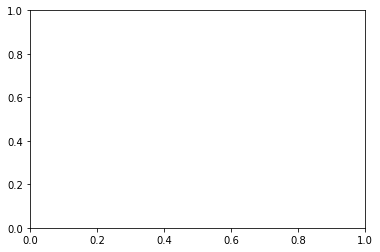

KeyError: 'Sentiment'

# Analysis 1: Understand whether a theme that was prevalent in the Engagement Survey and Listening Session feedback has any differences along demographic lines (race, gender, age).